In [ ]:
!curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0>>> Downloading ollama...
100 12030    0 12030    0     0  40830      0 --:--:-- --:--:-- --:--:-- 40918
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm
%xterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 3.9 MB/s eta 0:00:00


Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
!pip install langchain langchain-community -q
# Import Ollama module from Langchain
from langchain_community.llms import Ollama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.4 MB/s eta 0:00:00


In [ ]:
!pip install llama-index.core -q
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
# Initialize an instance of the Ollama model
llm = Ollama(model="gemma2")

## Printing out test chunks for experimentation


In [ ]:
import os
import sqlite3
import logging
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def list_tables(db_path):
    try:
        with sqlite3.connect(db_path) as conn:
            cursor = conn.cursor()
            cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
            tables = cursor.fetchall()
            return [table[0] for table in tables]
    except sqlite3.Error as e:
        logging.error(f"Database error: {e}")
        return []
    except Exception as e:
        logging.error(f"Error: {e}")
        return []

def extract_document_texts(db_path):
    try:
        with sqlite3.connect(db_path) as conn:
            cursor = conn.cursor()
            cursor.execute("SELECT document_text FROM filings")
            rows = cursor.fetchall()
            return [row[0] for row in rows]
    except sqlite3.Error as e:
        logging.error(f"Database error: {e}")
    except Exception as e:
        logging.error(f"Error: {e}")
    return []

def process_document_chunks(db_path):
    document_texts = extract_document_texts(db_path)

    if not document_texts:
        logging.info(f"No documents found in the 'filings' table.")
        return []

    chunk_size = 1024  # Chunk size with overlap
    chunk_overlap = 20
    node_parser = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    chunk_count = 0  # Counter for printed chunks

    for document_text in tqdm(document_texts[:1], desc="Processing documents"):  # Process only the first document for simplicity
        nodes = node_parser.get_nodes_from_documents([Document(text=document_text)], show_progress=False)

        for chunk_id, node in tqdm(enumerate(nodes), total=min(len(nodes), 30), desc="Processing chunks"):  # Process first 30 chunks
            if chunk_count >= 30:
                break
            chunk = node.text
            print(100 * '-')
            print(f"Chunk {chunk_id+1}: {chunk}")
            print(100 * '-')
            chunk_count += 1

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks
        process_document_chunks(db_path)

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing documents: 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of

## zero-shot

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations, ownerships, and commodities? "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, their ownership details, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
    )
    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response  # Adjust according to actual response format

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

def cleanup_generated_text(text):
    unwanted_phrases = [
        "assistant", "You're welcome", "ha", "okay", "nice", "goodbye", "thank you",
        "ahem", "we're", "I'll", "That's", "sounds", "agreed", "chatty", "wave",
        "handshake", "hug", "laughter", "applause", "mic drop", "explosion",
        "fireworks", "finale", "I'm done", "let's just stop", "ha", "same to you",
        "mission accomplished", "excellent", "guilty as charged", "my secret's safe with you",
        "under wraps", "fun little chat", "see you next time", "have a great day",
        "virtual smile", "smile", "wrapped this up"
    ]
    lines = text.split("\n")
    cleaned_lines = []
    for line in lines:
        if any(phrase.lower() in line.lower() for phrase in unwanted_phrases):
            continue
        cleaned_lines.append(line)
    return "\n".join(cleaned_lines)

def save_results_to_txt(file_path, results):
    with open(file_path, 'w', encoding='utf-8') as file:
        for chunk_id, result in enumerate(results):
            file.write(f"Chunk {chunk_id+1}:\n{result}\n{'-'*100}\n")
    logging.info(f"Results saved to {file_path}")

def extract_information(result):
    import re

    assets = []
    locations = []
    ownerships = []
    commodities = []

    asset_pattern = re.compile(r'physical assets:\s*\[([^\]]+)\]')
    location_pattern = re.compile(r'locations:\s*\[([^\]]+)\]')
    ownership_pattern = re.compile(r'ownerships:\s*\[([^\]]+)\]')
    commodity_pattern = re.compile(r'commodities:\s*\[([^\]]+)\]')

    asset_match = asset_pattern.search(result)
    location_match = location_pattern.search(result)
    ownership_match = ownership_pattern.search(result)
    commodity_match = commodity_pattern.search(result)

    if asset_match:
        assets = [asset.strip() for asset in asset_match.group(1).split(',')]
    if location_match:
        locations = [location.strip() for location in location_match.group(1).split(',')]
    if ownership_match:
        ownerships = [ownership.strip() for ownership in ownership_match.group(1).split(',')]
    if commodity_match:
        commodities = [commodity.strip() for commodity in commodity_match.group(1).split(',')]

    return assets, locations, ownerships, commodities


# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_zero-shot.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:10<04:53, 10.14s/it]

Here's a breakdown of the information from the text:

**physical assets:**  [ ] - The text does not explicitly list any physical assets like buildings, equipment, or vehicles.

**locations:** 
[ "201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania 15212-5858"] - This is the address of Alcoa Corporation's principal executive offices.


**commodities:** [ ] - The text doesn't mention specific commodities produced or traded by Alcoa Corporation.

**relationships:** 
[asset: '', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania 15212-5858', ownership: 'Alcoa Corporation', commodities: '']




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for it


Processing chunks:   7%|▋         | 2/30 [00:27<06:50, 14.67s/it]

Here's a breakdown of the information from the text according to your request:

**physical assets:** 
* Bauxite mines
* Alumina refineries
* Aluminum smelters
* Casting facilities
* Energy production assets

**locations:**
* 27 locations across nine countries on six continents (specific locations not listed)

**ownerships:**
* Alcoa Corporation (owns the majority of assets)
* Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)
* Alumina Limited (partner in the joint venture) 

**commodities:**
* Bauxite
* Alumina
* Aluminum


**Relationships:**

* **Asset: Bauxite Mines, Location:**  Various locations across six continents. **Ownership:** Primarily owned by Alcoa Corporation. **Commodities:** Bauxite.

* **Asset: Alumina Refineries, Location:** Various locations across six continents. **Ownership:** Primarily held within Alcoa World Alumina and Chemicals (joint venture between Alcoa and Alumina Limited). **Commodities:** Alumina.


Processing chunks:  10%|█         | 3/30 [00:41<06:27, 14.36s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Bauxite mines 
* Alumina refineries
* Aluminum smelter
* Smelting and refining capacity

**locations:** 

* Seven countries (specific countries not named)


**ownerships:**

* Alcoa Corporation
* Alumina Limited 

**commodities:**

* Bauxite
* Alumina
* Aluminum



**relationships:**

* **relationship 1:**  asset: Bauxite mines, location: Seven countries, ownership: AWAC (joint venture between Alcoa Corporation and Alumina Limited), commodities: Bauxite
* **relationship 2:** asset: Alumina refineries, location: Seven countries, ownership: AWAC, commodities: Alumina 
* **relationship 3:** asset: Aluminum smelter, location:  Seven countries, ownership: AWAC, commodities: Aluminum


**Important Notes:**

* The text is vague about specific locations for the assets. It only mentions "seven countries."
*  The focus of the text is on


Processing chunks:  13%|█▎        | 4/30 [01:10<08:42, 20.09s/it]

Here's a breakdown of the text information, formatted as requested:

**physical assets:** 
* Bauxite mines
* Alumina refineries
* Aluminum smelters
* Juruti bauxite deposit and mine
* São Luís refinery
* Portland, Australia smelter 
* San Ciprián refinery and alumina-based chemicals assets
* Point Comfort refinery facility (closed)
* Mining and refining assets in Suriname

**locations:**
* Australia
* Brazil
* Guinea
* Saudi Arabia
* Spain
* United States (Texas)
* Suriname

**ownerships:**
* Alcoa Corporation 
* Alumina Limited
* Alcoa of Australia Limited (AofA)
*  Saudi Arabian Mining Company (Ma’aden) 
* Joint ventures between Alcoa and Alumina Limited (AWAC)

**commodities:**
* Bauxite
* Alumina
* Aluminum


**relationships:**


* **asset:** Juruti bauxite deposit and mine
    * **location:** Brazil
    * **ownership:**  100% by AWAC 
    * **commodities:** Bauxite
   * **location:** Guinea
   * **commodities:** Bauxite
* **asset:** São Luís refinery
    * **location:** Brazil
   


Processing chunks:  17%|█▋        | 5/30 [01:36<09:10, 22.01s/it]

Here's a breakdown of the information from the text according to your requested format:

**physical assets:** 
* bauxite mine
* alumina refinery
* aluminum smelter
*  ELYSIS technology (patent-protected)

**locations:** 
* Bécancour, Québec
* Boké region of Guinea
* Brazil

**ownerships:**
* Ma’aden
* Alcoa
* AWAC
* Rio Tinto
* Investissement Québec
* Boké Investment Company
* Government of Guinea
* AWA LLC
* Alumina Limited 
* South32 Minerals S.A.


**commodities:** 
* bauxite
* alumina
* aluminum




**relationships:**

* **asset:**  ELYSIS technology, **location:** N/A (technology), **ownership:** Alcoa (48.235%), Rio Tinto (48.235%), Investissement Québec (3.53%), **commodities:**  eliminates greenhouse gas emissions from traditional aluminum smelting
* **asset:** Aluminerie de Bécancour Inc. (ABI) smelter, **location:** Bécancour, Québec, **ownership:** Alcoa (74.95%) and Rio Tinto (25.05%), **commodities:** aluminum 


------------------------------------------------------------


Processing chunks:  20%|██        | 6/30 [02:19<11:38, 29.10s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* Refinery
* Smelter
* Casthouse
* Strathcona Calciner
* Barra Grande HPP
* Estreito HPP
* Serra do Facão HPP
* Manicouagan hydroelectric project (McCormick project)
* Mines 

**locations:**
* Pelotas River (Southern Brazil)
* Tocantins River (Northern Brazil)
* Sao Marcos River (Central Brazil)
* Manicouagan River (Province of Québec, Canada)
*  

**ownerships:**


* AWAB (39.96% Refinery ownership)
* Rio Tinto (10% Refinery ownership) 
* Alcoa Alumínio (14.04% Refinery ownership)
* South32 (36% Refinery ownership)
* AWAC Group of companies (Ultimately owned 60% by Alcoa and 40% by Alumina Limited)
* Alcoa Alumínio (60% Smelter & Casthouse ownership)
* South32 (40% Smelter & Casthouse ownership)
* Affiliates of Alcoa & Rio Tinto (Strathcona Calciner joint venture)
* Alcoa (39% Strathcona Calciner ownership)
* Rio Tinto (61% Str


Processing chunks:  23%|██▎       | 7/30 [02:42<10:26, 27.26s/it]

Here's a breakdown of the text according to your request:

**physical assets:** 
* Bauxite mines
* Alumina refineries
* Smelter 

**locations:**  
* Australia (Kwinana, Pinjarra, Wagerup)
* Brazil (Poços de Caldas, São Luís)
* Spain (San Ciprián)
* Western Australia 

**ownerships:** 
* Alcoa Corporation
* AWAC (Alcoa World Alumina and Chemicals)
* MBAC (Ma'aden Bauxite & Alumina Company) - Joint venture with Alcoa

**commodities:** 
* Bauxite
* Alumina



**relationships:**

* **Kwinana Refinery:**  
    * asset: Kwinana Refinery
    * location: Australia (Western Australia)
    * ownership: Alcoa Corporation (100%)
    * commodities: Alumina 
* **Pinjarra Refinery:** 
    * asset: Pinjarra Refinery
    * location: Australia (Western Australia)
    * ownership: Alcoa Corporation (100%)
    * commodities: Alumina
* **Wagerup Refinery:**
    * asset: Wagerup Refinery
    * location: Australia (Western Australia)
    * ownership: Alcoa Corporation (100%)
    * commodities: Alumina
* **Po


Processing chunks:  27%|██▋       | 8/30 [03:05<09:31, 25.96s/it]

Here's a breakdown of the text according to your request:

**physical assets:** 
* Smelting and casthouse system
* Energy assets (power plants)
* Joint venture smelting company (MAC in Saudi Arabia)
* Aluminum facilities (listed by name and country)
* Casting operations 

**locations:**

* Brazil (Poços de Caldas, São Luís)
* Iceland (Fjarðaál)
* Norway (Lista, Mosjøen)
* Spain (San Ciprián)
* United States (Massena West, NY, Evansville, IN (Warrick))
* Australia (Portland)

**ownerships:**

* Alcoa Corporation 
* Joint Venture - MAC (25.1% owned by Alcoa)


**commodities:**

* Primary aluminum
* Common alloy ingot
* Value-add ingot products (foundry, billet, rod, and slab)
* Electricity (generated by energy assets)



**Relationships:**

Here's a simplified representation of the relationships. Due to the extensive list of facilities, I've focused on key examples:

* **Relationship 1:**  
    * **Asset:** Poços de Caldas smelter 
    * **Location:** Brazil
    * **Ownership:** Alcoa Co


Processing chunks:  30%|███       | 9/30 [03:39<09:53, 28.26s/it]

Here's a breakdown of the text based on your request:

**physical assets:** 
* Smelters: Portland, Intalco, San Ciprián, Baie-Comeau
* Mines: Liberty Mine
* Transmission assets: FERC-regulated in Indiana, Tennessee, New York, and Washington

**locations:**
* Portland (smelter)
* Intalco (smelter)
* San Ciprián (smelter)
* Baie-Comeau (smelter)
* Canada (Manicouagan power plant)
* United States (Warrick power plant, Liberty Mine)
* Indiana, Tennessee, New York, Washington (transmission assets)

**ownerships:**
* Alcoa Power Generating Inc., a subsidiary of Alcoa Corporation, owns certain FERC-regulated transmission assets.

**commodities:**
* Aluminum (produced at smelters)
* Electricity (generated by power plants)
* Hydropower
* Coal (used at Warrick power plant, sourced from Liberty Mine and third parties)


**Relationships:**

Here's a representation of the relationships between assets, locations, ownerships, and commodities: 

* **Portland smelter:** Location: Portland, Ownership: A


Processing chunks:  33%|███▎      | 10/30 [04:03<09:02, 27.10s/it]

Here's a breakdown of the information from the text, categorized and formatted as requested:

**physical assets:** 
* Smelters (Québec, Massena West, Portland, Western Australia)
* Refineries (Kwinana, Pinjarra, Wagerup)
* Calcination furnaces
* Windfarms (implied in context of PPAs)

**locations:**
* Québec
* Massena, New York
* Portland, Australia
* Western Australia 
    * Kwinana, Pinjarra, Wagerup refineries
* San Ciprián, Spain
* Lista and Mosjøen, Norway

**ownerships:**
* Alcoa (primary owner of most assets)
* Hydro-Québec (power provider for Québec smelters)
* New York Power Authority (NYPA) (power provider for Massena West smelter)
* National Electricity Market (NEM) (power market in Victoria, Australia) 
* AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd (counterparties to swap contracts)
* Portland Aluminium joint venture (partially owns Portland smelter)
* Renewable energy providers (contracted by Alcoa for San Ciprián power)

**c


Processing chunks:  37%|███▋      | 11/30 [04:27<08:14, 26.04s/it]

Here's a breakdown of the text according to your request:

**physical assets:** 
* Smelters (Alcoa’s Fjarðaál smelter, Alumar smelter)
* Refineries (San Ciprián refinery)
* Hydroelectric facility
* Power contracts

**locations:** 
* Iceland (Fjarðaál smelter)
* Spain (San Ciprián refinery)
* South America (Alumar smelter)

**ownerships:**  
* Alcoa owns and operates the Fjarðaál smelter, Alumar smelter, and San Ciprián refinery.
* Iceland Landsvirkjun owns and operates the hydroelectric facility. 
* Naturgy previously supplied natural gas to the San Ciprián refinery.


**commodities:**
* Electricity
* Natural Gas
* Bauxite
* Caustic soda
* Calcined petroleum coke
* Aluminum
* Alumina
* Lime (CaO)

**relationships:**

Here's a breakdown of relationships based on the provided text:

* **relationship 1:**  
    * asset: Fjarðaál smelter
    * location: Iceland
    * ownership: Alcoa
    * commodities: Electricity, Aluminum
* **relationship 2:**
    * asset: Alumar smelter
    * location: 


Processing chunks:  40%|████      | 12/30 [04:48<07:23, 24.61s/it]

Here's a breakdown of the text according to your request:

**physical assets:** 
* Refineries
* Mines (bauxite mines, alumina refineries)
* Casthouses 

**locations:**
* North America
* South America
* Europe
* Middle East
* Australia
* China
* Brazil
* Guinea 

**ownerships:**
* Alcoa owns and operates:
    *  Refineries (specific locations not detailed)
    * Mines (bauxite mines in Brazil and Guinea)
    * Casthouses 
* Partnerships with companies operating mines.
* Offtake agreements for bauxite.

**commodities:**
* Bauxite
* Alumina
* Aluminum
* Steel
* Titanium
* Copper
* Carbon fiber
* Composites
* Plastic
* Glass


**Relationships:**


* **Relationship 1:** 
    * **Asset:** Bauxite mines (operated by Alcoa and partnerships)
    * **Location:** Brazil, Guinea
    * **Ownership:** Primarily Alcoa and partners
    * **Commodities:** Bauxite

* **Relationship 2:** 
    * **Asset:** Alumina refineries 
    * **Location:** Not explicitly stated, but proximity to low-cost bauxite min


Processing chunks:  43%|████▎     | 13/30 [05:07<06:30, 22.96s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Tailings storage facilities
* Impoundments
* Facilities (new or expanded for environmental control)
* Waste sites 
*  Superfund sites


**locations:**

* The U.S.
* Abroad 

**ownerships:**

* Alcoa 

**commodities:**

* Raw materials 
* Aluminum (implied by Alcoa being an aluminum company)


**relationships:**


* **Tailings storage facilities and impoundments:** 
    * Located: Likely at Alcoa's mining and processing operations globally, as they manage tailings from aluminum production.
    * Ownership: Owned by Alcoa.
    * Commodities:  Related to the specific minerals extracted for aluminum production (bauxite being the primary ore).
* **Facilities (new or expanded for environmental control):** 
    * Location: Likely spread across Alcoa's operational locations to meet environmental regulations.
    * Ownership: Owned by 


Processing chunks:  47%|████▋     | 14/30 [05:21<05:24, 20.31s/it]

Here's a breakdown of the information from the text, categorized and formatted as requested:

**physical assets:** [Manufacturing facilities, offices, infrastructure (e.g., roads, power grids)] 

**locations:** [17 countries globally, unspecified locations within each country]

**ownerships:** [Alcoa Corporation is the owner of its physical assets and operations.]

**commodities:** [Aluminum (implied through references to Alcoa's core business and production processes)]


**relationships:**  

The text doesn't provide specific details about individual physical assets, their precise locations within countries, or a complete inventory. 

* **General Relationship:** Alcoa Corporation owns and operates manufacturing facilities, offices, and associated infrastructure in 17 countries worldwide. 
* **Production Focus:** These physical assets are used to produce aluminum (the primary commodity) and related products.


**Important Notes:**

* The text focuses on corporate policies, employee dem


Processing chunks:  50%|█████     | 15/30 [05:42<05:04, 20.28s/it]

Here's a breakdown of the text, identifying physical assets, locations, ownerships, and commodities:

**Physical Assets:** 

* Global Primary Products division (implied)
* Alcoa Corporation's global energy assets
* Mining facilities (implied by mentions of mining companies like Lundin Mining Corporation and Barrick Gold Corporation)

**Locations:**

* Brazil
* ParentCo headquarters (location unspecified) 


**Ownerships:**

* **Alcoa Corporation:** Owns the Global Primary Products division, global energy assets.  Also responsible for legal matters (implied ownership of related infrastructure), compliance, governance, and security.
* **Glencore International AG:** Owned the Copper Industrial Assets where Nicol A. Gagstetter previously worked.

**Commodities:**

* Aluminium (implied by Alcoa Corporation's primary business)
* Copper (mentioned in relation to Nicol A. Gagstetter's previous role at Glencore)


**Relationships:**

Due to the limited information provided, it's difficult to es


Processing chunks:  53%|█████▎    | 16/30 [05:59<04:32, 19.44s/it]

Here's a breakdown of the mentioned physical assets, locations, ownerships, and commodities based on the provided text:

**physical assets:**  [bauxite mines, alumina refineries, aluminum smelters, manufacturing plants] 

**locations:** [Australia, South Australia, China, Europe, UK, Ireland]

**ownerships:** 
* Alcoa Corporation 
* OZ Minerals Limited
* SIMEC Mining

**commodities:** [aluminum, bauxite, alumina]



**relationships:**

* **Alcoa Corporation:** 
    *  **asset:** Bauxite mines, alumina refineries, aluminum smelters, manufacturing plants 
    * **location:** Global (implied), with specific mentions of Australia and potentially other regions.
    * **ownership:** Owned by Alcoa Corporation.
    * **commodities:** Produces and processes bauxite into alumina, and further refines alumina into aluminum.

* **OZ Minerals Limited:** 
    * **asset:**  Mining operations (implied)
    * **location:** South Australia, Australia.
    * **ownership:** Owned by OZ Minerals Limited.




Processing chunks:  57%|█████▋    | 17/30 [06:15<04:00, 18.48s/it]

Here's a breakdown of the text according to your request:

**physical assets:** [Facilities, production plants] 

**locations:**  [Midwest (United States), global regions, LME warehouses, customer facilities, supplier facilities]


**commodities:** [Aluminum, Alumina, Bauxite, Energy ]

**Relationships:**

* **Relationship 1:**  
    * **Asset:** Production facilities 
    * **Location:** Global regions, unspecified
    * **Ownership:** Company (implied)
    * **Commodities:** Aluminum, Alumina 
* **Relationship 2:**
    * **Asset:** LME warehouses
    * **Commodities:** Aluminum (specifically Russian origin aluminum stocks mentioned)

* **Relationship 3:**
    * **Asset:** Customer facilities, Supplier facilities
    * **Location:** Global regions (implied by "customer and supplier locations")
    * **Ownership:**  Customers, Suppliers respectively
    * **Commodities:** Aluminum (in transactions with the company), Alumina (for suppliers)

**Important Notes:**

* The text is heavily f


Processing chunks:  60%|██████    | 18/30 [06:26<03:14, 16.18s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** Mining operations, information systems 

**locations:** Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States

**ownerships:** The company (name not explicitly provided), foreign governments

**commodities:** Aluminum, bauxite


**relationships:**

* **relationship 1:** asset: mining operations, location:  Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States, ownership: The company, commodities: aluminum, bauxite
* **relationship 2:** asset: information systems, location: unspecified, ownership: The company, commodities: none explicitly mentioned

**Important Notes:**



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 19: This has in the 


Processing chunks:  63%|██████▎   | 19/30 [06:41<02:54, 15.83s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Mining operations (Huntly and Willowdale bauxite mines)
* Refineries 
* Smelters
* Hydroelectricity assets


**locations:**

* Western Australia 
* Spain (San Ciprián refinery and smelter operations)

**ownerships:**

*  The Company (referring to an unnamed mining company)
* Regional and national governments in Spain


**commodities:**

* Bauxite
* Alumina
* Aluminum
* Energy (natural gas, electricity) 



**relationships:**

* **relationship 1:**  asset: Huntly bauxite mine, location: Western Australia, ownership: The Company, commodities: Bauxite
* **relationship 2:** asset: Willowdale bauxite mine, location: Western Australia, ownership: The Company, commodities: Bauxite
* **relationship 3:** asset: San Ciprián refinery and smelter operations, location: Spain, ownership: The Company (partially), regional and national govern


Processing chunks:  67%|██████▋   | 20/30 [06:59<02:43, 16.33s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 

* Smelting and refining locations
* Mining operations (specifically bauxite mines in Western Australia)
* Facilities (implied throughout the text -  refineries, smelters)
* Stockpiles

**locations:**

* Western Australia 

**ownerships:**

* Alcoa (explicitly stated as the owner of the assets and business)
* Potential buyers (for divestitures) 

**commodities:**

* Energy
* Raw materials: 
    * Carbon products
    * Caustic soda
    * Bauxite
    * Alumina
    * Aluminum


**relationships:**

* **Relationship 1:**  
    * asset: Smelting and refining locations
    * location: Not specified in detail, but implied to be global. 
    * ownership: Alcoa 
    * commodities: Energy, raw materials (bauxite, alumina) , aluminum
* **Relationship 2:**
    * asset: Mining operations (Bauxite mines)
    * location: Western Australia
    *


Processing chunks:  70%|███████   | 21/30 [07:15<02:26, 16.31s/it]

Here's a breakdown of the text, identifying the physical assets, locations, ownerships, and commodities mentioned, along with their relationships:

**physical assets:** 

* Bauxite mines
* Alumina refineries
* Aluminum smelter

**locations:** 

* Seven countries (implied within AWAC joint venture)
* Saudi Arabia (mentioned in context of Ma’aden joint venture)

**ownerships:**

* Alcoa
* Alumina Limited
* Saudi Arabian Mining Company (Ma'aden)

**commodities:**

* Bauxite
* Alumina 
* Aluminum


**Relationships:**

* **AWAC Joint Venture:**
    * **Asset:**  Bauxite mines, alumina refineries, aluminum smelter 
    * **Location:** Seven countries
    * **Ownership:** Alcoa and Alumina Limited (unspecified ownership percentages)
    * **Commodities:** Bauxite, alumina, aluminum

* **Ma'aden Joint Venture:**
    * **Asset:** Unspecified assets related to the joint venture with Ma'aden. 
    * **Location:** Saudi Arabia
    * **Ownership:** Alcoa (minority owner), Saudi Arabian Mining Compa


Processing chunks:  73%|███████▎  | 22/30 [07:31<02:11, 16.38s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [Mining areas, Smelting portfolio, operations]

**locations:** [Juruti, Brazil; United States; Australia; European Union (EU)] 

**ownerships:**  [The Company (implied - refers to the company writing the risk assessment), US government]

**commodities:** [Aluminum, alumina]


**relationships:**

* **relationship 1:**
    * asset: Mining areas
    * location: Juruti, Brazil
    * ownership: The Company (implied)
    * commodities: Aluminum (extracted from mining areas)
* **relationship 2:**
    * asset: Smelting portfolio
    * location: United States (implied)
    * ownership: The Company (implied)
    * commodities: Aluminum and alumina (processed in the smelting portfolio) 
* **relationship 3:**
    * asset: Operations 
    * location: Global (various locations mentioned)
    * ownership: The Company (implied)
    * commoditie


Processing chunks:  77%|███████▋  | 23/30 [07:48<01:54, 16.39s/it]

Here's a breakdown of the text, identifying physical assets, locations, ownerships, and commodities, along with their relationships:

**physical assets:** 
* Smelters (Massena West in New York, Warrick smelter)

**locations:**
* Australia
* Brazil
* Canada
* Norway
* Massena, New York
* Warrick (likely a location associated with the Warrick smelter)

**ownerships:**

**commodities:**
* Aluminum
* Critical minerals



**relationships:**

* **relationship 1:** asset: Massena West smelter, location: Massena, New York, ownership: AofA, commodities: aluminum 
* **relationship 2:** asset: Warrick smelter, location: Warrick (location unspecified), ownership: AofA, commodities: aluminum


**Important Notes:**

* "Section 45X of the Advanced Manufacturing Tax Credit" refers to a U.S. government tax incentive for specific industries, including those involved in critical mineral production (like aluminum). This highlights the connection between government policy, specific commodities, and AofA's 


Processing chunks:  80%|████████  | 24/30 [08:01<01:32, 15.44s/it]

Here's a breakdown based on the provided text:

**physical assets:**  [Properties] 

**locations:** [Spain, Russia, U.S., United Kingdom, European Union]

**ownerships:** [Company (not specified)]


**commodities:** [Raw materials, energy (particularly oil and natural gas), products]

**relationships:**

The text doesn't provide specific details about individual physical assets or their locations. It generally refers to:

* **Properties:** Owned by the company, presumably in various locations, as mentioned under "insurance coverage."

**Important Notes:**

*  The company's name is not provided, so "Company" is used as a placeholder. 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fue


Processing chunks:  83%|████████▎ | 25/30 [08:29<01:36, 19.21s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  
* ELYSIS partnership aluminum smelting technology
* Impoundment structures 
* Facilities
* Jarrah Forest (implied as an asset due to potential mining operations) 
* Amazon rainforest (implied as an asset due to potential mining operations)


**locations:** 
* United States
* Asia
* Brazil
* Canada
* EU
* European Union
* Jarrah Forest (location of potential mining)
* Amazon rainforest (location of potential mining)


**ownerships:** 

* The text primarily focuses on the company's operations and doesn't explicitly state ownership details for all assets. However, we can infer:
    * **Company owned:** Facilities, impoundment structures, likely ELYSIS partnership technology.

**commodities:** 
* Aluminum
* Alumina
* Energy 



**relationships:**


* **relationship:** ELYSIS partnership aluminum smelting technology
    * **location


Processing chunks:  87%|████████▋ | 26/30 [08:45<01:12, 18.14s/it]

Here's a breakdown of the mentioned assets, locations, ownerships, and commodities based on your provided text:

**physical assets:** 
* Operations and sites 
* Equipment
* Structures 

**locations:**  
* Jurisdictions in which we operate (broadly stated)
* Contaminated sites owned by third parties

 **ownerships:**
* The company ("we", "our") is responsible for its operations and sites.
* Third-party owners of contaminated sites may also be liable.
* Previously owned, non-operational, or divested properties can still incur liability. 

**commodities:**  
* Energy sources (implied)


**relationships:** 

The text does not provide specific details about the location of each physical asset or their exact ownership structure beyond the general statements above. 

Here's a general relationship framework based on the information provided:

* **relationship:** [operation/site: '', location: jurisdictions in which we operate, ownership: company ("we"), commodities: energy sources]
* **relatio


Processing chunks:  90%|█████████ | 27/30 [09:04<00:55, 18.46s/it]

Here's a breakdown of the text according to your request:

**physical assets:** 
* Impoundment structures 
* Tailing facilities
* Residue storage areas
* Existing facilities
*  Technology research and development projects (implied)

**locations:** [Jurisdictions in which we operate] - This is vague, but it indicates the company operates across various geographic locations. 

**ownerships:**
* Alcoa 
* Alcoa Nederland Holding B.V. (ANHBV) - A wholly-owned subsidiary of Alcoa

**commodities:**  Aluminum (implied through the context of "Alcoa" being a major aluminum producer)



**Relationships:**


* **Relationship 1:**
    * Asset: Impoundment structures
    * Location:  Unspecified (Likely vary depending on operational sites)
    * Ownership: Alcoa 

* **Relationship 2:**
    * Asset: Tailing facilities, residue storage areas
    * Location:  Unspecified (Likely vary depending on operational sites)
    * Ownership: Alcoa

* **Relationship 3:**
    * Asset: Existing facilities
    * Loc


Processing chunks:  93%|█████████▎| 28/30 [09:28<00:40, 20.01s/it]

Here's a breakdown of the mentioned elements and their relationships based on your provided text:

**physical assets:** 
*  Substantially all assets of the Company, the Borrower
*  Material domestic wholly-owned subsidiaries of the Company
*  Material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland 

**locations:** 
* Australia
* Brazil
* Canada
* Luxembourg
* The Netherlands
* Norway
* Switzerland

**ownerships:**  
* Alcoa
* ANHBV
* Subsidiary guarantors
* Holders of defaulted debt

**commodities:**  [] - The text doesn't explicitly mention specific commodities.


**Relationships:**

The relationships are complex and primarily focused on financial obligations and security interests:

* **Relationship 1:** The Amended Revolving Credit Facility and the Amended Japanese Yen Revolving Credit Facility are secured by a first priority security interest in "substantially all assets" of various entitie


Processing chunks:  97%|█████████▋| 29/30 [09:40<00:17, 17.77s/it]

Here's a breakdown of the text, identifying physical assets, locations, ownerships, and commodities, along with their relationships:

**physical assets:**  [Production facilities, IT infrastructure] 

**locations:** [Global (implied)]

**ownerships:** [Alcoa Corporation]

**commodities:** [None explicitly mentioned, but context suggests metals/aluminum given the company name and industry]

**relationships:**

* **Relationship 1:**
    * **Asset:** Production facilities 
    * **Location:**  Implied global distribution based on "global operations" 
    * **Ownership:** Alcoa Corporation
    * **Commodities:** Implied: Metals/aluminum (based on industry context)

* **Relationship 2:**
    * **Asset:** IT infrastructure 
    * **Location:** Not specified, but implied to be globally distributed due to "global operations"
    * **Ownership:** Alcoa Corporation
    * **Commodities:**  None directly related


**Important Notes:**

* The text focuses heavily on financial practices and risks, n


Processing documents: 100%|██████████| 1/1 [09:57<00:00, 597.40s/it]

Based on the provided text, here's a breakdown of the identified elements and their relationships:

**physical assets:**  [Information Technology Systems (networks, servers, storage), Physical Facilities (implied by "facilities" in the context of labor disputes)] 

**locations:** [Implied by mentions of "facilities" and "countries", but specific locations are not provided]

**ownerships:**  [Company owns its Information Technology Systems and Physical Facilities. Third-party vendors own or manage certain software applications, storage systems, and cloud computing services.]

**commodities:** [] - The text does not explicitly mention any physical commodities. 


**relationships:**

* **Relationship 1:**
    * **asset:**  Information Technology Systems (networks, servers, storage)
    * **location:** Implied to be located at the Company's facilities and potentially within third-party vendor data centers.
    * **ownership:** Primarily owned by the Company, with some managed by third-part

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation

ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania 15212-5858] ownerships: [Alcoa Corporation] commodities: [] relationships: [asset: '', location: '201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania 15212-5858', ownership: 'Alcoa Corporation', commodities: '']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Casting facilities, Energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals, Alumina Limited] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite Mines', location: 'Various locations across six continents', ownership: 'Primarily owned by Alcoa Corporation', commodities: 'Bauxite'] [asset: 'Alumina Refineries', location: 'Various locations across six continents', ownership: 'Primarily held within Alcoa World Alumina and Chemicals', commodities: 'Alumina'] [asset: 'Aluminum Smelters', location: 'Various locations across six continents', ownership: 'Owned by Alcoa Corporation', commodities: 'Aluminum'] [asset: 'Energy Production Assets', location: 'Various locations', ownership: 'Owned by Alcoa Corporation', commodities: 'Electricity/Power']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter, Smelting and refining capacity] locations: [Seven countries] ownerships: [Alcoa Corporation, Alumina Limited] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', location: 'Seven countries', ownership: 'AWAC', commodities: 'Bauxite'] [asset: 'Alumina refineries', location: 'Seven countries', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'Aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodities: 'Aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Juruti bauxite deposit and mine, São Luís refinery, Portland smelter, San Ciprián refinery and alumina-based chemicals assets, Point Comfort refinery facility (closed), Mining and refining assets in Suriname] locations: [Australia, Brazil, Guinea, Saudi Arabia, Spain, United States (Texas), Suriname] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa of Australia Limited (AofA), Saudi Arabian Mining Company (Ma’aden), Joint ventures between Alcoa and Alumina Limited (AWAC)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Juruti bauxite deposit and mine', location: 'Brazil', ownership: '100% by AWAC', commodities: 'Bauxite'] [asset: 'São Luís refinery', location: 'Brazil', ownership: '39.96% by AWAC', commodities: 'Alumina'] [asset: 'Portland smelter', location: 'Australia', ownership: '55% by AWAC', commodities: 'Aluminum'] [asset: 'San Ciprián refinery and alumina-based chemicals assets', location: 'Spain', ownership: '100% by AWAC', commodities: 'Alumina, alumina-based chemicals'] [asset: 'Point Comfort refinery facility (closed)', location: 'Texas, United States', ownership: '100% by AWAC', commodities: 'Alumina']",
    "physical assets: [Bauxite mine, Alumina refinery, Aluminum smelter, ELYSIS technology (patent-protected)] locations: [Bécancour, Québec, Boké region of Guinea, Brazil] ownerships: [Ma’aden, Alcoa, AWAC, Rio Tinto, Investissement Québec, Boké Investment Company, Government of Guinea, AWA LLC, Alumina Limited, South32 Minerals S.A.] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'ELYSIS technology', location: 'N/A', ownership: 'Alcoa (48.235%), Rio Tinto (48.235%), Investissement Québec (3.53%)', commodities: 'eliminates greenhouse gas emissions from traditional aluminum smelting'] [asset: 'Aluminerie de Bécancour Inc. (ABI) smelter', location: 'Bécancour, Québec', ownership: 'Alcoa (74.95%) and Rio Tinto (25.05%)', commodities: 'aluminum']",
    "physical assets: [Refinery, Smelter, Casthouse, Strathcona Calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project (McCormick project), Mines] locations: [Pelotas River, Tocantins River, Sao Marcos River, Manicouagan River] ownerships: [AWAB, Rio Tinto, Alcoa Alumínio, South32, AWAC Group of companies, Affiliates of Alcoa & Rio Tinto, Unrelated third parties, Affiliates of Alcoa & Hydro-Québec] commodities: [Aluminum, Bauxite, Alumina, Calcined Coke] relationships: [asset: 'Refinery', location: '[location not specified]', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%)', commodities: 'Aluminum, Bauxite'] [asset: 'Smelter & Casthouse', location: '[location not specified]', ownership: 'Alcoa Alumínio (60%) and South32 (40%)', commodities: 'Aluminum'] [asset: 'Strathcona Calciner', location: '[location not specified]', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodities: 'Calcined Coke'] [asset: 'Barra Grande HPP', location: 'Pelotas River', ownership: 'Alcoa Alumínio (42.2%) and unrelated third parties', commodities: 'Hydropower'] [asset: 'Estreito HPP', location: 'Tocantins River', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%) and unrelated third parties', commodities: 'Hydropower'] [asset: 'Serra do Facão HPP', location: 'Sao Marcos River', ownership: 'Alcoa Alumínio (35%) and unrelated third parties', commodities: 'Hydropower'] [asset: 'Manicouagan hydroelectric project (McCormick project)', location: 'Manicouagan River', ownership: 'Manicouagan Power Limited Partnership (Alcoa (40%) and Hydro-Québec)', commodities: 'Hydropower'] [asset: 'Mines', location: '[location not specified]', ownership: 'Alcoa and partnerships with AWAC equity interests', commodities: 'Bauxite']",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Western Australia] ownerships: [Alcoa Corporation, AWAC, MBAC] commodities: [Bauxite, Alumina] relationships: [asset: 'Kwinana Refinery', location: 'Australia (Western Australia)', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina'] [asset: 'Pinjarra Refinery', location: 'Australia (Western Australia)', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina'] [asset: 'Wagerup Refinery', location: 'Australia (Western Australia)', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina'] [asset: 'Poços de Caldas Refinery', location: 'Brazil', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina (partially curtailed)'] [asset: 'São Luís (Alumar) Refinery', location: 'Brazil', ownership: 'Alcoa Corporation (partial ownership - joint venture with Hydro)', commodities: 'Alumina'] [asset: 'San Ciprián Refinery', location: 'Spain', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina (partially curtailed)']",
    "physical assets: [Smelting and casthouse system, Energy assets (power plants), Joint venture smelting company (MAC in Saudi Arabia), Aluminum facilities (listed by name and country), Casting operations] locations: [Brazil (Poços de Caldas, São Luís), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY, Evansville, IN (Warrick)), Australia (Portland)] ownerships: [Alcoa Corporation, Joint Venture - MAC (25.1% owned by Alcoa)] commodities: [Primary aluminum, Common alloy ingot, Value-add ingot products (foundry, billet, rod, and slab), Electricity (generated by energy assets)] relationships: [asset: 'Poços de Caldas smelter', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Primary aluminum'] [asset: 'Alumar smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodities: 'Primary aluminum (partial operation at 69% capacity as of Dec 31, 2023)'] [asset: 'MAC smelting joint venture', location: 'Saudi Arabia', ownership: 'Alcoa Corporation (25.1%)', commodities: 'Primary aluminum']",
    "physical assets: [Smelters: Portland, Intalco, San Ciprián, Baie-Comeau, Mines: Liberty Mine, Transmission assets: FERC-regulated in Indiana, Tennessee, New York, and Washington] locations: [Portland, Intalco, San Ciprián, Baie-Comeau, Canada, United States, Indiana, Tennessee, New York, Washington] ownerships: [Alcoa Power Generating Inc., Alcoa Corporation] commodities: [Aluminum, Electricity, Hydropower, Coal] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa Corporation', commodities: 'Aluminum'] [asset: 'Intalco smelter', location: 'Intalco', ownership: 'Previously owned by Alcoa Corporation, closed in March 2023', commodities: 'Aluminum'] [asset: 'San Ciprián smelter', location: 'San Ciprián', ownership: 'Alcoa Corporation', commodities: 'Aluminum'] [asset: 'Barra Grande power plant', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Hydropower'] [asset: 'Estreito power plant', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Hydropower'] [asset: 'Serra do Facão power plant', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Hydropower'] [asset: 'Manicouagan power plant', location: 'Canada', ownership: 'Partially owned by Manicouagan Power Limited Partnership (which includes Alcoa Corporation)', commodities: 'Hydropower'] [asset: 'Warrick power plant', location: 'United States', ownership: 'Alcoa Corporation', commodities: 'Coal-fired electricity'] [asset: 'Liberty Mine', location: 'United States', ownership: 'Alcoa Corporation', commodities: 'Coal'] [asset: 'FERC-regulated transmission assets', location: 'Indiana, Tennessee, New York, Washington', ownership: 'Alcoa Power Generating Inc.', commodities: 'Electricity']",
    "physical assets: [Smelters (Québec, Massena West, Portland, Western Australia), Refineries (Kwinana, Pinjarra, Wagerup), Calcination furnaces, Windfarms (implied in context of PPAs)] locations: [Québec, Massena, New York, Portland, Australia, Western Australia, San Ciprián, Spain, Lista and Mosjøen, Norway] ownerships: [Alcoa, Hydro-Québec, New York Power Authority (NYPA), National Electricity Market (NEM), AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, Portland Aluminium joint venture, Renewable energy providers] commodities: [Electricity, Natural Gas, Aluminum] relationships: [asset: 'Québec smelters', location: 'Québec', ownership: 'Alcoa', commodities: 'Electricity, Aluminum'] [asset: 'Massena West smelter', location: 'Massena, New York', ownership: 'Alcoa', commodities: 'Electricity, Natural Gas, Aluminum'] [asset: 'Portland smelter', location: 'Portland, Australia', ownership: 'Partially owned by Alcoa through joint venture', commodities: 'Electricity, Natural Gas, Aluminum'] [asset: 'Kwinana, Pinjarra, and Wagerup refineries', location: 'Western Australia', ownership: 'AofA (part of Alcoa)', commodities: 'Natural Gas'] [asset: 'Calcination furnaces', location: 'Western Australia', ownership: 'AofA', commodities: 'Natural Gas'] [asset: 'San Ciprián smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa', commodities: 'Electricity, Aluminum'] [asset: 'Lista and Mosjøen smelters', location: 'Lista and Mosjøen, Norway', ownership: 'Alcoa', commodities: 'Electricity, Aluminum']",
    "physical assets: [Smelters (Alcoa’s Fjarðaál smelter, Alumar smelter), Refineries (San Ciprián refinery), Hydroelectric facility, Power contracts] locations: [Iceland, Spain, South America] ownerships: [Alcoa, Iceland Landsvirkjun, Naturgy] commodities: [Electricity, Natural Gas, Bauxite, Caustic soda, Calcined petroleum coke, Aluminum, Alumina, Lime (CaO)] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodities: 'Electricity, Aluminum'] [asset: 'Alumar smelter', location: 'South America', ownership: 'Alcoa', commodities: 'Power (renewable sources), Aluminum'] [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa', commodities: 'Natural Gas, Refinery Products'] [asset: 'Hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodities: 'Electricity']",
    "physical assets: [Refineries, Mines (bauxite mines, alumina refineries), Casthouses] locations: [North America, South America, Europe, Middle East, Australia, China, Brazil, Guinea] ownerships: [Alcoa, Partnerships with companies operating mines, Offtake agreements for bauxite] commodities: [Bauxite, Alumina, Aluminum, Steel, Titanium, Copper, Carbon fiber, Composites, Plastic, Glass] relationships: [asset: 'Bauxite mines', location: 'Brazil, Guinea', ownership: 'Primarily Alcoa and partners', commodities: 'Bauxite'] [asset: 'Alumina refineries', location: '[not explicitly stated]', ownership: 'Alcoa', commodities: 'Alumina (produced from bauxite)'] [asset: 'Casthouses', location: '[not specifically stated]', ownership: 'Alcoa']",
    "physical assets: [Tailings storage facilities, Impoundments, Facilities (new or expanded for environmental control), Waste sites, Superfund sites] locations: [The U.S., Abroad] ownerships: [Alcoa] commodities: [Raw materials, Aluminum] relationships: [asset: 'Tailings storage facilities and impoundments', location: '[likely at Alcoa's mining and processing operations globally]', ownership: 'Alcoa', commodities: '[related to specific minerals extracted for aluminum production]'] [asset: 'Facilities (new or expanded for environmental control)', location: '[spread across Alcoa's operational locations]', ownership: 'Alcoa', commodities: '[indirectly related to all commodities processed at Alcoa's facilities]'] [asset: 'Waste sites and Superfund sites', location: '[potentially historical sites associated with past Alcoa operations]']",
    "physical assets: [Manufacturing facilities, offices, infrastructure (e.g., roads, power grids)] locations: [17 countries globally, unspecified locations within each country] ownerships: [Alcoa Corporation] commodities: [Aluminum] relationships: [General Relationship: 'Alcoa Corporation owns and operates manufacturing facilities, offices, and associated infrastructure in 17 countries worldwide'] [Production Focus: 'These physical assets are used to produce aluminum (the primary commodity) and related products']",
    "physical assets: [Global Primary Products division, Alcoa Corporation's global energy assets, Mining facilities] locations: [Brazil, ParentCo headquarters (location unspecified)] ownerships: [Alcoa Corporation, Glencore International AG] commodities: [Aluminium, Copper] relationships: [asset: 'Global Primary Products division', location: '[likely related to Alcoa Corporation's global operations]', ownership: 'Previously owned by ParentCo, now potentially under Alcoa Corporation's ownership', commodities: 'Aluminium'] [asset: 'Global energy assets', location: '[unspecified]', ownership: 'Alcoa Corporation', commodities: '[potentially used in the production of aluminium or other commodities]']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, manufacturing plants] locations: [Australia, South Australia, China, Europe, UK, Ireland] ownerships: [Alcoa Corporation, OZ Minerals Limited, SIMEC Mining] commodities: [aluminum, bauxite, alumina] relationships: [asset: 'Bauxite mines, alumina refineries, aluminum smelters, manufacturing plants', location: '[global (implied), with specific mentions of Australia and other regions]', ownership: 'Alcoa Corporation', commodities: 'Produces and processes bauxite into alumina, and further refines alumina into aluminum'] [asset: 'Mining operations', location: 'South Australia, Australia', ownership: 'OZ Minerals Limited'] [asset: 'Mining operations', location: 'South Australia, Australia', ownership: 'SIMEC Mining']",
    "physical assets: [Facilities, production plants] locations: [Midwest (United States), global regions, LME warehouses, customer facilities, supplier facilities] ownerships: [] commodities: [Aluminum, Alumina, Bauxite, Energy] relationships: [asset: 'Production facilities', location: 'Global regions, unspecified', ownership: 'Company (implied)', commodities: 'Aluminum, Alumina'] [asset: 'LME warehouses', commodities: 'Aluminum'] [asset: 'Customer facilities, Supplier facilities', location: 'Global regions', ownership: 'Customers, Suppliers respectively', commodities: 'Aluminum, Alumina']",
    "physical assets: [Mining operations, information systems] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States] ownerships: [The company (name not explicitly provided), foreign governments] commodities: [Aluminum, bauxite] relationships: [asset: 'mining operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'The company', commodities: 'aluminum, bauxite'] [asset: 'information systems', location: '[unspecified]', ownership: 'The company', commodities: '[none explicitly mentioned]']",
    "physical assets: [Mining operations (Huntly and Willowdale bauxite mines), Refineries, Smelters, Hydroelectricity assets] locations: [Western Australia, Spain (San Ciprián refinery and smelter operations)] ownerships: [The Company, Regional and national governments in Spain] commodities: [Bauxite, Alumina, Aluminum, Energy] relationships: [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'The Company', commodities: 'Bauxite'] [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'The Company', commodities: 'Bauxite'] [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'The Company (partially), regional and national governments in Spain', commodities: 'Aluminum'] [asset: 'Hydroelectricity assets', location: '[unspecified]', ownership: 'The Company', commodities: 'Electricity']",
    "physical assets: [Smelting and refining locations, Mining operations, Facilities, Stockpiles] locations: [Western Australia] ownerships: [Alcoa, Potential buyers] commodities: [Energy, Carbon products, Caustic soda, Bauxite, Alumina, Aluminum] relationships: [asset: 'Smelting and refining locations', location: '[global]', ownership: 'Alcoa', commodities: 'Energy, raw materials, aluminum'] [asset: 'Mining operations (Bauxite mines)', location: 'Western Australia', ownership: 'Alcoa', commodities: 'Bauxite'] [asset: 'Stockpiles', location: '[not specified]', ownership: 'Alcoa', commodities: 'Raw materials']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter] locations: [Seven countries, Saudi Arabia] ownerships: [Alcoa, Alumina Limited, Saudi Arabian Mining Company (Ma'aden)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines, alumina refineries, aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodities: 'Bauxite, alumina, aluminum'] [asset: 'Unspecified assets related to the joint venture with Ma'aden', location: 'Saudi Arabia', ownership: 'Alcoa (minority owner), Saudi Arabian Mining Company (Ma'aden)']",
    "physical assets: [Mining areas, Smelting portfolio, operations] locations: [Juruti, Brazil; United States; Australia; European Union (EU)] ownerships: [The Company, US government] commodities: [Aluminum, alumina] relationships: [asset: 'Mining areas', location: 'Juruti, Brazil', ownership: 'The Company', commodities: 'Aluminum'] [asset: 'Smelting portfolio', location: 'United States (implied)', ownership: 'The Company', commodities: 'Aluminum, alumina'] [asset: 'Operations', location: 'Global', ownership: 'The Company', commodities: 'Aluminum, alumina']",
    "physical assets: [Smelters (Massena West in New York, Warrick smelter)] locations: [Australia, Brazil, Canada, Norway, Massena, New York, Warrick] ownerships: [] commodities: [Aluminum, Critical minerals] relationships: [asset: 'Massena West smelter', location: 'Massena, New York', ownership: 'AofA', commodities: 'aluminum'] [asset: 'Warrick smelter', location: 'Warrick', ownership: 'AofA', commodities: 'aluminum']",
    "physical assets: [Properties] locations: [Spain, Russia, U.S., United Kingdom, European Union] ownerships: [Company] commodities: [Raw materials, energy, products] relationships: [asset: 'Properties', location: '[owned by the company]']",
    "physical assets: [ELYSIS partnership aluminum smelting technology, Impoundment structures, Facilities, Jarrah Forest, Amazon rainforest] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon rainforest] ownerships: [Company, ELYSIS project partners] commodities: [Aluminum, Alumina, Energy] relationships: [asset: 'ELYSIS partnership aluminum smelting technology', location: '[likely where the technology is implemented]', ownership: '[likely jointly owned by the company and partners]', commodities: 'Aluminum'] [asset: 'Impoundment structures', location: '[likely various locations where the company operates]', ownership: 'Company'] [asset: 'Facilities', location: '[various locations]', ownership: 'Company', commodities: 'Aluminum, alumina'] [asset: 'Jarrah Forest', location: 'Western Australia', ownership: '[potentially government-owned with potential mining rights]', commodities: '[potentially resources extracted]'] [asset: 'Amazon rainforest', location: 'South America', ownership: '[mostly government-owned with potential mining rights]', commodities: '[potentially resources extracted]']",
    "physical assets: [Operations and sites, Equipment, Structures] locations: [Jurisdictions in which we operate, Contaminated sites owned by third parties] ownerships: [The company, third parties] commodities: [Energy sources] relationships: [asset: 'Operations and sites', location: 'Jurisdictions in which we operate', ownership: 'Company', commodities: 'Energy sources'] [asset: 'Equipment and structures', location: 'Operations and sites', ownership: 'Company', commodities: '[various depending on specific operations]']",
    "physical assets: [Impoundment structures, Tailing facilities, Residue storage areas, Existing facilities, Technology research and development projects] locations: [Jurisdictions in which we operate] ownerships: [Alcoa, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [Aluminum] relationships: [asset: 'Impoundment structures', location: '[unspecified]', ownership: 'Alcoa'] [asset: 'Tailing facilities, residue storage areas', location: '[unspecified]', ownership: 'Alcoa'] [asset: 'Existing facilities', location: '[unspecified]', ownership: 'Alcoa', commodities: 'Aluminum']",
    "physical assets: [Substantially all assets of the Company, the Borrower, Material domestic wholly-owned subsidiaries of the Company, Material foreign wholly-owned subsidiaries of the Company] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV, Subsidiary guarantors, Holders of defaulted debt] commodities: [] relationships: [asset: 'Substantially all assets', location: '[various locations]', ownership: 'Alcoa, ANHBV, subsidiary guarantors', commodities: '[not explicitly stated]'] [asset: 'Certain actions and financial performance', location: '[global operations]', ownership: 'Alcoa and ANHBV']",
    "physical assets: [Production facilities, IT infrastructure] locations: [Global] ownerships: [Alcoa Corporation] commodities: [] relationships: [asset: 'Production facilities', location: '[global]', ownership: 'Alcoa Corporation', commodities: '[implied: Metals/aluminum]'] [asset: 'IT infrastructure', location: '[global]', ownership: 'Alcoa Corporation', commodities: '[none directly related]']",
    "physical assets: [Information Technology Systems (networks, servers, storage), Physical Facilities] locations: [Implied by mentions of 'facilities' and 'countries'] ownerships: [Company, third-party vendors] commodities: [] relationships: [asset: 'Information Technology Systems (networks, servers, storage)', location: '[company's facilities and potentially within third-party vendor data centers]', ownership: 'Company, third-party vendors'] [asset: 'Physical Facilities', location: '[various countries]', ownership: 'Company']"
]


# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Function to compute cosine similarity
def compute_cosine_similarity(text1, text2):
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

# Function to compute Jaccard similarity
def compute_jaccard_similarity(text1, text2):
    vectorizer = CountVectorizer(binary=True).fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    intersection = np.sum(np.min(vectors, axis=0))
    union = np.sum(np.max(vectors, axis=0))
    return intersection / union

# Function to compute precision, recall, and F1
def compute_precision_recall_f1(text1, text2):
    vectorizer = CountVectorizer(binary=True).fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    precision, recall, f1, _ = precision_recall_fscore_support(vectors[0], vectors[1], average='binary')
    return precision, recall, f1

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## chain-of-thought prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        f"Text: {chunk}\nQuery:  Let's think step by step. First, identify any physical assets mentioned in the text. Next, determine if any locations or ownership details are provided for these physical assets. Then, determine if the commodities related to the physical assets are provided. Finally, summarize the relationships between each physical asset, its location, its ownership and its commodity. "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, their ownership details, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
    )
    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

def process_document_chunks(db_path):
    document_texts = extract_document_texts(db_path)

    if not document_texts:
        logging.info(f"No documents found in the 'filings' table.")
        return []

    chunk_size = 1024  # Chunk size with overlap
    chunk_overlap = 20
    node_parser = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    results = []

    for document_text in tqdm(document_texts[:1], desc="Processing documents"):  # Process only the first document for simplicity
        nodes = node_parser.get_nodes_from_documents([Document(text=document_text)], show_progress=False)

        for chunk_id, node in tqdm(enumerate(nodes), total=min(len(nodes), 30), desc="Processing chunks"):  # Process first 30 chunks
            if chunk_id >= 30:
                break
            chunk = node.text
            print(100 * '-')
            print(f"Chunk {chunk_id+1}: {chunk}")
            print(100 * '-')
            result = query_chunk(chunk)
            results.append(result)

    return results

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_CoT.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:17<08:18, 17.20s/it]

Let's break down this text and extract the information you need.

**Analysis:**

The provided text is a section from Alcoa Corporation's Form 10-K annual report. This type of document focuses on financial performance and doesn't typically detail specific physical assets like factories or mines in great detail.  


* **Locations:**
    * 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania


* **Commodities:**  Alcoa is a major aluminum producer. We can infer they deal with the commodity "aluminum."


**Relationships Summary (Limited):**

Since the text doesn't provide specific details about individual physical assets owned by Alcoa, we can only make these general statements:

* **Relationship 1:**  
    * asset: Headquarters/Major Office 
    * location: 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania
    * ownership: Alcoa Corporation
    * commodities: Potentially involved in the processing and distribution of aluminum.



**Important Note:** To get a more precise 


Processing chunks:   7%|▋         | 2/30 [00:34<08:10, 17.52s/it]

Here's a breakdown of the information based on your request:

**Physical Assets:**

* Bauxite mines
* Alumina refineries
* Aluminum smelters
* Aluminum casting facilities 
* Energy production assets

**Locations:**

* 27 locations across nine countries on six continents.  Specific locations are not listed.

**Ownerships:**

* **Alumina Limited:** A joint venture partner with Alcoa Corporation in Alcoa World Alumina and Chemicals, which manages a series of affiliated operating entities for alumina refining.

**Commodities:**

* Bauxite
* Alumina 
* Aluminum



**Relationships:**


* **Bauxite Mines:** Likely located in various countries, details not specified. Owned by Alcoa Corporation or potentially its subsidiaries.
* **Alumina Refineries:** Operated through Alcoa World Alumina and Chemicals, a joint venture between Alcoa Corporation and Alumina Limited. Locations are not provided. Process bauxite into alumina. 
* **Aluminum Smelters and Casting Facilities:**  Owned and operated by A


Processing chunks:  10%|█         | 3/30 [00:48<07:07, 15.85s/it]

Let's break down Alcoa's assets based on the provided text.

**physical assets:** 
* Mining operations (bauxite mines)
* Refining operations (alumina refineries)
* Smelting operations (aluminum smelter)


**locations:**
* Seven countries (specific locations not mentioned)


**ownerships:**
* Alcoa Corporation
* Alumina Limited (through the joint venture AWAC)

**commodities:**
* Bauxite
* Alumina 
* Aluminum



**Relationships:**

Here's a breakdown of the relationships, keeping in mind the text lacks specific locations:

* **relationship 1:**  asset: bauxite mines, location: Seven countries (Unspecified), ownership: Alcoa Corporation and Alumina Limited (through AWAC), commodities: Bauxite
* **relationship 2:** asset: alumina refineries, location: Seven countries (Unspecified), ownership: Alcoa Corporation and Alumina Limited (through AWAC), commodities: Alumina
* **relationship 3:** asset: aluminum smelter, location: Seven countries (Unspecified), ownership: Alcoa Corporation and Alu


Processing chunks:  13%|█▎        | 4/30 [01:11<08:04, 18.64s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Bauxite mines
* Alumina refineries
* Aluminum smelters
*  Bauxite deposit
* Shipping company 

**locations:**

* Australia
* Brazil (Juruti)
* Guinea
* Spain (San Ciprián)
* United States (Point Comfort, Texas)
* Suriname

**ownerships:**

* Alcoa Corporation 
* Alumina Limited
* Alcoa of Australia Limited (AofA)
* Compagnie des Bauxites de Guinée (CBG)
* Ma'aden (Saudi Arabian Mining Company)

 **commodities:**

* Bauxite
* Alumina 
* Aluminum




**Relationships:**

* **Asset:**  Bauxite mines in Australia, Brazil, Guinea 
    * **Location:** Australia, Brazil, Guinea
    * **Commodities:** Bauxite

* **Asset:** Juruti bauxite deposit and mine in Brazil
    * **Location:**  Brazil (Juruti)
    * **Ownership:** 100% AWAC (through Alcoa Corporation and Alumina Limited)
    * **Commodities:** Bauxite

* **Asset:** São Luís refi


Processing chunks:  17%|█▋        | 5/30 [01:41<09:26, 22.67s/it]

Let's break down the information about Alcoa's physical assets step-by-step.

**1. Physical Assets:**

* Bauxite mine 
* Alumina refinery
* Aluminum smelter


**2. Locations:**

* Bécancour, Québec (Aluminerie de Bécancour Inc.)
* Boké region of Guinea (CBG)
* Brazil (Alumar)

 **3. Ownerships:** 

*  **Joint Ventures:**
    * Ma’aden Bauxite and Alumina Company (MBAC):  Ma'aden (74.9%) , AWAC (25.1%)
    * Ma’aden Aluminium Company (MAC): Ma'aden (74.9%), Alcoa (25.1%)
   * ELYSIS: Alcoa (48.235%), Rio Tinto Alcan Inc. (Rio Tinto) (48.235%), Investissement Québec (3.53%) 
    * Aluminerie de Bécancour Inc. (ABI): Alcoa (74.95%), Rio Tinto (25.05%)
   * CBG: Boké Investment Company (51%), Government of Guinea (49%) 

 **4. Commodities:**

* Bauxite
* Alumina
* Aluminum

**5. Relationships:**





* **ELYSIS:** Location:  Not specified in the text. Ownership: Alcoa (48.235%), Rio Tinto Alcan Inc. (Rio Tinto) (48.235%), Investissement Québec (3.53%). Commodities:  Aluminum with zero dire


Processing chunks:  20%|██        | 6/30 [02:16<10:42, 26.77s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 

* Refinery
* Smelter
* Casthouse
* Strathcona calciner
* Barra Grande HPP
* Estreito HPP
* Serra do Facão HPP
* McCormick hydroelectric project

**locations:**

* Brazil (Pelotas River, Tocantins River, Sao Marcos River) 
* Canada (Province of Québec)

**ownerships:**

* AWAB (39.96% refinery ownership)
* Rio Tinto (10% refinery ownership, affiliates hold interest in refinery, 61% calciner ownership)
* Alcoa Alumínio (14.04% refinery ownership, 60% smelter and casthouse ownership, 25.5% Estreito HPP ownership, 35% Serra do Facão HPP ownership)
* South32 (36% refinery ownership, 40% smelter and casthouse ownership)
* AWAC group of companies
* Alcoa (60% AWAB ownership, 39% calciner ownership, 40% Manicouagan Power Limited Partnership)
* Alumina Limited (40% AWAB ownership)
* Hydro-Québec (Manicouagan Power Limited Partnership)
*


Processing chunks:  23%|██▎       | 7/30 [02:37<09:33, 24.95s/it]

Let's break down the text to answer your query.

**1. Physical Assets:**

* Bauxite mines
* Alumina refineries
* Smelter

**2. Locations:**

* Australia (AofA):  Kwinana, Pinjarra, Wagerup
* Brazil: Poços de Caldas, São Luís (Alumar)
* Spain: San Ciprián

**3. Ownerships:**

* Alcoa Corporation (fully or partially owns the listed facilities)
* Equity Interests:  Some facilities are partially owned through equity stakes. 
* AWAC: A subsidiary mentioned, likely wholly-owned by Alcoa, which controls production from its facilities.

**4. Commodities:**

* Bauxite
* Alumina


**Relationships:**

Here's a summarized relationship table based on the text:

| Asset | Location | Ownership | Commodity |
|---|---|---|---|
| Kwinana Refinery | Australia (Kwinana) | Alcoa Corporation (100%) | Alumina | 
| Pinjarra Refinery | Australia (Pinjarra) | Alcoa Corporation (100%) | Alumina |
| Wagerup Refinery | Australia (Wagerup) | Alcoa Corporation (100%) | Alumina |
| Poços de Caldas | Brazil (Poços de 


Processing chunks:  27%|██▋       | 8/30 [03:00<08:55, 24.32s/it]

Let's break down this information step by step:

**1. Physical Assets:**

* Smelting operations
* Casthouse system 
* Energy assets (Power plants)
* Aluminum facilities (Smelters, Casting Operations)

**2. Locations:**

* **Worldwide:**  Smelting and casthouse system
* **Brazil:** Poços de Caldas (casthouse), São Luís (Alumar smelter) , energy assets supplying power 
* **United States:** Warrick (Indiana) smelter, Massena West (NY) smelter, energy assets supplying power
* **Iceland:** Fjarðaál smelter
* **Norway:** Lista smelter, Mosjøen smelter
* **Spain:** San Ciprián smelter

**3. Ownerships:**


**4. Commodities:**

* **Aluminum:** Primary aluminum, common alloy ingot (t-bar, sow, standard ingot), value-add ingot products (foundry, billet, rod, slab).
* **Electricity:**  Energy assets supply power to external and internal customers.



**Relationships:**


Let's format the relationships as requested:

* **relationship 1:** asset: Poços de Caldas, location: Brazil, ownership: Alcoa 


Processing chunks:  30%|███       | 9/30 [03:25<08:34, 24.52s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**ownerships:** [Alcoa Corporation]
**commodities:** [aluminum, electricity, coal, natural gas]

**relationships:**

* **Portland smelter**:  location: Portland, ownership: Alcoa Corporation, commodities: aluminum
* **Intalco aluminum smelter**: location: Washington, ownership: Alcoa Corporation (formerly), commodities: aluminum
* **San Ciprián smelter**: location: Spain, ownership: Alcoa Corporation, commodities: aluminum 
* **Barra Grande facility**: location: Brazil, ownership: Alcoa Corporation, commodities: electricity (hydroelectric)
* **Estreito facility**: location: Brazil, ownership: Alcoa Corporation, commodities: electricity (hydroelectric)
* **Serra do Facão facility**: location: Brazil, ownership: Alcoa Corporation, commodities: electricity (hydroelectric)
* **Manicouagan facility**: location: Canada, ownership: Alcoa Corporation, commod


Processing chunks:  33%|███▎      | 10/30 [03:51<08:20, 25.03s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities, and their relationships based on the text provided:

**Physical Assets:**

* Smelters (multiple) 
* Refineries (Kwinana, Pinjarra, Wagerup)
* Wind Farms (implied, mentioned in context of PPAs)

**Locations:**

* Québec (Canada)
* Massena, New York (USA)
* Portland, Australia
* Kwinana, Western Australia
* Pinjarra, Western Australia
* Wagerup, Western Australia
* San Ciprián, Spain
* Lista, Norway
* Mosjøen, Norway

**Ownerships:**

* Alcoa (primary owner of most assets)
* Hydro-Québec 
* New York Power Authority (NYPA)
* AGL Hydro Partnership
* Origin Energy Electricity Limited
* Alinta Energy CEA Trading Pty Ltd
*  Renewable energy providers in Spain (mentioned in context of PPAs)


**Commodities:**

* Electricity
* Natural Gas



**Relationships:**


* **Relationship 1:**
    * Asset: Smelter (Québec)
    * Location: Québec (Canada)
    * Ownership: Alcoa
    * Commodities: Electricity 
* **Relationship 2


Processing chunks:  37%|███▋      | 11/30 [04:13<07:36, 24.02s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**Physical Assets:**

* Smelter (specifically Fjarðaál smelter) 
* Refinery (specifically San Ciprián refinery)
*  Alumar smelter
* Alumina refineries
* Hydroelectric facility


**Locations:**

* Iceland 
* Spain
* South America (specifically Alumar)

**Ownerships:**

* **Iceland Landsvirkjun:** Icelandic national power company supplying competitively priced electricity to the Fjarðaál smelter.
*  **Naturgy:** Previously supplied natural gas to the San Ciprián refinery (terminated contract in 2022).


**Commodities:**

* Electricity
* Natural Gas
* Bauxite
* Caustic soda
* Calcined petroleum coke
* Aluminum fluoride
* Cathode blocks
* Liquid pitch
* Fuel oil
* Lime (CaO)
* Alumina
* Primary aluminum
* Alloying materials 



**Relationships:**

* **Fjarðaál smelter:** Location: Iceland, Ownership: Alcoa, Commodities: Electricity (Hydroelectric), Natur


Processing chunks:  40%|████      | 12/30 [04:33<06:52, 22.90s/it]

Let's break down the information provided in the text:

**Physical Assets:**

*  Refineries (Alumina)
*  Mines (Bauxite) 
* Casthouses (Aluminum)


**Locations:**

*  Global proximity to customer base

**Ownerships:**

* Partnerships: Alcoa mentions operating mines through partnerships.

**Commodities:**

* Bauxite 
* Alumina
* Aluminum


**Relationships:**

Here's a breakdown of the relationships based on the provided text:

* **Relationship 1:**  
    * **Asset:** Refinery 
    * **Location:** Strategically located near low-cost bauxite mines (specific locations not detailed)
    * **Ownership:** Alcoa
    * **Commodities:** Alumina processing.   

* **Relationship 2:**
    * **Asset:** Bauxite Mines
    * **Location:** Brazil and Guinea mentioned as key locations for resources
    * **Ownership:**  Alcoa-operated mines, mines operated by partnerships, and bauxite offtake agreements. 
    * **Commodities:** Bauxite

* **Relationship 3:**
    * **Asset:** Casthouses
    * **Location:*


Processing chunks:  43%|████▎     | 13/30 [04:57<06:33, 23.13s/it]

Let's break down the information provided in the text:

**Physical Assets:**

* **Tailings storage facilities:**  Mentioned specifically in relation to the Global Industry Standard on Tailings Management (GISTM).
* **Facilities:** General term referring to operational sites. This could encompass a wide range of structures and equipment depending on Alcoa's operations.

**Locations:**

* The text mentions "global operations," implying facilities in multiple countries worldwide.
* Specific locations are not named.  


**Ownerships:**

* **Alcoa:** Explicitly stated as owning and operating facilities, tailings storage facilities, and impoundments. 
 
**Commodities:**

* **Raw materials:** Used in the manufacturing process are not explicitly named but could include bauxite ore (the primary source of aluminum).


**Relationships:**

The text lacks specific details to definitively link each asset with its exact location, ownership, and commodity. However, we can make some general inferences:


Processing chunks:  47%|████▋     | 14/30 [05:15<05:45, 21.57s/it]

Let's break down the information provided in the text to answer your question.

**1. Physical Assets:**

The text primarily focuses on human resources, policies, and company culture. There isn't a detailed list of physical assets like factories, mines, or equipment. 

**2. Locations:**

We do get some location mentions:

* **Global presence:** Alcoa operates in 17 countries.
* **Specific regions:** The text highlights employee numbers in the U.S., Europe, Canada, South America, and Australia.

**3. Ownership Details:**


**4. Commodities:**


* **Aluminum production:** This is a core part of Alcoa's business.

**Relationships Summary (Limited Information):**



**To get a more complete picture, you would need to consult Alcoa's:**

* **Annual Reports (Form 10-K):** These provide in-depth financial and operational information, including details about facilities, production processes, and commodity outputs.
* **Alcoa's Website (www.alcoa.com):** The Investor Relations section often conta


Processing chunks:  50%|█████     | 15/30 [05:39<05:33, 22.24s/it]

Let's break down this information step-by-step:

**1. Physical Assets:**

Based on the text provided, we can identify the following physical assets:

* **Energy Assets:**  Mentioned under Renato Bacchi's responsibilities, these are energy-producing or -utilizing assets owned by Alcoa Corporation.

**2. Locations:**

The text explicitly mentions the following locations:

* **Brazil:** Where Renato Bacchi began his career with ParentCo in 1997.
*  **Globally:** Alcoa Corporation operates globally, as indicated by their "global" departments and responsibilities.

**3. Ownership:**

The text clearly states ownership details for these entities:

* **Alcoa Corporation:** The current entity formed after the Separation Transaction.  It holds various assets, including energy assets and likely those related to its primary products division.

**4. Commodities:**


* **Energy:** Renato Bacchi oversees energy assets, implying production or consumption of fossil fuels or renewable energy sources.





Processing chunks:  53%|█████▎    | 16/30 [05:59<05:01, 21.57s/it]

Let's break down the information provided in the text step-by-step:

**1. Identify Physical Assets:**

* **Bauxite mines:**  Implied by the mention of "bauxite assets." 
* **Alumina refineries:** Implied by the mention of "alumina assets."
* **Aluminum smelters:** Implied by the mention of "aluminum assets."


**2. Locations and Ownership:**

* **Australia:** Specifically mentioned as a location for operations related to bauxite, alumina, and aluminum. 
    *  **Alcoa of Australia:** Mentioned as part of Alcoa's operations in Australia.

**3. Commodities:**

* **Bauxite:** The raw material used to produce alumina.
* **Alumina:** Refined from bauxite, used to produce aluminum.
* **Aluminum:** The final product, a highly versatile metal used in various industries.


**4. Summarize Relationships:**

Here's a summary of the relationships:



**relationships:** 

*  **asset: Bauxite mines**, **location: Global (implied) and Australia**, **ownership: Alcoa Corporation**, **commodities: Bauxi


Processing chunks:  57%|█████▋    | 17/30 [06:21<04:42, 21.69s/it]

Let's break down the text to answer your query.

**1. Physical Assets:**

*  Facilities (of customers) - Mentioned in context of potential disruption due to credit market issues. 
*  Warehouses (LME warehouses) -  Mentioned specifically regarding Russian origin aluminum stocks impacting LME pricing.


**2. Locations:**

*  Midwest (US) -  Referred to as a region with a specific premium for metal sold there.
*  Global regions (not specified) - Mentioned in context of regional premiums varying based on supply/demand.
*  LME warehouses (location not specified) - These are implied to be globally dispersed given the LME's international nature.

**3. Ownerships:**

*  The text doesn't explicitly state ownership details for facilities, warehouses, or specific production sites. 

**4. Commodities:**

* Aluminum - Primary focus of the text, with discussion on prices, supply/demand, and regional variations.
* Alumina - Mentioned as a related commodity, often priced based on API benchmarks and su


Processing chunks:  60%|██████    | 18/30 [06:35<03:53, 19.48s/it]

Let's break down the text to identify the physical assets, locations, ownership, commodities, and their relationships.

**Physical Assets:** Mining operations (including exploration and production),  plants or facilities related to aluminum production. 

**Locations:** 

* Australia
* Brazil
* Canada
* Europe
* Guinea
* Saudi Arabia
* United States


**Commodities:**  Bauxite (mined), Aluminum (produced) 


**Relationships:**


Let's express these relationships in your requested format:

```
relationships: [
  asset: "Mining Operations", location: "Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia", ownership: "Company", commodities: "Bauxite" ,
  asset: "Aluminum Production Facilities", location: "Global (Multiple Countries)", ownership: "Company", commodities: "Aluminum" 
]
```

**Important Notes:**

* **Specificity:** The text is general. It doesn't provide specific names of mines, plants, or locations within each country.


Let me know if you'd like to explore any specific as


Processing chunks:  63%|██████▎   | 19/30 [06:57<03:42, 20.26s/it]

Let's break down the text to answer your query. 

**1. Physical Assets:**

* **Mining Operations:**  This includes mines, likely involving excavation and processing of ore.
* **Refining and Smelting Operations:** Facilities for processing raw materials (likely bauxite) into alumina and aluminum.
* **Hydroelectricity Assets:** Power generation facilities utilizing water flow.
* **Refineries:**  Specifically mentioned are the San Ciprián refinery and smelter operations in Spain.

**2. Locations:**

* **Western Australia:** Mentioned as the location for the Huntly and Willowdale bauxite mines.
* **Spain:** Home to the San Ciprián refinery and smelter operations. 

**3. Ownership:**


**4. Commodities:**

* **Bauxite:** The primary raw material extracted from mines.
* **Alumina:** A refined product derived from bauxite, used in aluminum production.
* **Aluminum:** The final product created through the smelting process.
* **Electricity:** Generated by hydroelectricity assets and consumed in


Processing chunks:  67%|██████▋   | 20/30 [07:14<03:12, 19.24s/it]

Let's break down this text to identify the physical assets, locations, ownership, and commodities involved.

**Physical Assets:**

*  Smelting operations
*  Refining operations
*  Mining operations (specifically bauxite mining in Western Australia) 
*  Facilities

**Locations:**

* Western Australia (bauxite mining)
* Refining and smelting locations (not specific)

**Ownerships:**

* Alcoa (explicitly stated as the company)

**Commodities:**

* Bauxite
* Alumina
* Aluminum
* Energy 
* Carbon products
* Caustic soda
* Raw materials


**Relationships:**


* **Relationship 1:**
    * **Asset:** Smelting operations
    * **Location:** Refining and smelting locations (general)
    * **Ownership:** Alcoa
    * **Commodities:** Aluminum, Energy
* **Relationship 2:**
    * **Asset:** Refining operations
    * **Location:** Refining and smelting locations (general)
    * **Ownership:** Alcoa
    * **Commodities:** Alumina, Energy 
* **Relationship 3:**
    * **Asset:** Mining operations (bauxit


Processing chunks:  70%|███████   | 21/30 [07:30<02:45, 18.43s/it]

Let's break down the information about physical assets in this text.

**physical assets:** 
* bauxite mines
* alumina refineries
* aluminum smelter
 
**locations:**  

* The text mentions these facilities are located in **seven countries**. It doesn't specify which countries.

**ownerships:**

* **Alcoa minority owner:**  In a joint venture with the Saudi Arabian Mining Company (Ma'aden).

**commodities:**

* Bauxite 
* Alumina
* Aluminum


**Relationships:**


* **relationship 1:** asset: bauxite mines, location: seven countries, ownership: AWAC (Alcoa and Alumina Limited joint venture), commodities: Bauxite
* **relationship 2:** asset: alumina refineries, location: seven countries, ownership: AWAC (Alcoa and Alumina Limited joint venture), commodities: Alumina
* **relationship 3:** asset: aluminum smelter, location: seven countries, ownership: AWAC (Alcoa and Alumina Limited joint venture), commodities: Aluminum
* **relationship 4:** asset: unspecified assets, location: unspecified, 


Processing chunks:  73%|███████▎  | 22/30 [07:46<02:19, 17.46s/it]

Let's break down the information provided in the text step-by-step.

**1. Physical Assets:**

* **Mining Areas:** The text mentions "mining areas" being affected by community concerns in Juruti, Brazil.

**2. Locations:**

* **Juruti, Brazil:** This is specifically mentioned as a location where mining areas are impacted by community concerns. 
* **Australia:**  Mentioned in the context of regulatory developments to protect Indigenous groups, potentially affecting mining operations.

**3. Ownerships:**

The text does *not* explicitly state who owns the mining areas or other physical assets. It implies the company operates these mines but doesn't name specific ownership details.

**4. Commodities:**

* **Aluminum and Alumina:** The text repeatedly mentions aluminum and alumina as products related to the company's operations, suggesting they are mined and processed.


**Relationships Summary:**

* **physical assets:** [Mining Areas]
* **locations:** [Juruti, Brazil; Australia]
* **ownersh


Processing chunks:  77%|███████▋  | 23/30 [08:02<02:00, 17.19s/it]

Let's break down the information provided in the text:

**Physical Assets:**

* **Smelters:**  The text mentions "Massena West (New York) smelter" and "Warrick smelter". These are physical facilities involved in aluminum production. 

**Locations:**

* **Massena, New York:** Location of the Massena West smelter.
* **Warrick:** Likely refers to Warrick, Indiana, a common location for aluminum production facilities.
* **Australia:** Mentioned in the context of tax audits and disputes with the Australian Taxation Office (ATO).

**Ownerships:**

* **AofA:**  This is likely an abbreviation for Alcoa Corporation, as the text refers to "AofA" receiving Notices of Assessment from the ATO related to alumina sales.
 
**Commodities:**

* **Aluminum:** The primary commodity produced by smelters.
* **Alumina:** Mentioned in relation to the tax dispute with the Australian Taxation Office (ATO). Alumina is a key input in aluminum production.


**Relationships:**

* **Asset:** Massena West smelter, **


Processing chunks:  80%|████████  | 24/30 [08:22<01:47, 17.93s/it]

Let's break down the text to identify the physical assets, locations, ownerships, and commodities mentioned.

**Physical Assets:**

* **Properties:** This is a general term referring to various physical assets owned by the company.  We can infer it includes facilities where operations take place, potentially including offices, manufacturing plants, and warehouses. 


**Locations:**

* The text mentions:

* **Global:** The business operates internationally.  

**Ownerships:**

* The company owns the described properties and assets. The specific legal structure (e.g., sole proprietorship, corporation) isn't stated.


**Commodities:**

* **Energy:**  Increased energy costs are mentioned specifically in Spain. This implies reliance on energy sources like oil and natural gas.
* **Products:** The company produces and sells products, but their specific nature isn't detailed.

**Relationships Summary (Partial):**


* **Property Types:** The company owns various properties globally, including p


Processing chunks:  83%|████████▎ | 25/30 [08:41<01:31, 18.27s/it]

Here's a breakdown of the physical assets, locations, ownership, commodities, and their relationships based on the provided text:

**physical assets:**  
* Manufacturing facilities (implied)
* Alumina refining plants (implied)
* Aluminum smelting plants (implied)
* Mining operations (implied) 
* Impoundment structures (implied) 


**locations:** 
* United States
* Asia 
* Brazil 
* Canada
* EU
* Jarrah Forest
* Amazon

**ownerships:**  
* The company is the owner of the physical assets. 

 **commodities:**
* Aluminum
* Alumina



**relationships:**

* **Relationship 1:**
    * asset: Manufacturing facilities
    * location: Varied across locations mentioned (US, Asia, Brazil, Canada, EU) 
    * ownership: Company 
    * commodities:  Aluminum products 
* **Relationship 2:**
    * asset: Alumina refining plants
    * location: Varied across locations mentioned (US, Asia, Brazil, Canada, EU)
    * ownership: Company
    * commodities: Alumina
* **Relationship 3:**
    * asset: Aluminum s


Processing chunks:  87%|████████▋ | 26/30 [08:58<01:11, 17.97s/it]

Let's break down the text to identify the physical assets, locations, ownerships, and commodities mentioned.

**Physical Assets:**

* **Operations and facilities:** These are implied within the context of "sites" but not explicitly defined. 

**Locations:**

* The text mentions "jurisdictions in which we operate," indicating various geographical areas where the company conducts business. It also refers to "federal, state, regional, or international" locations, highlighting the global scope of operations.
* **Specific sites**: No specific names or addresses of individual sites are provided.

**Ownerships:**



**Commodities:**  

* The focus is on environmental aspects, with no explicit mention of specific commodities produced or consumed by the company.


**Relationships:**

Due to the lack of specific site names and commodity details, we cannot establish precise relationships in the requested format. However, we can make general statements:

* **General Relationship:** 
    * The comp


Processing chunks:  90%|█████████ | 27/30 [09:17<00:54, 18.13s/it]

Let's break down the text to answer your query.

**1. Physical Assets:**

* Impoundment structures 
* Tailing facilities
* Residue storage areas
* Existing facilities (implied -  likely referring to mines and production plants)

**2. Locations:**


**3. Ownership:**

* Alcoa owns the physical assets mentioned (impoundment structures, tailing facilities, residue storage areas, and existing facilities). 

**4. Commodities:**


* **Aluminum production**: This involves mining bauxite ore (a raw material) and processing it into alumina and finally aluminum metal.

**5. Relationships:**


Here's a summarized relationship table based on the information available:

| Relationship | Asset        | Location     | Ownership  | Commodities          |
|--------------|---------------|-------------|-----------|----------------------|
| 1            | Impoundment Structures | Not Specified | Alcoa         | Potential waste from Aluminum Production |
| 2            | Tailing Facilities | Not Specified 


Processing chunks:  93%|█████████▎| 28/30 [09:38<00:38, 19.03s/it]

Let's break down the text to find the information you need.

**1. Physical Assets:**

The text primarily focuses on financial instruments (credit facilities, notes) and doesn't explicitly list physical assets.  However, it mentions these terms which *indirectly* relate to potential physical assets:

* **"Substantially all assets"**: This is a broad term often used in legal documents referring to most of a company's holdings, which could include physical property.

**2. Locations:**

The text provides specific locations for some subsidiaries:

* **Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland**. 


**3. Ownerships:**

*  **Alcoa**: The parent company mentioned in the text.
* **ANHBV**: Another entity likely a subsidiary or affiliate of Alcoa.
* **Material domestic wholly-owned subsidiaries of the Company**: Subsidiaries located within the same country as Alcoa's headquarters. 
* **Material foreign wholly-owned subsidiaries**:  Subsidiaries located in th


Processing chunks:  97%|█████████▋| 29/30 [09:51<00:17, 17.42s/it]

Let's break down this text to find the information you need.

**1. Physical Assets:**

* **Production facilities:** The text mentions "production controls and operating systems at our facilities," indicating the presence of physical production plants or manufacturing sites. 

**2. Locations:**


**3. Ownership:**


**4. Commodities:**



**Summary:**

* **physical assets:** Production facilities
* **locations:** Not specified (global operations)
* **ownerships:** Alcoa Corporation
* **commodities:** Implied (based on "commodity cycle" and cash flow expectations), not explicitly stated.



**Relationships:**

Since specific locations are not provided, we can only establish a general relationship:

* **relationship:** [asset: Production facilities, location: Global operations, ownership: Alcoa Corporation, commodities: Implied] 




----------------------------------------------------------------------------------------------------
--------------------------------------------------------


Processing documents: 100%|██████████| 1/1 [10:01<00:00, 601.01s/it]

Let's break down the text to find the requested information.

**Analysis:**

The provided text focuses primarily on cybersecurity risks and labor-related risks faced by a company.  There is very little mention of physical assets. 

* **Physical Assets:** The text does not explicitly list any specific physical assets like factories, buildings, or equipment.  

* **Locations:**  No specific locations for any potential physical assets are mentioned.

* **Ownerships:** Ownership details of any potential physical assets are not provided.

* **Commodities:**  The commodities related to potential physical assets are not mentioned.



**Relationships:**

Since there is no information about physical assets, locations, ownership, or commodities, we cannot establish any relationships between them. 


----------------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania] ownerships: [Alcoa Corporation] commodities: [] relationships: [asset: 'Headquarters/Major Office', location: '201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Aluminum casting facilities, Energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [Alumina Limited] commodities: [] relationships: [asset: 'Bauxite Mines', location: 'Various countries', ownership: 'Alcoa Corporation or subsidiaries', commodities: 'Bauxite'] [asset: 'Alumina Refineries', location: 'Various countries', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'Aluminum Smelters and Casting Facilities', location: 'Various countries', ownership: 'Alcoa Corporation', commodities: 'Aluminum']",
    "physical assets: [Mining operations (bauxite mines), Refining operations (alumina refineries), Smelting operations (aluminum smelter)] locations: [Seven countries] ownerships: [Alcoa Corporation, Alumina Limited (through AWAC)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'bauxite mines', location: 'Seven countries', ownership: 'AWAC', commodities: 'Bauxite'] [asset: 'alumina refineries', location: 'Seven countries', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodities: 'Aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Bauxite deposit, Shipping company] locations: [Australia, Brazil (Juruti), Guinea, Spain (San Ciprián), United States (Point Comfort, Texas), Suriname] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa of Australia Limited, Compagnie des Bauxites de Guinée, Ma'aden (Saudi Arabian Mining Company)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', location: 'Australia, Brazil, Guinea', ownership: '', commodities: 'Bauxite'] [asset: 'Juruti bauxite deposit and mine', location: 'Brazil (Juruti)', ownership: 'AWAC', commodities: 'Bauxite'] [asset: 'São Luís refinery', location: 'Brazil (São Luís)', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'Portland, Australia smelter', location: 'Portland, Australia', ownership: 'AWAC', commodities: 'Aluminum']",
    "physical assets: [Bauxite mine, Alumina refinery, Aluminum smelter] locations: [Bécancour, Québec, Boké region of Guinea, Brazil] ownerships: [Ma’aden, AWAC, Rio Tinto, Investissement Québec, Boké Investment Company, Government of Guinea, AWA LLC, Alumina Limited, South32 Minerals S.A.] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'ELYSIS', location: 'Not specified', ownership: 'Alcoa, Rio Tinto, Investissement Québec', commodities: 'Aluminum with zero direct greenhouse gas emissions'] [asset: 'Aluminerie de Bécancour Inc. (ABI)', location: 'Bécancour, Québec', ownership: 'Alcoa, Rio Tinto', commodities: 'Aluminum'] [asset: 'CBG', location: 'Boké region of Guinea', ownership: 'Boké Investment Company, Government of Guinea', commodities: 'Bauxite']",
    "physical assets: [Refinery, Smelter, Casthouse, Strathcona calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, McCormick hydroelectric project] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Canada (Province of Québec)] ownerships: [AWAB, Rio Tinto, Alcoa Alumínio, South32, AWAC group of companies, Hydro-Québec, Unrelated third parties] commodities: [Aluminum, Bauxite, Alumina, Calcined coke] relationships: [asset: 'Refinery', location: 'Not specified', ownership: 'AWAB, Rio Tinto, Alcoa Alumínio, South32', commodities: 'Aluminum, Bauxite'] [asset: 'Smelter', location: 'Brazil', ownership: 'Alcoa Alumínio, South32', commodities: 'Aluminum'] [asset: 'Casthouse', location: 'Brazil', ownership: 'Alcoa Alumínio, South32', commodities: 'Aluminum'] [asset: 'Strathcona calciner', location: 'Not specified', ownership: 'Alcoa, Rio Tinto', commodities: 'Calcined coke'] [asset: 'Barra Grande HPP', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio, third parties', commodities: 'Hydropower'] [asset: 'Estreito HPP', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio, third parties', commodities: 'Hydropower'] [asset: 'Serra do Facão HPP', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio, third parties', commodities: 'Hydropower'] [asset: 'Manicouagan Power Limited Partnership (Manicouagan)', location: 'Manicouagan River, Province of Québec, Canada', ownership: 'Alcoa, Hydro-Québec', commodities: 'Hydropower']",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián)] ownerships: [Alcoa Corporation, AWAC] commodities: [Bauxite, Alumina] relationships: [asset: 'Kwinana Refinery', location: 'Australia (Kwinana)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'Pinjarra Refinery', location: 'Australia (Pinjarra)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'Wagerup Refinery', location: 'Australia (Wagerup)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'Poços de Caldas', location: 'Brazil (Poços de Caldas)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'São Luís Refinery', location: 'Brazil (São Luís)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'San Ciprián Refinery', location: 'Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodities: 'Alumina']",
    "physical assets: [Smelting operations, Casthouse system, Energy assets, Aluminum facilities] locations: [Worldwide, Brazil (Poços de Caldas, São Luís), United States (Warrick, Massena West), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián)] ownerships: [] commodities: [Aluminum, Electricity] relationships: [asset: 'Poços de Caldas', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Aluminum']",
    "physical assets: [] locations: [] ownerships: [Alcoa Corporation] commodities: [aluminum, electricity, coal, natural gas] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa Corporation', commodities: 'aluminum'] [asset: 'Intalco aluminum smelter', location: 'Washington', ownership: 'Alcoa Corporation', commodities: 'aluminum'] [asset: 'San Ciprián smelter', location: 'Spain', ownership: 'Alcoa Corporation', commodities: 'aluminum'] [asset: 'Barra Grande facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'electricity'] [asset: 'Estreito facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'electricity'] [asset: 'Serra do Facão facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'electricity'] [asset: 'Manicouagan facility', location: 'Canada', ownership: 'Alcoa Corporation', commodities: 'electricity'] [asset: 'Warrick facility', location: 'United States', ownership: 'Alcoa Corporation', commodities: 'aluminum, electricity'] [asset: 'Liberty Mine', location: 'United States', ownership: 'Alcoa Corporation', commodities: 'coal'] [asset: 'transmission assets', location: 'Indiana, Tennessee, New York, Washington', ownership: 'Alcoa Power Generating Inc.', commodities: 'electricity']",
    "physical assets: [Smelters, Refineries, Wind Farms] locations: [Québec, Massena, New York, Portland, Australia, Kwinana, Pinjarra, Wagerup, San Ciprián, Lista, Mosjøen] ownerships: [Alcoa, Hydro-Québec, New York Power Authority, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, Renewable energy providers in Spain] commodities: [Electricity, Natural Gas] relationships: [asset: 'Smelter (Québec)', location: 'Québec', ownership: 'Alcoa', commodities: 'Electricity'] [asset: 'Smelter (Massena West)', location: 'Massena, New York', ownership: 'Alcoa', commodities: 'Electricity, Natural Gas'] [asset: 'Smelter (Portland)', location: 'Portland, Australia', ownership: 'Alcoa', commodities: 'Electricity'] [asset: 'Refinery (Kwinana)', location: 'Kwinana, Western Australia', ownership: 'Alcoa of Australia', commodities: 'Natural Gas'] [asset: 'Refinery (Pinjarra)', location: 'Pinjarra, Western Australia', ownership: 'Alcoa of Australia', commodities: 'Natural Gas'] [asset: 'Refinery (Wagerup)', location: 'Wagerup, Western Australia', ownership: 'Alcoa of Australia', commodities: 'Natural Gas']",
    "physical assets: [Smelter, Refinery, Hydroelectric facility] locations: [Iceland, Spain, South America] ownerships: [Iceland Landsvirkjun, Naturgy] commodities: [Electricity, Natural Gas, Bauxite, Caustic soda, Calcined petroleum coke, Aluminum fluoride, Cathode blocks, Liquid pitch, Fuel oil, Lime, Alumina, Primary aluminum, Alloying materials] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodities: 'Electricity'] [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa', commodities: 'Natural Gas']",
    "physical assets: [Refineries, Mines, Casthouses] locations: [Global proximity to customer base] ownerships: [Partnerships with companies operating mines] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Refinery', location: 'Strategically located near low-cost bauxite mines', ownership: 'Alcoa', commodities: 'Alumina'] [asset: 'Bauxite Mines', location: 'Brazil, Guinea', ownership: 'Alcoa-operated mines, partnerships', commodities: 'Bauxite'] [asset: 'Casthouses', location: 'Not detailed', ownership: 'Alcoa', commodities: 'Aluminum']",
    "physical assets: [Tailings storage facilities, Facilities] locations: [Global operations] ownerships: [Alcoa] commodities: [Raw materials] relationships: [asset: 'Tailings storage facilities and impoundments', location: 'Near Alcoa's mining or processing sites', ownership: 'Alcoa', commodities: 'Related to specific minerals extracted for aluminum production'] [asset: 'Facilities', location: 'Global', ownership: 'Alcoa', commodities: 'Aluminum']",
    "physical assets: [] locations: [Global presence, U.S., Europe, Canada, South America, Australia] ownerships: [] commodities: [] relationships: []",
    "physical assets: [Energy Assets] locations: [Brazil, Globally] ownerships: [ParentCo, Alcoa Corporation] commodities: [Primary Products, Energy] relationships: [asset: 'Global Primary Products division', location: 'Global', ownership: 'ParentCo', commodities: 'Not explicitly stated'] [asset: 'Energy assets', location: 'Global', ownership: 'Alcoa Corporation', commodities: 'Various energy sources']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters] locations: [Global, Australia] ownerships: [Alcoa Corporation] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', location: 'Global, Australia', ownership: 'Alcoa Corporation', commodities: 'Bauxite'] [asset: 'Alumina refineries', location: 'Global, Australia', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'Aluminum smelters', location: 'Global, Australia', ownership: 'Alcoa Corporation', commodities: 'Aluminum']",
    "physical assets: [Facilities, Warehouses] locations: [Midwest (US), Global regions, LME warehouses] ownerships: [Customers, LME, Suppliers] commodities: [Aluminum, Alumina, Bauxite] relationships: [asset: 'Customer Facilities', location: 'Global', ownership: 'Customers', commodities: 'Aluminum'] [asset: 'LME Warehouses', location: 'Global', ownership: '', commodities: 'Aluminum']",
    "physical assets: [Mining operations, plants or facilities] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States] ownerships: [Company] commodities: [Bauxite, Aluminum] relationships: [asset: 'Mining Operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'Company', commodities: 'Bauxite'] [asset: 'Aluminum Production Facilities', location: 'Global', ownership: 'Company', commodities: 'Aluminum']",
    "physical assets: [Mining Operations, Refining and Smelting Operations, Hydroelectricity Assets, Refineries] locations: [Western Australia, Spain] ownerships: [Company] commodities: [Bauxite, Alumina, Aluminum, Electricity] relationships: [asset: 'Huntly & Willowdale Bauxite Mines', location: 'Western Australia', ownership: 'Company', commodities: 'Bauxite'] [asset: 'San Ciprián Refinery & Smelter', location: 'Spain', ownership: 'Company', commodities: 'Alumina, Aluminum'] [asset: 'Other Mining Operations', location: 'Unspecified', ownership: 'Company', commodities: 'Bauxite'] [asset: 'Hydroelectricity Assets', location: 'Unspecified', ownership: 'Company', commodities: 'Electricity']",
    "physical assets: [Smelting operations, Refining operations, Mining operations, Facilities] locations: [Western Australia] ownerships: [Alcoa] commodities: [Bauxite, Alumina, Aluminum, Energy, Carbon products, Caustic soda, Raw materials] relationships: [asset: 'Smelting operations', location: 'General', ownership: 'Alcoa', commodities: 'Aluminum, Energy'] [asset: 'Refining operations', location: 'General', ownership: 'Alcoa', commodities: 'Alumina, Energy'] [asset: 'Mining operations (bauxite)', location: 'Western Australia', ownership: 'Alcoa', commodities: 'Bauxite']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter] locations: [Seven countries] ownerships: [AWAC] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'bauxite mines', location: 'Seven countries', ownership: 'AWAC', commodities: 'Bauxite'] [asset: 'alumina refineries', location: 'Seven countries', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodities: 'Aluminum']",
    "physical assets: [Mining Areas] locations: [Juruti, Brazil; Australia] ownerships: [Implied Company Ownership] commodities: [Aluminum, Alumina] relationships: [asset: 'Mining Areas', location: 'Juruti, Brazil', ownership: 'Implied Company Ownership', commodities: 'Aluminum, Alumina']",
    "physical assets: [Smelters] locations: [Massena, New York; Warrick, Indiana; Australia] ownerships: [AofA] commodities: [Aluminum, Alumina] relationships: [asset: 'Massena West smelter', location: 'Massena, New York', ownership: 'AofA', commodities: 'Aluminum'] [asset: 'Warrick smelter', location: 'Warrick, Indiana', ownership: 'AofA', commodities: 'Aluminum']",
    "physical assets: [Properties] locations: [Spain, Global] ownerships: [Company] commodities: [Energy, Products] relationships: []",
    "physical assets: [Manufacturing facilities, Alumina refining plants, Aluminum smelting plants, Mining operations, Impoundment structures] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon] ownerships: [Company] commodities: [Aluminum, Alumina] relationships: [asset: 'Manufacturing facilities', location: 'US, Asia, Brazil, Canada, EU', ownership: 'Company', commodities: 'Aluminum products'] [asset: 'Alumina refining plants', location: 'US, Asia, Brazil, Canada, EU', ownership: 'Company', commodities: 'Alumina'] [asset: 'Aluminum smelting plants', location: 'US, Asia, Brazil, Canada, EU', ownership: 'Company', commodities: 'Aluminum'] [asset: 'Mining operations', location: 'Jarrah Forest, Amazon', ownership: 'Company', commodities: 'Raw materials for aluminum production']",
    "physical assets: [Operations and facilities] locations: [Global] ownerships: [Company] commodities: [] relationships: []",
    "physical assets: [Impoundment structures, Tailing facilities, Residue storage areas, Existing facilities] locations: [] ownerships: [Alcoa] commodities: [Aluminum production] relationships: [asset: 'Impoundment Structures', location: 'Not Specified', ownership: 'Alcoa', commodities: 'Potential waste from Aluminum Production'] [asset: 'Tailing Facilities', location: 'Not Specified', ownership: 'Alcoa', commodities: 'Potential waste from Aluminum Production']",
    "physical assets: [Substantially all assets, Material domestic wholly-owned subsidiaries, Material foreign wholly-owned subsidiaries] locations: [Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV, Subsidiary Guarantors, Holders of Defaulted Debt] commodities: [] relationships: []",
    "physical assets: [Production facilities, IT infrastructure] locations: [Global] ownerships: [Alcoa Corporation] commodities: [] relationships: [asset: 'Production facilities', location: 'Global', ownership: 'Alcoa Corporation', commodities: 'Implied: Metals/Aluminum']",
    "physical assets: [Information technology systems, Physical facilities] locations: [Various countries] ownerships: [Company, Third-party vendors] commodities: [] relationships: [asset: 'Information Technology Systems', location: 'Company facilities and third-party vendor data centers', ownership: 'Company', commodities: 'N/A'] [asset: 'Physical Facilities', location: 'Various countries', ownership: 'Company', commodities: 'N/A']"
]



# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## one-shot prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations, ownerships, and commodities? "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, their ownership details, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
        "Here is an example:\n"
        "Example:\n"
        "Text: [...] Our principal asset is the Grasberg mine, which we discovered in 1988. Grasberg contains the largest single gold reserve and one of the largest copper reserves of any mine in the world. Our principal operating subsidiary is PT Freeport Indonesia, a limited liability company organized under the laws of the Republic of Indonesia and incorporated in Delaware. [...]"
        "Query: Does this text mention any physical assets, locations, and ownerships?\n"
        "physical assets: [Grasberg mine]\nlocations: [Sudirman Mountain Range, Papua, Indonesia]\nownerships: [Republic of Indonesia, Delaware]\n[commodities: copper, gold]\n"
        "relationships: [asset: 'Grasberg mine', location: 'Indonesia', ownership: 'PT Freeport Indonesia', commodities: 'copper', 'gold']\n\n"
    )
    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response  # Adjust according to actual response format

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_one-shot.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:14<06:47, 14.05s/it]

Here's a breakdown based on the provided text:

**physical assets:**  [] 

The text does not explicitly mention any physical assets like buildings, equipment, or mines. It focuses on financial information and reporting requirements.

**locations:** [Pittsburgh, Pennsylvania]

* The text states Alcoa Corporation's principal executive offices are located at "201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania".

 **ownerships:**  [Alcoa Corporation]



**commodities: []** 

The text does not list any specific commodities produced or traded by Alcoa Corporation.




 **relationships:**  []

Since there are no physical assets, locations, or commodities explicitly mentioned in this section of the 10-K report, we cannot establish relationships between them. 


**Important Note:** While this particular excerpt doesn't reveal details about physical assets and commodities, a complete 10-K report would likely include information about Alcoa Corporation's operations, including its production


Processing chunks:   7%|▋         | 2/30 [00:24<05:35, 11.98s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
*  27 locations (mining sites, refineries, smelters, casting facilities) across nine countries

**locations:** 
* Six continents (not specified which ones) 
* Nine countries (not specified which ones)


**ownerships:**
* Alcoa Corporation (a Delaware corporation)
* Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)
* Alumina Limited

**commodities:**
* Bauxite 
* Alumina oxide
* Aluminum



**relationships:**


Let me know if you'd like me to elaborate on any specific relationships or provide more detail about the types of physical assets involved.  The text is quite general and doesn't specify details like individual smelter locations or ownership percentages in joint ventures. 

--------------------------------------------------------------------------------------------


Processing chunks:  10%|█         | 3/30 [00:48<07:48, 17.35s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* Mining, refining, and smelting assets (specific names not provided)
* Bauxite mines
* Alumina refineries
* Aluminum smelter
* ELYSIS TM aluminum smelting technology facilities
* ASTRAEA TM purification facilities
* Refinery of the Future initiative research facilities

**locations:**
*  Seven countries (specific locations within each country are not mentioned for AWAC's assets)

**ownerships:** 
* Alcoa Corporation

**commodities:**
* Bauxite
* Alumina
* Aluminum 
* Post-consumer aluminum scrap
* Gold (implied due to reference of a "leading sustainability position" and Sustana TM brand products being made with lower carbon emissions)


**relationships:**


* **Alcoa World Alumina and Chemicals (AWAC):**
    *  **Relationship:** Joint venture between Alcoa Corporation and Alumina Limited
    * **Assets:** Bauxite mines, alumina


Processing chunks:  13%|█▎        | 4/30 [01:12<08:45, 20.22s/it]

Here's the breakdown of physical assets, locations, ownerships, and commodities from the provided text, along with their relationships:

**physical assets:** 
* Bauxite mines (including Juruti mine in Brazil)
* Alumina refineries (São Luís refinery in Brazil, San Ciprián refinery in Spain, Point Comfort refinery in Texas, USA)
* Aluminum smelter (Portland smelter in Australia)
*  Assets formerly used for mining and refining in Suriname

**locations:** 
* Brazil (Juruti mine, São Luís refinery)
* Guinea (Compagnie des Bauxites de Guinée mine)
* Australia (Portland smelter, Alcoa of Australia Limited operations)
* Spain (San Ciprián refinery)
* Texas, USA (Point Comfort refinery)
* Suriname (formerly used mining and refining assets)

**ownerships:**
*  Alcoa Corporation (60% ownership of AWAC)
* Alumina Limited (40% ownership of AWAC)
* Alcoa of Australia Limited (AofA) 
* Ma’aden (Saudi Arabian Mining Company - joint venture with Alcoa in Saudi Arabia)

**commodities:** 
* Bauxite
* Alu


Processing chunks:  17%|█▋        | 5/30 [01:45<10:13, 24.54s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* Bauxite mine
* Alumina refinery
* Aluminum smelter
* ELYSIS facilities (implied)
*  Aluminerie de Bécancour Inc. (ABI) smelter
* Boké bauxite mine

**locations:**
* Bécancour, Québec
* Boké region of Guinea
* Brazil (Alumar location implied)

**ownerships:**

* Ma’aden (Saudi Arabian mining company)
* Alcoa
* AWAC (Aluminum World Alumina Company) -  a group of companies owned jointly by Alcoa and Alumina Limited 
* Rio Tinto Alcan Inc. (Rio Tinto)
* Investissement Québec
* Government of Guinea 


**commodities:**

* Bauxite
* Alumina
* Aluminum
* Oxygen (produced as byproduct by ELYSIS)



**relationships:**

* **Relationship 1:**
    * asset: Bauxite mine
    * ownership: Ma'aden Bauxite and Alumina Company (MBAC) - 74.9% owned by Ma’aden, 25.1% owned by AWAC
    * commodities: Bauxite 

* **Relationship 2:**
    * asset: Alu


Processing chunks:  20%|██        | 6/30 [02:14<10:30, 26.25s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**locations:**  [Pelotas River (southern Brazil), Tocantins River (northern Brazil), Sao Marcos River (central Brazil), Manicouagan River (Province of Québec, Canada)]
**ownerships:** [AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%), AWAC group of companies, Alcoa (60%), Alumina Limited (40%), Affiliates of Alcoa and Rio Tinto, Unrelated third parties]

**commodities:** [Aluminum, Alumina, Bauxite, Coke]


**relationships:**

* **Refinery:** 
    * Location: Not specified
    * Ownership: AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)
    * Commodities: Aluminum, Alumina 
* **Smelter & Casthouse:**
    * Location: Not specified
    * Ownership: Alcoa Alumínio (60%), South32 (40%)
    * Commodities: Aluminum 
* **Strathcona Calciner:**
    * Location: Not specified
    * Ownership: Alcoa (39%), Rio Tinto 


Processing chunks:  23%|██▎       | 7/30 [02:34<09:14, 24.09s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* Bauxite mines
* Alumina refineries
* Smelter 

**locations:** 
* Australia (Kwinana, Pinjarra, Wagerup)
* Brazil (Poços de Caldas, São Luís)
* Spain (San Ciprián)

**ownerships:** 
* Alcoa Corporation
* AWAC (Alcoa World Alumina and Chemicals - a joint venture with BHP Group)
*  Equity Interests: MBAC (Saudi Arabian mining company)

**commodities:** 
* Bauxite
* Alumina


**relationships:**

* **asset:** Kwinana refinery, **location:** Australia, **ownership:** Alcoa Corporation, **commodities:** Alumina
* **asset:** Pinjarra refinery, **location:** Australia, **ownership:** Alcoa Corporation, **commodities:** Alumina
* **asset:** Wagerup refinery, **location:** Australia, **ownership:** Alcoa Corporation, **commodities:** Alumina
* **asset:** Poços de Caldas refinery, **location:** Brazil, **ownership:** Alcoa Corporation, **


Processing chunks:  27%|██▋       | 8/30 [02:53<08:17, 22.61s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** [Smelting and casting operations, energy assets, MAC joint venture company] 

**locations:** [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia]

**ownerships:** [Alcoa Corporation,  MAC (joint venture between Alcoa and a Saudi Arabian entity)]

**commodities:** [Primary aluminum, energy]


**Relationships:**

* **asset:** Portland Smelting Operations
    * **location:** Australia
    * **ownership:** Alcoa Corporation 
    * **commodities:** Primary aluminum
* **asset:** Poços de Caldas Casthouse 
    * **location:** Brazil
    * **ownership:** Alcoa Corporation
    * **commodities:**  Primary aluminum (casting operations)

* **asset:** São Luís Smelting Operations (Alumar)
    * **location:** Brazil
    * **commodities:** Primary aluminum 

* **...** (Continue for all smelting and casting facilities


Processing chunks:  30%|███       | 9/30 [03:22<08:35, 24.54s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 

**locations:**
[Portland (likely Oregon, USA), Intalco (Washington, USA), San Ciprián (Spain), Brazil, Canada, United States,  Indiana, Tennessee, New York, Washington] 

**ownerships:**
[Alcoa Corporation, Alcoa Power Generating Inc., Manicouagan Power Limited Partnership, workers’ representatives, government stakeholders]


**commodities:**
[aluminum, alumina, electricity, coal, natural gas]


**relationships:**

* [asset: 'Portland smelter', location: 'Portland (likely Oregon, USA)', ownership: 'Alcoa Corporation', commodities: 'aluminum']
* [asset: 'Intalco aluminum smelter', location: 'Intalco (Washington, USA)', ownership: 'previously owned by Alcoa Corporation, now closed', commodities: 'aluminum']
* [asset: 'San Ciprián smelter', location: 'San Ciprián (Spain)', ownership: 'Alcoa Corporation', commodities: 'aluminum'] 



Processing chunks:  33%|███▎      | 10/30 [03:48<08:16, 24.81s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 

* Smelters (Québec, Massena West, Portland, Western Australia)
* Refineries (Kwinana, Pinjarra, Wagerup)
* Windfarms (implied by PPAs)

**locations:**

* Québec, Canada
* Massena, New York, USA
* Portland, Australia
* Western Australia, Australia
* Spain (San Ciprián)
* Norway (Lista, Mosjøen)


**ownerships:** 

* Alcoa
* Hydro-Québec
* NYPA (New York Power Authority)
* AGL Hydro Partnership
* Origin Energy Electricity Limited
* Alinta Energy CEA Trading Pty Ltd 
* Workers' representatives (San Ciprián smelter)

**commodities:**

* Electricity
* Natural gas



**relationships:**


* **Smelters:**

    * **Québec Smelters:**
        * asset:  Québec Smelters
        * location: Québec, Canada
        * ownership: Alcoa
        * commodities: Aluminum (implied)
    * **Massena West Smelter:**
        * asset: Massena West Smelte


Processing chunks:  37%|███▋      | 11/30 [04:08<07:28, 23.63s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* Fjarðaál smelter
* San Ciprián refinery
* Alumar smelter
*  Alumina refineries
*  Aluminum production facilities (implied)

**locations:**
* Iceland
* Spain
* South America (specifically Brazil where Alumar is located)

**ownerships:** 
* Alcoa 
* Iceland Landsvirkjun
* Naturgy
* AWAC entities 

**commodities:**
* Electricity 
* Natural gas
* Bauxite
* Alumina
* Caustic soda
* Calcined petroleum coke
* Aluminum fluoride
* Cathode blocks
* Liquid pitch


**Relationships:**


* **relationship 1:**  
    * asset: Fjarðaál smelter
    * location: Iceland
    * ownership: Alcoa
    * commodities: Aluminum (produced), electricity (consumed)
* **relationship 2:** 
    * asset: San Ciprián refinery
    * location: Spain
    * ownership: Alcoa
    * commodities:  Aluminum (produced), natural gas (consumed)
* **relationship 3:** 
    * 


Processing chunks:  40%|████      | 12/30 [04:23<06:16, 20.93s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* Alumina refineries
* Bauxite mines

**locations:** 
* North America
* South America
* Europe
* Middle East
* Australia
* China
* Brazil
* Guinea


**ownerships:**  
* Alcoa Corporation (primary owner)
* Partnerships (for some bauxite mines)

**commodities:** 
* Bauxite
* Alumina
* Aluminum
* Steel
* Titanium
* Copper
* Carbon fiber
* Composites
* Plastic
* Glass


**relationships:**

* **relationship 1:** [asset: 'Alumina refineries', location: 'Various locations (implied)', ownership: 'Alcoa Corporation', commodities: 'alumina'] 
* **relationship 2:** [asset: 'Bauxite mines', location: 'Brazil, Guinea, Australia', ownership: 'Alcoa Corporation (majority), Partnerships', commodities: 'bauxite']

**Important Notes:**

* The text provides a broad overview and doesn't specify exact locations for all refineries or mines.



------


Processing chunks:  43%|████▎     | 13/30 [04:36<05:14, 18.50s/it]

Here's the breakdown based on your provided text: 

**physical assets:** 
* Tailings storage facilities

**locations:**  
* U.S. Superfund sites (various locations) 
* Globally (implied by "global operations" and "worldwide patent portfolio")

**ownerships:**  
* Alcoa (implied as the subject of the text) 
* Government authorities (mentioned in context of regulations)

**commodities:** 
* Raw materials (generalized, not specific commodities mentioned)



* **Relationships:**
    * [asset: Tailings storage facilities', location: Various (implied by global operations), ownership: Alcoa] , commodities: 'Not specified in the text']

**Important Notes:**

* The text focuses heavily on legal and regulatory aspects, not physical asset details.  
* "Alcoa" is presented as the company subject to these regulations, implying ownership of assets but not providing specific details.


----------------------------------------------------------------------------------------------------
---------------


Processing chunks:  47%|████▋     | 14/30 [04:54<04:52, 18.25s/it]

Let's break down the provided text to identify physical assets, locations, ownerships, and commodities. 


* **physical assets**: [ ] - The text doesn't explicitly mention any specific physical assets like mines, plants, or buildings.
* **commodities**: [ ]  - The text doesn't specify the exact commodities Alcoa produces. However, it mentions "advance our Company culture and core values" which could imply involvement in various industries. 


**Relationships:**

The text lacks the detail to establish clear relationships between assets, locations, ownership, and commodities. We know:

* **Alcoa Corporation** is the primary owner of the business.
*  **Global Operations:** Alcoa operates in 17 countries, but specific locations are not mentioned.



**To get a more precise picture of Alcoa's physical assets, locations, ownerships, and commodities, you would need to consult additional resources such as:**

* **Alcoa's Annual Reports (Form 10-K):** These reports provide detailed financial in


Processing chunks:  50%|█████     | 15/30 [05:06<04:08, 16.54s/it]

Here's the breakdown based on your provided text:

**physical assets:** [] 

*The text primarily focuses on personnel and their roles, not physical assets.*

**locations:**  [ ] 
*While some names like "ParentCo" and "Alcoa Corporation" suggest locations, the text doesn't explicitly mention any physical locations.*

**ownerships:** [ParentCo, Alcoa Corporation]

**commodities:** [Aluminum (implied through the context of Alcoa Corporation)]


**relationships:** 
*Due to the lack of specific physical assets and locations mentioned in the text,  creating relationships as you requested is impossible.* 

**Important Notes:**





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 16: Ms. Jones oversees all aspects of human resources management, including talent and recruitment, compensation and benefits, diversity, inclusion, and equity


Processing chunks:  53%|█████▎    | 16/30 [05:22<03:48, 16.35s/it]

Here's the breakdown based on your provided text:

**physical assets:**  [] 
The text doesn't explicitly mention any physical assets like mines, factories, or buildings.

**locations:** [ ]

**ownerships:** [Alcoa Corporation, ParentCo]
The text states: "Ms. Jones joined ParentCo in 2006" and refers to "Alcoa Corporation." These are likely the ownership entities for the described operations. However, more context is needed to understand the exact structure and relationships between these entities (e.g., whether ParentCo was a subsidiary of Alcoa Corporation or vice versa).

**commodities:** [bauxite, alumina, aluminum]
The text explicitly lists these as key commodities managed by Alcoa Corporation.



**relationships:**  
Due to the limited information on specific assets and locations in the provided text, we cannot establish detailed relationships. 


**Additional Notes:**

* To get a clearer picture of Alcoa's physical assets and their geographical distribution, you would need to con


Processing chunks:  57%|█████▋    | 17/30 [05:35<03:20, 15.39s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 

*  Aluminum production facilities (implied) 
* Alumina refineries (implied)
* Bauxite mines (implied)

**locations:**

*  Midwest (United States)
* Emerging economies (India, Brazil, Southeast Asian countries)


**ownerships:**

* The text does not explicitly mention specific ownership details of companies or physical assets. It mentions the company's operations and exposure to various market forces but doesn't delve into specific ownership structures. 

**commodities:**

* Aluminum
* Alumina
* Bauxite
*  Copper (implicitly mentioned as a byproduct of aluminum production)


**relationships:**

The relationships are difficult to define precisely due to the lack of explicit ownership information in the text. However, we can infer some connections based on the context:

* **Aluminum production facilities:** These facilities likely


Processing chunks:  60%|██████    | 18/30 [05:49<02:59, 14.99s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [Mining operations, facilities (implied),  information systems] 

**locations:** [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States]

**ownerships:** [Company (not specifically named), foreign governments, private entities (implied)]

**commodities:** [Aluminum, bauxite, energy, raw materials]



Here are some inferences we can make:

* **Mining operations:** Located in various countries listed (Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia), owned by the company (implied) or potentially joint ventures with local entities or governments. These operations produce bauxite and likely other minerals.
* **Information systems:** Globally dispersed (implied due to "global markets" reference) and owned by the company. 

**Important Notes:**

* The text lacks specific details about individual mine locations


Processing chunks:  63%|██████▎   | 19/30 [06:05<02:46, 15.16s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [Huntly bauxite mine, Willowdale bauxite mine, refineries, smelters, San Ciprián refinery and smelter operations] 

**locations:** [Western Australia, Spain]

**ownerships:** [The Company (implied - refers to the organization providing the statement), Western Australia government, regional and national governments in Spain ]

**commodities:** [bauxite, alumina, aluminum, energy (natural gas, electricity),  hydroelectricity] 


**relationships:**

* **relationship 1:**
    * asset: Huntly bauxite mine 
    * location: Western Australia
    * ownership: The Company 
    * commodities: bauxite
* **relationship 2:**
    * asset: Willowdale bauxite mine
    * location: Western Australia
    * ownership: The Company
    * commodities: bauxite
* **relationship 3:**
    * asset: San Ciprián refinery and smelter operations
    * location


Processing chunks:  67%|██████▋   | 20/30 [06:20<02:30, 15.02s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text you provided, along with their relationships:

**physical assets:**  [Smelting and refining facilities, bauxite mines (Western Australia),  alumina refineries] 


**locations:** [Western Australia, other unspecified locations for smelting and refining]


**ownerships:** [Alcoa, unnamed suppliers and vendors]


**commodities:**  [Bauxite, alumina, aluminum, carbon products, caustic soda, energy]

**relationships:**

* **Asset:** Smelting and refining facilities
    * **Location:** Unspecified 
    * **Ownership:** Alcoa 
    * **Commodities:** Aluminum, alumina (processed from bauxite)  

* **Asset:** Bauxite mines (Western Australia)
    * **Location:** Western Australia
    * **Ownership:** Alcoa or a subsidiary
    * **Commodities:** Bauxite 

* **Relationship with other commodities:**
   * Bauxite is refined into alumina.
   * Alumina is used to produce aluminum.
   * Energy and c


Processing chunks:  70%|███████   | 21/30 [06:34<02:12, 14.68s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* bauxite mines
* alumina refineries
* aluminum smelter

**locations:**
* Seven countries (implied through AWAC joint venture)
* Saudi Arabia (implied through Ma'aden joint venture)

**ownerships:** 
* Alcoa
* Alumina Limited
* Saudi Arabian Mining Company (Ma’aden)

**commodities:**
* alumina
* aluminum
* bauxite


**relationships:**

* **[asset: 'bauxite mines', location: 'Seven countries', ownership: 'AWAC', commodities: 'bauxite']** 
* **[asset: 'alumina refineries', location: 'Seven countries', ownership: 'AWAC', commodities: 'alumina']**
* **[asset: 'aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodities: 'aluminum']**
* **[asset: '', location: 'Saudi Arabia', ownership: 'Alcoa (minority owner)', commodities: '']**



**Important Notes:**

* The text is intentionally vague about specific locations t


Processing chunks:  73%|███████▎  | 22/30 [06:48<01:57, 14.70s/it]

Here's a breakdown based on your provided text: 

**physical assets:**  [Mining areas (Juruti, Brazil), Smelting operations (United States)]

**locations:** [Juruti, Brazil; United States; Australia; European Union]

**ownerships:** [Company (implied - the "We" throughout the text); Indigenous groups in Australia; U.S. government (through trade policy actions); PT Freeport Indonesia (potentially in Juruti, Brazil)]


 **commodities:**  [Aluminum, Alumina, Gold, Copper] 

**relationships:**

*  We can infer some: 
    * [asset: 'Mining areas', location: 'Juruti, Brazil', ownership: 'Potentially disputed between company and local communities', commodities: 'Implied based on company operations']
    * [asset: 'Smelting operations', location: 'United States', ownership: 'Company (implied)', commodities: 'Aluminum, Alumina']

**Important Notes:**

* **Missing Information:** The text doesn't provide specific details about the *physical locations* of smelting operations. It only mentions the 


Processing chunks:  77%|███████▋  | 23/30 [07:01<01:37, 13.98s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [Massena West smelter, Warrick smelter] 

**locations:** [New York, Australia, Brazil, Canada, Norway]


**ownerships:** [AofA (assumed to be Alcoa of Australia), Australian Taxation Office (ATO)]

**commodities:** [aluminum, critical minerals]



**relationships:**
* **relationship 1:**  [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodities: 'aluminum']
* **relationship 2:** [asset: 'Warrick smelter', location: 'Unknown', ownership: 'AofA', commodities: 'aluminum'] 

**Notes:**

* The text doesn't explicitly state the ownership of  the Massena West and Warrick smelters. However, it refers to "the Company" recording tax benefits related to these smelters, implying they are owned by the company mentioned in the context (likely Alcoa of Australia).
* The location of the Warrick smelter is not specifi


Processing chunks:  80%|████████  | 24/30 [07:12<01:18, 13.12s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [Properties, Risks Associated with Operations] 

**locations:** [Spain, U.S., United Kingdom, European Union, Russia, Middle East]

**ownerships:**  [The Company (not specified), Governmental authorities ]

**commodities:** [Raw materials, energy (specifically oil and natural gas)]

**relationships:**



**Important Notes:**




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several governments or regulatory bodies in areas where we operate, such as in the United States, Asia, Brazil, Can


Processing chunks:  83%|████████▎ | 25/30 [07:28<01:10, 14.15s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 

*  Impoundment structures
*  Facilities 
*  Jarrah Forest
*  Amazon rainforest
* ELYSIS partnership aluminum smelting technology
* Alumina refining technologies

**locations:**

* United States
* Asia
* Brazil
* Canada
* EU
* European Union
* Jarrah Forest (location unspecified, but likely Australia)
* Amazon rainforest (location unspecified, but likely South America)


**ownerships:**  

*   The text mentions the company itself as an owner of assets and facilities. However, it does not specify a legal name for the company.
* Energy providers (implied ownership of energy infrastructure) 

**commodities:**

* Aluminum
* Carbon
* Greenhouse gases (GHGs)


**relationships:**


* **Company facilities and impoundment structures:** These are likely located in various regions where the company operates (United States, Asia, Brazil, Ca


Processing chunks:  87%|████████▋ | 26/30 [07:41<00:54, 13.69s/it]

Based on your provided text, here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned:

**physical assets:** 
* Sites (owned or operated currently, in the past)  
* Equipment 
* Structures

**locations:** 
* Jurisdictions in which we operate
* Specific sites (unidentified)

**ownerships:** 
* The company itself is unnamed.

**commodities:** 
* Energy sources
* Carbon credits
* Soil
* Surface water
* Groundwater


**relationships:**  The text lacks specific details to establish clear relationships between assets, locations, and ownerships. It highlights:

* **Operations:** The company operates in numerous jurisdictions globally.  
* **Environmental Impact:** 
    * Operations can result in contamination of soil, surface water, groundwater at sites they own or previously owned.
    * This could involve cleanup liabilities regardless of fault or the legality of activities at the time of contamination.


**Important Notes:**

*  The lack of company name m


Processing chunks:  90%|█████████ | 27/30 [07:57<00:43, 14.36s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* Impoundment structures
* Tailing facilities
* Residue storage areas
* Structural impoundments 

**locations:** 
* Jurisdictions where Alcoa operates (not specified)

**ownerships:** 
* Alcoa
* Alcoa Nederland Holding B.V. (ANHBV) - a wholly-owned subsidiary of Alcoa
* Syndicate of lenders and issuers named in the Amended Revolving Credit Facility
* Rating agencies (unnamed)

**commodities:** 
* Byproducts


**relationships:**


Here are some general observations we can make:

* **Alcoa owns and operates impoundment structures, tailing facilities, residue storage areas, and structural impoundments.** These facilities are likely located in the jurisdictions where Alcoa conducts business.


**To get a clearer picture of relationships, we would need more specific information about:**

* The locations of Alcoa's operations.
* The t


Processing chunks:  93%|█████████▎| 28/30 [08:18<00:32, 16.42s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [Substantially all assets of the Company, the Borrower, material domestic wholly-owned subsidiaries, material foreign wholly-owned subsidiaries] 

* **Note:** The text is very general about specific physical assets. It mentions "substantially all assets" which could encompass a wide range of things like manufacturing facilities, land, equipment, vehicles, and intellectual property.  

**locations:** [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] 


**ownerships:** [Alcoa, ANHBV, subsidiaries, material domestic wholly-owned subsidiaries, material foreign wholly-owned subsidiaries]



**commodities:**  [Not explicitly mentioned] 
* **Important:** While the text talks about financial covenants related to debt, it doesn't mention any specific commodities produced or traded by the company.




* **Alcoa


Processing chunks:  97%|█████████▋| 29/30 [08:28<00:14, 14.41s/it]

Here's a breakdown based on the provided text:

**physical assets:**  [] - The text does not explicitly mention any physical assets like mines, factories, or equipment.

**locations:** [] - While the text mentions "global operations," it doesn't specify any particular locations beyond this general statement.


**commodities:** [ ] - The text mentions the company's operations being affected by "the commodity cycle," implying involvement in various commodities but not naming specific ones.


**relationships:**  [] - Due to the lack of specific physical asset details, location mentions, and commodity names, establishing relationships is impossible with the provided information. 






----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 30: 28 Cyber attacks and other cyber incidents are becoming more frequent and sophisticated, are cons


Processing documents: 100%|██████████| 1/1 [08:32<00:00, 512.70s/it]

The text you provided focuses on cybersecurity risks and labor-related risks. It doesn't mention any physical assets, locations, ownerships, or commodities in the way your example does. 



----------------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]

output_1_chunks = [
    "locations: [Pittsburgh, Pennsylvania] ownerships: [Alcoa Corporation] physical assets: [] commodities: [] relationships: []",
    "physical assets: [27 locations (mining sites, refineries, smelters, casting facilities)] locations: [Six continents, Nine countries] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals, Alumina Limited] commodities: [Bauxite, Alumina oxide, Aluminum] relationships: []",
    "physical assets: [Mining, refining, and smelting assets, Bauxite mines, Alumina refineries, Aluminum smelter, ELYSIS TM aluminum smelting technology facilities, ASTRAEA TM purification facilities, Refinery of the Future initiative research facilities] locations: [Seven countries] ownerships: [Alcoa Corporation] commodities: [Bauxite, Alumina, Aluminum, Post-consumer aluminum scrap, Gold] relationships: []",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter, Assets formerly used for mining and refining in Suriname] locations: [Brazil, Guinea, Australia, Spain, Texas, USA, Suriname] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa of Australia Limited, Ma’aden] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Juruti mine', location: 'Brazil', ownership: 'AWAC', commodities: 'bauxite']",
    "physical assets: [Bauxite mine, Alumina refinery, Aluminum smelter, ELYSIS facilities, Aluminerie de Bécancour Inc. (ABI) smelter, Boké bauxite mine] locations: [Bécancour, Québec, Boké region of Guinea, Brazil] ownerships: [Ma’aden, Alcoa, AWAC, Rio Tinto Alcan Inc., Investissement Québec, Government of Guinea] commodities: [Bauxite, Alumina, Aluminum, Oxygen] relationships: [asset: 'Bauxite mine', location: 'Guinea', ownership: 'Ma’aden Bauxite and Alumina Company', commodities: 'Bauxite']",
    "physical assets: [Refinery, Smelter & Casthouse, Strathcona Calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project] locations: [Pelotas River, Tocantins River, Sao Marcos River, Manicouagan River] ownerships: [AWAB, Rio Tinto, Alcoa Alumínio, South32, AWAC, Alcoa, Alumina Limited, Affiliates of Alcoa and Rio Tinto, Unrelated third parties] commodities: [Aluminum, Alumina, Bauxite, Coke] relationships: []",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter] locations: [Australia, Brazil, Spain] ownerships: [Alcoa Corporation, AWAC, Equity Interests: MBAC] commodities: [Bauxite, Alumina] relationships: [asset: 'Kwinana refinery', location: 'Australia', ownership: 'Alcoa Corporation', commodities: 'Alumina']",
    "physical assets: [Smelting and casting operations, energy assets, MAC joint venture company] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation, MAC] commodities: [Primary aluminum, energy] relationships: []",
    "physical assets: [Portland smelter, Intalco aluminum smelter, San Ciprián smelter, Barra Grande hydroelectric power plant, Estreito hydroelectric power plant, Serra do Facão hydroelectric power plant, Manicouagan hydroelectric power plant, Warrick smelting facility, Warrick power plant, Liberty Mine, transmission assets] locations: [Portland, Intalco, San Ciprián, Brazil, Canada, United States, Indiana, Tennessee, New York, Washington] ownerships: [Alcoa Corporation, Alcoa Power Generating Inc., Manicouagan Power Limited Partnership, workers’ representatives, government stakeholders] commodities: [aluminum, alumina, electricity, coal, natural gas] relationships: []",
    "physical assets: [Smelters, Refineries, Windfarms] locations: [Québec, Massena, Portland, Western Australia, Spain, Norway] ownerships: [Alcoa, Hydro-Québec, NYPA, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, Workers' representatives] commodities: [Electricity, Natural gas] relationships: []",
    "physical assets: [Fjarðaál smelter, San Ciprián refinery, Alumar smelter, Alumina refineries, Aluminum production facilities] locations: [Iceland, Spain, South America] ownerships: [Alcoa, Iceland Landsvirkjun, Naturgy, AWAC entities] commodities: [Electricity, Natural gas, Bauxite, Alumina, Caustic soda, Calcined petroleum coke, Aluminum fluoride, Cathode blocks, Liquid pitch] relationships: []",
    "physical assets: [Alumina refineries, Bauxite mines] locations: [North America, South America, Europe, Middle East, Australia, China, Brazil, Guinea] ownerships: [Alcoa Corporation, Partnerships] commodities: [Bauxite, Alumina, Aluminum, Steel, Titanium, Copper, Carbon fiber, Composites, Plastic, Glass] relationships: []",
    "physical assets: [Tailings storage facilities] locations: [U.S. Superfund sites, Globally] ownerships: [Alcoa, Government authorities] commodities: [Raw materials] relationships: []",
    "locations: [17 countries globally] ownerships: [Alcoa Corporation] physical assets: [] commodities: [] relationships: []",
    "ownerships: [ParentCo, Alcoa Corporation] physical assets: [] locations: [] commodities: [] relationships: []",
    "ownerships: [Alcoa Corporation, ParentCo] physical assets: [] locations: [] commodities: [bauxite, alumina, aluminum] relationships: []",
    "physical assets: [Aluminum production facilities, Alumina refineries, Bauxite mines] locations: [Midwest, Emerging economies] ownerships: [] commodities: [Aluminum, Alumina, Bauxite, Copper] relationships: []",
    "physical assets: [Mining operations, facilities, information systems] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States] ownerships: [Company, foreign governments, private entities] commodities: [Aluminum, bauxite, energy, raw materials] relationships: []",
    "physical assets: [Huntly bauxite mine, Willowdale bauxite mine, refineries, smelters, San Ciprián refinery and smelter operations] locations: [Western Australia, Spain] ownerships: [The Company, Western Australia government, regional and national governments in Spain] commodities: [bauxite, alumina, aluminum, energy, hydroelectricity] relationships: []",
    "physical assets: [Smelting and refining facilities, bauxite mines, alumina refineries] locations: [Western Australia, other unspecified locations] ownerships: [Alcoa, unnamed suppliers and vendors] commodities: [Bauxite, alumina, aluminum, carbon products, caustic soda, energy] relationships: []",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter] locations: [Seven countries, Saudi Arabia] ownerships: [Alcoa, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [alumina, aluminum, bauxite] relationships: []",
    "physical assets: [Mining areas, Smelting operations] locations: [Juruti, Brazil; United States; Australia; European Union] ownerships: [Company, Indigenous groups, U.S. government, PT Freeport Indonesia] commodities: [Aluminum, Alumina, Gold, Copper] relationships: []",
    "physical assets: [Massena West smelter, Warrick smelter] locations: [New York, Australia, Brazil, Canada, Norway] ownerships: [AofA, Australian Taxation Office (ATO)] commodities: [aluminum, critical minerals] relationships: []",
    "physical assets: [Properties, Risks Associated with Operations] locations: [Spain, U.S., United Kingdom, European Union, Russia, Middle East] ownerships: [The Company, Governmental authorities] commodities: [Raw materials, energy] relationships: []",
    "physical assets: [Impoundment structures, Facilities, Jarrah Forest, Amazon rainforest, ELYSIS partnership aluminum smelting technology, Alumina refining technologies] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon rainforest] ownerships: [Company, Energy providers] commodities: [Aluminum, Carbon, GHGs] relationships: []",
    "physical assets: [Sites, Equipment, Structures] locations: [Jurisdictions in which we operate, Specific sites] ownerships: [Company] commodities: [Energy sources, Carbon credits, Soil, Surface water, Groundwater] relationships: []",
    "physical assets: [Impoundment structures, Tailing facilities, Residue storage areas, Structural impoundments] locations: [Jurisdictions where Alcoa operates] ownerships: [Alcoa, Alcoa Nederland Holding B.V. (ANHBV), Syndicate of lenders and issuers, Rating agencies] commodities: [Byproducts] relationships: []",
    "physical assets: [Substantially all assets of the Company, the Borrower, material domestic wholly-owned subsidiaries, material foreign wholly-owned subsidiaries] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV, subsidiaries] commodities: [] relationships: []",
    "ownerships: [] physical assets: [] locations: [] commodities: [] relationships: []",
    "ownerships: [] physical assets: [] locations: [] commodities: [] relationships: []"
]


# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## few-shot prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations, ownerships, and commodities? "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, their ownership details, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
        "Here are some examples:\n"
        "Example:\n"
        "Text: [...] Our principal asset is the Grasberg mine, which we discovered in 1988. Grasberg contains the largest single gold reserve and one of the largest copper reserves of any mine in the world. Our principal operating subsidiary is PT Freeport Indonesia, a limited liability company organized under the laws of the Republic of Indonesia and incorporated in Delaware. [...]"
        "Query: Does this text mention any physical assets, locations, and ownerships?\n"
        "physical assets: [Grasberg mine]\nlocations: [Sudirman Mountain Range, Papua, Indonesia]\nownerships: [Republic of Indonesia, Delaware]\n[commodities: copper, gold]\n"
        "relationships: [asset: 'Grasberg mine', location: 'Indonesia', ownership: 'PT Freeport Indonesia', commodities: 'copper', 'gold']\n\n"

        "Example 2:\n"
        "Text: [...] PT Freeport Indonesia mines, processes and explores for ore containing copper, gold and silver. It operates in the remote highlands of the Sudirman Mountain Range in the province of Papua (formerly Irian Jaya), Indonesia, which is on the western half of the island of New Guinea. [...]"
        "Query: Does this text mention any physical assets, locations, and ownerships?\n"
        "physical assets: [PT Freeport Indonesia Mines]\nlocations: [Sudirman Mountain Range, Papua, Indonesia, New Guinea]\nownerships: [PT Freeport Indonesia]\ncommodities: [copper, gold, silver]\n"
        "relationships: \n"
        "[asset: 'PT Freeport Indonesia Mines', location: 'Sudirman Mountain Range, Papua, Indonesia, New Guinea', ownership: 'PT Freeport Indonesia', commodities: 'copper, gold, silver']\n"

        "Example 3:\n"
        "Text: [...] The Republic of Indonesia consists of more than 17,000 islands stretching 3,000 miles along the equator from Malaysia to Australia and is the fourth most populous nation in the world with over 200 million people. [...]"
        "Query: Does this text mention any physical assets, locations, and ownerships?\n"
        "physical assets: []\nlocations: [Republic of Indonesia, Malaysia, Australia]\nownerships: []\ncommodities: []\n\n"
        "relationships: \n"

        )

    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response  # Adjust according to actual response format

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_few-shot.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:07<03:51,  7.99s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the provided text, along with their relationships:

**physical assets:**  [201 Isabella Street , Suite 500] 


**ownerships:** [ALCOA CORP ORATION, Delaware ]

**commodities:** [] 


**relationships:** 
[asset: '201 Isabella Street , Suite 500', location: 'Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodities: '' ]





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regulation 14A. TABLE OF CONTENTS Page Part I Item 1. Business 1 Item 1A. Risk Factors 16 Item 1B. Unresolved Staff Comments 30


Processing chunks:   7%|▋         | 2/30 [00:30<07:46, 16.65s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
*  27 locations across nine countries on six continents
* Bauxite mines
* Alumina refining facilities
* Aluminum smelting and casting operations
* Energy production assets

**locations:**
* Nine countries across six continents (specific country names are not provided)

**ownerships:**
* Alcoa Corporation (Delaware corporation) 
* Alcoa World Alumina and Chemicals (global, unincorporated joint venture between Alcoa and Alumina Limited)
* Alumina Limited

**commodities:**
* Bauxite
* Alumina
* Aluminum


**relationships:**

* **Relationship 1:**
    * **asset:**  Bauxite mines
    * **location:**  (Not specified, but implied to be in the nine countries across six continents)
    * **ownership:** Alcoa Corporation (within its Alumina segment) 
    * **commodities:** Bauxite

* **Relationship 2:**
    * **asset:** Alumina refining f


Processing chunks:  10%|█         | 3/30 [00:59<09:56, 22.10s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Smelting and refining capacity (1.5 million metric tons smelting, 4 million metric tons refining)
* Bauxite mines
* Alumina refineries
* Aluminum smelter
* ELYSIS TM aluminum smelting facility
* ASTRAEA TM  purification technology

**locations:**

* Seven countries (AWAC operations are spread across seven countries - specific locations not mentioned).

**ownerships:**

* **Alcoa Corporation:** 
    * Owns and operates a portion of the assets, including smelting and refining capacity.
* **Joint Venture:** AWAC (Alcoa World Alumina and Chemicals) is an unincorporated global joint venture between Alcoa Corporation and Alumina Limited.

**commodities:**

* Bauxite
* Alumina
* Aluminum


**relationships:** 

*  **Relationship 1:**
    * Asset: Smelting and refining capacity
    * Location: Not specified, but part of the AWAC portfo


Processing chunks:  13%|█▎        | 4/30 [01:23<10:01, 23.12s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities, and relationships described in the text you provided.

**physical assets:**  [Bauxite mines, Alumina refineries, Aluminum smelters, Shipping services company, Refinery assets]

**locations:** [Australia, Brazil, Guinea, Saudi Arabia, Spain, Suriname, United States (Texas)]

**ownerships:** 
* **Alcoa of Australia Limited (AofA):**  AWAC owns 100% of its bauxite mining, alumina refining, and aluminum smelting operations.
* **Ma'aden:** Joint venture partner with Alcoa in Saudi Arabia to develop an integrated aluminum complex.


**commodities:** [Bauxite, Alumina, Aluminum]

**relationships:**

* **AWAC entities:**  Control various assets across different locations. 
    * **100% ownership of:**
        * Bauxite mining, alumina refining, and aluminum smelting operations of Alcoa's affiliate, Alcoa of Australia Limited (AofA) - *Location: Australia* - *Commodities: Bauxite, Alumina, Aluminum*
        * Juruti 


Processing chunks:  17%|█▋        | 5/30 [01:55<10:49, 26.00s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Bauxite mine
* Alumina refinery
* Aluminum smelter
* ELYSIS technology facilities (implied)

**locations:**

* Bécancour, Québec, Canada
* Boké region of Guinea
* Brazil 

**ownerships:**

* Ma'aden (Saudi Arabian company)
* Alcoa (American company)
* AWAC (part of the Alcoa group)
* Rio Tinto Alcan Inc. (Canadian subsidiary of Rio Tinto)
* Investissement Québec (Government of Québec, Canada)
* South32 Minerals S.A. (South32)
*  Pechiney Reynolds Quebec, Inc.


**commodities:**

* Bauxite
* Alumina
* Aluminum 



**relationships:**

* **Relationship 1:**
    * asset: Bauxite mine 
    * ownership: Ma'aden (74.9% interest) through MBAC joint venture with AWAC (25.1%)
    * commodities: Bauxite

* **Relationship 2:**
    * asset: Alumina refinery
    * ownership: Ma'aden (74.9% interest) through MBAC joint venture with AWAC (25.


Processing chunks:  20%|██        | 6/30 [02:28<11:22, 28.42s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  
* Refinery
* Smelter
* Casthouse
* Strathcona calciner
* Barra Grande HPP
* Estreito HPP 
* Serra do Facão HPP
* Manicouagan hydroelectric project
* Bauxite mines 
* Alumina refineries

**locations:**  
* Pelotas River, southern Brazil
* Tocantins River, northern Brazil
* Sao Marcos River, central Brazil
* Manicouagan River, Province of Québec, Canada 


**ownerships:**  
* AWAB (39.96% ownership of the refinery)
* Rio Tinto (10% ownership of the refinery, 61% ownership of calciner)
* Alcoa Alumínio (14.04% ownership of the refinery, 60% ownership of smelter and casthouse, various ownership stakes in hydro power plants)
* South32 (36% ownership of the refinery, 40% ownership of smelter and casthouse)
* AWAC group of companies
* Alcoa (60% ownership of AWAB, 39% ownership of calciner, various ownership stakes in hydro power plan


Processing chunks:  23%|██▎       | 7/30 [02:47<09:47, 25.56s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities mentioned in the text, and their relationships:

**physical assets:**  [Bauxite mines, Alumina refineries, Smelter grade alumina facilities]

**locations:** 

**ownerships:** 
[Alcoa Corporation, AWAC, MBAC]  

**commodities:** [Bauxite, Alumina, Aluminum]



**relationships:**

* **asset:** Kwinana bauxite mine, **location:** Australia, **ownership:** Alcoa Corporation, **commodities:** Bauxite
* **asset:** Pinjarra bauxite mine, **location:** Australia, **ownership:** Alcoa Corporation, **commodities:** Bauxite
* **asset:** Wagerup bauxite mine, **location:** Australia, **ownership:** Alcoa Corporation, **commodities:** Bauxite
* **asset:** Poços de Caldas alumina refinery, **location:** Brazil, **ownership:** Alcoa Corporation, **commodities:** Alumina
* **asset:** São Luís (Alumar) alumina refinery, **location:** Brazil, **ownership:** Alcoa Corporation & Joint Venture Partner, **commodities:** Alumina
* 


Processing chunks:  27%|██▋       | 8/30 [03:20<10:14, 27.94s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:


**locations:** [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia]

**ownerships:** [Alcoa Corporation, MAC (Milling and Casting joint venture company), external customers]

**commodities:** [aluminum, primary aluminum, commodity grade P1020 aluminum, alloy ingot (t-bar, sow, standard ingot), foundry, billet, rod, and slab, energy ]



**relationships:** 


* **asset:** Smelting and Casting Operations,  **location:** Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia,** **ownership:** Alcoa Corporation, **commodities:** aluminum
* **asset:** Energy Assets,  **location:** Brazil, Canada, the United States,**  **ownership:** Alcoa Corporation, **commodities:** energy 
* **asset:** Warrick smelter,  **location:** Indiana, United States,** **ownership:** Alcoa Corporation, **commodities:** aluminu


Processing chunks:  30%|███       | 9/30 [03:46<09:32, 27.25s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:


**locations:** [Portland, Oregon (implied by Portland smelter),  Intalco, Washington (implied by Intalco aluminum smelter), San Ciprián, Spain, Brazil, Canada, United States]


**ownerships:**  [Alcoa Corporation] 


**commodities:** [Aluminum, Rodded anodes, Hydroelectric power, Coal, Electricity, Natural Gas]

**relationships:**

* **asset:** Portland smelter,  **location:** Portland, Oregon, **ownership:** Alcoa Corporation, **commodities:** Aluminum
* **asset:** Intalco aluminum smelter,  **location:** Intalco, Washington, **ownership:**  Alcoa Corporation, **commodities:** Aluminum 
* **asset:** San Ciprián smelter,  **location:** San Ciprián, Spain, **ownership:** Alcoa Corporation, **commodities:** Aluminum
* **asset:** Barra Grande facility, **location:** Brazil, **ownership:** Alcoa Corporation, **commodities:** Hydroelectric power
* **asse


Processing chunks:  33%|███▎      | 10/30 [04:12<08:53, 26.69s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities, and their relationships based on the provided text:

**physical assets:** 
* Smelters (Québec, Massena West, Portland, Western Australia)
* Refineries (Kwinana, Pinjarra, Wagerup)
* Windfarms (implied in San Ciprián PPAs)

**locations:**
* Québec, Canada
* Massena, New York, USA
* Portland, Victoria, Australia
* Kwinana, Western Australia
* Pinjarra, Western Australia
* Wagerup, Western Australia
* Spain 
* Lista, Norway
* Mosjøen, Norway

**ownerships:** 
* Alcoa
* Hydro-Québec
* New York Power Authority (NYPA)
* AGL Hydro Partnership
* Origin Energy Electricity Limited
* Alinta Energy CEA Trading Pty Ltd
* Workers' representatives at San Ciprián

**commodities:** 
* Electricity
* Natural Gas
* Aluminum


**relationships:**


* **asset:** Québec smelters,  **location:** Québec, Canada, **ownership:** Alcoa, **commodities:** electricity, aluminum
* **asset:** Massena West smelter, **location:** Massena, New 


Processing chunks:  37%|███▋      | 11/30 [04:34<08:03, 25.45s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

*  Fjarðaál smelter
*  San Ciprián refinery
*  Alumar smelter
*  digestor process (in some alumina refineries) 
*  Alumina refineries
*  Power contract facilities
*  AWAC entities (implied - bauxite mining operations)

**locations:**

* Iceland
* Spain
* South America
* Norway
* Malaysia
* Australia

**ownerships:**

* Alcoa
* Iceland Landsvirkjun
* Naturgy 
* AWAC entities (owned by Alcoa, assumed)

**commodities:**

* Electricity
* Natural Gas
* Bauxite
* Caustic soda
* Calcined petroleum coke
* Aluminum
* Alumina
* Fuel oil


**Relationships:**

Here's a  representation of the relationships between the assets, locations, ownerships, and commodities: 

* **Relationship 1:**
    * asset: Fjarðaál smelter
    * location: Iceland 
    * ownership: Alcoa
    * commodities: Aluminum (produced)
    *  power source: Iceland Landsvirk


Processing chunks:  40%|████      | 12/30 [04:55<07:12, 24.05s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Alumina refineries 
* Bauxite mines 
* Casthouses (implied)
*  Refineries 

**locations:**

* North America
* South America
* Europe
* Middle East
* Australia
* China
* Brazil
* Guinea 


 **ownerships:**

* Alcoa (parent company)
* Partnerships (for bauxite mining)
* Third-party customers (for some bauxite sales)
* Aluminum Corporation of China 
* South32
* Rio Tinto
* Norsk Hydro ASA
* Glencore
* Trafigura
* J. Aron and Gerald Group
* Emirates Global Aluminum
* Century Aluminum 
* Vedanta Aluminum Ltd.

**commodities:**

* Bauxite
* Alumina
* Aluminum
* Steel
* Titanium
* Copper
* Carbon fiber
* Composites
* Plastic
* Glass
* Recycled aluminum (EcoDura)
* Low carbon aluminum (EcoLum)
* Low carbon alumina (EcoSource) 



**relationships:**

Here are some examples of relationships between the assets, locations, ownerships, and


Processing chunks:  43%|████▎     | 13/30 [05:11<06:07, 21.64s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Granted patents (intellectual property)
* Pending patent applications (intellectual property)
* Registered trademarks (intellectual property)
* Tailings storage facilities 
* Impoundments
* Facilities (new or expanded for environmental control)
* Remediation and reclamation sites


**locations:**

* Jurisdictions throughout the world
* U.S. (Superfund sites mentioned)


**ownerships:**

* Alcoa Corporation

**commodities:**

* Aluminum (implied by "Alcoa" being a major aluminum company)



**relationships:** 


Here are some general observations we can make:

* **Patents and Trademarks:** Owned by Alcoa Corporation and exist globally ("jurisdictions throughout the world").
* **Tailings Storage Facilities and Impoundments:** Located at various operational sites managed by Alcoa Corporation.  These facilities are subject to regu


Processing chunks:  47%|████▋     | 14/30 [05:27<05:20, 20.01s/it]

Based on your provided text, here's the breakdown:

**physical assets:**  [Not explicitly mentioned]

**locations:** [17 countries, U.S., Europe, Canada, South America, Australia]

**ownerships:** [Alcoa Corporation, Unions (various), United Steelworkers (USW), International Association of Machinists and Aerospace Workers (IAM), International Brotherhood of Electric Workers (IBEW)] 

**commodities:** [Not explicitly mentioned, but implied: Aluminum (primary focus based on company name and industry)]




**Relationships:**

The text doesn't provide specific details about the location of each physical asset owned by Alcoa. It mainly focuses on:

* **Employee demographics and locations:**  Mentions employees across various countries and regions covered by collective bargaining agreements.
* **Safety and Health Programs:** Describes company-wide safety protocols and systems. 
* **Inclusion, Diversity, and Equity (IDE) Initiatives:** Highlights the company's commitment to diversity and incl


Processing chunks:  50%|█████     | 15/30 [05:43<04:38, 18.56s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [ ]



**locations:** [ ]

* **Brazil:** Mr. Bacchi joined ParentCo in Brazil in 1997.



**ownerships:** [ ]



**commodities:** [Aluminum]

* **Alcoa Corporation:** Focuses on aluminum production, as indicated by its name and the mention of global energy assets related to this.



**Relationships:** [ ]

Since the text lacks specifics about physical assets, we can't establish clear relationships between them. We can infer some connections based on company activities:



**Note:** The provided information is limited, and further research would be needed to uncover more detailed relationships between physical assets, locations, ownerships, and commodities.
----------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------


Processing chunks:  53%|█████▎    | 16/30 [05:59<04:11, 17.99s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [None explicitly stated. Implied assets include office spaces, infrastructure related to HR management, and potentially manufacturing/operational facilities given Alcoa's business.]
**locations:** [Alcoa Corporation headquarters (implied), Australia, South Australia, UK, Ireland, Europe, ParentCo Headquarters (implied)]
**ownerships:**  [Alcoa Corporation, Alcoa of Australia, OZ Minerals Limited, SIMEC Mining, ParentCo (now potentially defunct based on "Separation Transaction"),  ] 
**commodities:** [Aluminum, bauxite, alumina]



**Relationships:**

It's difficult to establish precise relationships between assets, locations, and ownerships due to the limited detail provided in the text. However, here are some inferences we can make:




--------------------------------------------------------------------------------------------


Processing chunks:  57%|█████▋    | 17/30 [06:15<03:45, 17.35s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [Aluminum smelters, mines (bauxite, alumina), warehouses] - While not explicitly named, these are implied through descriptions of production processes and market dynamics. 

**locations:** [Globally dispersed markets (Midwest US, LME regions), emerging economies (India, Brazil, Southeast Asian countries), China]

**ownerships:**  [The text does not clearly specify ownership of physical assets or companies. It mentions "industry producers," "other industry producers," and "our" implying potential ownership by the company being described.]

**commodities:** [Aluminum, alumina, bauxite, copper (implied)]


**relationships:** 
Due to the lack of specific asset names and ownerships in the text, providing concrete relationships is difficult. Here are some general connections implied:

* **Aluminum smelters**  likely located in various


Processing chunks:  60%|██████    | 18/30 [06:29<03:17, 16.43s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities, and their relationships as described in the provided text:

**physical assets:**  [Mining operations, bauxite mines, facilities, equipment]

**locations:** [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, Russia, Ukraine, United States]

**ownerships:** [The Company (not specifically named), Foreign Governments, Private Entities] 

**commodities:** [aluminum, energy, raw materials, bauxite]

**relationships:**

[asset: 'Mining operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, Russia, Ukraine, United States', ownership: 'The Company', commodities: 'Aluminum, bauxite']
 
**Important Notes:**

* **Specificity:** The text is quite general about the physical assets. It mentions "mining operations" and "bauxite mines" but doesn't name specific mine sites.  


----------------------------------------------------------------------------------------------------
----------------


Processing chunks:  63%|██████▎   | 19/30 [06:46<03:00, 16.41s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  
* Huntly bauxite mine
* Willowdale bauxite mine
* San Ciprián refinery & smelter
* Refineries
* Smelters 

**locations:**
* Western Australia
* Spain
*  

**ownerships:** 
* Company (not specified, but likely refers to the publicly traded company)
* Regional and national governments in Spain

**commodities:**
* Bauxite
* Alumina
* Aluminum
* Hydroelectricity


**relationships:**

[asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'Company', commodities: 'bauxite']
[asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'Company', commodities: 'bauxite']
[asset: 'San Ciprián refinery & smelter', location: 'Spain', ownership: 'Company', commodities: 'alumina, aluminum'] 
[asset: 'Refineries', location:  Multiple,  ownership: 'Company', commodities: 'alumina']
[asset: 'Smelters', location


Processing chunks:  67%|██████▋   | 20/30 [07:03<02:45, 16.56s/it]

Here's a breakdown of the physical assets, locations, ownership details, commodities mentioned in the text, and their relationships:

**physical assets:** 
* Smelting and refining facilities
* Mines (specifically bauxite mines in Western Australia)
* Operational locations  (refining and smelting locations not specifically named)


**locations:**
* Western Australia 
* Other locations unspecified but implied (refining and smelting operations)

**ownerships:**

* **Alcoa:** The company itself is the primary owner of the assets mentioned.
* **Suppliers, Vendors, Customers:**  The text mentions potential constraints on these parties, implying they may also own some assets related to raw materials or transportation.


**commodities:**
* Energy 
* Raw Materials:
    * Carbon products
    * Caustic soda
    * Bauxite
    * Alumina
    * Aluminum

 **relationships:**

It's difficult to establish precise relationships with locations due to the text's general nature. However, here are some infer


Processing chunks:  70%|███████   | 21/30 [07:19<02:28, 16.47s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

*  Alumina refineries
*  Aluminum smelters
*  Bauxite mines

**locations:**

* Seven countries (implied by AWAC joint venture)
* Saudi Arabia (implied by Ma'aden joint venture)

**ownerships:**

* Alcoa
* Alumina Limited
* Saudi Arabian Mining Company (Ma'aden)

**commodities:**

* Alumina
* Aluminum
* Bauxite


**relationships:**

*  [asset: 'Alumina refineries', location: 'Seven countries', ownership: 'AWAC joint venture (Alcoa and Alumina Limited)', commodities: 'Alumina'] 
* [asset: 'Aluminum smelters', location: 'Seven countries', ownership: 'AWAC joint venture (Alcoa and Alumina Limited)', commodities: 'Aluminum']
*  [asset: 'Bauxite mines', location: 'Seven countries', ownership: 'AWAC joint venture (Alcoa and Alumina Limited)', commodities: 'Bauxite']
* [asset: 'Joint Venture with Ma’aden', location: 'Saudi Arabia', owne


Processing chunks:  73%|███████▎  | 22/30 [07:33<02:06, 15.80s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  
* Mining areas (general reference)
* Smelting operations (general reference)

**locations:** 
* Juruti, Brazil
* United States 
* Australia
* European Union (EU)


**ownerships:** 
*  Company (the specific company is not named in the text) - assumes ownership of its smelting operations and mining areas.

**commodities:** 
* Aluminum
* Alumina
* Gold
* Copper



**relationships:**

* **Mining areas**: 
    * **location:** Juruti, Brazil; unspecified locations globally
    * **ownership:** Company (implied)
    * **commodities:** Potentially aluminum, gold, copper depending on the specific area. 


* **Smelting operations**: 
    * **location:**  United States and unspecified locations globally
    * **ownership:** Company (implied)
    * **commodities:** Aluminum


**Important Notes:**

* **Assumptions:** Some ownership details 


Processing chunks:  77%|███████▋  | 23/30 [07:49<01:51, 15.94s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Smelters (Massena West, Warrick)
*  Third-party alumina sales infrastructure

**locations:**

* Australia 
* Brazil
* Canada
* Norway
* New York (Massena West smelter)
* Warrick (smelter location unspecified)

**ownerships:**

*  AofA (Aluminum of America) -  implied ownership of smelters and potentially alumina sales infrastructure
* Australian Taxation Office (ATO) -  claiming tax from AofA


**commodities:**

* Aluminum
* Critical minerals (aluminum) 


**relationships:**

* [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodities: 'aluminum']
* [asset: 'Warrick smelter', location: 'Unspecified', ownership: 'AofA', commodities: 'aluminum']
* [asset: 'Third-party alumina sales infrastructure', location: 'Unspecified', ownership: 'AofA', commodities: 'Alumina']



**Important Notes:**

* The text d


Processing chunks:  80%|████████  | 24/30 [08:03<01:31, 15.17s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [Properties, insurance coverage]

**locations:** [Spain, Russia, Middle East, U.S., United Kingdom, European Union]

**ownerships:**  [Company (unspecified), Governmental authorities, PT Freeport Indonesia]

**commodities:** [Raw materials, energy, oil, natural gas]


**relationships:** 
It's difficult to establish precise relationships between assets, locations, and ownerships due to the general nature of the text. However, here are some inferences we can make:

* **Insurance Coverage:** The company holds various insurance policies covering its properties and operational risks.  The specific locations of these properties are not mentioned. 

**Important Note:** The text focuses primarily on legal and regulatory risks, economic impacts, and potential future scenarios. It does not provide detailed information about specific physi


Processing chunks:  83%|████████▎ | 25/30 [08:19<01:16, 15.36s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities mentioned in the text, along with their relationships:

**physical assets:**  [ELYSIS partnership aluminum smelting technology, alumina refining technologies, impoundment structures, facilities] 

**locations:** [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon, Sudirman Mountain Range ]

**ownerships:**  [Company (unspecified), governments/regulatory bodies, energy providers, third parties]

**commodities:** [aluminum, GHG emissions (treated as a byproduct), carbon, crude oil, natural gas, other fossil fuels] 


**relationships:**

*  ELYSIS partnership aluminum smelting technology: location - unspecified; ownership - Company (likely in partnership); commodities - aluminum
*  Alumina refining technologies: location - unspecified; ownership - Company; commodities - alumina
* Impoundment structures: location - unspecified; ownership - Company; commodities - related to mining operations 
* Facilit


Processing chunks:  87%|████████▋ | 26/30 [08:33<00:59, 14.92s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities, and their relationships based on your provided text:

**Physical Assets:**  The text doesn't explicitly name specific physical assets like mines or buildings. It discusses "operations," "sites," and "properties" but lacks concrete names.

**Locations:**
* Jurisdictions in which the company operates (not specified) 
* Sites owned or operated currently, previously, or by third parties (not specified)


**Commodities:**
* Energy sources (unspecified types)
* Carbon credits (mentioned in context of carbon markets)


**Relationships:**

Due to the lack of concrete asset names and locations mentioned in the text, establishing clear relationships is impossible. 

**Key Takeaways from the Text:**

* **Broad Scope:** It suggests the company operates across multiple jurisdictions, potentially involving various types of sites and activities.



---------------------------------------------------------------------------


Processing chunks:  90%|█████████ | 27/30 [08:46<00:43, 14.36s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* Impoundment structures (general term)
* Tailing facilities
* Residue storage areas
* Structural impoundments

**locations:**  [Unspecified - the text mentions operations taking place across various jurisdictions but doesn't specify exact locations]

**ownerships:**
* Alcoa 
* Joint ventures (partially owned by Alcoa)

**commodities:**
* Byproducts


**Relationships:**


* **The exact locations of these assets are not specified.** 

**Important Notes:**

* The text lacks precise details about specific physical asset locations, ownership breakdowns within joint ventures, or the exact nature of the commodities produced.  


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 2


Processing chunks:  93%|█████████▎| 28/30 [09:04<00:30, 15.48s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Subsidiaries (including AWAC entities) 
* Assets of Alcoa, ANHBV, and subsidiaries (broadly described, not specific)
* Equity interests of certain subsidiaries

**locations:**

* Australia
* Brazil
* Canada
* Luxembourg
* Netherlands
* Norway
* Switzerland


 **ownerships:**

* Alcoa
* ANHBV 

**commodities:**  [Not explicitly mentioned] The text focuses on financial instruments and restrictions, not commodity production or trade.


 **relationships:**

The relationships are complex and primarily financial in nature:

* **Lenders/Issuers:** They hold first-priority security interests in the assets of Alcoa, ANHBV, and their subsidiaries, listed above. The specific details of ownership are not provided.



**Important Notes:**

* While locations are listed, they primarily relate to the subsidiaries securing the credit facilitie


Processing chunks:  97%|█████████▋| 29/30 [09:16<00:14, 14.53s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text you provided, along with their relationships.

**physical assets:**  [Company facilities, Information technology infrastructure]

**locations:** [ ] 

**ownerships:** [Alcoa Corporation, The Company (referring to Alcoa Corporation)]

**commodities:** [Gold, Copper]


**relationships:** This is where it gets tricky. While the text mentions physical assets like "company facilities" and  "information technology infrastructure," it doesn't provide specific locations for them. It also lacks details about who owns those specific assets beyond the general ownership of Alcoa Corporation. 



* The company's operations are influenced by commodity cycles, particularly gold and copper, implying they likely extract or process these commodities as part of their business activities. 

However, without further information from the text, it's impossible to establish precise relationships between ass


Processing documents: 100%|██████████| 1/1 [09:29<00:00, 569.76s/it]

Based on your provided text, here's the breakdown of physical assets, locations, ownerships, commodities, and their relationships:

**physical assets:**  [Information Technology Systems, Networks, Software Applications, Storage Systems, Cloud Computing Services]

**locations:** [ ] - The text doesn't explicitly mention specific geographical locations for these assets.

**ownerships:** 
* **Company itself:** "We" refers to the company and implies ownership of its IT systems, networks, etc.

**commodities:** [ ] - The text focuses on cybersecurity risks and doesn't mention physical commodities.

**relationships:**
*  It's difficult to provide specific relationships in the format you requested because the text lacks detailed asset descriptions and locations. 

**Key Points:**



----------------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]

output_1_chunks = [
    "physical assets: [201 Isabella Street, Suite 500] locations: [Pittsburgh, Pennsylvania] ownerships: [ALCOA CORPORATION, Delaware] commodities: [] relationships: [asset: '201 Isabella Street, Suite 500', location: 'Pittsburgh, Pennsylvania', ownership: 'ALCOA CORPORATION']",
    "physical assets: [27 locations across nine countries on six continents, Bauxite mines, Alumina refining facilities, Aluminum smelting and casting operations, Energy production assets] locations: [Nine countries across six continents] ownerships: [Alcoa Corporation (Delaware corporation), Alcoa World Alumina and Chemicals (global, unincorporated joint venture between Alcoa and Alumina Limited), Alumina Limited] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', ownership: 'Alcoa Corporation (within its Alumina segment)', commodities: 'Bauxite']",
    "physical assets: [Smelting and refining capacity (1.5 million metric tons smelting, 4 million metric tons refining), Bauxite mines, Alumina refineries, Aluminum smelter, ELYSIS TM aluminum smelting facility, ASTRAEA TM purification technology] locations: [Seven countries (AWAC operations are spread across seven countries - specific locations not mentioned)] ownerships: [Alcoa Corporation, Joint Venture: AWAC (Alcoa World Alumina and Chemicals)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Smelting and refining capacity', commodities: 'Aluminum (smelted), alumina (refined)']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Shipping services company, Refinery assets] locations: [Australia, Brazil, Guinea, Saudi Arabia, Spain, Suriname, United States (Texas)] ownerships: [Alcoa of Australia Limited (AofA), Ma'aden (Joint venture partner with Alcoa in Saudi Arabia)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mining, alumina refining, and aluminum smelting operations of Alcoa's affiliate, Alcoa of Australia Limited (AofA)', location: 'Australia', commodities: 'Bauxite, Alumina, Aluminum']",
    "physical assets: [Bauxite mine, Alumina refinery, Aluminum smelter, ELYSIS technology facilities (implied)] locations: [Bécancour, Québec, Canada, Boké region of Guinea, Brazil] ownerships: [Ma'aden (Saudi Arabian company), Alcoa, AWAC, Rio Tinto Alcan Inc., Investissement Québec, South32 Minerals S.A., Pechiney Reynolds Quebec, Inc.] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mine', ownership: 'Ma'aden (74.9% interest) through MBAC joint venture with AWAC (25.1%)', commodities: 'Bauxite']",
    "physical assets: [Refinery, Smelter, Casthouse, Strathcona calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project, Bauxite mines, Alumina refineries] locations: [Pelotas River, southern Brazil, Tocantins River, northern Brazil, Sao Marcos River, central Brazil, Manicouagan River, Province of Québec, Canada] ownerships: [AWAB (39.96% ownership of the refinery), Rio Tinto (10% ownership of the refinery, 61% ownership of calciner), Alcoa Alumínio (14.04% ownership of the refinery, 60% ownership of smelter and casthouse), South32 (36% ownership of the refinery, 40% ownership of smelter and casthouse), AWAC, Alcoa, Alumina Limited, Hydro-Québec] commodities: [Aluminum, Bauxite, Alumina, Calcined coke] relationships: [asset: 'Refinery', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodities: 'Aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter grade alumina facilities] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation, AWAC, MBAC] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Kwinana bauxite mine', location: 'Australia', ownership: 'Alcoa Corporation', commodities: 'Bauxite']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Energy production assets] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation, MAC (Milling and Casting joint venture company), external customers] commodities: [aluminum, primary aluminum, commodity grade P1020 aluminum, alloy ingot (t-bar, sow, standard ingot), foundry, billet, rod, and slab, energy] relationships: [asset: 'Smelting and Casting Operations', location: 'Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Energy production assets] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation, MAC (Milling and Casting joint venture company), external customers] commodities: [aluminum, primary aluminum, commodity grade P1020 aluminum, alloy ingot (t-bar, sow, standard ingot), foundry, billet, rod, and slab, energy] relationships: [asset: 'Smelting and Casting Operations', location: 'Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Smelters (Québec, Massena West, Portland, Western Australia), Refineries (Kwinana, Pinjarra, Wagerup), Windfarms (implied in San Ciprián PPAs)] locations: [Québec, Canada, Massena, New York, USA, Portland, Victoria, Australia, Kwinana, Western Australia, Pinjarra, Western Australia, Wagerup, Western Australia, Spain, Lista, Norway, Mosjøen, Norway] ownerships: [Alcoa, Hydro-Québec, New York Power Authority (NYPA), AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, Workers' representatives at San Ciprián] commodities: [Electricity, Natural Gas, Aluminum] relationships: [asset: 'Québec smelters', location: 'Québec, Canada', ownership: 'Alcoa', commodities: 'electricity, aluminum']",
    "physical assets: [Fjarðaál smelter, San Ciprián refinery, Alumar smelter, digestor process (in some alumina refineries), Alumina refineries, Power contract facilities, AWAC entities (implied - bauxite mining operations)] locations: [Iceland, Spain, South America, Norway, Malaysia, Australia] ownerships: [Alcoa, Iceland Landsvirkjun, Naturgy, AWAC entities] commodities: [Electricity, Natural Gas, Bauxite, Caustic soda, Calcined petroleum coke, Aluminum, Alumina, Fuel oil] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodities: 'Aluminum (produced)', power source: 'Iceland Landsvirkjun (competitively priced hydroelectric power)']",
    "physical assets: [Alumina refineries, Bauxite mines, Casthouses (implied), Refineries] locations: [North America, South America, Europe, Middle East, Australia, China, Brazil, Guinea] ownerships: [Alcoa, Partnerships, Third-party customers, Aluminum Corporation of China, South32, Rio Tinto, Norsk Hydro ASA, Glencore, Trafigura, J. Aron and Gerald Group, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [Bauxite, Alumina, Aluminum, Steel, Titanium, Copper, Carbon fiber, Composites, Plastic, Glass, Recycled aluminum (EcoDura), Low carbon aluminum (EcoLum), Low carbon alumina (EcoSource)] relationships: [asset: 'Alumina refineries', location: 'Strategically located near low-cost bauxite mines', ownership: 'Alcoa', commodities: 'Alumina']",
    "physical assets: [Granted patents, Pending patent applications, Registered trademarks, Tailings storage facilities, Impoundments, Facilities (new or expanded for environmental control), Remediation and reclamation sites] locations: [Jurisdictions throughout the world, U.S. (Superfund sites mentioned)] ownerships: [Alcoa Corporation] commodities: [Aluminum (implied by \"Alcoa\" being a major aluminum company)] relationships: [Patents and Trademarks: 'Owned by Alcoa Corporation and exist globally (\"jurisdictions throughout the world\")']",
    "physical assets: [Not explicitly mentioned] locations: [17 countries, U.S., Europe, Canada, South America, Australia] ownerships: [Alcoa Corporation, Unions (various), United Steelworkers (USW), International Association of Machinists and Aerospace Workers (IAM), International Brotherhood of Electric Workers (IBEW)] commodities: [Not explicitly mentioned, but implied: Aluminum (primary focus based on company name and industry)] relationships: [Employee demographics and locations: 'Mentions employees across various countries and regions covered by collective bargaining agreements']",
    "physical assets: [] locations: [] ownerships: [] commodities: [Aluminum] relationships: []",
    "physical assets: [None explicitly stated. Implied assets include office spaces, infrastructure related to HR management, and potentially manufacturing/operational facilities given Alcoa's business.] locations: [Alcoa Corporation headquarters (implied), Australia, South Australia, UK, Ireland, Europe, ParentCo Headquarters (implied)] ownerships: [Alcoa Corporation, Alcoa of Australia, OZ Minerals Limited, SIMEC Mining, ParentCo (now potentially defunct based on \"Separation Transaction\")] commodities: [Aluminum, bauxite, alumina] relationships: []",
    "physical assets: [Aluminum smelters, mines (bauxite, alumina), warehouses] locations: [Globally dispersed markets (Midwest US, LME regions), emerging economies (India, Brazil, Southeast Asian countries), China] ownerships: [The text does not clearly specify ownership of physical assets or companies. It mentions \"industry producers,\" \"other industry producers,\" and \"our\" implying potential ownership by the company being described.] commodities: [Aluminum, alumina, bauxite, copper (implied)] relationships: []",
    "physical assets: [Mining operations, bauxite mines, facilities, equipment] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, Russia, Ukraine, United States] ownerships: [The Company (not specifically named), Foreign Governments, Private Entities] commodities: [aluminum, energy, raw materials, bauxite] relationships: [asset: 'Mining operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, Russia, Ukraine, United States', ownership: 'The Company', commodities: 'Aluminum, bauxite']",
    "physical assets: [Huntly bauxite mine, Willowdale bauxite mine, San Ciprián refinery & smelter, Refineries, Smelters] locations: [Western Australia, Spain] ownerships: [Company (not specified, but likely refers to the publicly traded company), Regional and national governments in Spain] commodities: [Bauxite, Alumina, Aluminum, Hydroelectricity] relationships: [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'Company', commodities: 'bauxite']",
    "physical assets: [Smelting and refining facilities, Mines (specifically bauxite mines in Western Australia), Operational locations (refining and smelting locations not specifically named)] locations: [Western Australia, Other locations unspecified but implied (refining and smelting operations)] ownerships: [Alcoa, Suppliers, Vendors, Customers] commodities: [Energy, Raw Materials: Carbon products, Caustic soda, Bauxite, Alumina, Aluminum] relationships: [asset: 'Smelting and refining facilities', ownership: 'Alcoa', commodities: 'aluminum']",
    "physical assets: [Alumina refineries, Aluminum smelters, Bauxite mines] locations: [Seven countries (implied by AWAC joint venture), Saudi Arabia (implied by Ma'aden joint venture)] ownerships: [Alcoa, Alumina Limited, Saudi Arabian Mining Company (Ma'aden)] commodities: [Alumina, Aluminum, Bauxite] relationships: [asset: 'Alumina refineries', location: 'Seven countries', ownership: 'AWAC joint venture (Alcoa and Alumina Limited)', commodities: 'Alumina']",
    "physical assets: [Mining areas (general reference), Smelting operations (general reference)] locations: [Juruti, Brazil, United States, Australia, European Union (EU)] ownerships: [Company (the specific company is not named in the text)] commodities: [Aluminum, Alumina, Gold, Copper] relationships: [asset: 'Mining areas', location: 'Juruti, Brazil; unspecified locations globally', ownership: 'Company', commodities: 'Potentially aluminum, gold, copper depending on the specific area']",
    "physical assets: [Smelters (Massena West, Warrick), Third-party alumina sales infrastructure] locations: [Australia, Brazil, Canada, Norway, New York (Massena West smelter), Warrick (smelter location unspecified)] ownerships: [AofA (Aluminum of America), Australian Taxation Office (ATO)] commodities: [Aluminum, Critical minerals (aluminum)] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodities: 'aluminum']",
    "physical assets: [Properties, insurance coverage] locations: [Spain, Russia, Middle East, U.S., United Kingdom, European Union] ownerships: [Company (unspecified), Governmental authorities, PT Freeport Indonesia] commodities: [Raw materials, energy, oil, natural gas] relationships: [Insurance Coverage: 'The company holds various insurance policies covering its properties and operational risks. The specific locations of these properties are not mentioned.']",
    "physical assets: [ELYSIS partnership aluminum smelting technology, alumina refining technologies, impoundment structures, facilities] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon, Sudirman Mountain Range] ownerships: [Company (unspecified), governments/regulatory bodies, energy providers, third parties] commodities: [aluminum, GHG emissions (treated as a byproduct), carbon, crude oil, natural gas, other fossil fuels] relationships: [asset: 'ELYSIS partnership aluminum smelting technology', ownership: 'Company (likely in partnership)', commodities: 'aluminum']",
    "physical assets: [Information Technology Systems, Networks, Software Applications, Storage Systems, Cloud Computing Services] locations: [Jurisdictions in which the company operates (not specified), Sites owned or operated currently, previously, or by third parties (not specified)] ownerships: [Company itself] commodities: [Energy sources (unspecified types), Carbon credits (mentioned in context of carbon markets)] relationships: []",
    "physical assets: [Impoundment structures (general term), Tailing facilities, Residue storage areas, Structural impoundments] locations: [Unspecified - the text mentions operations taking place across various jurisdictions but doesn't specify exact locations] ownerships: [Alcoa, Joint ventures (partially owned by Alcoa)] commodities: [Byproducts] relationships: []",
    "physical assets: [Subsidiaries (including AWAC entities), Assets of Alcoa, ANHBV, and subsidiaries (broadly described, not specific), Equity interests of certain subsidiaries] locations: [Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV] commodities: [] relationships: []",
    "physical assets: [Company facilities, Information technology infrastructure] locations: [] ownerships: [Alcoa Corporation, The Company (referring to Alcoa Corporation)] commodities: [Gold, Copper] relationships: []",
    "physical assets: [Information Technology Systems, Networks, Software Applications, Storage Systems, Cloud Computing Services] locations: [] ownerships: [Company itself] commodities: [] relationships: []"
]



# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## prompt chaining

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    # Step 1: Extract physical assets
    prompt_step1 = (
        f"Text: {chunk}\nQuery: Does this text mention any physical assets? "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]"
    )
    physical_assets = get_response(prompt_step1)

    # Step 2: Extract locations
    prompt_step2 = (
        f"physical assets: {physical_assets}\n"
        f"Text: {chunk}\nQuery: Does this text mention any locations associated with the physical assets? "
        "If yes, please specify them in the following format:\n"
        "locations: [ ]"
    )
    locations = get_response(prompt_step2)

    # Step 3: Extract ownerships
    prompt_step3 = (
        f"physical assets: {physical_assets}\nlocations: {locations}\n"
        f"Text: {chunk}\nQuery: Does this text mention any ownership details associated with the physical assets? "
        "If yes, please specify them in the following format:\n"
        "ownerships: [ ]"
    )
    ownerships = get_response(prompt_step3)

    # Step 4: Extract commodities
    prompt_step4 = (
        f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\n"
        f"Text: {chunk}\nQuery: Does this text mention any commodities associated with the physical assets? "
        "If yes, please specify them in the following format:\n"
        "commodities: [ ]"
    )
    commodities = get_response(prompt_step4)

    # Step 5: Identify relationships
    prompt_step5 = (
        f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\ncommodities: {commodities}\n"
        f"Text: {chunk}\nQuery: Identify the relationships between the physical assets, locations, ownerships, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
    )
    relationships = get_response(prompt_step5)

    return f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\ncommodities: {commodities}\nrelationships: {relationships}"

def get_response(prompt):
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response  # Adjust according to actual response format
    cleaned_text = cleanup_generated_text(output)
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_promptchain.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:22<10:59, 22.75s/it]

----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regulation 14A. TABLE OF CONTENTS Page Part I Item 1. Business 1 Item 1A. Risk Factors 16 Item 1B. Unresolved Staff Comments 30 Item 1C. Cybersecurity 31 Item 2. Properties 32 Item 3. Legal Proceedings 44 Item 4. Mine Safety Disclosures 45 Part II Item 5. Market for Registrant’s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities 46 Item 6. [RESERVED] 47 Item 7. Management’s Discussion and Analysis of Financial Condition and Results of Operations 48 Item 7A. Quantitative and Qualitative Disclosures About Market Risk 71 Item 8. Financial Statements and Supplementary Data 72 Item 9. Changes in and Disagreements With Accountan


Processing chunks:   7%|▋         | 2/30 [00:51<12:22, 26.50s/it]

----------------------------------------------------------------------------------------------------
Chunk 3: (Arconic) and since has been subsequently renamed Howmet Aerospace Inc. Business Strategy Alcoa's business strategy is designed to create shareholder value while aligning with our purpose, vision, and values. In the near term, the Company has an acute focus on the strategic priority of reducing complexity and developing a portfolio of mining, refining, and smelting assets that is profitable, safe, stable, low cost, low carbon emitting, and supported by a strong balance sheet. To achieve this, Alcoa is prioritizing maintaining a lean overhead structure, operating with excellence, and actively managing our asset portfolio. In 2019, the Company announced a five-year strategic portfolio review of its smelting and refining capacity to improve cost positioning, or curtail, close, or divest 1.5 million and 4 million metric tons of smelting and refining capacity, respectively. Through 


Processing chunks:  10%|█         | 3/30 [01:12<10:41, 23.77s/it]

----------------------------------------------------------------------------------------------------
Chunk 4: Alcoa Corporation owns 60% and Alumina Limited owns 40% of these entities, directly or indirectly, with such entities being consolidated by Alcoa Corporation for financial reporting purposes. The scope of AWAC generally includes the mining of bauxite and other aluminous ores; the refining, production, and sale of smelter grade and non-metallurgical alumina; and the production of certain primary aluminum products. Alcoa provides the operating management for AWAC, which is subject to direction provided by the Strategic Council of AWAC. The Strategic Council consists of five members, three of whom are appointed by Alcoa (of which one is the Chair) and two of whom are appointed by Alumina Limited (of which one is the Deputy Chair). Matters are decided by a majority vote with certain matters requiring approval by at least 80% of the members, including: changes to the scope of AWAC; 


Processing chunks:  13%|█▎        | 4/30 [02:13<16:40, 38.47s/it]

----------------------------------------------------------------------------------------------------
Chunk 5: Ma’aden is listed on the Saudi Stock Exchange (Tadawul). The joint venture complex includes a bauxite mine with estimated capacity of 5 million dry metric tons per year; an alumina refinery with a capacity of 1.8 million metric tons per year (mtpy); and an aluminum smelter with a capacity of 804,000 mtpy. The joint venture is currently comprised of two entities: the Ma’aden Bauxite and Alumina Company (MBAC) and the Ma’aden Aluminium Company (MAC). Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture. Alcoa owns a 25.1% interest in MAC, which holds the smelter; AWAC holds a 25.1% interest in MBAC, which holds the mine and refinery. The refinery and smelter are located within the Ras Al Khair industrial zone on the east coast of Saudi Arabia. Pursuant to the joint venture agreement between Alcoa and Ma’aden, Alcoa is permitted to sell all of its shares in both MBAC an


Processing chunks:  17%|█▋        | 5/30 [02:40<14:22, 34.49s/it]

----------------------------------------------------------------------------------------------------
Chunk 6: The refinery is owned by AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%). AWAB is part of the AWAC group of companies and is ultimately owned 60% by Alcoa and 40% by Alumina Limited. With respect to Rio Tinto and South32, the named company or an affiliate thereof holds the interest. The smelter and casthouse are owned by Alcoa Alumínio (60%) and South32 (40%). Strathcona calciner is a joint venture between affiliates of Alcoa and Rio Tinto. Calcined coke is used as a raw material in aluminum smelting. The calciner is owned by Alcoa (39%) and Rio Tinto (61%). Hydropower Machadinho Hydro Power Plant (HPP) is a consortium located on the Pelotas River in southern Brazil in which the Company has a 27.3% ownership interest through Alcoa Alumínio. The remaining ownership interests are held by unrelated third parties. Barra Grande HPP is a joint venture locat


Processing chunks:  20%|██        | 6/30 [03:32<16:06, 40.27s/it]

----------------------------------------------------------------------------------------------------
Chunk 7: Therefore, in 2023, Alcoa had access to 45.2 mdmt of production from its portfolio of bauxite interests and bauxite offtake and supply agreements and sold 7.6 mdmt of bauxite to third parties; 37.6 mdmt of bauxite was delivered to Alcoa refineries. The Company primarily sells alumina through contracts containing two pricing components: (1) the API price basis and (2) a negotiated adjustment basis that takes into account various factors, including freight, quality, customer location, and market conditions, as well as through fixed price spot sales. In 2023, approximately 95 percent of the Company’s smelter grade alumina shipments to third parties were sold on an adjusted API price or fixed price spot basis. Beginning in January 2023, financial information for the activities of the bauxite mines and the alumina refineries was combined into the Alumina segment and the Company bega


Processing chunks:  23%|██▎       | 7/30 [04:07<14:50, 38.71s/it]

----------------------------------------------------------------------------------------------------
Chunk 8: In December 2023, the Company initiated engagement with government stakeholders and workers’ representatives to discuss ongoing financial difficulties at the San Ciprián operations, identify all potential forms of relief, and work collaboratively on a long-term solution. Aluminum This segment currently consists of (i) the Company’s worldwide smelting and casthouse system and (ii) a portfolio of energy assets in Brazil, Canada, and the United States. The smelting operations produce molten primary aluminum, which is then formed by the casting operations into either common alloy ingot (e.g., t-bar, sow, standard ingot) or into value add ingot products (e.g., foundry, billet, rod, and slab). The energy assets supply power to external customers in Brazil and the United States, as well as internal customers in the Aluminum segment (Baie-Comeau (Canada) smelter and Warrick (Indiana) s


Processing chunks:  27%|██▋       | 8/30 [04:35<12:53, 35.16s/it]

----------------------------------------------------------------------------------------------------
Chunk 9: In the fourth quarter of 2023, Alcoa began the restart of 16,000 mtpy of previously curtailed capacity at the Portland smelter. The smelter had previously been operating at approximately 75 percent of the site’s total annual capacity of 197,000 mtpy (Alcoa share) since March 2023 due to instability and challenges related to the production of rodded anodes. The site was operating at approximately 79 percent of its capacity as of December 31, 2023. The Company announced the closure of the previously curtailed Intalco aluminum smelter (279,000 mtpy) after evaluating various options for the asset in March 2023. The facility has been fully curtailed since 2020. 7 The San Ciprián smelter was curtailed in January 2022, as a result of an agreement with the workers’ representatives in December 2021. In February 2023, under the terms of an amended viability agreement, Alcoa agreed to a p


Processing chunks:  30%|███       | 9/30 [05:15<12:52, 36.79s/it]

----------------------------------------------------------------------------------------------------
Chunk 10: Otherwise, all electricity consumed by the three smelters in Québec is purchased under contracts with Hydro-Québec that expire on December 31, 2029. Massena, New York (Massena West) The Massena West smelter in New York receives power from the New York Power Authority (NYPA) pursuant to a contract between Alcoa and NYPA that expires in March 2026. Alcoa generally procures natural gas on a competitive bid basis from a variety of sources, including natural gas producers and independent gas marketers. Contract pricing for gas is typically based on a published industry index such as the New York Mercantile Exchange (NYMEX). Australia Portland This smelter purchases power from the National Electricity Market (NEM) variable spot market in the state of Victoria. During 2021, the smelter entered into fixed-for-floating swap contracts with AGL Hydro Partnership, Origin Energy Electricit


Processing chunks:  33%|███▎      | 10/30 [05:47<11:44, 35.24s/it]

----------------------------------------------------------------------------------------------------
Chunk 11: In February 2023, the agreement was amended with improved fixed pricing and lower volume commitments. During 2023, the Company amended an existing long-term power agreement to fix the price for 2024 for a portion of the smelter’s power requirements and entered into additional fixed price contracts for nearly all of the remaining power requirements for the smelter for 2024. Financial compensation of the indirect carbon emissions costs passed through in the electricity bill is received in accordance with EU Commission Guidelines and the Norwegian compensation regime. Iceland Landsvirkjun, the Icelandic national power company, supplies competitively priced electricity from a hydroelectric facility to Alcoa’s Fjarðaál smelter under a 40-year power contract, which will expire in 2047 with a price renegotiation effective from 2028. Spain The San Ciprián refinery has been operating a


Processing chunks:  37%|███▋      | 11/30 [06:10<09:58, 31.50s/it]

----------------------------------------------------------------------------------------------------
Chunk 12: With our business segments operating in close proximity to our broad, worldwide customer base, we endeavor to meet customer demand in key markets in North America, South America, Europe, the Middle East, Australia, and China. We compete with a variety of both U.S. and non-U.S. companies in all major markets across the aluminum supply chain. Competitors include bauxite miners who supply to the third-party bauxite market, alumina suppliers, refiners and producers, commodity traders, aluminum producers, and producers of alternative materials such as steel, titanium, copper, carbon fiber, composites, plastic, and glass. With the Sustana brand, including EcoDura aluminum (recycled content), EcoLum aluminum (low carbon), and EcoSource alumina (also low carbon), the Company is well positioned to compete with others in offering products to help customers achieve their decarbonization 


Processing chunks:  40%|████      | 12/30 [06:40<09:15, 30.88s/it]

----------------------------------------------------------------------------------------------------
Chunk 13: As a result of product development and technological advancement, the Company continues to pursue patent protection in jurisdictions throughout the world. As of December 31, 2023, Alcoa’s worldwide patent portfolio consisted of approximately 420 granted patents and approximately 170 pending patent applications. The Company also has a number of domestic and international registered trademarks that have significant recognition within the markets that are served, including the name “Alcoa” and the Alcoa symbol. Patents may exist for 20 years from filing date, and trademarks may have an indefinite life based upon continued use. Government Regulations and Environmental Matters Alcoa’s global operations subject it to compliance with various types of government laws, regulations, permits, and other requirements which often provide discretion to government authorities and could be int


Processing chunks:  43%|████▎     | 13/30 [07:09<08:38, 30.51s/it]

----------------------------------------------------------------------------------------------------
Chunk 14: Our Company policies, including the Code of Conduct and Ethics, Harassment and Bullying Free Workplace Policy, and EHS Vision, Values, Mission, and Policy, support our mission to advance our Company culture and core values. Alcoa maintains a Human Rights Policy that applies globally to the Company, its partnerships, and other business associates, which incorporates international human rights principles encompassed in the Universal Declaration of Human Rights, the International Labor Organization’s Declaration on Fundamental Principles and Rights at Work, the United Nations Global Compact, and the United Nations Guiding Principles on Business and Human Rights. Employees As of December 31, 2023, Alcoa had approximately 13,600 employees in 17 countries. Approximately 10,000 of our global employees are covered by collective bargaining agreements with certain unions and varying exp


Processing chunks:  47%|████▋     | 14/30 [07:34<07:39, 28.69s/it]

----------------------------------------------------------------------------------------------------
Chunk 15: Mr. Oplinger served as Executive Vice President and Chief Operations Officer of the Company from February 2023 until his appointment as President and Chief Executive Officer. From November 2016 through January 2023, Mr. Oplinger was Executive Vice President and Chief Financial Officer of the Company. Prior to this, Mr. Oplinger served as Executive Vice President and Chief Financial Officer of ParentCo from April 1, 2013 to November 2016. Mr. Oplinger joined ParentCo in 2000, and through 2013 held key corporate positions in financial analysis and planning and also served as Director of Investor Relations. Mr. Oplinger also held principal positions in the ParentCo’s Global Primary Products division, including as Controller, Operational Excellence Director, Chief Financial Officer, and Chief Operating Officer. Molly S. Beerman , 60, has served as Executive Vice President and Chie


Processing chunks:  50%|█████     | 15/30 [07:51<06:18, 25.25s/it]

----------------------------------------------------------------------------------------------------
Chunk 16: Ms. Jones oversees all aspects of human resources management, including talent and recruitment, compensation and benefits, diversity, inclusion, and equity, training and development, and labor relations. Ms. Jones served as Vice President, Compensation and Benefits of Alcoa Corporation from January 2019 through March 2020 and was the Director, Organizational Effectiveness from April 2017 to December 2018. From April 2015 through March 2017, Ms. Jones served as Human Resources Director, Aluminum (at ParentCo until the Separation Transaction), and she served as Human Resources Director for ParentCo Wheels and Transportation Products from April 2013 to April 2015. Ms. Jones joined ParentCo in 2006 and held a variety of human resource positions at ParentCo, including Human Resources Director, Europe Building & Construction and Human Resources Director, UK and Ireland in ParentCo’s


Processing chunks:  53%|█████▎    | 16/30 [08:08<05:17, 22.66s/it]

----------------------------------------------------------------------------------------------------
Chunk 17: In addition, industry overcapacity, a sustained slowdown in Chinese aluminum demand, or a significant slowdown in other markets, that is not offset by decreases in supply of aluminum or increased aluminum demand in emerging economies, such as India, Brazil, and several Southeast Asian countries, could have an adverse effect on the global supply and demand for aluminum and aluminum prices. Also, changes in the aluminum market can cause changes in the alumina and bauxite markets, which could also materially affect our business, financial condition, or results of operations. As a result of these factors, our profitability is subject to significant fluctuation. 16 A decline in consumer and business confidence and spending, severe reductions in the availability and cost of credit, and volatility in the capital and credit markets could adversely affect the business and economic envi


Processing chunks:  57%|█████▋    | 17/30 [08:33<05:06, 23.54s/it]

----------------------------------------------------------------------------------------------------
Chunk 18: Changes in production may be delayed or impaired by the ability to secure, or the terms of long-term contracts, to buy energy or raw materials. The impact of non-market forces on global aluminum industry capacity, such as political instability or pressures or governmental policies in certain countries relating to employment, the environment, or maintaining or further developing industry self-sufficiency, may affect overall supply and demand in the aluminum industry. For example, the ongoing active conflict between Russia and Ukraine could adversely impact macroeconomic conditions and result in heightened economic sanctions from the U.S. and the international community in a manner that adversely affects our industry. The disruption of the market-driven balancing of the global supply and demand of aluminum, a resulting weak pricing environment and margin compression may adversel


Processing chunks:  60%|██████    | 18/30 [08:55<04:37, 23.09s/it]

----------------------------------------------------------------------------------------------------
Chunk 19: This has in the past adversely affected and could in the future adversely affect the Company’s mining operations and production, as well as our refining and smelting operations, and has in the past and could in the future require us to curtail, close, or otherwise modify our production, operations, and sites. In addition, these processes, restrictions, and requirements have in the past resulted and could in the future result in the Company’s mining permits being rescinded or modified, or adjustment to our mining plans, to mitigate against adverse impacts to sites within or near our mining areas that have environmental, biodiversity, or cultural significance. Such actions have in the past had and could in the future have a material adverse impact on our results of operations and profitability. For example, the Company seeks annual approvals from the Western Australia government


Processing chunks:  63%|██████▎   | 19/30 [09:19<04:16, 23.33s/it]

----------------------------------------------------------------------------------------------------
Chunk 20: Our business, financial condition, and results of operations have been and could continue to be negatively affected by unfavorable changes in the cost, quality, or availability of energy, raw materials, including carbon products, caustic soda, and other key inputs, such as bauxite, as well as freight costs associated with transportation of raw materials and key inputs to refining and smelting locations. We may not be able to fully offset the effects of higher raw material or energy costs through price increases, productivity improvements, cost reduction programs, or reductions or curtailments to production at our operations. A decrease in the quality of raw materials or key inputs has in the past and could continue to cause increased production costs, which also has in the past and could continue to result in lower production volumes. For example, the Company is currently mini


Processing chunks:  67%|██████▋   | 20/30 [09:40<03:47, 22.73s/it]

----------------------------------------------------------------------------------------------------
Chunk 21: Our announced multi-year portfolio review of Company assets includes evaluating our portfolio to assess each facility’s strategic benefits, competitiveness, and viability. The aim of this review, which is expected to be complete in 2024, is for the Company to be a low cost first quartile producer across our alumina and aluminum segments, and have up to 85% of smelting production from renewable energy sources. Our announced roadmap of technologies under development to support our long-term goal of being one of the lowest carbon-producing alumina refineries and aluminum smelters includes investments to develop, implement, and commercialize new technologies to reduce carbon emissions in the aluminum production process. We may not be able to implement, fully or in a cost-effective or timely way, the actions necessary to achieve this strategy and goal, which actions could include c


Processing chunks:  70%|███████   | 21/30 [10:03<03:25, 22.78s/it]

----------------------------------------------------------------------------------------------------
Chunk 22: Global Operational Risks Our global operations expose us to risks related to economic, political, and social conditions, including the impact of trade policies and adverse industry publicity, which may negatively impact our business and our ability to operate in certain locations. We are subject to risks associated with doing business internationally, including foreign or domestic government fiscal and political crises, political and economic disputes and sanctions, social requirements and conditions, and adverse industry publicity. These factors, among others, bring uncertainty to the markets in which we compete, and may adversely affect our business, financial condition, and results of operations. In addition, we operate in communities around the world, and social issues in the communities where we operate have affected and could continue to affect our ability to maintain ou


Processing chunks:  73%|███████▎  | 22/30 [10:19<02:44, 20.59s/it]

----------------------------------------------------------------------------------------------------
Chunk 23: While the future of Pillar One remains uncertain, it is likely that the global minimum tax under Pillar Two will be fully effective in the countries in which we operate by January 1, 2025. We are continuing to evaluate the Pillar Two Framework and its potential impact on future periods. Our domestic and international tax liabilities are dependent upon the distribution of profits among the different jurisdictions in which we operate. Our tax expense includes estimates of additional tax that may be incurred for tax exposures and reflects various estimates and assumptions. The assumptions include assessments of future earnings of the Company that could impact the valuation of our deferred tax assets. Our future results of operations could be adversely affected by changes in the effective tax rate as a result of a change in the mix of earnings in countries with differing statutory


Processing chunks:  77%|███████▋  | 23/30 [10:38<02:21, 20.27s/it]

----------------------------------------------------------------------------------------------------
Chunk 24: See Business—Competition. We may not be able to obtain or maintain adequate insurance coverage. We maintain various forms of insurance, including insurance covering claims related to our properties and risks associated with our operations. Our existing property and liability insurance coverages contain exclusions and limitations on coverage. In connection with renewals of insurance, we have experienced, or could experience in the future, additional exclusions and limitations on coverage, significantly increased self-insured retentions and deductibles, and significantly higher premiums. We may not be able to procure adequate insurance coverage for certain risks, if at all, and existing insurance arrangements may not provide sufficient coverage or reimbursement for significant costs that may arise. As a result, in the future our insurance coverage may not cover claims to the ext


Processing chunks:  80%|████████  | 24/30 [10:57<01:58, 19.82s/it]

----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several governments or regulatory bodies in areas where we operate, such as in the United States, Asia, Brazil, Canada, and the EU, have introduced or are contemplating legislative and regulatory change in response to the potential impacts of climate change, which could result in changes to the margins of GHG intensive assets and energy-intensive assets. These regulatory mechanisms relating to carbon may be either voluntary or legislated and the inconsistency of associated regulations may impact our operations directly or indirectly through customers or our supply chain. Assessments of the potential impact of future climate change legislation, regulation, and international treaties and accords are 


Processing chunks:  83%|████████▎ | 25/30 [11:18<01:40, 20.05s/it]

----------------------------------------------------------------------------------------------------
Chunk 26: Examples of such factors include, but are not limited to, evolving legal, regulatory, and other standards, processes, and assumptions, the pace of scientific and technological developments, increased costs, the availability of requisite suppliers, energy sources, or financing, and changes in carbon markets. Failures or delays (whether actual or perceived) in achieving our strategies or expectations related to these matters could expose us to potential liabilities, increased costs, reputational harm, and other adverse effects on our business. Furthermore, many governments, regulators, investors, employees, customers, media outlets, and other stakeholders are increasingly focused on environmental, social, and governance considerations relating to businesses, including climate change and GHG emissions, human capital, and diversity, equity and inclusion. Our business may face incr


Processing chunks:  87%|████████▋ | 26/30 [12:00<01:47, 26.76s/it]

----------------------------------------------------------------------------------------------------
Chunk 27: Our operations include impoundment structures, which could impact the environment or cause exposure to hazardous substances or other damage, which could result in material liabilities to us. Some of our operations generate hazardous waste and other byproducts, which we contain in tailing facilities, residue storage areas, and other structural impoundments that are subject to extensive regulation and increasingly strict industry standards. Failure of storage areas caused by extreme weather events, erosion, or unanticipated structural failure of impoundments could result in severe, and in some cases catastrophic, damage to the environment, natural resources, or property, or personal injury and loss of life. The impact that our operations may have on the environment, as well as exposures to hazardous substances or wastes associated with our operations, could result in significant


Processing chunks:  90%|█████████ | 27/30 [12:25<01:18, 26.24s/it]

----------------------------------------------------------------------------------------------------
Chunk 28: The terms of the Amended Revolving Credit Facility, Amended Japanese Yen Revolving Credit Facility, and the indentures governing our outstanding notes contain covenants that could impose significant operating and financial restrictions on us upon non-compliance with them, including on our ability to, among other things: • Make investments, loans, advances, and acquisitions; • Amend certain material documents; • Dispose of assets; • Incur or guarantee additional debt and issue certain disqualified equity interests and preferred stock; • Make certain restricted payments, including limiting the amount of dividends on equity securities and payments to redeem, repurchase or retire equity securities or other indebtedness; • Engage in transactions with affiliates; • Materially alter the business we conduct; • Enter into certain restrictive agreements; • Create liens on assets to secu


Processing chunks:  93%|█████████▎| 28/30 [12:46<00:49, 24.69s/it]

----------------------------------------------------------------------------------------------------
Chunk 29: We cannot guarantee that we will continue to return capital to our stockholders through the payment of cash dividends and/or the repurchase of our common stock. The reduction or discontinuation of the payment of cash dividends to our stockholders or the repurchase of our shares of common stock could adversely affect the market price or liquidity of our shares . In October 2021, the Company’s Board of Directors initiated a quarterly cash dividend program, at $0.10 per share and authorized a $500 common stock repurchase program, which was fully used with the completion of $150 in repurchases during the third quarter of 2022. In July 2022, the Board of Directors approved an additional common stock repurchase program under which the Company may purchase shares of its outstanding common stock up to an aggregate transactional value of $500, depending on the Company’s continuing anal


Processing chunks:  97%|█████████▋| 29/30 [13:05<00:22, 22.78s/it]

----------------------------------------------------------------------------------------------------
Chunk 30: 28 Cyber attacks and other cyber incidents are becoming more frequent and sophisticated, are constantly evolving, and are being made by groups and individuals with significant resources and a wide range of expertise and motives. Cyber attacks and security breaches may include, but are not limited to, unauthorized attempts to access information or digital infrastructure, efforts to direct payments to fictitious parties, viruses, ransomware, malicious codes, hacking, phishing (including through social engineering), denial of service, human error, and other electronic security breaches, any of which could have a material adverse effect on our business, financial condition, and results of operations. As techniques used in cyber attacks change frequently and may not be immediately detectable, we may be unable to anticipate or detect these techniques, such as use of a zero-day explo


Processing documents: 100%|██████████| 1/1 [13:18<00:00, 798.76s/it]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]

output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania 15212-5858] ownerships: [] relationships: [asset: '', location: '201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania 15212-5858', ownership: '']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [] ownerships: [Alcoa Corporation directly and indirectly owns 27 locations across nine countries on six continents, The Alumina segment's operating entities are held in a joint venture between Alcoa Corporation and Alumina Limited] relationships: [asset: 'bauxite mines', location: 'Not specified', ownership: 'Alcoa Corporation directly and indirectly or through a joint venture with Alumina Limited', commodities: 'aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter] locations: [Seven countries] ownerships: [Bauxite mines, Alumina refineries, and Aluminum smelter (in seven countries): Owned jointly by Alcoa Corporation and Alumina Limited through their unincorporated global joint venture, Alcoa World Alumina and Chemicals (AWAC)] relationships: [asset: 'Bauxite mines', location: 'Seven countries', ownership: 'Alcoa Corporation and Alumina Limited (through AWAC)', commodities: 'Bauxite']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, bauxite deposit and mine (Juruti, Brazil), bauxite mine (Guinea - Compagnie des Bauxites de Guinée (CBG)), alumina refinery (São Luís, Brazil), aluminum smelter (Portland, Australia), refinery and alumina-based chemicals assets (San Ciprián, Spain), refinery assets (Point Comfort, Texas), mining and refining assets (Suriname)] locations: [Juruti, Brazil, Guinea, São Luís, Brazil, Portland, Australia, San Ciprián, Spain, Point Comfort, Texas, United States, Suriname] ownerships: [Alcoa Corporation owns 60% and Alumina Limited owns 40% of AWAC entities, directly or indirectly] relationships: [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation (100%)', commodities: 'bauxite']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, industrial zone] locations: [Bécancour, Québec, Boké region of Guinea, Brazil] ownerships: [bauxite mine: Boké Investment Company (51%) and the Government of Guinea (49%), alumina refinery: Ma’aden Bauxite and Alumina Company (MBAC) - Ma’aden owns 74.9% interest; AWAC holds a 25.1% interest, aluminum smelter: Ma’aden Aluminium Company (MAC) - Ma’aden owns 74.9% interest; Alcoa owns 25.1% interest] relationships: [asset: 'bauxite mine', location: 'Boké region of Guinea', ownership: 'Boké Investment Company (51%) and the Government of Guinea (49%)', commodities: 'bauxite']",
    "physical assets: [Refinery, Smelter, Casthouse, Strathcona calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, McCormick hydroelectric project, Bauxite mines, Alumina refineries] locations: [Brazil (multiple locations mentioned, including Pelotas River, Tocantins River, Sao Marcos River), Canada (Province of Québec, Manicouagan River)] ownerships: [Refinery: AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)] relationships: [asset: 'Refinery', location: 'Brazil', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodities: 'Alumina']",
    "physical assets: [Bauxite mines, Bauxite offtake and supply agreements, Alumina refineries, Kwinana refinery, Pinjarra refinery, Wagerup refinery, Poços de Caldas facility, São Luís (Alumar) refinery, San Ciprián refinery, Digesters] locations: [Australia, Brazil, Spain, Saudi Arabia] ownerships: [Alcoa Corporation owns Kwinana, Pinjarra, and Wagerup refineries in Australia, Alcoa Corporation owns Poços de Caldas facility in Brazil, Alcoa Corporation owns São Luís (Alumar) refinery in Brazil, Alcoa Corporation owns San Ciprián refinery in Spain] relationships: [asset: 'Bauxite mines', location: '', ownership: '', commodities: 'Bauxite']",
    "physical assets: [smelter, casthouse, energy assets (power plants), casting operations, aluminum production facilities, aluminum refineries] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation (100% ownership of most smelters and energy assets), MAC (joint venture with Alcoa owning 25.1%)] relationships: [asset: 'smelter', location: 'Australia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Portland smelter, Intalco aluminum smelter, San Ciprián smelter, Barra Grande, Estreito, Serra do Facão, Manicouagan, Warrick, Liberty Mine, Baie-Comeau, Quebec] locations: [Portland, San Ciprián, Baie-Comeau, Quebec] ownerships: [Alcoa Corporation: Owns the majority of the listed smelters and energy facilities, Manicouagan Power Limited Partnership: Sells approximately 25% of its electricity needs to Alcoa's Baie-Comeau smelter] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [smelters, refineries, windfarms, calcination furnaces] locations: [Québec, Massena, New York, Portland, Australia, Kwinana, Pinjarra, Wagerup, Western Australia, San Ciprián, Spain, Lista, Norway, Mosjøen, Norway] ownerships: [Alcoa (implied as operator and signatory to contracts for various smelters and refineries), Joint venture (Portland Aluminium - specific partners mentioned are AGL Hydro Partnership, Origin Energy Electricity Limited, and Alinta Energy CEA Trading Pty Ltd)] relationships: [asset: 'smelters', location: 'Québec', ownership: 'Alcoa', commodities: 'aluminum']",
    "physical assets: [Fjarðaál smelter, San Ciprián refinery, Alumar smelter, hydroelectric facility, alumina refineries] locations: [Iceland (Fjarðaál smelter), Spain (San Ciprián refinery), South America (Alumar smelter)] ownerships: [Alcoa owns bauxite resources through AWAC entities] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodities: 'Electricity, Natural Gas, Aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting facilities, casthouses] locations: [Australia, Brazil, China, Guinea] ownerships: [] relationships: [asset: 'bauxite mines', location: 'Australia', ownership: 'Alcoa-operated mines, partnerships, and bauxite offtake agreements', commodities: 'bauxite']",
    "physical assets: [Tailings storage facilities, Impoundments, Manufacturing facilities (implied by 'new or expanded facilities for environmental control'), Waste sites] locations: [] ownerships: [] relationships: [asset: 'Tailings storage facilities', location: 'worldwide (60 locations)', ownership: 'Alcoa', commodities: 'Aluminum']",
    "physical assets: [] locations: [U.S., Europe, Canada, South America, Australia] ownerships: [] relationships: [asset: '', location: 'U.S., Europe, Canada, South America, Australia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [global energy assets] locations: [] ownerships: [] relationships: [asset: 'global energy assets', location: '', ownership: '', commodities: '']",
    "physical assets: [bauxite, alumina, aluminum assets] locations: [Australia, South Australia] ownerships: [] relationships: [asset: 'bauxite', location: 'Australia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [aluminum, alumina, bauxite, facilities, warehouses, metal] locations: [Midwest, United States, Southeast Asia, India, Brazil] ownerships: [] relationships: [asset: 'aluminum', location: 'Midwest', ownership: '', commodities: 'aluminum']",
    "physical assets: [mining operations, properties, leases] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia] ownerships: [] relationships: [asset: 'mining operations', location: 'Australia', ownership: '', commodities: 'aluminum']",
    "physical assets: [Huntly bauxite mine, Willowdale bauxite mine, refineries, smelters, hydroelectric assets] locations: [Huntly, Willowdale, San Ciprián, Spain] ownerships: [Company owns hydroelectric assets] relationships: [asset: 'Huntly bauxite mine', location: 'Huntly', ownership: '[Company]', commodities: 'bauxite']",
    "physical assets: [smelting and refining locations, bauxite mines, facilities] locations: [Western Australia] ownerships: [] relationships: [asset: 'smelting and refining locations', location: 'Western Australia', ownership: '', commodities: 'bauxite, alumina, aluminum, energy']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter] locations: [seven countries] ownerships: [Alcoa and Alumina Limited (AWAC joint venture), Alcoa (minority owner in a joint venture with Ma'aden)] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa and Alumina Limited (AWAC joint venture)', commodities: 'bauxite']",
    "physical assets: [mining areas] locations: [Juruti, Brazil, Australia, United States] ownerships: [] relationships: [asset: 'mining areas', location: 'Juruti, Brazil, Australia, United States', ownership: [], commodities: 'aluminum, alumina']",
    "physical assets: [smelters, facilities] locations: [Massena West (New York), Warrick] ownerships: [] relationships: [asset: 'smelters', location: 'Massena West (New York)', ownership: [], commodities: 'aluminum']",
    "physical assets: [properties, raw materials, products] locations: [Spain] ownerships: [] relationships: [asset: 'properties', location: 'Spain', ownership: '', commodities: 'energy']",
    "physical assets: [Impoundment structures, Facilities, Operations] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon] ownerships: [] relationships: [asset: 'Impoundment structures', location: '', ownership: '', commodities: '']",
    "physical assets: [operations and sites, equipment or structures, soil, surface water, groundwater, contaminated property] locations: [] ownerships: [] relationships: [asset: 'operations and sites', location: 'unspecified', ownership: 'potentially various entities based on liability descriptions', commodities: 'potential energy sources (fossil fuels, renewables), materials (metals, concrete, wood, plastics)']",
    "physical assets: [impoundment structures, tailing facilities, residue storage areas, structural impoundments, existing facilities] locations: [] ownerships: [] relationships: [asset: 'existing facilities', location: '', ownership: 'Alcoa', commodities: '']",
    "physical assets: [substantially all assets of the Company] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [] relationships: [asset: 'substantially all assets of the Company', location: 'Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland', ownership: '', commodities: '']",
    "physical assets: [production controls and operating systems at our facilities] locations: [Production facilities] ownerships: [] relationships: [asset: 'production controls and operating systems', location: 'Production facilities', ownership: [], commodities: []]",
    "physical assets: [] locations: [] ownerships: [] relationships: []"
]



# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


##generated knowledge prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def generate_knowledge():
    knowledge_prompt = (
        "You are an expert in analyzing texts for information about physical assets, locations, ownerships, and commodities. "
        "Provide a brief summary of how to identify these elements in a text and the relationships between them."
    )

    response = model.invoke(input=[{'role': 'user', 'content': knowledge_prompt}])
    generated_knowledge = response.strip()  # Adjust according to actual response format
    return generated_knowledge

def query_chunk(chunk, generated_knowledge):
    prompt_step1 = (
        f"{generated_knowledge}\n\n"
        "You are a virtual assistant with expertise in extracting specific information from text. "
        "A physical asset is an asset with a geographical location.\n\n"
        f"Text: {chunk}\nQuery: Identify any physical assets mentioned in the text. "
        "List them in the format:\nphysical assets: [ ]"
    )

    response_step1 = model.invoke(input=[{'role': 'user', 'content': prompt_step1}])
    physical_assets = parse_list_from_output(response_step1.strip())

    prompt_step2 = (
        f"{generated_knowledge}\n\n"
        "Using the extracted physical assets:\n"
        f"physical assets: {physical_assets}\n\n"
        f"Text: {chunk}\nQuery: Identify any locations mentioned in the text associated with the physical assets. "
        "List them in the format:\nlocations: [ ]"
    )

    response_step2 = model.invoke(input=[{'role': 'user', 'content': prompt_step2}])
    locations = parse_list_from_output(response_step2.strip())

    prompt_step3 = (
        f"{generated_knowledge}\n\n"
        "Using the extracted physical assets and locations:\n"
        f"physical assets: {physical_assets}\nlocations: {locations}\n\n"
        f"Text: {chunk}\nQuery: Identify any ownership details mentioned in the text associated with the physical assets. "
        "List them in the format:\nownerships: [ ]"
    )

    response_step3 = model.invoke(input=[{'role': 'user', 'content': prompt_step3}])
    ownerships = parse_list_from_output(response_step3.strip())

    prompt_step4 = (
        f"{generated_knowledge}\n\n"
        "Using the extracted physical assets, locations, and ownerships:\n"
        f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\n\n"
        f"Text: {chunk}\nQuery: Identify any commodities mentioned in the text associated with the physical assets. "
        "List them in the format:\ncommodities: [ ]"
    )

    response_step4 = model.invoke(input=[{'role': 'user', 'content': prompt_step4}])
    commodities = parse_list_from_output(response_step4.strip())

    prompt_step5 = (
        f"{generated_knowledge}\n\n"
        "Using the extracted physical assets, locations, ownerships, and commodities:\n"
        f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\ncommodities: {commodities}\n\n"
        "Text: {chunk}\nQuery: Identify the relationships between the physical assets, locations, ownerships, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
    )

    response_step5 = model.invoke(input=[{'role': 'user', 'content': prompt_step5}])
    relationships = cleanup_generated_text(response_step5.strip())

    return f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\ncommodities: {commodities}\nrelationships: {relationships}"

def parse_list_from_output(output):
    """ Helper function to parse list from generated output """
    try:
        start_idx = output.index('[')
        end_idx = output.index(']', start_idx) + 1
        return output[start_idx:end_idx]
    except ValueError:
        return "[]"



# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_generated_knowledge.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:30<14:44, 30.49s/it]

----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regulation 14A. TABLE OF CONTENTS Page Part I Item 1. Business 1 Item 1A. Risk Factors 16 Item 1B. Unresolved Staff Comments 30 Item 1C. Cybersecurity 31 Item 2. Properties 32 Item 3. Legal Proceedings 44 Item 4. Mine Safety Disclosures 45 Part II Item 5. Market for Registrant’s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities 46 Item 6. [RESERVED] 47 Item 7. Management’s Discussion and Analysis of Financial Condition and Results of Operations 48 Item 7A. Quantitative and Qualitative Disclosures About Market Risk 71 Item 8. Financial Statements and Supplementary Data 72 Item 9. Changes in and Disagreements With Accountan


Processing chunks:   7%|▋         | 2/30 [01:11<17:03, 36.55s/it]

----------------------------------------------------------------------------------------------------
Chunk 3: (Arconic) and since has been subsequently renamed Howmet Aerospace Inc. Business Strategy Alcoa's business strategy is designed to create shareholder value while aligning with our purpose, vision, and values. In the near term, the Company has an acute focus on the strategic priority of reducing complexity and developing a portfolio of mining, refining, and smelting assets that is profitable, safe, stable, low cost, low carbon emitting, and supported by a strong balance sheet. To achieve this, Alcoa is prioritizing maintaining a lean overhead structure, operating with excellence, and actively managing our asset portfolio. In 2019, the Company announced a five-year strategic portfolio review of its smelting and refining capacity to improve cost positioning, or curtail, close, or divest 1.5 million and 4 million metric tons of smelting and refining capacity, respectively. Through 


Processing chunks:  10%|█         | 3/30 [01:46<16:08, 35.87s/it]

----------------------------------------------------------------------------------------------------
Chunk 4: Alcoa Corporation owns 60% and Alumina Limited owns 40% of these entities, directly or indirectly, with such entities being consolidated by Alcoa Corporation for financial reporting purposes. The scope of AWAC generally includes the mining of bauxite and other aluminous ores; the refining, production, and sale of smelter grade and non-metallurgical alumina; and the production of certain primary aluminum products. Alcoa provides the operating management for AWAC, which is subject to direction provided by the Strategic Council of AWAC. The Strategic Council consists of five members, three of whom are appointed by Alcoa (of which one is the Chair) and two of whom are appointed by Alumina Limited (of which one is the Deputy Chair). Matters are decided by a majority vote with certain matters requiring approval by at least 80% of the members, including: changes to the scope of AWAC; 


Processing chunks:  13%|█▎        | 4/30 [02:44<19:23, 44.77s/it]

----------------------------------------------------------------------------------------------------
Chunk 5: Ma’aden is listed on the Saudi Stock Exchange (Tadawul). The joint venture complex includes a bauxite mine with estimated capacity of 5 million dry metric tons per year; an alumina refinery with a capacity of 1.8 million metric tons per year (mtpy); and an aluminum smelter with a capacity of 804,000 mtpy. The joint venture is currently comprised of two entities: the Ma’aden Bauxite and Alumina Company (MBAC) and the Ma’aden Aluminium Company (MAC). Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture. Alcoa owns a 25.1% interest in MAC, which holds the smelter; AWAC holds a 25.1% interest in MBAC, which holds the mine and refinery. The refinery and smelter are located within the Ras Al Khair industrial zone on the east coast of Saudi Arabia. Pursuant to the joint venture agreement between Alcoa and Ma’aden, Alcoa is permitted to sell all of its shares in both MBAC an


Processing chunks:  17%|█▋        | 5/30 [03:34<19:27, 46.69s/it]

----------------------------------------------------------------------------------------------------
Chunk 6: The refinery is owned by AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%). AWAB is part of the AWAC group of companies and is ultimately owned 60% by Alcoa and 40% by Alumina Limited. With respect to Rio Tinto and South32, the named company or an affiliate thereof holds the interest. The smelter and casthouse are owned by Alcoa Alumínio (60%) and South32 (40%). Strathcona calciner is a joint venture between affiliates of Alcoa and Rio Tinto. Calcined coke is used as a raw material in aluminum smelting. The calciner is owned by Alcoa (39%) and Rio Tinto (61%). Hydropower Machadinho Hydro Power Plant (HPP) is a consortium located on the Pelotas River in southern Brazil in which the Company has a 27.3% ownership interest through Alcoa Alumínio. The remaining ownership interests are held by unrelated third parties. Barra Grande HPP is a joint venture locat


Processing chunks:  20%|██        | 6/30 [04:45<21:56, 54.87s/it]

----------------------------------------------------------------------------------------------------
Chunk 7: Therefore, in 2023, Alcoa had access to 45.2 mdmt of production from its portfolio of bauxite interests and bauxite offtake and supply agreements and sold 7.6 mdmt of bauxite to third parties; 37.6 mdmt of bauxite was delivered to Alcoa refineries. The Company primarily sells alumina through contracts containing two pricing components: (1) the API price basis and (2) a negotiated adjustment basis that takes into account various factors, including freight, quality, customer location, and market conditions, as well as through fixed price spot sales. In 2023, approximately 95 percent of the Company’s smelter grade alumina shipments to third parties were sold on an adjusted API price or fixed price spot basis. Beginning in January 2023, financial information for the activities of the bauxite mines and the alumina refineries was combined into the Alumina segment and the Company bega


Processing chunks:  23%|██▎       | 7/30 [05:13<17:36, 45.93s/it]

----------------------------------------------------------------------------------------------------
Chunk 8: In December 2023, the Company initiated engagement with government stakeholders and workers’ representatives to discuss ongoing financial difficulties at the San Ciprián operations, identify all potential forms of relief, and work collaboratively on a long-term solution. Aluminum This segment currently consists of (i) the Company’s worldwide smelting and casthouse system and (ii) a portfolio of energy assets in Brazil, Canada, and the United States. The smelting operations produce molten primary aluminum, which is then formed by the casting operations into either common alloy ingot (e.g., t-bar, sow, standard ingot) or into value add ingot products (e.g., foundry, billet, rod, and slab). The energy assets supply power to external customers in Brazil and the United States, as well as internal customers in the Aluminum segment (Baie-Comeau (Canada) smelter and Warrick (Indiana) s


Processing chunks:  27%|██▋       | 8/30 [06:06<17:45, 48.45s/it]

----------------------------------------------------------------------------------------------------
Chunk 9: In the fourth quarter of 2023, Alcoa began the restart of 16,000 mtpy of previously curtailed capacity at the Portland smelter. The smelter had previously been operating at approximately 75 percent of the site’s total annual capacity of 197,000 mtpy (Alcoa share) since March 2023 due to instability and challenges related to the production of rodded anodes. The site was operating at approximately 79 percent of its capacity as of December 31, 2023. The Company announced the closure of the previously curtailed Intalco aluminum smelter (279,000 mtpy) after evaluating various options for the asset in March 2023. The facility has been fully curtailed since 2020. 7 The San Ciprián smelter was curtailed in January 2022, as a result of an agreement with the workers’ representatives in December 2021. In February 2023, under the terms of an amended viability agreement, Alcoa agreed to a p


Processing chunks:  30%|███       | 9/30 [06:46<15:59, 45.68s/it]

----------------------------------------------------------------------------------------------------
Chunk 10: Otherwise, all electricity consumed by the three smelters in Québec is purchased under contracts with Hydro-Québec that expire on December 31, 2029. Massena, New York (Massena West) The Massena West smelter in New York receives power from the New York Power Authority (NYPA) pursuant to a contract between Alcoa and NYPA that expires in March 2026. Alcoa generally procures natural gas on a competitive bid basis from a variety of sources, including natural gas producers and independent gas marketers. Contract pricing for gas is typically based on a published industry index such as the New York Mercantile Exchange (NYMEX). Australia Portland This smelter purchases power from the National Electricity Market (NEM) variable spot market in the state of Victoria. During 2021, the smelter entered into fixed-for-floating swap contracts with AGL Hydro Partnership, Origin Energy Electricit


Processing chunks:  33%|███▎      | 10/30 [07:18<13:49, 41.46s/it]

----------------------------------------------------------------------------------------------------
Chunk 11: In February 2023, the agreement was amended with improved fixed pricing and lower volume commitments. During 2023, the Company amended an existing long-term power agreement to fix the price for 2024 for a portion of the smelter’s power requirements and entered into additional fixed price contracts for nearly all of the remaining power requirements for the smelter for 2024. Financial compensation of the indirect carbon emissions costs passed through in the electricity bill is received in accordance with EU Commission Guidelines and the Norwegian compensation regime. Iceland Landsvirkjun, the Icelandic national power company, supplies competitively priced electricity from a hydroelectric facility to Alcoa’s Fjarðaál smelter under a 40-year power contract, which will expire in 2047 with a price renegotiation effective from 2028. Spain The San Ciprián refinery has been operating a


Processing chunks:  37%|███▋      | 11/30 [07:46<11:50, 37.39s/it]

----------------------------------------------------------------------------------------------------
Chunk 12: With our business segments operating in close proximity to our broad, worldwide customer base, we endeavor to meet customer demand in key markets in North America, South America, Europe, the Middle East, Australia, and China. We compete with a variety of both U.S. and non-U.S. companies in all major markets across the aluminum supply chain. Competitors include bauxite miners who supply to the third-party bauxite market, alumina suppliers, refiners and producers, commodity traders, aluminum producers, and producers of alternative materials such as steel, titanium, copper, carbon fiber, composites, plastic, and glass. With the Sustana brand, including EcoDura aluminum (recycled content), EcoLum aluminum (low carbon), and EcoSource alumina (also low carbon), the Company is well positioned to compete with others in offering products to help customers achieve their decarbonization 


Processing chunks:  40%|████      | 12/30 [08:17<10:37, 35.40s/it]

----------------------------------------------------------------------------------------------------
Chunk 13: As a result of product development and technological advancement, the Company continues to pursue patent protection in jurisdictions throughout the world. As of December 31, 2023, Alcoa’s worldwide patent portfolio consisted of approximately 420 granted patents and approximately 170 pending patent applications. The Company also has a number of domestic and international registered trademarks that have significant recognition within the markets that are served, including the name “Alcoa” and the Alcoa symbol. Patents may exist for 20 years from filing date, and trademarks may have an indefinite life based upon continued use. Government Regulations and Environmental Matters Alcoa’s global operations subject it to compliance with various types of government laws, regulations, permits, and other requirements which often provide discretion to government authorities and could be int


Processing chunks:  43%|████▎     | 13/30 [08:48<09:41, 34.18s/it]

----------------------------------------------------------------------------------------------------
Chunk 14: Our Company policies, including the Code of Conduct and Ethics, Harassment and Bullying Free Workplace Policy, and EHS Vision, Values, Mission, and Policy, support our mission to advance our Company culture and core values. Alcoa maintains a Human Rights Policy that applies globally to the Company, its partnerships, and other business associates, which incorporates international human rights principles encompassed in the Universal Declaration of Human Rights, the International Labor Organization’s Declaration on Fundamental Principles and Rights at Work, the United Nations Global Compact, and the United Nations Guiding Principles on Business and Human Rights. Employees As of December 31, 2023, Alcoa had approximately 13,600 employees in 17 countries. Approximately 10,000 of our global employees are covered by collective bargaining agreements with certain unions and varying exp


Processing chunks:  47%|████▋     | 14/30 [09:11<08:11, 30.73s/it]

----------------------------------------------------------------------------------------------------
Chunk 15: Mr. Oplinger served as Executive Vice President and Chief Operations Officer of the Company from February 2023 until his appointment as President and Chief Executive Officer. From November 2016 through January 2023, Mr. Oplinger was Executive Vice President and Chief Financial Officer of the Company. Prior to this, Mr. Oplinger served as Executive Vice President and Chief Financial Officer of ParentCo from April 1, 2013 to November 2016. Mr. Oplinger joined ParentCo in 2000, and through 2013 held key corporate positions in financial analysis and planning and also served as Director of Investor Relations. Mr. Oplinger also held principal positions in the ParentCo’s Global Primary Products division, including as Controller, Operational Excellence Director, Chief Financial Officer, and Chief Operating Officer. Molly S. Beerman , 60, has served as Executive Vice President and Chie


Processing chunks:  50%|█████     | 15/30 [09:41<07:37, 30.51s/it]

----------------------------------------------------------------------------------------------------
Chunk 16: Ms. Jones oversees all aspects of human resources management, including talent and recruitment, compensation and benefits, diversity, inclusion, and equity, training and development, and labor relations. Ms. Jones served as Vice President, Compensation and Benefits of Alcoa Corporation from January 2019 through March 2020 and was the Director, Organizational Effectiveness from April 2017 to December 2018. From April 2015 through March 2017, Ms. Jones served as Human Resources Director, Aluminum (at ParentCo until the Separation Transaction), and she served as Human Resources Director for ParentCo Wheels and Transportation Products from April 2013 to April 2015. Ms. Jones joined ParentCo in 2006 and held a variety of human resource positions at ParentCo, including Human Resources Director, Europe Building & Construction and Human Resources Director, UK and Ireland in ParentCo’s


Processing chunks:  53%|█████▎    | 16/30 [10:20<07:42, 33.03s/it]

----------------------------------------------------------------------------------------------------
Chunk 17: In addition, industry overcapacity, a sustained slowdown in Chinese aluminum demand, or a significant slowdown in other markets, that is not offset by decreases in supply of aluminum or increased aluminum demand in emerging economies, such as India, Brazil, and several Southeast Asian countries, could have an adverse effect on the global supply and demand for aluminum and aluminum prices. Also, changes in the aluminum market can cause changes in the alumina and bauxite markets, which could also materially affect our business, financial condition, or results of operations. As a result of these factors, our profitability is subject to significant fluctuation. 16 A decline in consumer and business confidence and spending, severe reductions in the availability and cost of credit, and volatility in the capital and credit markets could adversely affect the business and economic envi


Processing chunks:  57%|█████▋    | 17/30 [10:47<06:45, 31.20s/it]

----------------------------------------------------------------------------------------------------
Chunk 18: Changes in production may be delayed or impaired by the ability to secure, or the terms of long-term contracts, to buy energy or raw materials. The impact of non-market forces on global aluminum industry capacity, such as political instability or pressures or governmental policies in certain countries relating to employment, the environment, or maintaining or further developing industry self-sufficiency, may affect overall supply and demand in the aluminum industry. For example, the ongoing active conflict between Russia and Ukraine could adversely impact macroeconomic conditions and result in heightened economic sanctions from the U.S. and the international community in a manner that adversely affects our industry. The disruption of the market-driven balancing of the global supply and demand of aluminum, a resulting weak pricing environment and margin compression may adversel


Processing chunks:  60%|██████    | 18/30 [11:17<06:09, 30.76s/it]

----------------------------------------------------------------------------------------------------
Chunk 19: This has in the past adversely affected and could in the future adversely affect the Company’s mining operations and production, as well as our refining and smelting operations, and has in the past and could in the future require us to curtail, close, or otherwise modify our production, operations, and sites. In addition, these processes, restrictions, and requirements have in the past resulted and could in the future result in the Company’s mining permits being rescinded or modified, or adjustment to our mining plans, to mitigate against adverse impacts to sites within or near our mining areas that have environmental, biodiversity, or cultural significance. Such actions have in the past had and could in the future have a material adverse impact on our results of operations and profitability. For example, the Company seeks annual approvals from the Western Australia government


Processing chunks:  63%|██████▎   | 19/30 [11:51<05:50, 31.83s/it]

----------------------------------------------------------------------------------------------------
Chunk 20: Our business, financial condition, and results of operations have been and could continue to be negatively affected by unfavorable changes in the cost, quality, or availability of energy, raw materials, including carbon products, caustic soda, and other key inputs, such as bauxite, as well as freight costs associated with transportation of raw materials and key inputs to refining and smelting locations. We may not be able to fully offset the effects of higher raw material or energy costs through price increases, productivity improvements, cost reduction programs, or reductions or curtailments to production at our operations. A decrease in the quality of raw materials or key inputs has in the past and could continue to cause increased production costs, which also has in the past and could continue to result in lower production volumes. For example, the Company is currently mini


Processing chunks:  67%|██████▋   | 20/30 [12:19<05:07, 30.77s/it]

----------------------------------------------------------------------------------------------------
Chunk 21: Our announced multi-year portfolio review of Company assets includes evaluating our portfolio to assess each facility’s strategic benefits, competitiveness, and viability. The aim of this review, which is expected to be complete in 2024, is for the Company to be a low cost first quartile producer across our alumina and aluminum segments, and have up to 85% of smelting production from renewable energy sources. Our announced roadmap of technologies under development to support our long-term goal of being one of the lowest carbon-producing alumina refineries and aluminum smelters includes investments to develop, implement, and commercialize new technologies to reduce carbon emissions in the aluminum production process. We may not be able to implement, fully or in a cost-effective or timely way, the actions necessary to achieve this strategy and goal, which actions could include c


Processing chunks:  70%|███████   | 21/30 [12:45<04:22, 29.22s/it]

----------------------------------------------------------------------------------------------------
Chunk 22: Global Operational Risks Our global operations expose us to risks related to economic, political, and social conditions, including the impact of trade policies and adverse industry publicity, which may negatively impact our business and our ability to operate in certain locations. We are subject to risks associated with doing business internationally, including foreign or domestic government fiscal and political crises, political and economic disputes and sanctions, social requirements and conditions, and adverse industry publicity. These factors, among others, bring uncertainty to the markets in which we compete, and may adversely affect our business, financial condition, and results of operations. In addition, we operate in communities around the world, and social issues in the communities where we operate have affected and could continue to affect our ability to maintain ou


Processing chunks:  73%|███████▎  | 22/30 [13:22<04:12, 31.60s/it]

----------------------------------------------------------------------------------------------------
Chunk 23: While the future of Pillar One remains uncertain, it is likely that the global minimum tax under Pillar Two will be fully effective in the countries in which we operate by January 1, 2025. We are continuing to evaluate the Pillar Two Framework and its potential impact on future periods. Our domestic and international tax liabilities are dependent upon the distribution of profits among the different jurisdictions in which we operate. Our tax expense includes estimates of additional tax that may be incurred for tax exposures and reflects various estimates and assumptions. The assumptions include assessments of future earnings of the Company that could impact the valuation of our deferred tax assets. Our future results of operations could be adversely affected by changes in the effective tax rate as a result of a change in the mix of earnings in countries with differing statutory


Processing chunks:  77%|███████▋  | 23/30 [13:41<03:14, 27.75s/it]

----------------------------------------------------------------------------------------------------
Chunk 24: See Business—Competition. We may not be able to obtain or maintain adequate insurance coverage. We maintain various forms of insurance, including insurance covering claims related to our properties and risks associated with our operations. Our existing property and liability insurance coverages contain exclusions and limitations on coverage. In connection with renewals of insurance, we have experienced, or could experience in the future, additional exclusions and limitations on coverage, significantly increased self-insured retentions and deductibles, and significantly higher premiums. We may not be able to procure adequate insurance coverage for certain risks, if at all, and existing insurance arrangements may not provide sufficient coverage or reimbursement for significant costs that may arise. As a result, in the future our insurance coverage may not cover claims to the ext


Processing chunks:  80%|████████  | 24/30 [14:09<02:47, 27.91s/it]

----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several governments or regulatory bodies in areas where we operate, such as in the United States, Asia, Brazil, Canada, and the EU, have introduced or are contemplating legislative and regulatory change in response to the potential impacts of climate change, which could result in changes to the margins of GHG intensive assets and energy-intensive assets. These regulatory mechanisms relating to carbon may be either voluntary or legislated and the inconsistency of associated regulations may impact our operations directly or indirectly through customers or our supply chain. Assessments of the potential impact of future climate change legislation, regulation, and international treaties and accords are 


Processing chunks:  83%|████████▎ | 25/30 [14:35<02:16, 27.36s/it]

----------------------------------------------------------------------------------------------------
Chunk 26: Examples of such factors include, but are not limited to, evolving legal, regulatory, and other standards, processes, and assumptions, the pace of scientific and technological developments, increased costs, the availability of requisite suppliers, energy sources, or financing, and changes in carbon markets. Failures or delays (whether actual or perceived) in achieving our strategies or expectations related to these matters could expose us to potential liabilities, increased costs, reputational harm, and other adverse effects on our business. Furthermore, many governments, regulators, investors, employees, customers, media outlets, and other stakeholders are increasingly focused on environmental, social, and governance considerations relating to businesses, including climate change and GHG emissions, human capital, and diversity, equity and inclusion. Our business may face incr


Processing chunks:  87%|████████▋ | 26/30 [14:59<01:44, 26.18s/it]

----------------------------------------------------------------------------------------------------
Chunk 27: Our operations include impoundment structures, which could impact the environment or cause exposure to hazardous substances or other damage, which could result in material liabilities to us. Some of our operations generate hazardous waste and other byproducts, which we contain in tailing facilities, residue storage areas, and other structural impoundments that are subject to extensive regulation and increasingly strict industry standards. Failure of storage areas caused by extreme weather events, erosion, or unanticipated structural failure of impoundments could result in severe, and in some cases catastrophic, damage to the environment, natural resources, or property, or personal injury and loss of life. The impact that our operations may have on the environment, as well as exposures to hazardous substances or wastes associated with our operations, could result in significant


Processing chunks:  90%|█████████ | 27/30 [15:21<01:14, 24.94s/it]

----------------------------------------------------------------------------------------------------
Chunk 28: The terms of the Amended Revolving Credit Facility, Amended Japanese Yen Revolving Credit Facility, and the indentures governing our outstanding notes contain covenants that could impose significant operating and financial restrictions on us upon non-compliance with them, including on our ability to, among other things: • Make investments, loans, advances, and acquisitions; • Amend certain material documents; • Dispose of assets; • Incur or guarantee additional debt and issue certain disqualified equity interests and preferred stock; • Make certain restricted payments, including limiting the amount of dividends on equity securities and payments to redeem, repurchase or retire equity securities or other indebtedness; • Engage in transactions with affiliates; • Materially alter the business we conduct; • Enter into certain restrictive agreements; • Create liens on assets to secu


Processing chunks:  93%|█████████▎| 28/30 [16:06<01:02, 31.01s/it]

----------------------------------------------------------------------------------------------------
Chunk 29: We cannot guarantee that we will continue to return capital to our stockholders through the payment of cash dividends and/or the repurchase of our common stock. The reduction or discontinuation of the payment of cash dividends to our stockholders or the repurchase of our shares of common stock could adversely affect the market price or liquidity of our shares . In October 2021, the Company’s Board of Directors initiated a quarterly cash dividend program, at $0.10 per share and authorized a $500 common stock repurchase program, which was fully used with the completion of $150 in repurchases during the third quarter of 2022. In July 2022, the Board of Directors approved an additional common stock repurchase program under which the Company may purchase shares of its outstanding common stock up to an aggregate transactional value of $500, depending on the Company’s continuing anal


Processing chunks:  97%|█████████▋| 29/30 [16:41<00:32, 32.36s/it]

----------------------------------------------------------------------------------------------------
Chunk 30: 28 Cyber attacks and other cyber incidents are becoming more frequent and sophisticated, are constantly evolving, and are being made by groups and individuals with significant resources and a wide range of expertise and motives. Cyber attacks and security breaches may include, but are not limited to, unauthorized attempts to access information or digital infrastructure, efforts to direct payments to fictitious parties, viruses, ransomware, malicious codes, hacking, phishing (including through social engineering), denial of service, human error, and other electronic security breaches, any of which could have a material adverse effect on our business, financial condition, and results of operations. As techniques used in cyber attacks change frequently and may not be immediately detectable, we may be unable to anticipate or detect these techniques, such as use of a zero-day explo


Processing documents: 100%|██████████| 1/1 [17:02<00:00, 1022.85s/it]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]

output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania, New York Stock Exchange] ownerships: [ALCOA CORPORATION, Delaware (State or other jurisdiction of incorporation or organization)] relationships: [asset: '', location: '201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania', ownership: 'ALCOA CORPORATION']",
    "physical assets: [] locations: [Detroit, six continents, nine countries] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals] commodities: [aluminum, alumina, bauxite] relationships: [asset: 'locations', location: 'six continents, nine countries', ownership: 'Alcoa Corporation', commodities: 'aluminum, alumina, bauxite']",
    "physical assets: [] locations: [Detroit, California] ownerships: [] commodities: [aluminum, bauxite, alumina] relationships: []",
    "physical assets: [bauxite mines, alumina refining operations, aluminum smelting operations, Juruti bauxite deposit and mine, Halco (Mining) Inc. bauxite mine, Compagnie des Bauxites de Guinée (CBG) bauxite mine, São Luís refinery, Portland, Australia smelter, Ras Al Khair mine and refinery, San Ciprián refinery and alumina-based chemicals assets, Point Comfort, Texas refinery facility, mining and refining assets in Suriname] locations: [Brazil, Juruti, Guinea, São Luís, Portland, Australia, Ras Al Khair, Saudi Arabia, San Ciprián, Spain, Point Comfort, Texas, United States, Suriname] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa of Australia Limited (AofA), Halco (Mining) Inc., Compagnie des Bauxites de Guinée (CBG)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'Juruti', ownership: 'Alcoa Corporation', commodities: 'bauxite']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, Ras Al Khair industrial zone, ELYSIS facility, Aluminerie de Bécancour Inc. smelter, Boké bauxite mine] locations: [Saudi Arabia, Bécancour (Québec), Boké region of Guinea] ownerships: [Ma’aden, Alcoa, Alcoa World Alumina and Chemicals (AWAC), Boké Investment Company, Government of Guinea] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mine', location: 'Boké region of Guinea', ownership: 'CBG', commodities: 'bauxite']",
    "physical assets: [refinery, smelter, casthouse, Strathcona calciner, Hydropower Machadinho Hydro Power Plant (HPP), Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project, McCormick hydroelectric project, bauxite mines, alumina refineries] locations: [Detroit, Pelotas River, Tocantins River, Sao Marcos River, Manicouagan River] ownerships: [AWAB, Rio Tinto, Alcoa Alumínio, South32] commodities: [] relationships: [asset: 'refinery', location: 'Detroit', ownership: 'AWAB, Rio Tinto, Alcoa Alumínio, South32']",
    "physical assets: [bauxite interests, bauxite offtake and supply agreements, refineries, alumina refineries, mines, bauxite mining properties, Kwinana refinery, Pinjarra refinery, Wagerup refinery, Poços de Caldas refinery, São Luís (Alumar) refinery, San Ciprián refinery, Ras Al Khair (MBAC) refinery] locations: [Australia, Brazil, Spain, Saudi Arabia, Western Australia, Detroit] ownerships: [] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mining properties', location: 'Australia', commodities: 'bauxite']",
    "physical assets: [smelting and casthouse system, energy assets in Brazil, Canada, and the United States, smelter, casting operations, aluminum facilities, global smelting capacity, aluminum refineries, MAC (smelting joint venture company), Poços de Caldas facility, Alumar smelter, Warrick smelter, Portland smelter, Baie Comeau smelter, Bécancour smelter, Deschambault smelter, Fjarðaál smelter, Lista smelter, Mosjøen smelter, San Ciprián smelter, Massena West smelter, Evansville smelter, Ras Al Khair (MAC) smelter] locations: [San Ciprián, Baie-Comeau, Warrick, Portland, Poços de Caldas, São Luís, Bécancour, Deschambault, Iceland, Lista, Mosjøen, United States, Australia, Canada, Brazil, Saudi Arabia] ownerships: [Alcoa Corporation, MAC] commodities: [aluminum, primary aluminum, commodity grade P1020 aluminum] relationships: [asset: 'smelting and casthouse system', location: 'Brazil, Canada, and the United States', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Portland smelter, Intalco aluminum smelter, San Ciprián smelter, Barra Grande hydroelectric power plant, Estreito hydroelectric power plant, Machadinho hydroelectric power plant, Serra do Facão hydroelectric power plant, Manicouagan hydroelectric power plant, Warrick smelting facility, Warrick power plant, Liberty Mine, Alcoa-owned transmission assets in Indiana, Tennessee, New York, and Washington] locations: [Portland, Intalco, San Ciprián, Barra Grande, Estreito, Machadinho, Serra do Facão, Manicouagan, Warrick, Liberty Mine, Indiana, Tennessee, New York, Washington, Baie-Comeau, Québec] ownerships: [Alcoa, Manicouagan Power Limited Partnership] commodities: [] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa']",
    "physical assets: [smelters, factory, refineries (Kwinana, Pinjarra, Wagerup), windfarms] locations: [Québec, Massena, New York, Portland, Victoria, Kwinana, Pinjarra, Wagerup, San Ciprián, Spain, Lista, Mosjøen, Norway] ownerships: [] commodities: [aluminum, natural gas, electricity] relationships: [asset: 'smelters', location: 'Québec', commodities: 'aluminum']",
    "physical assets: [smelter, refinery, hydroelectric facility, power plant, alumina refineries, aluminum smelters] locations: [Iceland, Spain, South America, Fjarðaál] ownerships: [] commodities: [electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, aluminum, liquid pitch, fuel oil] relationships: [asset: 'smelter', location: 'Iceland', commodities: 'aluminum']",
    "physical assets: [refineries, bauxite mines, alumina refineries, casthouses, aluminum smelting portfolio] locations: [North America, South America, Europe, the Middle East, Australia, China, Detroit, California, Guinea, Brazil] ownerships: [Alcoa, Aluminum Corporation of China, South32, Hangzhou Jinjiang Group, Rio Tinto, Norsk Hydro ASA, Glencore, Trafigura, J. Aron and Gerald Group, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'Guinea', ownership: 'Rio Tinto', commodities: 'bauxite']",
    "physical assets: [tailings storage facilities, impoundments, facilities (including those owned or operated), adjoining properties, waste sites, U.S. Superfund (CERCLA) sites] locations: [U.S., Detroit] ownerships: [Alcoa, government authorities] commodities: [materials, hazardous materials] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [Detroit, Brazil] ownerships: [ParentCo] commodities: [aluminum, copper, gold] relationships: [asset: 'Global Primary Products division', location: 'Brazil', ownership: 'ParentCo', commodities: 'aluminum, copper, gold']",
    "physical assets: [bauxite, alumina, aluminum assets, buildings, mining company facilities, smelting capacity] locations: [Australia, South Australia, Detroit] ownerships: [] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite', location: 'Australia', commodities: 'bauxite']",
    "physical assets: [facilities, refineries, warehouses] locations: [Midwest (United States), India, Brazil, Southeast Asia, Russia] ownerships: [] commodities: [aluminum, alumina, bauxite] relationships: [asset: 'facilities', location: 'Midwest (United States)', commodities: 'aluminum, alumina, bauxite']",
    "physical assets: [mining operations, refineries, bauxite] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia] ownerships: [] commodities: [aluminum, bauxite] relationships: [asset: 'mining operations', location: 'Australia', commodities: 'bauxite']",
    "physical assets: [Huntly mine, Willowdale bauxite mines, refineries, smelters, bauxite reserves, reservoirs, forests, hydroelectricity assets] locations: [Huntly mine, Willowdale bauxite mines, refineries, smelters, bauxite reserves, reservoirs, forests, hydroelectricity assets, Spain, San Ciprián refinery and smelter operations] ownerships: [Western Australia government, Alcoa, Company’s 2023-2027 Mining and Management Program (MMP), regional and national governments in Spain] commodities: [bauxite] relationships: [asset: 'Huntly mine', location: 'Huntly mine', ownership: 'Western Australia government', commodities: 'bauxite']",
    "physical assets: [refining locations, bauxite mines, smelting facilities, aluminum production facilities] locations: [] ownerships: [The Company] commodities: [bauxite, alumina, aluminum, carbon products, caustic soda, energy, oil] relationships: [asset: 'refining locations', ownership: 'The Company', commodities: 'oil']",
    "physical assets: [facilities, bauxite mines, alumina refineries, aluminum smelter] locations: [seven countries, Saudi Arabia] ownerships: [] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'facilities', location: 'seven countries', commodities: 'bauxite, alumina']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [Massena West (New York) smelter, Warrick smelter] locations: [Massena (New York), Warrick] ownerships: [] commodities: [aluminum] relationships: [asset: 'Massena West (New York) smelter', location: 'Massena (New York)', commodities: 'aluminum']",
    "physical assets: [properties, bridge] locations: [Spain] ownerships: [] commodities: [oil, natural gas, raw materials] relationships: []",
    "physical assets: [aluminum smelting technology, alumina refining technologies, facilities, impoundment structures] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon] ownerships: [governments or regulatory bodies, European Commission, Company, third parties] commodities: [aluminum, energy] relationships: [asset: 'aluminum smelting technology', location: 'United States', ownership: 'Company', commodities: 'aluminum']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [impoundment structures, tailing facilities, residue storage areas, structural impoundments, existing facilities] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [substantially all assets of the Company, the Borrower, the material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland including equity interests of certain subsidiaries that directly hold equity interests in AWAC entities] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [the Company, the Borrower, the material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [equity securities, other indebtedness] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]




# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


# Adding role

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)



def query_chunk(chunk):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, the commodity the physical asset is used for and the status of the physical asset. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']."
    )
    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = llm.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)


        # Save results to a text file
        output_txt_path = '/content/AA_addingrole.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:13<06:33, 13.58s/it]

Let's analyze the provided text to find the requested information.

**Based on the given text, here's the breakdown:**

* **physical assets**:  [ ] 
   * The text does not explicitly mention any physical assets like factories, equipment, or vehicles. It focuses on financial information and corporate structure.

* **locations**: [201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (15212-5858)]
   * This is the address of Alcoa Corporation's principal executive offices.

* **ownerships**: [Alcoa Corporation]

* **commodities**: [ ] 
   * While Alcoa is a major aluminum producer, the text itself doesn't specify the commodities their physical assets are used for.


**Relationships:**

Since there aren't specific physical assets mentioned in the text, we can't establish relationships between them, locations, ownership, and commodities.  




----------------------------------------------------------------------------------------------------
-----------------------------------------


Processing chunks:   7%|▋         | 2/30 [00:33<08:07, 17.41s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* bauxite mines
* alumina refining facilities
* aluminum smelting and casting operations
* energy production assets

**locations:**
* 27 locations across nine countries on six continents

**ownerships:**
* Alcoa Corporation (direct and indirect ownership)
* Alcoa World Alumina and Chemicals (global, unincorporated joint venture between Alcoa and Alumina Limited)

**commodities:**
* bauxite
* alumina
* aluminum


**relationships:**

* **asset:** Bauxite mines  
    * **location:** Six continents 
    * **ownership:** Alcoa Corporation
    * **commodity:** Bauxite
    * **status:** Active 
* **asset:** Alumina refining facilities  
    * **location:** Six continents
    * **ownership:**  Alcoa World Alumina and Chemicals (joint venture between Alcoa and Alumina Limited)
    * **commodity:** Alumina
    * **status:** Active 
* **as


Processing chunks:  10%|█         | 3/30 [00:47<07:11, 15.99s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:** 
* Mining sites
* Bauxite mines
* Alumina refineries
* Aluminum smelter 
*  Assets portfolio (broad term)


**locations:**
* Seven countries (specific countries not listed)

**ownerships:**

* Alcoa Corporation
* Alumina Limited
* Alcoa World Alumina and Chemicals (AWAC), a joint venture between Alcoa Corporation and Alumina Limited.



**commodities:**
* Bauxite
* Alumina
* Aluminum 


**relationships:**

* **relationship 1:** asset:  Bauxite mines, location: Seven countries, ownership: AWAC, commodity: Bauxite
* **relationship 2:** asset: Alumina refineries, location: Seven countries, ownership: AWAC, commodity: Alumina
* **relationship 3:** asset: Aluminum smelter, location: Seven countries, ownership: AWAC, commodity: Aluminum


**Important Notes:**

* The text is quite general about the physical assets. It mentions "a portfo


Processing chunks:  13%|█▎        | 4/30 [01:03<06:55, 15.98s/it]

Here's a breakdown of the text according to your request:

**physical assets:** 
* Bauxite mines
* Alumina refineries
* Aluminum smelters
*  Bauxite deposit (Juruti)
*  Mining and refining assets (Suriname)

**locations:**
* Australia
* Brazil
* Guinea
* Saudi Arabia
* Spain
* United States (Texas)


**ownerships:** 
* Alcoa Corporation (60% ownership of AWAC, 100% ownership of Alcoa Steamship Company LLC)
* Alumina Limited (40% ownership of AWAC)

**commodities:**
* Bauxite
* Alumina
* Aluminum



**relationships:**

* **asset:** Alumina refineries  **location:** Brazil, Spain, Saudi Arabia  **ownership:** Primarily AWAC   **commodity:** Alumina 
* **asset:** Aluminum smelters  **location:** Australia   **ownership:** Primarily AWAC    **commodity:** Aluminum
* **asset:** Bauxite deposit (Juruti)  **location:** Brazil **ownership:** AWAC **commodity:** Bauxite
* **asset:** Mining and refining assets (Suriname) **location:** Suriname **ownership:** AWAC **commodity:** Bauxite & Alumina


Processing chunks:  17%|█▋        | 5/30 [01:21<06:56, 16.66s/it]

Here's a breakdown of the text according to your request:

**physical assets:**  [bauxite mine, alumina refinery, aluminum smelter] 


**ownerships:** [Ma’aden (74.9% interest in MBAC and MAC joint venture), Alcoa (25.1% interest in MAC), AWAC (25.1% interest in MBAC),  ELYSIS Limited Partnership (Alcoa 48.235%, Rio Tinto 48.235%, Investissement Québec 3.53%), Pechiney Reynolds Quebec, Inc., Boké Investment Company (51%), Government of Guinea (49%) , South32 Minerals S.A. (supply agreements)]

**commodities:** [bauxite, alumina, aluminum]

**relationships:**

[asset: Aluminerie de Bécancour Inc. smelter, location: Bécancour, Québec, ownership: Alcoa (74.95%) , Rio Tinto (25.05%), commodity: aluminum], 
[asset: CBG bauxite mine, location: Boké region of Guinea, ownership: Boké Investment Company (51%), Government of Guinea (49%), commodity: bauxite]


Let me know if you'd like any further clarification or analysis!
------------------------------------------------------------------------


Processing chunks:  20%|██        | 6/30 [01:57<09:18, 23.28s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**locations:** Pelotas River in southern Brazil, Tocantins River, northern Brazil, Sao Marcos River, central Brazil, Manicouagan River in the Province of Québec, Canada
**ownerships:** AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%) 
* AWAB is part of the AWAC group of companies and is ultimately owned 60% by Alcoa and 40% by Alumina Limited.
* With respect to Rio Tinto and South32, the named company or an affiliate thereof holds the interest.
*  Alcoa Alumínio (60%) and South32 (40%) own the smelter and casthouse.
* Strathcona calciner is a joint venture between affiliates of Alcoa and Rio Tinto. 

**commodities:** aluminum, calcined coke, alumina



**relationships:**


* **asset:** refinery  
    * **location:** Not specified
    * **ownership:** AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%) 
    * *


Processing chunks:  23%|██▎       | 7/30 [02:19<08:40, 22.63s/it]

Here's a breakdown of the text according to your request:

**physical assets:** 
* Bauxite mines
* Alumina refineries
* Smelter grade alumina facilities
* Digesters

**locations:**  
* Australia (AofA) - Kwinana, Pinjarra, Wagerup
* Brazil - Poços de Caldas, São Luís (Alumar)
* Spain - San Ciprián

**ownerships:** 
* Alcoa Corporation 
* AWAC (assumed to be a subsidiary or joint venture with Alcoa)

**commodities:**
* Bauxite
* Alumina


**relationships:**

* **asset: Kwinana refinery, location: Australia, ownership: Alcoa Corporation, commodity: alumina**
* **asset: Pinjarra refinery, location: Australia, ownership: Alcoa Corporation, commodity: alumina**
* **asset: Wagerup refinery, location: Australia, ownership: Alcoa Corporation, commodity: alumina**
* **asset: Poços de Caldas facility, location: Brazil, ownership: Alcoa Corporation, commodity: alumina**
* **asset: São Luís (Alumar) refinery, location: Brazil, ownership: Alcoa Corporation, commodity: alumina**
* **asset: San Cipri


Processing chunks:  27%|██▋       | 8/30 [02:34<07:27, 20.35s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities, and their relationships as described in the text:

**physical assets:**  [Smelting operations, Casthouse system, Energy assets, MAC joint venture company] 

**locations:** [Brazil, Canada, United States, Australia, Iceland, Norway, Spain, Saudi Arabia]

**ownerships:** [Alcoa Corporation, Alumar (partially owned by Alcoa), MAC (25.1% owned by Alcoa)]

**commodities:** [Aluminum]


**relationships:** 
[asset: Smelting operations, location: Worldwide, ownership: Alcoa Corporation, commodity: Aluminum],
[asset: Casthouse system, location: Worldwide, ownership: Alcoa Corporation, commodity: Aluminum],
[asset: Energy assets, location: Brazil, Canada, and the United States, ownership: Alcoa Corporation, commodity: Power], 
[asset: MAC joint venture company, location: Saudi Arabia, ownership: Alcoa Corporation (25.1%),  commodity: Aluminum]


**Additional Notes:**

* **Smelting Operations:** Produce molten primary 


Processing chunks:  30%|███       | 9/30 [02:59<07:38, 21.85s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Smelters (Portland, Intalco, San Ciprián)
* Power plant (Warrick)
* Transmission assets 
* Liberty Mine

**locations:**

* Portland 
* Intalco 
* San Ciprián
* Canada (Manicouagan)
* United States (Warrick)
* Indiana, Tennessee, New York, Washington (Transmission assets)
*  Baie-Comeau, Quebec

**ownerships:**

* Alcoa Corporation 
* Manicouagan Power Limited Partnership


**commodities:**

* Aluminum
* Electricity
* Coal


**relationships:**

* **asset:** Portland smelter, **location:** Portland, **ownership:** Alcoa Corporation, **commodity:** aluminum
* **asset:** Intalco smelter, **location:** Intalco, **ownership:**  Closed by Alcoa Corporation, **commodity:** aluminum 
* **asset:** San Ciprián smelter, **location:** San Ciprián, **ownership:** Alcoa Corporation, **commodity:** aluminum
* **asset:** Barra Grande energy fa


Processing chunks:  33%|███▎      | 10/30 [03:19<07:03, 21.17s/it]

Here's a breakdown of the text according to your request:

**physical assets:**  [smelters, refineries, power plants, windfarms] 
**locations:** [Québec, Massena, New York (Massena West), Australia Portland, Western Australia (Kwinana, Pinjarra and Wagerup), Europe (San Ciprián, Spain), Lista and Mosjøen, Norway]
**ownerships:** [Alcoa, Hydro-Québec, NYPA, National Electricity Market (NEM) , AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, workers' representatives]
**commodities:** [electricity, natural gas, alumina]

**relationships:** 

*  [smelter: Massena West, location: Massena, New York, ownership: Alcoa, commodity: electricity, status: operational]
*  [smelter: Australia Portland, location: Victoria, Australia, ownership: Joint venture between Alcoa and AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, commodity: electricity, status: operational] 
* [refineries: Kwinana, Pinjarra and Wagerup, 


Processing chunks:  37%|███▋      | 11/30 [03:37<06:22, 20.12s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**

* Fjarðaál smelter 
* San Ciprián refinery
* Alumar smelter
*  hydroelectric facility
* alumina refineries
* power plants

**locations:**

* Iceland
* Spain
* South America

**ownerships:**

*  Alcoa (owns and operates various facilities)
* Iceland Landsvirkjun (owns hydroelectric facility in Iceland)
* Naturgy (previously supplied natural gas to San Ciprián refinery) 
* Third-party suppliers (provide raw materials)


**commodities:**

* Electricity
* Natural Gas
* Bauxite
* Alumina
* Aluminum
*  Caustic soda
* Calcined petroleum coke
* Lime 

**relationships:**

* **relationship:** Fjarðaál smelter,  **location:** Iceland, **ownership:** Alcoa, **commodity:** aluminum production
* **relationship:** San Ciprián refinery, **location:** Spain, **ownership:** Alcoa, **commodity:** aluminum production
* **relationship:** Alumar smel


Processing chunks:  40%|████      | 12/30 [03:51<05:32, 18.48s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities, and their relationships based on the provided text:

**physical assets:**  [Refineries, bauxite mines, casthouses] 
**locations:** [North America, South America, Europe, the Middle East, Australia, China, Brazil, Guinea ]
**ownerships:** [Alcoa, partnerships, third-party customers (partial ownership)]
**commodities:** [Bauxite, alumina, aluminum]

**relationships:**

* **Relationship 1:**  
    * asset: Refinery  
    * location: Near low-cost bauxite mines
    * ownership: Alcoa
    * commodity: Alumina
* **Relationship 2:**  
    * asset: Bauxite Mines
    * location: Brazil, Guinea (and other locations)
    * ownership: Alcoa, partnerships, third-party suppliers (partial ownership)
    * commodity: Bauxite
* **Relationship 3:** 
    * asset: Casthouses
    * ownership: Alcoa
    * commodity: Aluminum


**Important Notes:**

* Some assets are owned by third parties or operated through partnerships.


-----


Processing chunks:  43%|████▎     | 13/30 [04:03<04:40, 16.50s/it]

Here's a breakdown of the text based on your query:

**physical assets:**  [tailings storage facilities, impoundments, environmental control facilities] 
**locations:** [Global (implied by "worldwide patent portfolio"), U.S., various sites (globally)]
**ownerships:** [Alcoa]
**commodities:** [aluminum (implied by the company being Alcoa and the context of metal production)]

**relationships:**
* [asset: tailings storage facilities, location: Global (implied), ownership: Alcoa, commodity: aluminum production byproduct]
* [asset: impoundments, location: Global (implied), ownership: Alcoa, commodity: aluminum production byproduct]
* [asset: environmental control facilities, location:  Various sites (globally), ownership: Alcoa, commodity: aluminum production] 


**Important Notes:**

* The text is primarily focused on legal and regulatory aspects of Alcoa's business. It doesn't provide detailed information about specific locations of all assets or the exact nature of each environmental co


Processing chunks:  47%|████▋     | 14/30 [04:16<04:02, 15.18s/it]

Based on the provided text, here's the breakdown:

**physical assets:**  [Mining operations, processing plants, manufacturing facilities] 

**locations:** [17 countries including the U.S., Europe, Canada, South America, Australia]

**ownerships:** [Alcoa Corporation]

**commodities:** [Aluminum]

**relationships:**

* **relationship 1:** asset: Mining operations, location:  Various locations globally (text mentions 17 countries), ownership: Alcoa Corporation, commodity: Bauxite ore
* **relationship 2:** asset: Processing plants, location: Various locations globally (text mentions 17 countries), ownership: Alcoa Corporation, commodity: Alumina 
* **relationship 3:** asset: Manufacturing facilities, location: Various locations globally (text mentions 17 countries), ownership: Alcoa Corporation, commodity: Aluminum products


**Important Notes:**

* The text is primarily focused on company policies, employee demographics, and safety practices.  It does not provide detailed information abo


Processing chunks:  50%|█████     | 15/30 [04:28<03:33, 14.26s/it]

Let's break down the information provided in the text:

**physical assets:**  [Global Primary Products division, global energy assets] 
**locations:** [Brazil, ]
**ownerships:** [Alcoa Corporation, ParentCo, Glencore International AG, Rio Tinto, Lundin Mining Corporation, Barrick Gold Corporation]
**commodities:** [aluminum (implied by Alcoa Corporation's focus)]

**relationships:**
* **asset:** Global Primary Products division 
   * **location:**  Not specified
   * **ownership:** ParentCo (formerly)
   * **commodity:** Implied to be aluminum-related based on ParentCo and Alcoa Corporation's history.
* **asset:** global energy assets 
    * **location:** Not specified
    * **ownership:** Alcoa Corporation
    * **commodity:**  Not specified, could be related to energy production or consumption needed for aluminum processing.



**Important Notes:**

* The text is primarily focused on personnel and their roles within companies, not a detailed description of physical assets. 


-------


Processing chunks:  53%|█████▎    | 16/30 [04:41<03:17, 14.12s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  [bauxite mines, alumina refineries, aluminum smelters, global bauxite, alumina, and aluminum assets] 
**locations:** [Australia, South Australia, China]
**ownerships:** [Alcoa Corporation (parent company), OZ Minerals Limited, SIMEC Mining]
**commodities:** [aluminum, bauxite, alumina]

**relationships:**

* **asset:**  bauxite mines   
    * **location:** Australia 
    * **ownership:** Alcoa Corporation
    * **commodity:** Bauxite
* **asset:** alumina refineries
    * **location:** Not specified, but likely in locations with bauxite deposits.
    * **ownership:** Alcoa Corporation
    * **commodity:** Alumina
* **asset:** aluminum smelters 
    * **location:** Not specified, but likely globally distributed.
    * **ownership:** Alcoa Corporation
    * **commodity:** Aluminum

**Additional Notes:**


* The text focuses on the 


Processing chunks:  57%|█████▋    | 17/30 [04:56<03:05, 14.23s/it]

Here's a breakdown of the text based on your request:

**physical assets:** [Facilities, warehouses,  customer production facilities] 
**locations:** [Midwest (United States), LME warehouses, various regions globally, India, Brazil, Southeast Asian countries ]
**ownerships:** [Company not explicitly stated, but it's implied to be the subject of the text. Suppliers and customers are mentioned as potentially experiencing financial instability.]
**commodities: ** [Aluminum, alumina, bauxite]

**relationships:**

*  [asset: Facilities, location: Implied to be globally distributed based on references to regional premiums, ownership: Company (implied), commodity: Aluminum production] 
* [asset: Customer production facilities, location: Global, implied from references to regional premiums and customer operations in various countries, ownership: Customers of the Company, commodity: Aluminum processing and manufacturing]

**Important Notes:**

* **Implicit Information:** The text focuses heavil


Processing chunks:  60%|██████    | 18/30 [05:11<02:52, 14.36s/it]

Here's a breakdown of the text according to your request:

**physical assets:** Mining operations,  exploration operations, production operations, bauxite mines 

**locations:** Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States (implied)

**ownerships:** The company itself (referred to as "we", "our") owns the mining operations and related assets. 

**commodities:** Aluminum, Bauxite


**relationships:**

* **relationship 1:** asset: Mining operations, location: Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States (implied), ownership: The company, commodity: Bauxite
* **relationship 2:** asset: Exploration operations, location:  Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States (implied), ownership: The company, commodity: Bauxite
* **relationship 3:** asset: Production operations, location: Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States (implied), ownership: The company, commodity: Bauxite



**Import


Processing chunks:  63%|██████▎   | 19/30 [05:25<02:38, 14.41s/it]

Here's a breakdown of the physical assets, locations, ownerships, and commodities mentioned in the text, along with their relationships:

**physical assets:**  mining operations, refining and smelting operations, Huntly mine, Willowdale mine, San Ciprián refinery and smelter operations, hydroelectricity assets 

**locations:** Western Australia, Spain

**ownerships:** The Company (unspecified name), regional and national governments in Spain

**commodities:** bauxite, alumina, aluminum


**relationships:**

*  relationship: [asset: Huntly mine, location: Western Australia, ownership: The Company, commodity: bauxite]
* relationship: [asset: Willowdale mine, location: Western Australia, ownership: The Company, commodity: bauxite]
* relationship: [asset: San Ciprián refinery and smelter operations, location: Spain, ownership: The Company, commodity: alumina, aluminum]
* relationship: [asset: hydroelectricity assets, location: unspecified, ownership: The Company, commodity: electricity] 




Processing chunks:  67%|██████▋   | 20/30 [05:39<02:23, 14.33s/it]

Here's a breakdown of the text according to your request:

**physical assets:**  [Smelting and refining locations, bauxite mines, alumina refineries] 
**ownerships:** [Alcoa (Company)]
**commodities:** [Bauxite, alumina, aluminum]

**relationships:**

* **asset:** Smelting and refining locations
   * **location:** Global (implied)
   * **ownership:** Alcoa 
   * **commodity:** Alumina and aluminum production
* **asset:** Bauxite mines
    * **location:** Western Australia
    * **ownership:** Alcoa 
    * **commodity:** Bauxite extraction
* **asset:** Alumina refineries
    * **location:** Implied, globally distributed
    * **ownership:** Alcoa 
    * **commodity:** Alumina production from bauxite


**Important Notes:**

* The text focuses on the business risks related to these physical assets and doesn't provide detailed locations for all facilities.



----------------------------------------------------------------------------------------------------
-------------------------------


Processing chunks:  70%|███████   | 21/30 [05:51<02:03, 13.67s/it]

Here's a breakdown of the text according to your request:

**physical assets:**  bauxite mines, alumina refineries, aluminum smelter 

**locations:** seven countries (specific countries not named)

**ownerships:** 

* Alcoa is a minority owner of a joint venture with the Saudi Arabian Mining Company (Ma’aden). 

**commodities:** bauxite, alumina, aluminum

**relationships:**

* **relationship 1:** asset: bauxite mines, location: seven countries, ownership: AWAC, commodity: bauxite
* **relationship 2:** asset: alumina refineries, location: seven countries, ownership: AWAC, commodity: alumina
* **relationship 3:** asset: aluminum smelter, location: seven countries, ownership: AWAC, commodity: aluminum



**Important Notes:**

* The text is vague about the specific locations of the assets. It only mentions "seven countries."
* The text doesn't explicitly state the status (operational, under construction, etc.) of each physical asset. 


----------------------------------------------------


Processing chunks:  73%|███████▎  | 22/30 [06:01<01:40, 12.58s/it]

Let's break down the text to identify the physical assets, locations, ownerships, and commodities mentioned:

**physical assets:**  [mining areas, smelting portfolio] 

**locations:** [Juruti, Brazil; Australia; United States]

**ownerships:** [The company (implied)]

**commodities:** [aluminum, alumina]


**relationships:**
* **relationship 1:** asset: mining areas, location: Juruti, Brazil, ownership: The company (implied), commodity: aluminum 
* **relationship 2:** asset: smelting portfolio, location: United States, ownership: The company (implied), commodity: aluminum and alumina



**Important Notes:**

* The text is focused on risks and does not provide detailed descriptions of physical assets.
* "The company" is implied throughout the text but not explicitly named.
*  The relationship information is derived from inferences made within the text. 


----------------------------------------------------------------------------------------------------
--------------------------------


Processing chunks:  77%|███████▋  | 23/30 [06:19<01:38, 14.13s/it]

Here's a breakdown of the physical assets, locations, ownerships, commodities, and their relationships mentioned in the text:

**physical assets:**  [Smelters (Massena West, Warrick)] 

**locations:** [Australia, Brazil, Canada, Massena (New York), Norway, Warrick]

**ownerships:** [AofA (Aluminum of America)]

**commodities:** [Aluminum, Critical Minerals]


**relationships:** 
*  [asset: Massena West smelter, location: Massena (New York), ownership: AofA, commodity: Aluminum]
*  [asset: Warrick smelter, location: Warrick, ownership: AofA, commodity: Aluminum]


**Explanation:**

* **Smelters:** The text explicitly mentions "Massena West (New York) smelter" and "Warrick smelter." These are physical assets used in the aluminum production process.
* **Locations:**  The text lists various countries where the company operates or faces tax audits: Australia, Brazil, Canada, Norway, and mentions specific locations like Massena (New York) and Warrick.
* **Ownerships:** The text repeatedly re


Processing chunks:  80%|████████  | 24/30 [06:30<01:19, 13.19s/it]

Let's break down the text to find the answers you're looking for.

**Physical assets:**  [Properties] 
**Locations:** [Spain, Russia, U.S., United Kingdom, European Union]
**Ownerships:** [Company (not specified if it is publicly or privately owned)]
**Commodities:** [Raw materials, energy (specifically oil and natural gas), products]

**Relationships:**

*  [asset: Properties, location: Not specified, ownership: Company, commodity: Used in various operations, including production and storage] 


**Important Notes:**

* The text is quite general. It doesn't provide specific details about the types of properties owned, the exact nature of the raw materials used, or the precise locations of all operations. 


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there i


Processing chunks:  83%|████████▎ | 25/30 [06:48<01:12, 14.56s/it]

Here's a breakdown of the text based on your request:

**physical assets:**  aluminum smelting facilities, alumina refining facilities, impoundment structures, Jarrah Forest (implied), Amazon rainforest (implied) 

**locations:** United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon Rainforest 

**ownerships:** The company owns and operates the physical assets. The text also mentions third parties like energy providers who are indirectly involved in the operations.


**commodities:** aluminum

**relationships:**
*  asset: aluminum smelting facilities, location: various countries where the company operates (as mentioned), ownership: Company, commodity: Aluminum
* asset: alumina refining facilities, location: various countries where the company operates, ownership: Company, commodity: Alumina (precursor to aluminum)
* asset: impoundment structures, location: various countries where the company operates, ownership: Company, commodity: N/A (Impoundment structures are for waste man


Processing chunks:  87%|████████▋ | 26/30 [07:03<00:58, 14.73s/it]

Here's a breakdown of the text according to your request:

**physical assets:**  [sites, equipment, structures, operations] 
**locations:**  [jurisdictions in which we operate, sites, contaminated sites, current or former owned, operated sites, third-party owned sites]
**ownerships:** [we (the company), previously owned, non-operational, divested properties, third parties]
**commodities:**  [ ] - The text doesn't explicitly mention the specific commodities being used by these assets.

**relationships:** 

* **asset: sites, location: jurisdictions in which we operate, ownership: we (the company), previously owned, non-operational, divested properties, third parties, commodity:  unspecified** 
* **asset: equipment and structures, location: sites, ownership: we (the company), commodity: unspecified**
* **asset: operations, location: jurisdictions in which we operate, ownership: we (the company), commodity: unspecified**


**Important Notes:**

* **Broad Scope:** The text focuses on legal 


Processing chunks:  90%|█████████ | 27/30 [07:20<00:46, 15.44s/it]

Here's a breakdown of the text based on your query:

**physical assets:**  impoundment structures, tailing facilities, residue storage areas, structural impoundments, existing facilities, technology research and development projects 

**locations:** Not explicitly stated. The text mentions "certain jurisdictions" but doesn't specify locations.

**ownerships:** Alcoa, Alcoa Nederland Holding B.V. (ANHBV), syndicate of lenders and issuers (as part of revolving credit agreements)

**commodities:**  Aluminum (implied - Alcoa is a major aluminum producer)


**relationships:** 

* **asset: impoundment structures**, **location:** Implied to be where Alcoa operates, **ownership:** Alcoa, **commodity:**  Used in the mining and processing of bauxite ore, a key ingredient in aluminum production.
* **asset: tailing facilities, residue storage areas, structural impoundments**, **location:** Implied to be where Alcoa operates, **ownership:** Alcoa, **commodity:** Used in the mining and processing of


Processing chunks:  93%|█████████▎| 28/30 [07:34<00:29, 14.88s/it]

Based on the provided text, here's the breakdown:

**physical assets:**  Substantially all assets of the Company, the Borrower, and its subsidiaries 

**locations:** Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland

**ownerships:** 
* Alcoa (implied as the parent company)
* ANHBV (Alcoa subsidiary)
* Subsidiaries: Material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland



**relationships:**

The text implies a complex network of ownership and asset security:

* **relationship 1:**  asset: substantially all assets, location: Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland, ownership: Alcoa (parent company), ANHBV (subsidiary), subsidiaries. commodity: unspecified


**Important Notes:**

*  "Substantially all assets" is a broad term and could encompass diverse resources depending on 


Processing chunks:  97%|█████████▋| 29/30 [07:44<00:13, 13.46s/it]

Based on the provided text, here's the breakdown:

**physical assets:**  [Production facilities] 
**locations:**  [Global]
**ownerships:** [Alcoa Corporation]
**commodities:** [Metals - implied by "commodity cycle" and context of a mining/manufacturing company]


**relationships:**
* **[asset: Production facilities, location: Global, ownership: Alcoa Corporation, commodity: Metals]** 

**Explanation:**

* The text mentions "operations at our facilities" indicating the existence of physical production assets.  
* The phrase "global operations" suggests a worldwide presence with these facilities.
* While not explicitly stated, the reference to a "commodity cycle" strongly implies the company deals in commodities, likely metals given the industry context of Alcoa Corporation (aluminum production).




----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Processing documents: 100%|██████████| 1/1 [07:50<00:00, 470.79s/it]

The text provided focuses on cybersecurity risks and labor-related risks. It does **not** mention any specific physical assets, locations, ownerships, or commodities. 


Therefore:

* physical assets: []
* locations: []
* ownerships: []
* commodities: []
* relationships: [] 



The text primarily deals with intangible aspects like data security, digital infrastructure, and labor relations.  

----------------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania (15212-5858)] ownerships: [Alcoa Corporation] relationships: []",
    "physical assets: [bauxite mines, alumina refining facilities, aluminum smelting and casting operations, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'Bauxite mines', location: 'Six continents', ownership: 'Alcoa Corporation', commodity: 'Bauxite'] [asset: 'Alumina refining facilities', location: 'Six continents', ownership: 'Alcoa World Alumina and Chemicals', commodity: 'Alumina'] [asset: 'Aluminum smelting and casting operations', location: 'Six continents', ownership: 'Alcoa Corporation', commodity: 'Aluminum'] [asset: 'Energy production assets', location: 'Six continents', ownership: 'Alcoa Corporation', commodity: 'Electricity']",
    "physical assets: [Mining sites, Bauxite mines, Alumina refineries, Aluminum smelter, Assets portfolio] locations: [Seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa World Alumina and Chemicals] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', location: 'Seven countries', ownership: 'AWAC', commodity: 'Bauxite'] [asset: 'Alumina refineries', location: 'Seven countries', ownership: 'AWAC', commodity: 'Alumina'] [asset: 'Aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodity: 'Aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Bauxite deposit (Juruti), Mining and refining assets (Suriname)] locations: [Australia, Brazil, Guinea, Saudi Arabia, Spain, United States (Texas)] ownerships: [Alcoa Corporation, Alumina Limited] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Alumina refineries', location: 'Brazil, Spain, Saudi Arabia', ownership: 'AWAC', commodity: 'Alumina'] [asset: 'Aluminum smelters', location: 'Australia', ownership: 'AWAC', commodity: 'Aluminum'] [asset: 'Bauxite deposit (Juruti)', location: 'Brazil', ownership: 'AWAC', commodity: 'Bauxite'] [asset: 'Mining and refining assets (Suriname)', location: 'Suriname', ownership: 'AWAC', commodity: 'Bauxite & Alumina']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter] locations: [Bécancour, Québec, Boké region of Guinea] ownerships: [Ma’aden (74.9% interest in MBAC and MAC joint venture), Alcoa (25.1% interest in MAC), AWAC (25.1% interest in MBAC), ELYSIS Limited Partnership (Alcoa 48.235%, Rio Tinto 48.235%, Investissement Québec 3.53%), Pechiney Reynolds Quebec, Inc., Boké Investment Company (51%), Government of Guinea (49%)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'Aluminerie de Bécancour Inc. smelter', location: 'Bécancour, Québec', ownership: 'Alcoa (74.95%) , Rio Tinto (25.05%)', commodity: 'aluminum'] [asset: 'CBG bauxite mine', location: 'Boké region of Guinea', ownership: 'Boké Investment Company (51%), Government of Guinea (49%)', commodity: 'bauxite']",
    "physical assets: [refinery, smelter, casthouse, Strathcona calciner, Hydropower Machadinho Hydro Power Plant (HPP), Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project, McCormick hydroelectric project, bauxite mines, alumina refineries] locations: [Pelotas River in southern Brazil, Tocantins River, northern Brazil, Sao Marcos River, central Brazil, Manicouagan River in the Province of Québec, Canada] ownerships: [AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)] commodities: [aluminum, calcined coke, alumina] relationships: [asset: 'refinery', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'Aluminum production'] [asset: 'smelter', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'Aluminum production'] [asset: 'casthouse', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'Aluminum production'] [asset: 'Strathcona calciner', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'Calcined coke'] [asset: 'Pelotas River', location: 'southern Brazil', ownership: 'Alcoa Alumínio (27.3%)'] [asset: 'Barra Grande HPP', location: 'Pelotas River in southern Brazil', ownership: 'Alcoa Alumínio (42.2%)'] [asset: 'Estreito HPP', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)'] [asset: 'Serra do Facão HPP', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)'] [asset: 'Manicouagan hydroelectric project', location: 'Manicouagan River in the Province of Québec, Canada', ownership: 'Manicouagan Power Limited Partnership: Alcoa (40%), Hydro-Québec']",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter grade alumina facilities, Digesters] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián)] ownerships: [Alcoa Corporation, AWAC] commodities: [Bauxite, Alumina] relationships: [asset: 'Kwinana refinery', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'Pinjarra refinery', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'Wagerup refinery', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'Poços de Caldas facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'São Luís refinery', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [Smelting operations, Casthouse system, Energy assets, MAC joint venture company] locations: [Brazil, Canada, United States, Australia, Iceland, Norway, Spain, Saudi Arabia] ownerships: [Alcoa Corporation, Alumar (partially owned by Alcoa), MAC (25.1% owned by Alcoa)] commodities: [Aluminum] relationships: [asset: 'Smelting operations', location: 'Worldwide', ownership: 'Alcoa Corporation', commodity: 'Aluminum'] [asset: 'Casthouse system', location: 'Worldwide', ownership: 'Alcoa Corporation', commodity: 'Aluminum'] [asset: 'Energy assets', location: 'Brazil, Canada, and the United States', ownership: 'Alcoa Corporation', commodity: 'Power'] [asset: 'MAC joint venture company', location: 'Saudi Arabia', ownership: 'Alcoa Corporation (25.1%)', commodity: 'Aluminum']",
    "physical assets: [Smelters (Portland, Intalco, San Ciprián), Power plant (Warrick), Transmission assets, Liberty Mine] locations: [Portland, Intalco, San Ciprián, Canada (Manicouagan), United States (Warrick), Indiana, Tennessee, New York, Washington, Baie-Comeau, Quebec] ownerships: [Alcoa Corporation, Manicouagan Power Limited Partnership] commodities: [Aluminum, Electricity, Coal] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Intalco smelter', location: 'Intalco', ownership: 'Closed by Alcoa Corporation', commodity: 'aluminum'] [asset: 'San Ciprián smelter', location: 'San Ciprián', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Barra Grande energy facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'hydroelectric power'] [asset: 'Estreito energy facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'hydroelectric power'] [asset: 'Serra do Facão energy facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'hydroelectric power'] [asset: 'Manicouagan energy facility', location: 'Canada', ownership: 'Alcoa Corporation', commodity: 'hydroelectric power'] [asset: 'Warrick energy facility', location: 'United States', ownership: 'Alcoa Corporation', commodity: 'electricity (coal-fired)'] [asset: 'Liberty Mine', location: 'United States', ownership: 'Alcoa Corporation', commodity: 'coal'] [asset: 'Transmission assets', location: 'Indiana, Tennessee, New York, Washington', ownership: 'Alcoa Power Generating Inc. (a subsidiary of Alcoa Corporation)', commodity: 'electricity']",
    "physical assets: [smelters, refineries, power plants, windfarms] locations: [Québec, Massena, New York (Massena West), Australia Portland, Western Australia (Kwinana, Pinjarra, Wagerup), Europe (San Ciprián, Spain), Lista and Mosjøen, Norway] ownerships: [Alcoa, Hydro-Québec, NYPA, National Electricity Market (NEM), AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, workers' representatives] commodities: [electricity, natural gas, alumina] relationships: [asset: 'Massena West', location: 'Massena, New York', ownership: 'Alcoa', commodity: 'electricity'] [asset: 'Australia Portland', location: 'Victoria, Australia', ownership: 'Joint venture between Alcoa and AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'Kwinana refinery', location: 'Western Australia', ownership: 'AofA', commodity: 'alumina'] [asset: 'Pinjarra refinery', location: 'Western Australia', ownership: 'AofA', commodity: 'alumina'] [asset: 'Wagerup refinery', location: 'Western Australia', ownership: 'AofA', commodity: 'alumina'] [asset: 'San Ciprián', location: 'Spain', ownership: 'Alcoa', commodity: 'electricity and potentially alumina'] [asset: 'Lista and Mosjøen', location: 'Norway', ownership: 'Alcoa', commodity: 'electricity']",
    "physical assets: [Fjarðaál smelter, San Ciprián refinery, Alumar smelter, hydroelectric facility, alumina refineries, power plants] locations: [Iceland, Spain, South America] ownerships: [Alcoa, Iceland Landsvirkjun, Naturgy, Third-party suppliers] commodities: [Electricity, Natural Gas, Bauxite, Alumina, Aluminum, Caustic soda, Calcined petroleum coke, Lime] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'aluminum production'] [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'aluminum production'] [asset: 'Alumar smelter', location: 'South America', ownership: 'Alcoa', commodity: 'aluminum production'] [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity (supplied to Alcoa's Fjarðaál smelter)']",
    "physical assets: [Refineries, bauxite mines, casthouses] locations: [North America, South America, Europe, the Middle East, Australia, China, Brazil, Guinea] ownerships: [Alcoa, partnerships, third-party customers (partial ownership)] commodities: [Bauxite, alumina, aluminum] relationships: [asset: 'Refinery', location: 'Near low-cost bauxite mines', ownership: 'Alcoa', commodity: 'Alumina'] [asset: 'Bauxite Mines', location: 'Brazil, Guinea', ownership: 'Alcoa, partnerships, third-party suppliers', commodity: 'Bauxite'] [asset: 'Casthouses', ownership: 'Alcoa', commodity: 'Aluminum']",
    "physical assets: [tailings storage facilities, impoundments, environmental control facilities] locations: [Global, U.S., various sites] ownerships: [Alcoa] commodities: [aluminum (implied)] relationships: [asset: 'tailings storage facilities', location: 'Global', ownership: 'Alcoa', commodity: 'aluminum production byproduct'] [asset: 'impoundments', location: 'Global', ownership: 'Alcoa', commodity: 'aluminum production byproduct'] [asset: 'environmental control facilities', location: 'Various sites', ownership: 'Alcoa', commodity: 'aluminum production']",
    "physical assets: [Mining operations, processing plants, manufacturing facilities] locations: [17 countries including the U.S., Europe, Canada, South America, Australia] ownerships: [Alcoa Corporation] commodities: [Aluminum] relationships: [asset: 'Mining operations', location: '17 countries', ownership: 'Alcoa Corporation', commodity: 'Bauxite ore'] [asset: 'Processing plants', location: '17 countries', ownership: 'Alcoa Corporation', commodity: 'Alumina'] [asset: 'Manufacturing facilities', location: '17 countries', ownership: 'Alcoa Corporation', commodity: 'Aluminum products']",
    "physical assets: [Global Primary Products division, global energy assets] locations: [Brazil] ownerships: [Alcoa Corporation, ParentCo, Glencore International AG, Rio Tinto, Lundin Mining Corporation, Barrick Gold Corporation] commodities: [aluminum (implied)] relationships: [asset: 'Global Primary Products division', ownership: 'ParentCo', commodity: 'aluminum-related'] [asset: 'global energy assets', ownership: 'Alcoa Corporation', commodity: 'energy-related']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, global bauxite, alumina, and aluminum assets] locations: [Australia, South Australia, China] ownerships: [Alcoa Corporation, OZ Minerals Limited, SIMEC Mining] commodities: [aluminum, bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'Bauxite'] [asset: 'alumina refineries', ownership: 'Alcoa Corporation', commodity: 'Alumina'] [asset: 'aluminum smelters', ownership: 'Alcoa Corporation', commodity: 'Aluminum']",
    "physical assets: [Facilities, warehouses, customer production facilities] locations: [Midwest (United States), LME warehouses, various regions globally, India, Brazil, Southeast Asian countries] ownerships: [Company] commodities: [Aluminum, alumina, bauxite] relationships: [asset: 'Facilities', location: 'Global', ownership: 'Company', commodity: 'Aluminum production'] [asset: 'Customer production facilities', location: 'Global', ownership: 'Customers', commodity: 'Aluminum processing and manufacturing']",
    "physical assets: [Mining operations, exploration operations, production operations, bauxite mines] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States] ownerships: [The company] commodities: [Aluminum, Bauxite] relationships: [asset: 'Mining operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'The company', commodity: 'Bauxite'] [asset: 'Exploration operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'The company', commodity: 'Bauxite'] [asset: 'Production operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'The company', commodity: 'Bauxite']",
    "physical assets: [mining operations, refining and smelting operations, Huntly mine, Willowdale mine, San Ciprián refinery and smelter operations, hydroelectricity assets] locations: [Western Australia, Spain] ownerships: [The Company, regional and national governments in Spain] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'Huntly mine', location: 'Western Australia', ownership: 'The Company', commodity: 'bauxite'] [asset: 'Willowdale mine', location: 'Western Australia', ownership: 'The Company', commodity: 'bauxite'] [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'The Company', commodity: 'alumina, aluminum'] [asset: 'hydroelectricity assets', location: 'unspecified', ownership: 'The Company', commodity: 'electricity']",
    "physical assets: [Smelting and refining locations, bauxite mines, alumina refineries] ownerships: [Alcoa] commodities: [Bauxite, alumina, aluminum] relationships: [asset: 'Smelting and refining locations', ownership: 'Alcoa', commodity: 'alumina and aluminum production'] [asset: 'Bauxite mines', location: 'Western Australia', ownership: 'Alcoa', commodity: 'Bauxite'] [asset: 'Alumina refineries', ownership: 'Alcoa', commodity: 'Alumina']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter] locations: [seven countries] ownerships: [Alcoa is a minority owner of a joint venture with the Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC', commodity: 'aluminum']",
    "physical assets: [mining areas, smelting portfolio] locations: [Juruti, Brazil; Australia; United States] ownerships: [The company] commodities: [aluminum, alumina] relationships: [asset: 'mining areas', location: 'Juruti, Brazil', ownership: 'The company', commodity: 'aluminum'] [asset: 'smelting portfolio', location: 'United States', ownership: 'The company', commodity: 'aluminum and alumina']",
    "physical assets: [Smelters (Massena West, Warrick)] locations: [Australia, Brazil, Canada, Massena (New York), Norway, Warrick] ownerships: [AofA (Aluminum of America)] commodities: [Aluminum, Critical Minerals] relationships: [asset: 'Massena West smelter', location: 'Massena (New York)', ownership: 'AofA', commodity: 'Aluminum'] [asset: 'Warrick smelter', location: 'Warrick', ownership: 'AofA', commodity: 'Aluminum']",
    "physical assets: [Properties] locations: [Spain, Russia, U.S., United Kingdom, European Union] ownerships: [Company] commodities: [Raw materials, energy (specifically oil and natural gas), products] relationships: [asset: 'Properties', ownership: 'Company', commodity: 'Used in various operations, including production and storage']",
    "physical assets: [aluminum smelting facilities, alumina refining facilities, impoundment structures, Jarrah Forest, Amazon rainforest] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon Rainforest] ownerships: [The company] commodities: [aluminum] relationships: [asset: 'aluminum smelting facilities', ownership: 'Company', commodity: 'Aluminum'] [asset: 'alumina refining facilities', ownership: 'Company', commodity: 'Alumina'] [asset: 'impoundment structures', ownership: 'Company'] [asset: 'Jarrah Forest', ownership: 'Likely government-owned', commodity: 'Timber (assumed)'] [asset: 'Amazon Rainforest', ownership: 'Likely government-owned', commodity: 'Timber (assumed)']",
    "physical assets: [sites, equipment, structures, operations] locations: [jurisdictions in which we operate, sites, contaminated sites, current or former owned, operated sites, third-party owned sites] ownerships: [we (the company), previously owned, non-operational, divested properties, third parties] relationships: [asset: 'sites', location: 'jurisdictions in which we operate', ownership: 'we (the company)', commodity: 'unspecified'] [asset: 'equipment and structures', location: 'sites', ownership: 'we (the company)', commodity: 'unspecified'] [asset: 'operations', location: 'jurisdictions in which we operate', ownership: 'we (the company)', commodity: 'unspecified']",
    "physical assets: [impoundment structures, tailing facilities, residue storage areas, structural impoundments, existing facilities, technology research and development projects] locations: [certain jurisdictions] ownerships: [Alcoa, Alcoa Nederland Holding B.V. (ANHBV), syndicate of lenders and issuers] commodities: [Aluminum (implied)] relationships: [asset: 'impoundment structures', ownership: 'Alcoa'] [asset: 'tailing facilities, residue storage areas, structural impoundments', ownership: 'Alcoa'] [asset: 'existing facilities', ownership: 'Alcoa', commodity: 'aluminum production'] [asset: 'technology research and development projects', ownership: 'Alcoa']",
    "physical assets: [Substantially all assets of the Company, the Borrower, and its subsidiaries] locations: [Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV, Subsidiaries] relationships: [asset: 'substantially all assets', location: 'Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland', ownership: 'Alcoa, ANHBV, subsidiaries']",
    "physical assets: [Production facilities] locations: [Global] ownerships: [Alcoa Corporation] commodities: [Metals] relationships: [asset: 'Production facilities', location: 'Global', ownership: 'Alcoa Corporation', commodity: 'Metals']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]

# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## role + instructions

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = llm.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)


        # Save results to a text file
        output_txt_path = '/content/AA_addingrole&instructions.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:08<04:10,  8.64s/it]

physical assets: ['facilities', 'equipment', 'infrastructure']
locations: ['201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania']
ownerships: ['ALCOA CORP ORATION']
commodities: []
relationships: [asset: 'facilities', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodity: ''], [asset: 'equipment', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodity: ''], [asset: 'infrastructure', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodity: ''] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy S


Processing chunks:   7%|▋         | 2/30 [00:17<04:12,  9.03s/it]

physical assets: [bauxite mines, alumina refineries, aluminum smelters, casting facilities, energy production assets]
locations: [nine countries on six continents]
ownerships: [Alcoa Corporation owns 27 locations across nine countries on six continents.]
commodities: [aluminum, alumina]

relationships: [asset: bauxite mines, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: aluminum], [asset: alumina refineries, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: alumina], [asset: aluminum smelters, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: aluminum], [asset: casting facilities, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: aluminum], [asset: energy production assets, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: electricity] 

-------------------------------------------------------------------------


Processing chunks:  10%|█         | 3/30 [00:29<04:35, 10.22s/it]

physical assets: ['mining', 'refining', 'smelting assets', 'alumina refineries', 'aluminum smelter', 'bauxite mines']
locations: ['seven countries']
ownerships: ['Alcoa Corporation', 'Alumina Limited']
commodities: ['bauxite', 'alumina', 'aluminum']
relationships: [asset: 'mining', location: 'seven countries', ownership: 'Alcoa Corporation', commodity: 'bauxite'],
[asset: 'refining', location: 'seven countries', ownership: 'Alcoa Corporation', commodity: 'alumina'],
[asset: 'smelting assets', location: 'seven countries', ownership: 'Alcoa Corporation', commodity: 'aluminum'],
[asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation, Alumina Limited', commodity: 'alumina'],
[asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation, Alumina Limited', commodity: 'aluminum'],
[asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation, Alumina Limited', commodity: 'bauxite'] 



---------------------------


Processing chunks:  13%|█▎        | 4/30 [00:54<06:57, 16.05s/it]

physical assets: ["bauxite mining", "alumina refining", "aluminum smelting operations", "bauxite deposit and mine", "bauxite consortium", "bauxite mine", "refinery", "smelter", "mine and refinery", "refinery and alumina-based chemicals assets", "Alcoa Steamship Company LLC", "closed refinery facility", "mining and refining assets"]
locations: ["Australia", "Brazil", "Guinea", "Saudi Arabia", "Spain", "Texas", "Suriname"]
commodities: ["bauxite", "alumina", "aluminum"]
relationships: ["bauxite mining: Australia, Alcoa Corporation and Alumina Limited, bauxite", "alumina refining: Brazil, Alcoa Corporation and Alumina Limited, alumina", "aluminum smelting operations: Australia, Alcoa Corporation and Alumina Limited, aluminum", "bauxite deposit and mine: Brazil, Alcoa Corporation and Alumina Limited, bauxite", "bauxite consortium: Guinea, Alcoa Corporation and Alumina Limited, bauxite", "bauxite mine: Guinea, Alcoa Corporation and Alumina Limited, bauxite", "refinery: Brazil, Alcoa Corpora


Processing chunks:  17%|█▋        | 5/30 [01:10<06:36, 15.87s/it]

physical assets: [bauxite mine, alumina refinery, aluminum smelter]
ownerships: [Ma’aden (74.9% interest in MBAC and MAC joint venture), Alcoa (25.1% interest in MAC, 50% ownership in Pechiney Reynolds Quebec, Inc.), AWAC (25.1% interest in MBAC), Rio Tinto (25.05% interest in ABI through Pechiney Reynolds Quebec, Inc.), Boké Investment Company (51%), Government of Guinea (49%)]
commodities: [bauxite, alumina, aluminum]




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 6: The refinery is owned by AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%). AWAB is part of the AWAC group of companies and is ultimately owned 60% by Alcoa and 40% by Alumina Limited. With respect to Rio Tinto and South32, the named company or an affiliate thereof holds the interest. The smelter and casthouse are owned by Alcoa Alumí


Processing chunks:  20%|██        | 6/30 [01:42<08:36, 21.53s/it]

locations: ['southern Brazil', 'northern Brazil', 'central Brazil', 'Province of Québec, Canada']
commodities: ['aluminum metal', 'calcined coke', 'electricity', 'bauxite']



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 7: Therefore, in 2023, Alcoa had access to 45.2 mdmt of production from its portfolio of bauxite interests and bauxite offtake and supply agreements and sold 7.6 mdmt of bauxite to third parties; 37.6 mdmt of bauxite was delivered to Alcoa refineries. The Company primarily sells alumina through contracts containing two pricing components: (1) the API price basis and (2) a negotiated adjustment basis that takes into account various factors, including freight, quality, customer location, and market conditions, as well as through fixed price spot sales. In 2023, approximately 95 percent of the Company’s smelter 


Processing chunks:  23%|██▎       | 7/30 [01:56<07:20, 19.16s/it]

physical assets: [bauxite interests, bauxite offtake and supply agreements, alumina refineries, smelter grade alumina shipments, facilities (Kwinana, Pinjarra, Wagerup, Poços de Caldas, São Luís, San Ciprián), mines]
locations: [Australia, Brazil, Spain, Saudi Arabia]
ownerships: [Alcoa Corporation, AWAC, MBAC]
commodities: [bauxite, alumina]




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 8: In December 2023, the Company initiated engagement with government stakeholders and workers’ representatives to discuss ongoing financial difficulties at the San Ciprián operations, identify all potential forms of relief, and work collaboratively on a long-term solution. Aluminum This segment currently consists of (i) the Company’s worldwide smelting and casthouse system and (ii) a portfolio of energy assets in Brazil, Canada, and the U


Processing chunks:  27%|██▋       | 8/30 [02:08<06:05, 16.60s/it]

locations: [Brazil, Canada, United States, Saudi Arabia, Australia, Iceland, Norway, Spain]
ownerships: [Alcoa Corporation, MAC (joint venture company in Saudi Arabia)]
commodities: [aluminum, energy]




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 9: In the fourth quarter of 2023, Alcoa began the restart of 16,000 mtpy of previously curtailed capacity at the Portland smelter. The smelter had previously been operating at approximately 75 percent of the site’s total annual capacity of 197,000 mtpy (Alcoa share) since March 2023 due to instability and challenges related to the production of rodded anodes. The site was operating at approximately 79 percent of its capacity as of December 31, 2023. The Company announced the closure of the previously curtailed Intalco aluminum smelter (279,000 mtpy) after evaluating various option


Processing chunks:  30%|███       | 9/30 [02:28<06:15, 17.90s/it]

locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States', 'Indiana', 'Tennessee', 'New York', 'Washington', 'Baie-Comeau', 'Québec']
ownerships: ['Alcoa Corporation', 'Manicouagan Power Limited Partnership']
commodities: ['aluminum', 'electricity', 'hydroelectric power', 'coal']



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 10: Otherwise, all electricity consumed by the three smelters in Québec is purchased under contracts with Hydro-Québec that expire on December 31, 2029. Massena, New York (Massena West) The Massena West smelter in New York receives power from the New York Power Authority (NYPA) pursuant to a contract between Alcoa and NYPA that expires in March 2026. Alcoa generally procures natural gas on a competitive bid basis from a variety of sources, including natural gas producers and 


Processing chunks:  33%|███▎      | 10/30 [02:41<05:22, 16.14s/it]

physical assets:  [smelters]
locations: [Québec, Massena, New York (Massena West), Australia Portland, Western Australia, San Ciprián, Spain, Lista, Norway, Mosjøen, Norway]
ownerships: [Alcoa, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd,  workers’ representatives ]
commodities: [electricity, natural gas]

relationships: 
[asset: smelters, location: Québec, ownership: Alcoa, commodity: electricity]
[asset: smelters, location: Massena, New York (Massena West), ownership: Alcoa, commodity: electricity]
[asset: smelters, location: Australia Portland, ownership: joint venture with Alcoa, commodity: electricity]
[asset: refineries, location: Western Australia, ownership: AofA, commodity: natural gas] 
[asset: smelter, location: San Ciprián, Spain, ownership: Alcoa, commodity: electricity]
[asset: smelters, location: Lista, Norway, ownership: Alcoa, commodity: electricity]
[asset: smelters, location: Mosjøen, Norway, ownership: Alcoa, commodity


Processing chunks:  37%|███▋      | 11/30 [02:52<04:38, 14.66s/it]

locations: ['Iceland', 'Spain', 'South America']
ownerships: ['Alcoa', 'Iceland Landsvirkjun', 'Naturgy'] 
commodities: ['electricity', 'natural gas', 'aluminum', 'bauxite', 'caustic soda', 'calcined petroleum coke', 'lime']

relationships: ['asset: hydroelectric facility, location: Iceland, ownership: Iceland Landsvirkjun, commodity: electricity'], 
['asset: smelter, location: Iceland, ownership: Alcoa, commodity: electricity'],
['asset: refinery, location: Spain, ownership: Alcoa, commodity: natural gas'],



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 12: With our business segments operating in close proximity to our broad, worldwide customer base, we endeavor to meet customer demand in key markets in North America, South America, Europe, the Middle East, Australia, and China. We compete with a variety of both U.S. and no


Processing chunks:  40%|████      | 12/30 [02:59<03:45, 12.50s/it]

physical assets: [ alumina refineries, bauxite mines, casthouses]
locations: [ Australia, Brazil, China, Guinea, North America, South America, Europe, the Middle East, Australia, and China ]
ownerships: [ Alcoa]
commodities: [ alumina, aluminum, bauxite ]
relationships: [asset: alumina refineries, location:  Australia, Brazil, , ownership: Alcoa, commodity: alumina], [asset: bauxite mines, location: Brazil, Guinea, Australia, ownership: Alcoa, commodity: bauxite], [asset: casthouses, location: , ownership: Alcoa, commodity: aluminum] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 13: As a result of product development and technological advancement, the Company continues to pursue patent protection in jurisdictions throughout the world. As of December 31, 2023, Alcoa’s worldwide patent portfolio consisted of approximately 42


Processing chunks:  43%|████▎     | 13/30 [03:07<03:07, 11.03s/it]

physical assets: ["facilities", "equipment"] 
locations: []
ownerships: ["Alcoa"]
commodities: ["copper", "gold", "electricity", "renewable energy"]
relationships: [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: 'copper'], [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: 'gold'], [asset: 'equipment', location: '', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'equipment', location: '', ownership: 'Alcoa', commodity: 'renewable energy'] 




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 14: Our Company policies, including the Code of Conduct and Ethics, Harassment and Bullying Free Workplace Policy, and EHS Vision, Values, Mission, and Policy, support our mission to advance our Company culture and core values. Alcoa maintains a Human Rights Policy that applies globally to the Compan


Processing chunks:  47%|████▋     | 14/30 [03:10<02:16,  8.54s/it]

physical assets:  []
locations:  []
ownerships:  []
commodities: []
relationships:  [] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 15: Mr. Oplinger served as Executive Vice President and Chief Operations Officer of the Company from February 2023 until his appointment as President and Chief Executive Officer. From November 2016 through January 2023, Mr. Oplinger was Executive Vice President and Chief Financial Officer of the Company. Prior to this, Mr. Oplinger served as Executive Vice President and Chief Financial Officer of ParentCo from April 1, 2013 to November 2016. Mr. Oplinger joined ParentCo in 2000, and through 2013 held key corporate positions in financial analysis and planning and also served as Director of Investor Relations. Mr. Oplinger also held principal positions in the ParentCo’s Global Primary Products 


Processing chunks:  50%|█████     | 15/30 [03:13<01:42,  6.81s/it]

physical assets:  []
locations:  [ ]
ownerships:  [ ]
commodities: []
relationships:  [] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 16: Ms. Jones oversees all aspects of human resources management, including talent and recruitment, compensation and benefits, diversity, inclusion, and equity, training and development, and labor relations. Ms. Jones served as Vice President, Compensation and Benefits of Alcoa Corporation from January 2019 through March 2020 and was the Director, Organizational Effectiveness from April 2017 to December 2018. From April 2015 through March 2017, Ms. Jones served as Human Resources Director, Aluminum (at ParentCo until the Separation Transaction), and she served as Human Resources Director for ParentCo Wheels and Transportation Products from April 2013 to April 2015. Ms. Jones joined ParentCo


Processing chunks:  53%|█████▎    | 16/30 [03:18<01:30,  6.44s/it]

physical assets: [bauxite, alumina, aluminum] 
locations: [Australia, South Australia]
ownerships: [Alcoa Corporation]
commodities: [aluminum]


relationships: [asset: bauxite, location: Australia, ownership: Alcoa Corporation, commodity: aluminum], [asset: alumina, location: Australia, ownership: Alcoa Corporation, commodity: aluminum], [asset: aluminum, location: Australia, ownership: Alcoa Corporation, commodity: aluminum] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 17: In addition, industry overcapacity, a sustained slowdown in Chinese aluminum demand, or a significant slowdown in other markets, that is not offset by decreases in supply of aluminum or increased aluminum demand in emerging economies, such as India, Brazil, and several Southeast Asian countries, could have an adverse effect on the global supply and deman


Processing chunks:  57%|█████▋    | 17/30 [03:22<01:14,  5.76s/it]

physical assets:  [facilities]
locations: [ ]
ownerships: [ ]
commodities: [aluminum, alumina, bauxite, energy]

relationships: [asset: facilities, location:  , ownership:  , commodity: aluminum] 




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 18: Changes in production may be delayed or impaired by the ability to secure, or the terms of long-term contracts, to buy energy or raw materials. The impact of non-market forces on global aluminum industry capacity, such as political instability or pressures or governmental policies in certain countries relating to employment, the environment, or maintaining or further developing industry self-sufficiency, may affect overall supply and demand in the aluminum industry. For example, the ongoing active conflict between Russia and Ukraine could adversely impact macroeconomic conditions 


Processing chunks:  60%|██████    | 18/30 [03:34<01:28,  7.40s/it]

physical assets:  ["facilities", "equipment", "infrastructure"]
locations: ["Australia", "Brazil", "Canada", "Europe", "Guinea", "Saudi Arabia", "Russia", "Ukraine", "United States"]
ownerships:  []
commodities: ["aluminum"] 
relationships: [asset: "facilities", location: "Australia", ownership:  "", commodity: "aluminum"], 
[asset: "equipment", location: "Brazil", ownership:  "", commodity: "aluminum"],
[asset: "infrastructure", location: "Canada", ownership:  "", commodity: "aluminum"], 
[asset: "facilities", location: "Europe", ownership:  "", commodity: "aluminum"], 
[asset: "equipment", location: "Guinea", ownership:  "", commodity: "aluminum"], 
[asset: "infrastructure", location: "Saudi Arabia", ownership:  "", commodity: "aluminum"],




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 19: This has in the past adversely a


Processing chunks:  63%|██████▎   | 19/30 [03:43<01:26,  7.91s/it]

physical assets: [mining operations, refining and smelting operations, Huntly mine, Willowdale bauxite mine, refineries, smelters]
locations: [Western Australia, Spain,  ]
ownerships: [Company] 
commodities: [bauxite, alumina, aluminum]
relationships: [asset: mining operations, location: Western Australia, ownership: Company, commodity: bauxite], [asset: refining and smelting operations, location: Spain, ownership: Company, commodity: alumina and aluminum], [asset: Huntly mine, location: Western Australia, ownership: Company, commodity: bauxite], [asset: Willowdale bauxite mine, location: Western Australia, ownership: Company, commodity: bauxite], [asset: refineries, location: Spain, ownership: Company, commodity: alumina and aluminum], [asset: smelters, location: Spain, ownership: Company, commodity: aluminum] 





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------


Processing chunks:  67%|██████▋   | 20/30 [03:50<01:16,  7.61s/it]

physical assets: [facilities, equipment, infrastructure]
locations: [Western Australia, refining and smelting locations] 
ownerships:  [Company]
commodities: [bauxite, alumina, aluminum, energy, raw materials, carbon products, caustic soda]

relationships: [asset: facilities, location: refining and smelting locations, ownership: Company, commodity: bauxite, alumina, aluminum, energy], [asset: equipment, location: refining and smelting locations, ownership: Company, commodity: bauxite, alumina, aluminum, energy], [asset: infrastructure, location: Western Australia, ownership: Company, commodity: bauxite] 





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 21: Our announced multi-year portfolio review of Company assets includes evaluating our portfolio to assess each facility’s strategic benefits, competitiveness, and viability.


Processing chunks:  70%|███████   | 21/30 [03:59<01:13,  8.17s/it]

physical assets: [facilities, equipment, alumina refineries, aluminum smelters, bauxite mines]
locations: [seven countries] 
ownerships: [Alcoa, Alumina Limited, Alcoa and Alumina Limited (AWAC), Saudi Arabian Mining Company (Ma'aden)]
commodities: [alumina, aluminum]
relationships: [asset: facilities, location: unspecified, ownership:  Company, commodity: alumina and aluminum], [asset: equipment, location: unspecified, ownership: Company, commodity: alumina and aluminum], [asset: alumina refineries, location: seven countries, ownership: AWAC (Alcoa and Alumina Limited), commodity: alumina], [asset: aluminum smelters, location: seven countries, ownership: AWAC (Alcoa and Alumina Limited), commodity: aluminum], [asset: bauxite mines, location: seven countries, ownership: AWAC (Alcoa and Alumina Limited), commodity: alumina]





----------------------------------------------------------------------------------------------------
-----------------------------------------------------------


Processing chunks:  73%|███████▎  | 22/30 [04:02<00:53,  6.73s/it]

physical assets:  []
locations: [Brazil, Juruti, Australia, United States, EU, ]
ownerships: []
commodities: [aluminum, alumina, steel] 


relationships: [] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 23: While the future of Pillar One remains uncertain, it is likely that the global minimum tax under Pillar Two will be fully effective in the countries in which we operate by January 1, 2025. We are continuing to evaluate the Pillar Two Framework and its potential impact on future periods. Our domestic and international tax liabilities are dependent upon the distribution of profits among the different jurisdictions in which we operate. Our tax expense includes estimates of additional tax that may be incurred for tax exposures and reflects various estimates and assumptions. The assumptions include assessments of future earnin


Processing chunks:  77%|███████▋  | 23/30 [04:08<00:45,  6.43s/it]

physical assets: [Massena West (New York) smelter, Warrick smelter]
locations: [New York, Warrick]
ownerships: [AofA]
commodities: [aluminum]
relationships: [asset: Massena West (New York) smelter, location: New York, ownership: AofA, commodity: aluminum], [asset: Warrick smelter, location: Warrick, ownership: AofA, commodity: aluminum] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 24: See Business—Competition. We may not be able to obtain or maintain adequate insurance coverage. We maintain various forms of insurance, including insurance covering claims related to our properties and risks associated with our operations. Our existing property and liability insurance coverages contain exclusions and limitations on coverage. In connection with renewals of insurance, we have experienced, or could experience in the future, add


Processing chunks:  80%|████████  | 24/30 [04:12<00:33,  5.55s/it]

physical assets: [properties] 
locations: [Spain]
ownerships: [Company]
commodities: [] 

relationships: [asset: properties, location: Spain, ownership: Company, commodity: ] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several governments or regulatory bodies in areas where we operate, such as in the United States, Asia, Brazil, Canada, and the EU, have introduced or are contemplating legislative and regulatory change in response to the potential impacts of climate change, which could result in changes to the margins of GHG intensive assets and energy-intensive assets. These regulatory mechanisms relating to carbon may be either voluntary


Processing chunks:  83%|████████▎ | 25/30 [04:20<00:32,  6.49s/it]

physical assets: ["facilities", "equipment", "infrastructure", "impoundment structures"]
locations: ["United States", "Asia", "Brazil", "Canada", "EU", "Jarrah Forest", "Amazon"]
ownerships: ["Company", "third parties"] 
commodities: ["energy", "aluminum", "copper", "gold", "electricity", "renewable energy"]

relationships: [asset: "facilities", location: "United States", ownership: "Company", commodity: "energy"], [asset: "equipment", location: "Asia", ownership: "Company", commodity: "energy"], [asset: "infrastructure", location: "Brazil", ownership: "Company", commodity: "energy"], [asset: "impoundment structures", location: "Jarrah Forest", ownership: "Company", commodity: "water"]  





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 26: Examples of such factors include, but are not limited to, evolving legal, regulatory, 


Processing chunks:  87%|████████▋ | 26/30 [04:23<00:21,  5.28s/it]

physical assets: []
locations: []
ownerships: []
commodities: []
relationships:  

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 27: Our operations include impoundment structures, which could impact the environment or cause exposure to hazardous substances or other damage, which could result in material liabilities to us. Some of our operations generate hazardous waste and other byproducts, which we contain in tailing facilities, residue storage areas, and other structural impoundments that are subject to extensive regulation and increasingly strict industry standards. Failure of storage areas caused by extreme weather events, erosion, or unanticipated structural failure of impoundments could result in severe, and in some cases catastrophic, damage to the environment, natural resources, or property, or personal injury and loss


Processing chunks:  90%|█████████ | 27/30 [04:32<00:19,  6.43s/it]

physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'structural impoundments', 'facilities']
locations: []
ownerships: ['Alcoa', 'Alcoa Nederland Holding B.V. (ANHBV)']

[asset: 'facilities', location: '', ownership: 'Alcoa', commodity: ' '] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 28: The terms of the Amended Revolving Credit Facility, Amended Japanese Yen Revolving Credit Facility, and the indentures governing our outstanding notes contain covenants that could impose significant operating and financial restrictions on us upon non-compliance with them, including on our ability to, among other things: • Make investments, loans, advances, and acquisitions; • Amend certain material documents; • Dispose of assets; • Incur or guarantee additional debt and issue certain disqualified e


Processing chunks:  93%|█████████▎| 28/30 [04:44<00:16,  8.12s/it]

locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland]
ownerships: [the Company, the Borrower, the material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company ]
commodities: []



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 29: We cannot guarantee that we will continue to return capital to our stockholders through the payment of cash dividends and/or the repurchase of our common stock. The reduction or discontinuation of the payment of cash dividends to our stockholders or the repurchase of our shares of common stock could adversely affect the market price or liquidity of our shares . In October 2021, the Company’s Board of Directors initiated a quarterly cash dividend program, at $0.10 per share and authorized a $500 comm


Processing chunks:  97%|█████████▋| 29/30 [04:47<00:06,  6.53s/it]

physical assets: []
locations: []
ownerships:  ['Alcoa Corporation'] 
commodities: []
relationships:  [] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 30: 28 Cyber attacks and other cyber incidents are becoming more frequent and sophisticated, are constantly evolving, and are being made by groups and individuals with significant resources and a wide range of expertise and motives. Cyber attacks and security breaches may include, but are not limited to, unauthorized attempts to access information or digital infrastructure, efforts to direct payments to fictitious parties, viruses, ransomware, malicious codes, hacking, phishing (including through social engineering), denial of service, human error, and other electronic security breaches, any of which could have a material adverse effect on our business, financial condition, 


Processing documents: 100%|██████████| 1/1 [04:50<00:00, 290.41s/it]

physical assets: []
locations: []
ownerships: []
commodities: [] 
relationships:  [] 

----------------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania'] ownerships: ['ALCOA CORP ORATION'] commodities: [] relationships: [asset: 'facilities', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodity: ''], [asset: 'equipment', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodity: ''], [asset: 'infrastructure', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodity: '']",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelters', 'casting facilities', 'energy production assets'] locations: ['nine countries on six continents'] ownerships: ['Alcoa Corporation owns 27 locations across nine countries on six continents.'] commodities: ['aluminum', 'alumina'] relationships: [asset: 'bauxite mines', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina refineries', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum smelters', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'casting facilities', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'energy production assets', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'electricity']",
    "physical assets: ['mining', 'refining', 'smelting assets', 'alumina refineries', 'aluminum smelter', 'bauxite mines'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining', location: 'seven countries', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'refining', location: 'seven countries', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelting assets', location: 'seven countries', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation, Alumina Limited', commodity: 'alumina'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation, Alumina Limited', commodity: 'aluminum'], [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation, Alumina Limited', commodity: 'bauxite']",
    "physical assets: ['bauxite mining', 'alumina refining', 'aluminum smelting operations', 'bauxite deposit and mine', 'bauxite consortium', 'bauxite mine', 'refinery', 'smelter', 'mine and refinery', 'refinery and alumina-based chemicals assets', 'Alcoa Steamship Company LLC', 'closed refinery facility', 'mining and refining assets'] locations: ['Australia', 'Brazil', 'Guinea', 'Saudi Arabia', 'Spain', 'Texas', 'Suriname'] ownerships: ['Alcoa Corporation and Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite mining', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'alumina refining', location: 'Brazil', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum'], [asset: 'bauxite deposit and mine', location: 'Brazil', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'bauxite consortium', location: 'Guinea', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'bauxite mine', location: 'Guinea', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'refinery', location: 'Brazil', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'smelter', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum'], [asset: 'mine and refinery', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite and alumina'], [asset: 'refinery and alumina-based chemicals assets', location: 'Spain', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'Alcoa Steamship Company LLC', location: 'Global', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'transportation of aluminum products'], [asset: 'closed refinery facility', location: 'Texas', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'mining and refining assets', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite']",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: ['Ma’aden (74.9% interest in MBAC and MAC joint venture)', 'Alcoa (25.1% interest in MAC, 50% ownership in Pechiney Reynolds Quebec, Inc.)', 'AWAC (25.1% interest in MBAC)', 'Rio Tinto (25.05% interest in ABI through Pechiney Reynolds Quebec, Inc.)', 'Boké Investment Company (51%)', 'Government of Guinea (49%)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'northern Brazil', 'central Brazil', 'Province of Québec, Canada'] ownerships: [] commodities: ['aluminum metal', 'calcined coke', 'electricity', 'bauxite'] relationships: []",
    "physical assets: ['bauxite interests', 'bauxite offtake and supply agreements', 'alumina refineries', 'smelter grade alumina shipments', 'facilities (Kwinana, Pinjarra, Wagerup, Poços de Caldas, São Luís, San Ciprián)', 'mines'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia'] ownerships: ['Alcoa Corporation', 'AWAC', 'MBAC'] commodities: ['bauxite', 'alumina'] relationships: []",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Saudi Arabia', 'Australia', 'Iceland', 'Norway', 'Spain'] ownerships: ['Alcoa Corporation', 'MAC (joint venture company in Saudi Arabia)'] commodities: ['aluminum', 'energy'] relationships: []",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States', 'Indiana', 'Tennessee', 'New York', 'Washington', 'Baie-Comeau', 'Québec'] ownerships: ['Alcoa Corporation', 'Manicouagan Power Limited Partnership'] commodities: ['aluminum', 'electricity', 'hydroelectric power', 'coal'] relationships: []",
    "physical assets: ['smelters'] locations: ['Québec', 'Massena', 'New York (Massena West)', 'Australia Portland', 'Western Australia', 'San Ciprián', 'Spain', 'Lista', 'Norway', 'Mosjøen', 'Norway'] ownerships: ['Alcoa', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd', 'workers’ representatives'] commodities: ['electricity', 'natural gas'] relationships: [asset: 'smelters', location: 'Québec', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Massena', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Australia Portland', ownership: 'joint venture with Alcoa', commodity: 'electricity'], [asset: 'refineries', location: 'Western Australia', ownership: 'AofA', commodity: 'natural gas'], [asset: 'smelter', location: 'San Ciprián', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Lista', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Mosjøen', ownership: 'Alcoa', commodity: 'electricity']",
    "physical assets: [] locations: ['Iceland', 'Spain', 'South America'] ownerships: ['Alcoa', 'Iceland Landsvirkjun', 'Naturgy'] commodities: ['electricity', 'natural gas', 'aluminum', 'bauxite', 'caustic soda', 'calcined petroleum coke', 'lime'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas']",
    "physical assets: ['alumina refineries', 'bauxite mines', 'casthouses'] locations: ['Australia', 'Brazil', 'China', 'Guinea', 'North America', 'South America', 'Europe', 'the Middle East', 'Australia', 'China'] ownerships: ['Alcoa'] commodities: ['alumina', 'aluminum', 'bauxite'] relationships: [asset: 'alumina refineries', location: 'Australia, Brazil', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'bauxite mines', location: 'Brazil, Guinea, Australia', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'casthouses', location: '', ownership: 'Alcoa', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment'] locations: [] ownerships: ['Alcoa'] commodities: ['copper', 'gold', 'electricity', 'renewable energy'] relationships: [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: 'copper'], [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: 'gold'], [asset: 'equipment', location: '', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'equipment', location: '', ownership: 'Alcoa', commodity: 'renewable energy']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum'] locations: ['Australia', 'South Australia'] ownerships: ['Alcoa Corporation'] commodities: ['aluminum'] relationships: [asset: 'bauxite', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'aluminum', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['facilities'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite', 'energy'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia', 'Russia', 'Ukraine', 'United States'] ownerships: [] commodities: ['aluminum'] relationships: [asset: 'facilities', location: 'Australia', ownership: '', commodity: 'aluminum'], [asset: 'equipment', location: 'Brazil', ownership: '', commodity: 'aluminum'], [asset: 'infrastructure', location: 'Canada', ownership: '', commodity: 'aluminum'], [asset: 'facilities', location: 'Europe', ownership: '', commodity: 'aluminum'], [asset: 'equipment', location: 'Guinea', ownership: '', commodity: 'aluminum'], [asset: 'infrastructure', location: 'Saudi Arabia', ownership: '', commodity: 'aluminum']",
    "physical assets: ['mining operations', 'refining and smelting operations', 'Huntly mine', 'Willowdale bauxite mine', 'refineries', 'smelters'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining and smelting operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'Huntly mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refineries', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'smelters', location: 'Spain', ownership: 'Company', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Western Australia', 'refining and smelting locations'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'raw materials', 'carbon products', 'caustic soda'] relationships: [asset: 'facilities', location: 'refining and smelting locations', ownership: 'Company', commodity: 'bauxite, alumina, aluminum, energy'], [asset: 'equipment', location: 'refining and smelting locations', ownership: 'Company', commodity: 'bauxite, alumina, aluminum, energy'], [asset: 'infrastructure', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite']",
    "physical assets: ['facilities', 'equipment', 'alumina refineries', 'aluminum smelters', 'bauxite mines'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Alcoa and Alumina Limited (AWAC)', 'Saudi Arabian Mining Company (Ma'aden)'] commodities: ['alumina', 'aluminum'] relationships: [asset: 'facilities', location: '', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'equipment', location: '', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa and Alumina Limited)', commodity: 'alumina'], [asset: 'aluminum smelters', location: 'seven countries', ownership: 'AWAC (Alcoa and Alumina Limited)', commodity: 'aluminum'], [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa and Alumina Limited)', commodity: 'alumina']",
    "physical assets: [] locations: ['Brazil', 'Juruti', 'Australia', 'United States', 'EU'] ownerships: [] commodities: ['aluminum', 'alumina', 'steel'] relationships: []",
    "physical assets: ['Massena West (New York) smelter', 'Warrick smelter'] locations: ['New York', 'Warrick'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West (New York) smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: 'Warrick', ownership: 'AofA', commodity: 'aluminum']",
    "physical assets: ['properties'] locations: ['Spain'] ownerships: ['Company'] commodities: [] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: '']",
    "physical assets: ['facilities', 'equipment', 'infrastructure', 'impoundment structures'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company', 'third parties'] commodities: ['energy', 'aluminum', 'copper', 'gold', 'electricity', 'renewable energy'] relationships: [asset: 'facilities', location: 'United States', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: 'Asia', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: 'Brazil', ownership: 'Company', commodity: 'energy'], [asset: 'impoundment structures', location: 'Jarrah Forest', ownership: 'Company', commodity: 'water']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'structural impoundments', 'facilities'] locations: [] ownerships: ['Alcoa', 'Alcoa Nederland Holding B.V. (ANHBV)'] commodities: [] relationships: [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: '']",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['the Company', 'the Borrower', 'the material domestic wholly-owned subsidiaries of the Company', 'the material foreign wholly-owned subsidiaries of the Company'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: ['Alcoa Corporation'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]






# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## Testing new prompting technique

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)



def query_chunk(chunk):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = llm.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)


        # Save results to a text file
        output_txt_path = '/content/AA_myprompt.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:02<01:23,  2.87s/it]

physical assets: [ ]
locations: [ ]
ownerships: [ ]
commodities: [ ]
relationships: [] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regulation 14A. TABLE OF CONTENTS Page Part I Item 1. Business 1 Item 1A. Risk Factors 16 Item 1B. Unresolved Staff Comments 30 Item 1C. Cybersecurity 31 Item 2. Properties 32 Item 3. Legal Proceedings 44 Item 4. Mine Safety Disclosures 45 Part II Item 5. Market for Registrant’s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities 46 Item 6. [RESERVED] 47 Item 7. Management’s Discussion and Analysis of Financial Condition and Results of


Processing chunks:   7%|▋         | 2/30 [00:12<03:04,  6.59s/it]

physical assets: [bauxite mines, alumina refineries, aluminum smelters, casting facilities, energy production assets]
locations: [27 locations across nine countries on six continents] 
ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)]
commodities: [bauxite, alumina, aluminum]

relationships: [asset: bauxite mines, location:  , ownership: Alcoa Corporation, commodity: bauxite], [asset: alumina refineries, location: , ownership: Alcoa World Alumina and Chemicals, commodity: alumina], [asset: aluminum smelters, location: , ownership: Alcoa Corporation, commodity: aluminum], [asset: casting facilities, location: , ownership: Alcoa Corporation, commodity: aluminum], [asset: energy production assets, location: , ownership: Alcoa Corporation, commodity: electricity] 



----------------------------------------------------------------------------------------------------
---------------------------------


Processing chunks:  10%|█         | 3/30 [00:19<03:12,  7.14s/it]

physical assets: [mining operations, refining facilities, smelting capacity, aluminum smelter]
locations: [seven countries]
ownerships: [Alcoa Corporation, Alumina Limited]
commodities: [bauxite, alumina, aluminum]

relationships: [asset: mining operations, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: bauxite], [asset: refining facilities, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: alumina], [asset: smelting capacity, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum], [asset: aluminum smelter, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 4: Alcoa Corporation owns 60% and Alumina Limited owns 40


Processing chunks:  13%|█▎        | 4/30 [00:47<06:38, 15.34s/it]

locations: ["Australia", "Brazil", "Guinea", "Saudi Arabia", "Spain", "Texas, United States", "Suriname"]
commodities: ["bauxite", "alumina", "aluminum"]

relationships: 




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 5: Ma’aden is listed on the Saudi Stock Exchange (Tadawul). The joint venture complex includes a bauxite mine with estimated capacity of 5 million dry metric tons per year; an alumina refinery with a capacity of 1.8 million metric tons per year (mtpy); and an aluminum smelter with a capacity of 804,000 mtpy. The joint venture is currently comprised of two entities: the Ma’aden Bauxite and Alumina Company (MBAC) and the Ma’aden Aluminium Company (MAC). Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture. Alcoa owns a 25.1% interest in MAC, which holds the smelter; AWAC holds a 25.1% interest in MBAC


Processing chunks:  17%|█▋        | 5/30 [01:08<07:13, 17.36s/it]

physical assets: [bauxite mine, alumina refinery, aluminum smelter]
ownerships: [Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture, Alcoa owns a 25.1% interest in MAC, AWAC holds a 25.1% interest in MBAC, Rio Tinto owns the remaining 25.05% interest in the ABI joint venture]
commodities: [bauxite, alumina, aluminum]






----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 6: The refinery is owned by AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%). AWAB is part of the AWAC group of companies and is ultimately owned 60% by Alcoa and 40% by Alumina Limited. With respect to Rio Tinto and South32, the named company or an affiliate thereof holds the interest. The smelter and casthouse are owned by Alcoa Alumínio (60%) and South32 (40%). Strathcona calciner is a joint venture between affiliates of 


Processing chunks:  20%|██        | 6/30 [01:35<08:11, 20.48s/it]

locations: ['southern Brazil', 'Pelotas River', 'Tocantins River', 'northern Brazil', 'Sao Marcos River', 'central Brazil', 'Province of Québec, Canada', 'Manicouagan River']
ownerships: ['AWAB (39.96%)', 'Rio Tinto (10%)', 'Alcoa Alumínio (14.04%)', 'South32 (36%)', 'Alcoa Alumínio (60%)', 'South32 (40%)', 'Alcoa (39%)', 'Rio Tinto (61%)', 'Alcoa Alumínio (27.3%)', 'unrelated third parties', 'Alcoa Alumínio (42.2%)', 'unrelated third parties', 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%)', 'unrelated third parties', 'Alcoa Alumínio (35%)', 'unrelated third parties', 'Alcoa (40%)', 'Hydro-Québec']
commodities: ['calcined coke', 'aluminum metal'] 





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 7: Therefore, in 2023, Alcoa had access to 45.2 mdmt of production from its portfolio of bauxite interests and bauxite off


Processing chunks:  23%|██▎       | 7/30 [01:47<06:46, 17.65s/it]

physical assets: ['bauxite interests', 'bauxite offtake and supply agreements', 'alumina refineries', 'smelter grade alumina shipments', 'production facilities', 'mining properties'] 
locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia', 'Western Australia']
ownerships: ['Alcoa Corporation', 'AWAC']
commodities: ['bauxite', 'alumina']

relationships: ['asset: bauxite interests, location:  Australia, ownership: Alcoa Corporation, commodity: bauxite'], 
['asset: bauxite offtake and supply agreements, location:  N/A, ownership: Alcoa Corporation, commodity: bauxite'], 
['asset: alumina refineries, location: Australia, Brazil, Spain, ownership: Alcoa Corporation, commodity: alumina'], 
['asset: smelter grade alumina shipments, location: N/A, ownership: Alcoa Corporation, commodity: alumina'], 
['asset: production facilities, location: Australia, Brazil, Spain, Saudi Arabia, ownership: Alcoa Corporation, commodity: bauxite and alumina'],  
['asset: mining properties, location: N/A, ow


Processing chunks:  27%|██▋       | 8/30 [01:55<05:24, 14.75s/it]

locations: [Brazil, Canada, United States, Saudi Arabia, Australia, Iceland, Norway, Spain]
ownerships: [Alcoa Corporation, MAC]
commodities: [aluminum, electricity]




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 9: In the fourth quarter of 2023, Alcoa began the restart of 16,000 mtpy of previously curtailed capacity at the Portland smelter. The smelter had previously been operating at approximately 75 percent of the site’s total annual capacity of 197,000 mtpy (Alcoa share) since March 2023 due to instability and challenges related to the production of rodded anodes. The site was operating at approximately 79 percent of its capacity as of December 31, 2023. The Company announced the closure of the previously curtailed Intalco aluminum smelter (279,000 mtpy) after evaluating various options for the asset in March 2023. The 


Processing chunks:  30%|███       | 9/30 [02:13<05:30, 15.75s/it]

locations: [Portland, Intalco, San Ciprián, Brazil, Canada, United States]
ownerships: [Alcoa Corporation, Alcoa Power Generating Inc., Manicouagan Power Limited Partnership]
commodities: [Aluminum]





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 10: Otherwise, all electricity consumed by the three smelters in Québec is purchased under contracts with Hydro-Québec that expire on December 31, 2029. Massena, New York (Massena West) The Massena West smelter in New York receives power from the New York Power Authority (NYPA) pursuant to a contract between Alcoa and NYPA that expires in March 2026. Alcoa generally procures natural gas on a competitive bid basis from a variety of sources, including natural gas producers and independent gas marketers. Contract pricing for gas is typically based on a published industry index such as


Processing chunks:  33%|███▎      | 10/30 [02:25<04:52, 14.62s/it]

physical assets: [smelters, power plants]
locations: [Québec, Massena, New York (Massena West), Portland, Australia, Kwinana, Pinjarra, Wagerup, San Ciprián, Spain, Lista, Mosjøen, Norway]
ownerships: [Alcoa, Hydro-Québec, New York Power Authority (NYPA), AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd] 
commodities: [electricity, natural gas]

relationships: [smelter: Québec, location: Québec, ownership: Alcoa, commodity: electricity], [smelter: Massena West, location: Massena, New York, ownership: Alcoa, commodity: electricity], [smelter: Portland, location: Victoria, Australia, ownership: Alcoa, commodity: electricity], [refineries: Kwinana, Pinjarra and Wagerup, location: Western Australia, ownership: AofA, commodity: natural gas], [San Ciprián smelter: San Ciprián, Spain, ownership: Alcoa, commodity: electricity], [smelters: Lista and Mosjøen, location: Norway, ownership: Alcoa, commodity: electricity] 




------------------------------


Processing chunks:  37%|███▋      | 11/30 [02:34<04:06, 12.96s/it]

physical assets: [hydroelectric facility, smelter, refinery, alumina refineries, aluminum production facilities]
locations: [Iceland, Spain, South America]
ownerships: [Alcoa, Iceland Landsvirkjun, Naturgy]
commodities: [electricity, power, natural gas, bauxite, alumina, primary aluminum, alloying materials]
relationships: [asset: hydroelectric facility, location: Iceland, ownership: Iceland Landsvirkjun, commodity: electricity], [asset: smelter, location: Iceland, ownership: Alcoa, commodity: power], [asset: refinery, location: Spain, ownership: Alcoa, commodity: natural gas], [asset: alumina refineries, location: various, ownership: Alcoa, commodity: electricity], [asset: aluminum production facilities, location: various, ownership: Alcoa, commodity: bauxite, alumina, primary aluminum, alloying materials] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------


Processing chunks:  40%|████      | 12/30 [02:49<04:00, 13.38s/it]

physical assets: ["facilities", "equipment", "refineries", "mines", "casthouses"]
locations: ["North America", "South America", "Europe", "the Middle East", "Australia", "China", "Australia", "Brazil", "Guinea"]
commodities: ["aluminum", "alumina", "bauxite", "copper", "carbon fiber", "composites", "plastic", "glass"]
relationships: ["asset: refineries, location: Brazil, ownership: Alcoa, commodity: alumina"], ["asset: refineries, location: Australia, ownership: Alcoa, commodity: alumina"], ["asset: mines, location: Guinea, ownership: Alcoa, commodity: bauxite"], ["asset: mines, location: Brazil, ownership: Alcoa, commodity: bauxite"], ["asset: casthouses, location: ", ownership: Alcoa, commodity: aluminum"], ["asset: refineries, location: ", ownership: third-party customers, commodity: alumina"], ["asset: mines, location: ", ownership: Rio Tinto, commodity: bauxite"], ["asset: refineries, location: ", ownership: Aluminum Corporation of China, commodity: alumina"]




-----------------


Processing chunks:  43%|████▎     | 13/30 [02:51<02:52, 10.15s/it]

physical assets:  []
locations: []
ownerships: []
commodities: [] 


relationships:  [] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 14: Our Company policies, including the Code of Conduct and Ethics, Harassment and Bullying Free Workplace Policy, and EHS Vision, Values, Mission, and Policy, support our mission to advance our Company culture and core values. Alcoa maintains a Human Rights Policy that applies globally to the Company, its partnerships, and other business associates, which incorporates international human rights principles encompassed in the Universal Declaration of Human Rights, the International Labor Organization’s Declaration on Fundamental Principles and Rights at Work, the United Nations Global Compact, and the United Nations Guiding Principles on Business and Human Rights. Employees As of December 31, 2


Processing chunks:  47%|████▋     | 14/30 [02:54<02:07,  7.96s/it]

physical assets:  []
locations:  [ ]
ownerships:  [ ]
commodities: [] 
relationships: [] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 15: Mr. Oplinger served as Executive Vice President and Chief Operations Officer of the Company from February 2023 until his appointment as President and Chief Executive Officer. From November 2016 through January 2023, Mr. Oplinger was Executive Vice President and Chief Financial Officer of the Company. Prior to this, Mr. Oplinger served as Executive Vice President and Chief Financial Officer of ParentCo from April 1, 2013 to November 2016. Mr. Oplinger joined ParentCo in 2000, and through 2013 held key corporate positions in financial analysis and planning and also served as Director of Investor Relations. Mr. Oplinger also held principal positions in the ParentCo’s Global Primary Products 


Processing chunks:  50%|█████     | 15/30 [02:57<01:36,  6.40s/it]

physical assets:  [ ]
locations: [ ]
ownerships: [ ]
commodities: []
relationships: [] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 16: Ms. Jones oversees all aspects of human resources management, including talent and recruitment, compensation and benefits, diversity, inclusion, and equity, training and development, and labor relations. Ms. Jones served as Vice President, Compensation and Benefits of Alcoa Corporation from January 2019 through March 2020 and was the Director, Organizational Effectiveness from April 2017 to December 2018. From April 2015 through March 2017, Ms. Jones served as Human Resources Director, Aluminum (at ParentCo until the Separation Transaction), and she served as Human Resources Director for ParentCo Wheels and Transportation Products from April 2013 to April 2015. Ms. Jones joined ParentCo i


Processing chunks:  53%|█████▎    | 16/30 [03:03<01:26,  6.19s/it]

physical assets: [bauxite, alumina, aluminum] 
locations: [global]
ownerships: [Alcoa Corporation]
commodities: [bauxite, alumina, aluminum]

relationships: [asset: bauxite, location: global, ownership: Alcoa Corporation, commodity: bauxite], [asset: alumina, location: global, ownership: Alcoa Corporation, commodity: alumina], [asset: aluminum, location: global, ownership: Alcoa Corporation, commodity: aluminum] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 17: In addition, industry overcapacity, a sustained slowdown in Chinese aluminum demand, or a significant slowdown in other markets, that is not offset by decreases in supply of aluminum or increased aluminum demand in emerging economies, such as India, Brazil, and several Southeast Asian countries, could have an adverse effect on the global supply and demand for aluminum


Processing chunks:  57%|█████▋    | 17/30 [03:07<01:12,  5.61s/it]

physical assets: [facilities] 
locations: []
ownerships: []
commodities: [aluminum, alumina, bauxite]


relationships: [asset: facilities, location:  , ownership:  , commodity: aluminum]   




Let me know if you'd like to explore any other aspects of this text!
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 18: Changes in production may be delayed or impaired by the ability to secure, or the terms of long-term contracts, to buy energy or raw materials. The impact of non-market forces on global aluminum industry capacity, such as political instability or pressures or governmental policies in certain countries relating to employment, the environment, or maintaining or further developing industry self-sufficiency, may affect overall supply and demand in the aluminum industry. For example, the ongoing active conflict between Russi


Processing chunks:  60%|██████    | 18/30 [03:16<01:19,  6.67s/it]

physical assets: [Mining operations]
locations: [Australia, Brazil, Canada, Europe, Guinea, and Saudi Arabia]
ownerships: [Company]
commodities: [Aluminum]

relationships: [asset: 'Mining operations', location: 'Australia', ownership: 'Company', commodity: 'Aluminum'], 
[asset: 'Mining operations', location: 'Brazil', ownership: 'Company', commodity: 'Aluminum'], 
[asset: 'Mining operations', location: 'Canada', ownership: 'Company', commodity: 'Aluminum'], 
[asset: 'Mining operations', location: 'Europe', ownership: 'Company', commodity: 'Aluminum'], 
[asset: 'Mining operations', location: 'Guinea', ownership: 'Company', commodity: 'Aluminum'], 
[asset: 'Mining operations', location: 'Saudi Arabia', ownership: 'Company', commodity: 'Aluminum']





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 19: This has in the past adverse


Processing chunks:  63%|██████▎   | 19/30 [03:27<01:27,  7.98s/it]

physical assets: [mining operations, refining operations, smelting operations,  mine plans, Huntly bauxite mine, Willowdale bauxite mine, San Ciprián refinery and smelter operations]
locations: [Western Australia, Spain ]
ownerships: [Company]
commodities: [bauxite, alumina, aluminum, energy (natural gas and electricity), hydroelectricity ] 
relationships: [asset: mining operations, location: Western Australia, ownership: Company, commodity: bauxite], [asset: refining operations, location:  Spain, ownership: Company, commodity: bauxite], [asset: smelting operations, location: Spain, ownership: Company, commodity: alumina and aluminum], [asset: mine plans, location: Western Australia, ownership: Company, commodity: bauxite], [asset: Huntly bauxite mine, location: Western Australia, ownership: Company, commodity: bauxite], [asset: Willowdale bauxite mine, location: Western Australia, ownership: Company, commodity: bauxite], [asset: San Ciprián refinery and smelter operations, location: S


Processing chunks:  67%|██████▋   | 20/30 [03:34<01:16,  7.64s/it]

physical assets:  [facilities, equipment, smelting locations, refining locations]
locations: [Western Australia]
ownerships: [Company]
commodities: [bauxite, alumina, aluminum, energy, carbon products, caustic soda]
relationships: 
[asset: facilities, location: Western Australia, ownership: Company, commodity: bauxite],  
[asset: equipment, location: , ownership: Company, commodity: ],  
[asset: smelting locations, location: , ownership: Company, commodity: bauxite],  
[asset: refining locations, location: , ownership: Company, commodity: alumina] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 21: Our announced multi-year portfolio review of Company assets includes evaluating our portfolio to assess each facility’s strategic benefits, competitiveness, and viability. The aim of this review, which is expected to be complete i


Processing chunks:  70%|███████   | 21/30 [03:41<01:05,  7.32s/it]

physical assets: [facilities, equipment, infrastructure] 
locations: [seven countries]
ownerships: [Alcoa, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)]
commodities: [alumina, aluminum]

relationships: [asset: facilities, location: seven countries, ownership: Alcoa and Alumina Limited, commodity: alumina], [asset: equipment, location: seven countries, ownership: Alcoa and Alumina Limited, commodity: alumina], [asset: infrastructure, location: seven countries, ownership: Alcoa and Alumina Limited, commodity: alumina]





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 22: Global Operational Risks Our global operations expose us to risks related to economic, political, and social conditions, including the impact of trade policies and adverse industry publicity, which may negatively impact our business and our ability t


Processing chunks:  73%|███████▎  | 22/30 [03:48<00:58,  7.37s/it]

physical assets: ['facilities', 'equipment', 'infrastructure']
locations: ['Juruti, Brazil', 'Australia', 'United States', 'EU']
ownerships:  ['Company']
commodities: ['aluminum', 'alumina', 'steel']


relationships: [asset: 'facilities', location: 'Juruti, Brazil', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'Australia', ownership: 'Company', commodity: 'steel'], [asset: 'infrastructure', location: 'United States', ownership: 'Company', commodity: 'aluminum'], [asset: 'facilities', location: 'EU', ownership: 'Company', commodity: 'alumina'] 





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 23: While the future of Pillar One remains uncertain, it is likely that the global minimum tax under Pillar Two will be fully effective in the countries in which we operate by January 1, 2025. We are conti


Processing chunks:  77%|███████▋  | 23/30 [03:53<00:47,  6.73s/it]

physical assets: [Massena West smelter, Warrick smelter]
locations: [New York, ] 
ownerships: [AofA]
commodities: [aluminum]

relationships: [asset: Massena West smelter, location: New York, ownership: AofA, commodity: aluminum], [asset: Warrick smelter, location: , ownership: AofA, commodity: aluminum] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 24: See Business—Competition. We may not be able to obtain or maintain adequate insurance coverage. We maintain various forms of insurance, including insurance covering claims related to our properties and risks associated with our operations. Our existing property and liability insurance coverages contain exclusions and limitations on coverage. In connection with renewals of insurance, we have experienced, or could experience in the future, additional exclusions and limitations


Processing chunks:  80%|████████  | 24/30 [03:58<00:35,  5.98s/it]

physical assets:  properties, facilities 
locations: Spain
ownerships: Company  
commodities: energy, raw materials


relationships: [asset: properties, location: Spain, ownership: Company, commodity: energy], [asset: facilities, location: , ownership: Company, commodity: raw materials] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several governments or regulatory bodies in areas where we operate, such as in the United States, Asia, Brazil, Canada, and the EU, have introduced or are contemplating legislative and regulatory change in response to the potential impacts of climate change, which could result in changes to the margins of GHG inten


Processing chunks:  83%|████████▎ | 25/30 [04:06<00:34,  6.80s/it]

physical assets:  [facilities, equipment, infrastructure]
locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon]
ownerships: [Company] 
commodities: [energy, aluminum]


relationships: [asset: facilities, location: United States, ownership: Company, commodity: energy], [asset: equipment, location: Asia, ownership: Company, commodity: energy], [asset: infrastructure, location: Brazil, ownership: Company, commodity: energy], [asset: facilities, location: Canada, ownership: Company, commodity: aluminum], [asset: equipment, location: EU, ownership: Company, commodity: aluminum], [asset: facilities, location: Jarrah Forest, ownership: Company, commodity: unknown], [asset: infrastructure, location: Amazon, ownership: Company, commodity: unknown] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 26: Examples of suc


Processing chunks:  87%|████████▋ | 26/30 [04:09<00:22,  5.62s/it]

physical assets:  [facilities, equipment, infrastructure] 
locations: []
ownerships: []
commodities: []
relationships:  [] 





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 27: Our operations include impoundment structures, which could impact the environment or cause exposure to hazardous substances or other damage, which could result in material liabilities to us. Some of our operations generate hazardous waste and other byproducts, which we contain in tailing facilities, residue storage areas, and other structural impoundments that are subject to extensive regulation and increasingly strict industry standards. Failure of storage areas caused by extreme weather events, erosion, or unanticipated structural failure of impoundments could result in severe, and in some cases catastrophic, damage to the environment, natural resou


Processing chunks:  90%|█████████ | 27/30 [04:20<00:21,  7.09s/it]

physical assets:  [impoundment structures, tailing facilities, residue storage areas, other structural impoundments]
locations: []
ownerships: [Alcoa, Alcoa Nederland Holding B.V. (ANHBV)] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 28: The terms of the Amended Revolving Credit Facility, Amended Japanese Yen Revolving Credit Facility, and the indentures governing our outstanding notes contain covenants that could impose significant operating and financial restrictions on us upon non-compliance with them, including on our ability to, among other things: • Make investments, loans, advances, and acquisitions; • Amend certain material documents; • Dispose of assets; • Incur or guarantee additional debt and issue certain disqualified equity interests and preferred stock; • Make certain restricted payments, including limiting 


Processing chunks:  93%|█████████▎| 28/30 [04:31<00:16,  8.45s/it]

physical assets:  ["substantially all assets of the Company", "material domestic wholly-owned subsidiaries of the Company", "material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland"]
locations: ["Australia", "Brazil", "Canada", "Luxembourg", "the Netherlands", "Norway", "Switzerland"]
ownerships: ["Company", "Borrower", "material domestic wholly-owned subsidiaries of the Company", "material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland"]
commodities: []


relationships: [asset: "substantially all assets of the Company", location: '', ownership: "Company", commodity: ''], [asset: "material domestic wholly-owned subsidiaries of the Company", location: '', ownership: "Company", commodity: ''], [asset: "material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembou


Processing chunks:  97%|█████████▋| 29/30 [04:34<00:06,  6.68s/it]

physical assets:  []
locations: []
ownerships: []
commodities: [] 

relationships: []



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 30: 28 Cyber attacks and other cyber incidents are becoming more frequent and sophisticated, are constantly evolving, and are being made by groups and individuals with significant resources and a wide range of expertise and motives. Cyber attacks and security breaches may include, but are not limited to, unauthorized attempts to access information or digital infrastructure, efforts to direct payments to fictitious parties, viruses, ransomware, malicious codes, hacking, phishing (including through social engineering), denial of service, human error, and other electronic security breaches, any of which could have a material adverse effect on our business, financial condition, and results of opera


Processing documents: 100%|██████████| 1/1 [04:39<00:00, 279.66s/it]

physical assets: [information technology systems]
locations: []
ownerships:  [Company, third-party providers]
commodities: [] 
relationships: [asset: 'information technology systems', location: '', ownership: 'Company', commodity: ''], [asset: 'information technology systems', location: '', ownership: 'third-party providers', commodity: ''] 





----------------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelters', 'casting facilities', 'energy production assets'] locations: ['27 locations across nine countries on six continents'] ownerships: ['Alcoa Corporation', 'Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite mines', location: '', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: '', ownership: 'Alcoa World Alumina and Chemicals', commodity: 'alumina'], [asset: 'aluminum smelters', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'casting facilities', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'energy production assets', location: '', ownership: 'Alcoa Corporation', commodity: 'electricity']",
    "physical assets: ['mining operations', 'refining facilities', 'smelting capacity', 'aluminum smelter'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining operations', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'refining facilities', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'smelting capacity', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum']",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Guinea', 'Saudi Arabia', 'Spain', 'Texas, United States', 'Suriname'] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: ['Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture', 'Alcoa owns a 25.1% interest in MAC', 'AWAC holds a 25.1% interest in MBAC', 'Rio Tinto owns the remaining 25.05% interest in the ABI joint venture'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'Pelotas River', 'Tocantins River', 'northern Brazil', 'Sao Marcos River', 'central Brazil', 'Province of Québec, Canada', 'Manicouagan River'] ownerships: ['AWAB (39.96%)', 'Rio Tinto (10%)', 'Alcoa Alumínio (14.04%)', 'South32 (36%)', 'Alcoa Alumínio (60%)', 'South32 (40%)', 'Alcoa (39%)', 'Rio Tinto (61%)', 'Alcoa Alumínio (27.3%)', 'unrelated third parties', 'Alcoa Alumínio (42.2%)', 'unrelated third parties', 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%)', 'unrelated third parties', 'Alcoa Alumínio (35%)', 'unrelated third parties', 'Alcoa (40%)', 'Hydro-Québec'] commodities: ['calcined coke', 'aluminum metal'] relationships: []",
    "physical assets: ['bauxite interests', 'bauxite offtake and supply agreements', 'alumina refineries', 'smelter grade alumina shipments', 'production facilities', 'mining properties'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia', 'Western Australia'] ownerships: ['Alcoa Corporation', 'AWAC'] commodities: ['bauxite', 'alumina'] relationships: [asset: 'bauxite interests', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'bauxite offtake and supply agreements', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'Australia, Brazil, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelter grade alumina shipments', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'production facilities', location: 'Australia, Brazil, Spain, Saudi Arabia', ownership: 'Alcoa Corporation', commodity: 'bauxite and alumina'], [asset: 'mining properties', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'bauxite']",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Saudi Arabia', 'Australia', 'Iceland', 'Norway', 'Spain'] ownerships: ['Alcoa Corporation', 'MAC'] commodities: ['aluminum', 'electricity'] relationships: []",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States'] ownerships: ['Alcoa Corporation', 'Alcoa Power Generating Inc.', 'Manicouagan Power Limited Partnership'] commodities: ['Aluminum'] relationships: []",
    "physical assets: ['smelters', 'power plants'] locations: ['Québec', 'Massena', 'New York (Massena West)', 'Portland', 'Australia', 'Kwinana', 'Pinjarra', 'Wagerup', 'San Ciprián', 'Spain', 'Lista', 'Mosjøen', 'Norway'] ownerships: ['Alcoa', 'Hydro-Québec', 'New York Power Authority (NYPA)', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd'] commodities: ['electricity', 'natural gas'] relationships: [asset: 'smelter', location: 'Québec', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelter', location: 'Massena West', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelter', location: 'Portland', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'refineries', location: 'Kwinana, Pinjarra and Wagerup', ownership: 'AofA', commodity: 'natural gas'], [asset: 'San Ciprián smelter', location: 'San Ciprián', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Lista and Mosjøen', ownership: 'Alcoa', commodity: 'electricity']",
    "physical assets: ['hydroelectric facility', 'smelter', 'refinery', 'alumina refineries', 'aluminum production facilities'] locations: ['Iceland', 'Spain', 'South America'] ownerships: ['Alcoa', 'Iceland Landsvirkjun', 'Naturgy'] commodities: ['electricity', 'power', 'natural gas', 'bauxite', 'alumina', 'primary aluminum', 'alloying materials'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'power'], [asset: 'refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas'], [asset: 'alumina refineries', location: 'various', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'aluminum production facilities', location: 'various', ownership: 'Alcoa', commodity: 'bauxite, alumina, primary aluminum, alloying materials']",
    "physical assets: ['facilities', 'equipment', 'refineries', 'mines', 'casthouses'] locations: ['North America', 'South America', 'Europe', 'the Middle East', 'Australia', 'China', 'Australia', 'Brazil', 'Guinea'] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite', 'copper', 'carbon fiber', 'composites', 'plastic', 'glass'] relationships: [asset: 'refineries', location: 'Brazil', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'refineries', location: 'Australia', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'mines', location: 'Guinea', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'mines', location: 'Brazil', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'casthouses', location: '', ownership: 'Alcoa', commodity: 'aluminum'], [asset: 'refineries', location: '', ownership: 'third-party customers', commodity: 'alumina'], [asset: 'mines', location: '', ownership: 'Rio Tinto', commodity: 'bauxite'], [asset: 'refineries', location: '', ownership: 'Aluminum Corporation of China', commodity: 'alumina']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum'] locations: ['global'] ownerships: ['Alcoa Corporation'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite', location: 'global', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['facilities'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['Mining operations'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia'] ownerships: ['Company'] commodities: ['Aluminum'] relationships: [asset: 'Mining operations', location: 'Australia', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Brazil', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Canada', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Europe', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Guinea', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Saudi Arabia', ownership: 'Company', commodity: 'Aluminum']",
    "physical assets: ['mining operations', 'refining operations', 'smelting operations', 'mine plans', 'Huntly bauxite mine', 'Willowdale bauxite mine', 'San Ciprián refinery and smelter operations'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy (natural gas and electricity)', 'hydroelectricity'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining operations', location: 'Spain', ownership: 'Company', commodity: 'bauxite'], [asset: 'smelting operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'mine plans', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum']",
    "physical assets: ['facilities', 'equipment', 'smelting locations', 'refining locations'] locations: ['Western Australia'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'carbon products', 'caustic soda'] relationships: [asset: 'facilities', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'equipment', location: '', ownership: 'Company', commodity: ''], [asset: 'smelting locations', location: '', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining locations', location: '', ownership: 'Company', commodity: 'alumina']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Saudi Arabian Mining Company (Ma’aden)'] commodities: ['alumina', 'aluminum'] relationships: [asset: 'facilities', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'equipment', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'infrastructure', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Juruti, Brazil', 'Australia', 'United States', 'EU'] ownerships: ['Company'] commodities: ['aluminum', 'alumina', 'steel'] relationships: [asset: 'facilities', location: 'Juruti, Brazil', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'Australia', ownership: 'Company', commodity: 'steel'], [asset: 'infrastructure', location: 'United States', ownership: 'Company', commodity: 'aluminum'], [asset: 'facilities', location: 'EU', ownership: 'Company', commodity: 'alumina']",
    "physical assets: ['Massena West smelter', 'Warrick smelter'] locations: ['New York'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: '', ownership: 'AofA', commodity: 'aluminum']",
    "physical assets: ['properties', 'facilities'] locations: ['Spain'] ownerships: ['Company'] commodities: ['energy', 'raw materials'] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: '', ownership: 'Company', commodity: 'raw materials']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company'] commodities: ['energy', 'aluminum'] relationships: [asset: 'facilities', location: 'United States', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: 'Asia', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: 'Brazil', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'EU', ownership: 'Company', commodity: 'aluminum'], [asset: 'facilities', location: 'Jarrah Forest', ownership: 'Company', commodity: 'unknown'], [asset: 'infrastructure', location: 'Amazon', ownership: 'Company', commodity: 'unknown']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'other structural impoundments'] locations: [] ownerships: ['Alcoa', 'Alcoa Nederland Holding B.V. (ANHBV)'] commodities: [] relationships: []",
    "physical assets: ['substantially all assets of the Company', 'material domestic wholly-owned subsidiaries of the Company', 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland'] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['Company', 'Borrower', 'material domestic wholly-owned subsidiaries of the Company', 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland'] commodities: [] relationships: [asset: 'substantially all assets of the Company', location: '', ownership: 'Company', commodity: ''], [asset: 'material domestic wholly-owned subsidiaries of the Company', location: '', ownership: 'Company', commodity: ''], [asset: 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland', location: 'Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland', ownership: 'Company', commodity: '']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['information technology systems'] locations: [] ownerships: ['Company', 'third-party providers'] commodities: [] relationships: [asset: 'information technology systems', location: '', ownership: 'Company', commodity: ''], [asset: 'information technology systems', location: '', ownership: 'third-party providers', commodity: '']"
]

# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


# dynamic prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    # Analyze the chunk to determine if it contains specific keywords or concepts
    contains_assets = "asset" in chunk.lower() or "equipment" in chunk.lower() or "facility" in chunk.lower()
    contains_locations = "location" in chunk.lower() or "region" in chunk.lower()
    contains_commodities = "commodity" in chunk.lower() or "material" in chunk.lower()

    # Dynamically adjust the prompt based on the chunk analysis
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
    )

    if contains_assets:
        prompt_instruction += (
            "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc.\n"
            "Ensure that a geographical location or region is never considered as an asset.\n"
            "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        )

    if contains_commodities:
        prompt_instruction += (
            "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc.\n"
        )

    if contains_locations:
        prompt_instruction += (
            "Always ensure that a geographical location or region is mentioned separately from the physical asset.\n"
        )

    prompt_instruction += (
        f"Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = llm.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_dynamicprompt.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:39<18:52, 39.07s/it]

physical assets: [ ]
locations: [201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania 15212-5858]
ownerships: [ALCOA CORP ORATION]
commodities: []
relationships: [] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regulation 14A. TABLE OF CONTENTS Page Part I Item 1. Business 1 Item 1A. Risk Factors 16 Item 1B. Unresolved Staff Comments 30 Item 1C. Cybersecurity 31 Item 2. Properties 32 Item 3. Legal Proceedings 44 Item 4. Mine Safety Disclosures 45 Part II Item 5. Market for Registrant’s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities 46 Item 6. [RESERVED] 


Processing chunks:   7%|▋         | 2/30 [00:51<10:54, 23.39s/it]

physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets]
locations: [nine countries on six continents]
ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)] 
commodities: [aluminum, alumina]

relationships: [asset: bauxite mines, location:  [nine countries on six continents], ownership: Alcoa Corporation, commodity: aluminum]
relationships: [asset: alumina refineries, location:  [nine countries on six continents], ownership: Alcoa Corporation, commodity: alumina]
relationships: [asset: aluminum smelting and casting facilities, location:  [nine countries on six continents], ownership: Alcoa Corporation, commodity: aluminum]
relationships: [asset: energy production assets, location:  [nine countries on six continents], ownership: Alcoa Corporation, commodity: electricity] 





-------------------------------------------------------------


Processing chunks:  10%|█         | 3/30 [00:59<07:24, 16.48s/it]

physical assets:  [mining, refining, smelting assets, bauxite mines, alumina refineries, aluminum smelter]
locations: [seven countries] 
ownerships: [Alcoa Corporation, Alumina Limited]
commodities: [bauxite, alumina, aluminum]
relationships: [asset: mining, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: bauxite], [asset: refining, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: alumina], [asset: smelting, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 4: Alcoa Corporation owns 60% and Alumina Limited owns 40% of these entities, directly or indirectly, with such entities being consolidated by Alcoa Corporation for financial reporting purposes. The 


Processing chunks:  13%|█▎        | 4/30 [01:16<07:09, 16.52s/it]

physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, bauxite deposit and mine, bauxite consortium, refinery, smelter, refinery assets,  shipping company, mine and refinery, refinery and alumina-based chemicals assets]
locations: [Australia, Brazil, Guinea, Saudi Arabia, Spain, United States (Texas), Suriname]
commodities: [bauxite, alumina, aluminum]




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 5: Ma’aden is listed on the Saudi Stock Exchange (Tadawul). The joint venture complex includes a bauxite mine with estimated capacity of 5 million dry metric tons per year; an alumina refinery with a capacity of 1.8 million metric tons per year (mtpy); and an aluminum smelter with a capacity of 804,000 mtpy. The joint venture is currently comprised of two entities: the Ma’aden Baux


Processing chunks:  17%|█▋        | 5/30 [01:33<07:03, 16.93s/it]

physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter']
ownerships: ['Ma’aden (74.9% interest in MBAC and MAC joint venture)', 'Alcoa (25.1% interest in MAC)', 'AWAC (25.1% interest in MBAC)', 'Rio Tinto (25.05% interest in ABI through Pechiney Reynolds Quebec, Inc.)', 'Boké Investment Company (51%)', 'Government of Guinea (49%)', 'Alumina Limited (40%)']
commodities: ['bauxite', 'alumina', 'aluminum']



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 6: The refinery is owned by AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%). AWAB is part of the AWAC group of companies and is ultimately owned 60% by Alcoa and 40% by Alumina Limited. With respect to Rio Tinto and South32, the named company or an affiliate thereof holds the interest. The smelter and casthouse are owned by Alcoa Alumín


Processing chunks:  20%|██        | 6/30 [02:01<08:12, 20.54s/it]

locations: [Pelotas River in southern Brazil, Tocantins River, northern Brazil, Sao Marcos River, central Brazil, Manicouagan River in the Province of Québec, Canada]
ownerships: [AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%), Alcoa (60%), Alumina Limited (40%), affiliates of Alcoa and Rio Tinto, Alcoa Alumínio (60%), South32 (40%), affiliates of Alcoa and Rio Tinto, Alcoa (39%), Rio Tinto (61%), Alcoa Alumínio (27.3%), unrelated third parties, Alcoa Alumínio (42.2%), unrelated third parties, Alcoa Alumínio, through Estreito Energia S.A. (25.5%), unrelated third parties, Alcoa Alumínio (35%), unrelated third parties, affiliates of Alcoa and Hydro-Québec, Alcoa (40%), AWAC (25.1%)]
commodities: [aluminum]





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 7: Therefore, in 2023, Alcoa had access to 45.2 


Processing chunks:  23%|██▎       | 7/30 [02:14<06:58, 18.19s/it]

locations: [Australia, Brazil, Spain, Saudi Arabia]
ownerships: [Alcoa Corporation, AWAC, MBAC]
commodities: [bauxite, alumina]



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 8: In December 2023, the Company initiated engagement with government stakeholders and workers’ representatives to discuss ongoing financial difficulties at the San Ciprián operations, identify all potential forms of relief, and work collaboratively on a long-term solution. Aluminum This segment currently consists of (i) the Company’s worldwide smelting and casthouse system and (ii) a portfolio of energy assets in Brazil, Canada, and the United States. The smelting operations produce molten primary aluminum, which is then formed by the casting operations into either common alloy ingot (e.g., t-bar, sow, standard ingot) or into value add ingot products (


Processing chunks:  27%|██▋       | 8/30 [02:26<05:54, 16.13s/it]

locations: [Brazil, Canada, United States, Saudi Arabia, Australia, Iceland, Norway, Spain]
ownerships: [Alcoa Corporation,  MAC (joint venture with Alcoa)]
commodities: [aluminum, electricity, renewable energy]




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 9: In the fourth quarter of 2023, Alcoa began the restart of 16,000 mtpy of previously curtailed capacity at the Portland smelter. The smelter had previously been operating at approximately 75 percent of the site’s total annual capacity of 197,000 mtpy (Alcoa share) since March 2023 due to instability and challenges related to the production of rodded anodes. The site was operating at approximately 79 percent of its capacity as of December 31, 2023. The Company announced the closure of the previously curtailed Intalco aluminum smelter (279,000 mtpy) after evaluating var


Processing chunks:  30%|███       | 9/30 [02:45<05:56, 16.98s/it]

locations: [Portland, Intalco, San Ciprián, Brazil, Canada, United States]
ownerships: [Alcoa Corporation, Alcoa Power Generating Inc., Manicouagan Power Limited Partnership]
commodities: [aluminum]




----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 10: Otherwise, all electricity consumed by the three smelters in Québec is purchased under contracts with Hydro-Québec that expire on December 31, 2029. Massena, New York (Massena West) The Massena West smelter in New York receives power from the New York Power Authority (NYPA) pursuant to a contract between Alcoa and NYPA that expires in March 2026. Alcoa generally procures natural gas on a competitive bid basis from a variety of sources, including natural gas producers and independent gas marketers. Contract pricing for gas is typically based on a published industry index such as 


Processing chunks:  33%|███▎      | 10/30 [03:01<05:33, 16.66s/it]

physical assets: [smelters]
locations: [Québec, Massena, New York (Massena West), Portland, Australia, Western Australia, Kwinana, Pinjarra, Wagerup, Europe, San Ciprián, Spain, Lista, Norway, Mosjøen, Norway]
ownerships: [Alcoa]
commodities: [electricity, natural gas, alumina refining]

relationships: [asset: smelters, location: Québec, ownership: Alcoa, commodity: electricity], 
[asset: smelters, location: Massena, New York (Massena West), ownership: Alcoa, commodity: electricity], 
[asset: smelter, location: Portland, Australia, ownership: Alcoa, commodity: electricity], 
[asset: refineries, location: Western Australia, ownership: AofA, commodity: steam and electricity for alumina refining processes], 
[asset: refinery, location: Kwinana, ownership: AofA, commodity: steam and electricity for alumina refining processes], 
[asset: refinery, location: Pinjarra, ownership: AofA, commodity: steam and electricity for alumina refining processes], 
[asset: refinery, location: Wagerup, owner


Processing chunks:  37%|███▋      | 11/30 [03:07<04:17, 13.57s/it]

physical assets: [hydroelectric facility, smelter, refinery]
locations: [Iceland, Spain, South America]
ownerships: [Iceland Landsvirkjun, Alcoa]
commodities: [electricity, power, natural gas]
relationships: [asset: hydroelectric facility, location: Iceland, ownership: Iceland Landsvirkjun, commodity: electricity], [asset: smelter, location: Iceland, ownership: Alcoa, commodity: power], [asset: refinery, location: Spain, ownership: Alcoa, commodity: natural gas] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 12: With our business segments operating in close proximity to our broad, worldwide customer base, we endeavor to meet customer demand in key markets in North America, South America, Europe, the Middle East, Australia, and China. We compete with a variety of both U.S. and non-U.S. companies in all major markets across t


Processing chunks:  40%|████      | 12/30 [03:14<03:23, 11.29s/it]

physical assets: [ alumina refineries, bauxite mines, casthouses ]
locations: [ Australia, China, Brazil, Guinea ]
ownerships: [ Alcoa ]
commodities: [ alumina, bauxite, aluminum ]
relationships: [asset: alumina refineries, location:  Australia, ownership: Alcoa, commodity: alumina], [asset: bauxite mines, location: Australia, ownership: Alcoa, commodity: bauxite], [asset: casthouses, location: , ownership: Alcoa, commodity: aluminum] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 13: As a result of product development and technological advancement, the Company continues to pursue patent protection in jurisdictions throughout the world. As of December 31, 2023, Alcoa’s worldwide patent portfolio consisted of approximately 420 granted patents and approximately 170 pending patent applications. The Company also has a number of


Processing chunks:  43%|████▎     | 13/30 [03:17<02:29,  8.77s/it]

physical assets:  [ ]
locations:  [ ]
ownerships:  [Alcoa]
commodities: [] 
relationships:  [] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 14: Our Company policies, including the Code of Conduct and Ethics, Harassment and Bullying Free Workplace Policy, and EHS Vision, Values, Mission, and Policy, support our mission to advance our Company culture and core values. Alcoa maintains a Human Rights Policy that applies globally to the Company, its partnerships, and other business associates, which incorporates international human rights principles encompassed in the Universal Declaration of Human Rights, the International Labor Organization’s Declaration on Fundamental Principles and Rights at Work, the United Nations Global Compact, and the United Nations Guiding Principles on Business and Human Rights. Employees As of Decem


Processing chunks:  47%|████▋     | 14/30 [03:20<01:54,  7.18s/it]

physical assets: [ ]
locations: [ U.S., Europe, Canada, South America, Australia ]
ownerships: [ Alcoa Corporation ]
commodities: [ ] 
relationships: []  



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 15: Mr. Oplinger served as Executive Vice President and Chief Operations Officer of the Company from February 2023 until his appointment as President and Chief Executive Officer. From November 2016 through January 2023, Mr. Oplinger was Executive Vice President and Chief Financial Officer of the Company. Prior to this, Mr. Oplinger served as Executive Vice President and Chief Financial Officer of ParentCo from April 1, 2013 to November 2016. Mr. Oplinger joined ParentCo in 2000, and through 2013 held key corporate positions in financial analysis and planning and also served as Director of Investor Relations. Mr. Oplinger also 


Processing chunks:  50%|█████     | 15/30 [03:23<01:30,  6.02s/it]

physical assets:  []
locations:  [ ]
ownerships:  [ParentCo, Alcoa Corporation]
commodities: [] 



relationships: [] 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 16: Ms. Jones oversees all aspects of human resources management, including talent and recruitment, compensation and benefits, diversity, inclusion, and equity, training and development, and labor relations. Ms. Jones served as Vice President, Compensation and Benefits of Alcoa Corporation from January 2019 through March 2020 and was the Director, Organizational Effectiveness from April 2017 to December 2018. From April 2015 through March 2017, Ms. Jones served as Human Resources Director, Aluminum (at ParentCo until the Separation Transaction), and she served as Human Resources Director for ParentCo Wheels and Transportation Products from April 2013 to April 2015


Processing chunks:  53%|█████▎    | 16/30 [03:29<01:23,  5.97s/it]

physical assets: [ bauxite, alumina, aluminum ] 
locations: [ Australia ]
ownerships: [ Alcoa Corporation ]
commodities: [ bauxite, alumina, aluminum ]
relationships: [asset: bauxite, location: Australia, ownership: Alcoa Corporation, commodity: bauxite], [asset: alumina, location: Australia, ownership: Alcoa Corporation, commodity: alumina], [asset: aluminum, location: Australia, ownership: Alcoa Corporation, commodity: aluminum]  



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 17: In addition, industry overcapacity, a sustained slowdown in Chinese aluminum demand, or a significant slowdown in other markets, that is not offset by decreases in supply of aluminum or increased aluminum demand in emerging economies, such as India, Brazil, and several Southeast Asian countries, could have an adverse effect on the global supply a


Processing chunks:  57%|█████▋    | 17/30 [03:35<01:18,  6.02s/it]

physical assets: [aluminum, alumina, bauxite]
locations: [Midwest (United States), LME warehouses] 
ownerships: [customers, suppliers, industry producers]
commodities: [aluminum, alumina, bauxite]

relationships: [asset: aluminum, location: Midwest (United States), ownership: customers, commodity: aluminum], [asset: alumina, location:  , ownership:  industry producers, commodity: alumina], [asset: bauxite, location: , ownership: , commodity: bauxite] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 18: Changes in production may be delayed or impaired by the ability to secure, or the terms of long-term contracts, to buy energy or raw materials. The impact of non-market forces on global aluminum industry capacity, such as political instability or pressures or governmental policies in certain countries relating to employment, th


Processing chunks:  60%|██████    | 18/30 [03:42<01:13,  6.16s/it]

physical assets: [aluminum production facilities, bauxite mines]
locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States, Russia, Ukraine]
ownerships: [Company (unspecified)]
commodities: [aluminum, bauxite]

relationships: [asset: aluminum production facilities, location:  various countries and regions outside the United States, ownership: Company (unspecified), commodity: aluminum], [asset: bauxite mines, location: various countries and regions outside the United States, ownership: Company (unspecified), commodity: bauxite] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 19: This has in the past adversely affected and could in the future adversely affect the Company’s mining operations and production, as well as our refining and smelting operations, and has in the past and could in the future req


Processing chunks:  63%|██████▎   | 19/30 [03:52<01:21,  7.39s/it]

physical assets: [mining operations, refining operations, smelting operations, mine plans, bauxite mines (Huntly and Willowdale), refineries, smelters]
locations: [Western Australia, Spain]
ownerships: [Company]
commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), hydroelectricity]

relationships: [asset: mining operations, location: Western Australia, ownership: Company, commodity: bauxite], [asset: refining operations, location: Spain, ownership: Company, commodity: alumina], [asset: smelting operations, location: Spain, ownership: Company, commodity: aluminum], [asset: mine plans, location: Western Australia, ownership: Company, commodity: bauxite], [asset: bauxite mines (Huntly and Willowdale), location: Western Australia, ownership: Company, commodity: bauxite], [asset: refineries, location: Spain, ownership: Company, commodity: alumina], [asset: smelters, location: Spain, ownership: Company, commodity: aluminum]




----------------------------------------


Processing chunks:  67%|██████▋   | 20/30 [03:59<01:13,  7.34s/it]

physical assets: [smelting facilities, refining capacity, mining operations, Western Australia facilities]
locations: [Western Australia]
ownerships: [Alcoa]
commodities: [bauxite, alumina, aluminum, energy, raw materials, carbon products, caustic soda]

relationships: [asset: smelting facilities, location: '', ownership: Alcoa, commodity: aluminum], [asset: refining capacity, location: '', ownership: Alcoa, commodity: alumina], [asset: mining operations, location: Western Australia, ownership: Alcoa, commodity: bauxite], [asset: Western Australia facilities, location: Western Australia, ownership: Alcoa, commodity: bauxite] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 21: Our announced multi-year portfolio review of Company assets includes evaluating our portfolio to assess each facility’s strategic benefits, competitive


Processing chunks:  70%|███████   | 21/30 [04:08<01:09,  7.77s/it]

physical assets: ['facilities', 'alumina refineries', 'aluminum smelter', 'bauxite mines']
locations: ['seven countries']
ownerships: ['Alcoa', 'Alumina Limited', 'Saudi Arabian Mining Company (Ma’aden)']
commodities: ['alumina', 'aluminum', 'bauxite']

relationships: [asset: 'facilities', location: '', ownership: 'Company', commodity: 'alumina'], 
[asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'],
[asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC', commodity: 'aluminum'],
[asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC', commodity: 'bauxite']  



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 22: Global Operational Risks Our global operations expose us to risks related to economic, political, and social condit


Processing chunks:  73%|███████▎  | 22/30 [04:14<00:57,  7.18s/it]

physical assets: [mining areas]
locations: [Juruti, Brazil; United States; Australia; EU; countries in relation to tariffs initially applied under Section 232 of the Trade Expansion Act of 1962 (Section 232) in 2018; countries globally]
ownerships: []
commodities: [aluminum, alumina]
relationships: [asset: mining areas, location: Juruti, Brazil, ownership: , commodity: ] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 23: While the future of Pillar One remains uncertain, it is likely that the global minimum tax under Pillar Two will be fully effective in the countries in which we operate by January 1, 2025. We are continuing to evaluate the Pillar Two Framework and its potential impact on future periods. Our domestic and international tax liabilities are dependent upon the distribution of profits among the different jurisdic


Processing chunks:  77%|███████▋  | 23/30 [04:20<00:47,  6.76s/it]

physical assets: [Massena West smelter, Warrick smelter]
locations: [New York,  ]
ownerships: [AofA]
commodities: [aluminum]

relationships: [asset: Massena West smelter, location: New York, ownership: AofA, commodity: aluminum], [asset: Warrick smelter, location: , ownership: AofA, commodity: aluminum] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 24: See Business—Competition. We may not be able to obtain or maintain adequate insurance coverage. We maintain various forms of insurance, including insurance covering claims related to our properties and risks associated with our operations. Our existing property and liability insurance coverages contain exclusions and limitations on coverage. In connection with renewals of insurance, we have experienced, or could experience in the future, additional exclusions and limitations


Processing chunks:  80%|████████  | 24/30 [04:25<00:38,  6.34s/it]

physical assets:  [properties, insurance coverages]
locations: [Spain, U.S., United Kingdom, European Union, Russia, Middle East]
ownerships: [Company] 
commodities: []
relationships: [asset: properties, location:  various locations, ownership: Company, commodity: ] . 
[asset: insurance coverages, location: various locations, ownership: Company, commodity: ]





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several governments or regulatory bodies in areas where we operate, such as in the United States, Asia, Brazil, Canada, and the EU, have introduced or are contemplating legislative and regulatory change in response to the potential impacts 


Processing chunks:  83%|████████▎ | 25/30 [04:34<00:35,  7.09s/it]

physical assets:  [facilities, equipment, infrastructure]
locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon]
ownerships: [Company]
commodities: [aluminum]
relationships: [asset: facilities, location: United States, ownership: Company, commodity: aluminum], [asset: equipment, location: Asia, ownership: Company, commodity: aluminum], [asset: infrastructure, location: Brazil, ownership: Company, commodity: aluminum], [asset: facilities, location: Canada, ownership: Company, commodity: aluminum], [asset: equipment, location: EU, ownership: Company, commodity: aluminum], [asset: facilities, location: Jarrah Forest, ownership: Company, commodity: aluminum], [asset: infrastructure, location: Amazon, ownership: Company, commodity: aluminum] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 26: Examples of such


Processing chunks:  87%|████████▋ | 26/30 [04:37<00:23,  5.77s/it]

physical assets: []
locations: [ ]
ownerships: [ ]
commodities: []
relationships:  



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 27: Our operations include impoundment structures, which could impact the environment or cause exposure to hazardous substances or other damage, which could result in material liabilities to us. Some of our operations generate hazardous waste and other byproducts, which we contain in tailing facilities, residue storage areas, and other structural impoundments that are subject to extensive regulation and increasingly strict industry standards. Failure of storage areas caused by extreme weather events, erosion, or unanticipated structural failure of impoundments could result in severe, and in some cases catastrophic, damage to the environment, natural resources, or property, or personal injury and 


Processing chunks:  90%|█████████ | 27/30 [04:43<00:18,  6.01s/it]

physical assets: [ impoundment structures, tailing facilities, residue storage areas ]
locations: []
ownerships: [ Alcoa ]





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 28: The terms of the Amended Revolving Credit Facility, Amended Japanese Yen Revolving Credit Facility, and the indentures governing our outstanding notes contain covenants that could impose significant operating and financial restrictions on us upon non-compliance with them, including on our ability to, among other things: • Make investments, loans, advances, and acquisitions; • Amend certain material documents; • Dispose of assets; • Incur or guarantee additional debt and issue certain disqualified equity interests and preferred stock; • Make certain restricted payments, including limiting the amount of dividends on equity securities and payments to rede


Processing chunks:  93%|█████████▎| 28/30 [04:59<00:18,  9.07s/it]

locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland]
ownerships: [Company, the Borrower, the material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company ]
commodities: []





----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 29: We cannot guarantee that we will continue to return capital to our stockholders through the payment of cash dividends and/or the repurchase of our common stock. The reduction or discontinuation of the payment of cash dividends to our stockholders or the repurchase of our shares of common stock could adversely affect the market price or liquidity of our shares . In October 2021, the Company’s Board of Directors initiated a quarterly cash dividend program, at $0.10 per share and authorized a $500 common


Processing chunks:  97%|█████████▋| 29/30 [05:02<00:07,  7.14s/it]

physical assets: []
locations: []
ownerships:  []
commodities: []
relationships:  [] 



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Chunk 30: 28 Cyber attacks and other cyber incidents are becoming more frequent and sophisticated, are constantly evolving, and are being made by groups and individuals with significant resources and a wide range of expertise and motives. Cyber attacks and security breaches may include, but are not limited to, unauthorized attempts to access information or digital infrastructure, efforts to direct payments to fictitious parties, viruses, ransomware, malicious codes, hacking, phishing (including through social engineering), denial of service, human error, and other electronic security breaches, any of which could have a material adverse effect on our business, financial condition, and results of opera


Processing documents: 100%|██████████| 1/1 [05:06<00:00, 306.82s/it]

physical assets: [information technology systems]
locations: []
ownerships: []
commodities: [] 

relationships: [asset: 'information technology systems', location: '', ownership: 'Company and its third-party providers', commodity: ''] 



----------------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelters', 'casting facilities', 'energy production assets'] locations: ['27 locations across nine countries on six continents'] ownerships: ['Alcoa Corporation', 'Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite mines', location: '', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: '', ownership: 'Alcoa World Alumina and Chemicals', commodity: 'alumina'], [asset: 'aluminum smelters', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'casting facilities', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'energy production assets', location: '', ownership: 'Alcoa Corporation', commodity: 'electricity']]",
    "physical assets: ['mining operations', 'refining facilities', 'smelting capacity', 'aluminum smelter'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining operations', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'refining facilities', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'smelting capacity', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum']]",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Guinea', 'Saudi Arabia', 'Spain', 'Texas, United States', 'Suriname'] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: ['Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture', 'Alcoa owns a 25.1% interest in MAC', 'AWAC holds a 25.1% interest in MBAC', 'Rio Tinto owns the remaining 25.05% interest in the ABI joint venture'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'Pelotas River', 'Tocantins River', 'northern Brazil', 'Sao Marcos River', 'central Brazil', 'Province of Québec, Canada', 'Manicouagan River'] ownerships: ['AWAB (39.96%)', 'Rio Tinto (10%)', 'Alcoa Alumínio (14.04%)', 'South32 (36%)', 'Alcoa Alumínio (60%)', 'South32 (40%)', 'Alcoa (39%)', 'Rio Tinto (61%)', 'Alcoa Alumínio (27.3%)', 'unrelated third parties', 'Alcoa Alumínio (42.2%)', 'unrelated third parties', 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%)', 'unrelated third parties', 'Alcoa Alumínio (35%)', 'unrelated third parties', 'Alcoa (40%)', 'Hydro-Québec'] commodities: ['calcined coke', 'aluminum metal'] relationships: []",
    "physical assets: ['bauxite interests', 'bauxite offtake and supply agreements', 'alumina refineries', 'smelter grade alumina shipments', 'production facilities', 'mining properties'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia', 'Western Australia'] ownerships: ['Alcoa Corporation', 'AWAC'] commodities: ['bauxite', 'alumina'] relationships: [asset: 'bauxite interests', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'bauxite offtake and supply agreements', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'Australia, Brazil, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelter grade alumina shipments', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'production facilities', location: 'Australia, Brazil, Spain, Saudi Arabia', ownership: 'Alcoa Corporation', commodity: 'bauxite and alumina'], [asset: 'mining properties', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'bauxite']]",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Saudi Arabia', 'Australia', 'Iceland', 'Norway', 'Spain'] ownerships: ['Alcoa Corporation', 'MAC'] commodities: ['aluminum', 'electricity'] relationships: []",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States'] ownerships: ['Alcoa Corporation', 'Alcoa Power Generating Inc.', 'Manicouagan Power Limited Partnership'] commodities: ['Aluminum'] relationships: []",
    "physical assets: ['smelters', 'power plants'] locations: ['Québec', 'Massena', 'New York (Massena West)', 'Portland', 'Australia', 'Kwinana', 'Pinjarra', 'Wagerup', 'San Ciprián', 'Spain', 'Lista', 'Mosjøen', 'Norway'] ownerships: ['Alcoa', 'Hydro-Québec', 'New York Power Authority (NYPA)', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd'] commodities: ['electricity', 'natural gas'] relationships: [asset: 'smelter', location: 'Québec', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelter', location: 'Massena West', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelter', location: 'Portland', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'refineries', location: 'Kwinana, Pinjarra and Wagerup', ownership: 'AofA', commodity: 'natural gas'], [asset: 'San Ciprián smelter', location: 'San Ciprián', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Lista and Mosjøen', ownership: 'Alcoa', commodity: 'electricity']]",
    "physical assets: ['hydroelectric facility', 'smelter', 'refinery', 'alumina refineries', 'aluminum production facilities'] locations: ['Iceland', 'Spain', 'South America'] ownerships: ['Alcoa', 'Iceland Landsvirkjun', 'Naturgy'] commodities: ['electricity', 'power', 'natural gas', 'bauxite', 'alumina', 'primary aluminum', 'alloying materials'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'power'], [asset: 'refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas'], [asset: 'alumina refineries', location: 'various', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'aluminum production facilities', location: 'various', ownership: 'Alcoa', commodity: 'bauxite, alumina, primary aluminum, alloying materials']]",
    "physical assets: ['facilities', 'equipment', 'refineries', 'mines', 'casthouses'] locations: ['North America', 'South America', 'Europe', 'the Middle East', 'Australia', 'China', 'Australia', 'Brazil', 'Guinea'] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite', 'copper', 'carbon fiber', 'composites', 'plastic', 'glass'] relationships: [asset: 'refineries', location: 'Brazil', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'refineries', location: 'Australia', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'mines', location: 'Guinea', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'mines', location: 'Brazil', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'casthouses', location: '', ownership: 'Alcoa', commodity: 'aluminum'], [asset: 'refineries', location: '', ownership: 'third-party customers', commodity: 'alumina'], [asset: 'mines', location: '', ownership: 'Rio Tinto', commodity: 'bauxite'], [asset: 'refineries', location: '', ownership: 'Aluminum Corporation of China', commodity: 'alumina']]",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum'] locations: ['global'] ownerships: ['Alcoa Corporation'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite', location: 'global', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']]",
    "physical assets: ['facilities'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum']]",
    "physical assets: ['Mining operations'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia'] ownerships: ['Company'] commodities: ['Aluminum'] relationships: [asset: 'Mining operations', location: 'Australia', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Brazil', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Canada', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Europe', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Guinea', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Saudi Arabia', ownership: 'Company', commodity: 'Aluminum']]",
    "physical assets: ['mining operations', 'refining operations', 'smelting operations', 'mine plans', 'Huntly bauxite mine', 'Willowdale bauxite mine', 'San Ciprián refinery and smelter operations'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy (natural gas and electricity)', 'hydroelectricity'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining operations', location: 'Spain', ownership: 'Company', commodity: 'bauxite'], [asset: 'smelting operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'mine plans', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum']]",
    "physical assets: ['facilities', 'equipment', 'smelting locations', 'refining locations'] locations: ['Western Australia'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'carbon products', 'caustic soda'] relationships: [asset: 'facilities', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'equipment', location: '', ownership: 'Company', commodity: ''], [asset: 'smelting locations', location: '', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining locations', location: '', ownership: 'Company', commodity: 'alumina']]",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Saudi Arabian Mining Company (Ma’aden)'] commodities: ['alumina', 'aluminum'] relationships: [asset: 'facilities', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'equipment', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'infrastructure', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina']]",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Juruti, Brazil', 'Australia', 'United States', 'EU'] ownerships: ['Company'] commodities: ['aluminum', 'alumina', 'steel'] relationships: [asset: 'facilities', location: 'Juruti, Brazil', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'Australia', ownership: 'Company', commodity: 'steel'], [asset: 'infrastructure', location: 'United States', ownership: 'Company', commodity: 'aluminum'], [asset: 'facilities', location: 'EU', ownership: 'Company', commodity: 'alumina']]",
    "physical assets: ['Massena West smelter', 'Warrick smelter'] locations: ['New York'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: '', ownership: 'AofA', commodity: 'aluminum']]",
    "physical assets: ['properties', 'facilities'] locations: ['Spain'] ownerships: ['Company'] commodities: ['energy', 'raw materials'] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: '', ownership: 'Company', commodity: 'raw materials']]",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company'] commodities: ['energy', 'aluminum'] relationships: [asset: 'facilities', location: 'United States', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: 'Asia', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: 'Brazil', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'EU', ownership: 'Company', commodity: 'aluminum'], [asset: 'facilities', location: 'Jarrah Forest', ownership: 'Company', commodity: 'unknown'], [asset: 'infrastructure', location: 'Amazon', ownership: 'Company', commodity: 'unknown']]",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'other structural impoundments'] locations: [] ownerships: ['Alcoa', 'Alcoa Nederland Holding B.V. (ANHBV)'] commodities: [] relationships: []",
    "physical assets: ['substantially all assets of the Company', 'material domestic wholly-owned subsidiaries of the Company', 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland'] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['Company', 'Borrower', 'material domestic wholly-owned subsidiaries of the Company', 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland'] commodities: [] relationships: [asset: 'substantially all assets of the Company', location: '', ownership: 'Company', commodity: ''], [asset: 'material domestic wholly-owned subsidiaries of the Company', location: '', ownership: 'Company', commodity: ''], [asset: 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland', location: 'Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland', ownership: 'Company', commodity: '']]",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['information technology systems'] locations: [] ownerships: ['Company', 'third-party providers'] commodities: [] relationships: [asset: 'information technology systems', location: '', ownership: 'Company', commodity: ''], [asset: 'information technology systems', location: '', ownership: 'third-party providers', commodity: '']]"
]

# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


# Comparison of all prompt techniques

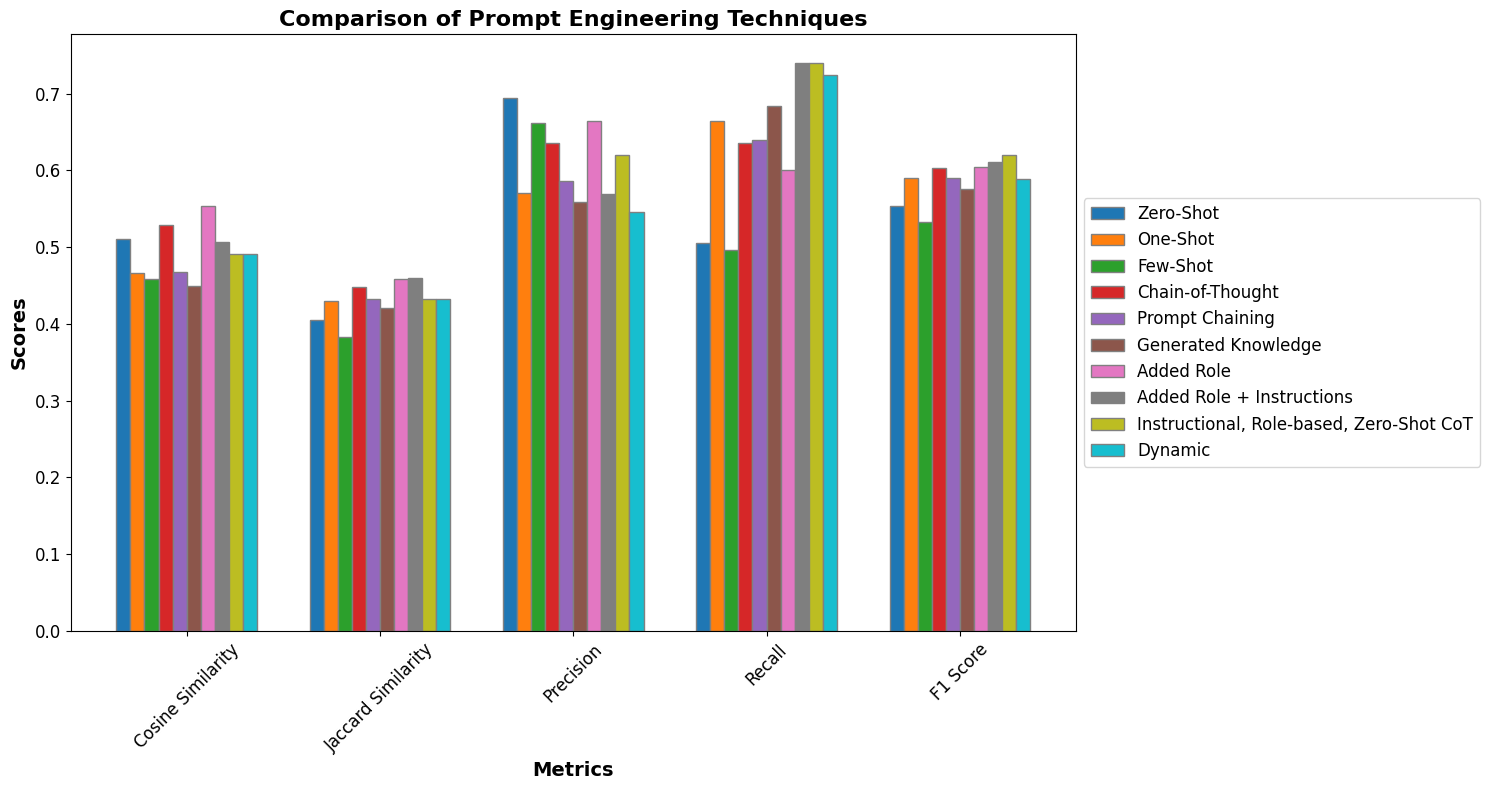

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ["Cosine Similarity", "Jaccard Similarity", "Precision", "Recall", "F1 Score"]

# Define the techniques and their corresponding values
techniques = {
    "Zero-Shot": [0.5105, 0.4053, 0.6940, 0.5053, 0.5541],
    "One-Shot": [0.4658, 0.4294, 0.5702, 0.6640, 0.5906],
    "Few-Shot": [0.4584, 0.3823, 0.6617, 0.4967, 0.5326],
    "Chain-of-Thought": [0.5286, 0.4483, 0.6355, 0.6359, 0.6030],
    "Prompt Chaining": [0.4682, 0.4321, 0.5857, 0.6401, 0.5896],
    "Generated Knowledge": [0.4492, 0.4212, 0.5584, 0.6834, 0.5755],
    "Added Role": [0.5533, 0.4590, 0.6639, 0.6009, 0.6038],
    "Added Role + Instructions": [0.5062, 0.4602, 0.5689, 0.7402, 0.6115],
    "Instructional, Role-based, Zero-Shot CoT": [0.4913, 0.4322, 0.6205, 0.7398, 0.6200],
    "Dynamic": [0.4913, 0.4322, 0.5459, 0.7245, 0.5881]
}

# Number of techniques
num_techniques = len(techniques)

# Set the bar width and the space between groups of bars
bar_width = 0.08
group_space = 0.3

# Set positions of the bars on the x-axis with space between groups
r = np.arange(len(metrics)) * (bar_width * num_techniques + group_space)

# Create the bar chart
fig, ax = plt.subplots(figsize=(15, 8))

for i, (technique, values) in enumerate(techniques.items()):
    ax.bar(r + i * bar_width, values, width=bar_width, edgecolor='grey', label=technique)

# Add labels with increased font size
ax.set_xlabel('Metrics', fontweight='bold', fontsize=14)
ax.set_ylabel('Scores', fontweight='bold', fontsize=14)
ax.set_title('Comparison of Prompt Engineering Techniques', fontweight='bold', fontsize=16)
ax.set_xticks(r + bar_width * (num_techniques - 1) / 2)
ax.set_xticklabels(metrics, fontsize=12)

# Increase the font size of the y-ticks
ax.tick_params(axis='y', labelsize=12)

# Place the legend outside the plot with increased font size
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Show the plot with the x-ticks rotated and tight layout
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


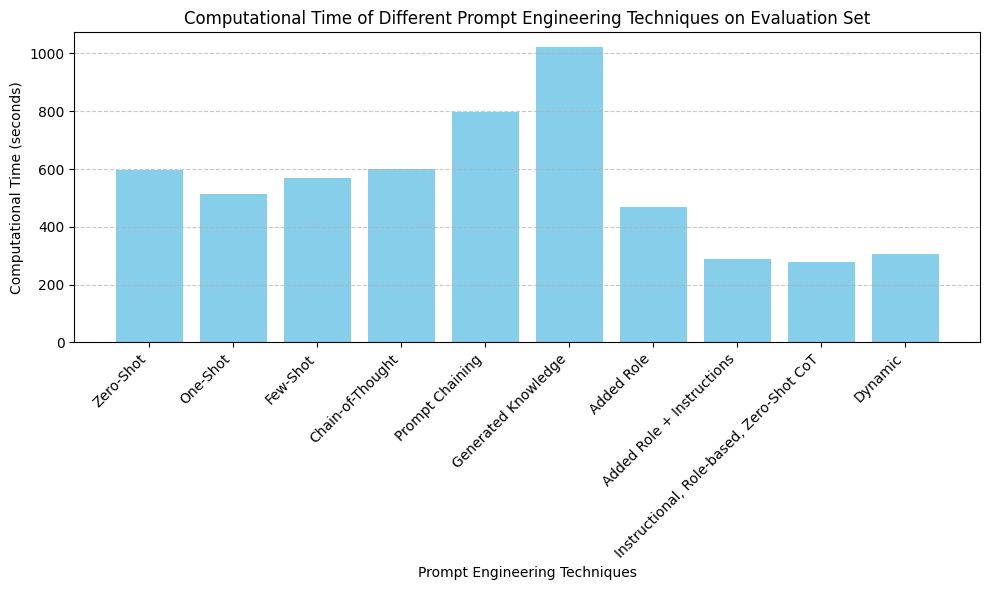

In [ ]:
import matplotlib.pyplot as plt

# Data
techniques = [
    "Zero-Shot",
    "One-Shot",
    "Few-Shot",
    "Chain-of-Thought",
    "Prompt Chaining",
    "Generated Knowledge",
    "Added Role",
    "Added Role + Instructions",
    "Instructional, Role-based, Zero-Shot CoT",
    "Dynamic"
]
times = [
    597,
    512,
    569,
    601,
    798,
    1022,
    470,
    290,
    279,
    306
]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(techniques, times, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Prompt Engineering Techniques')
plt.ylabel('Computational Time (seconds)')
plt.title('Computational Time of Different Prompt Engineering Techniques on Evaluation Set')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


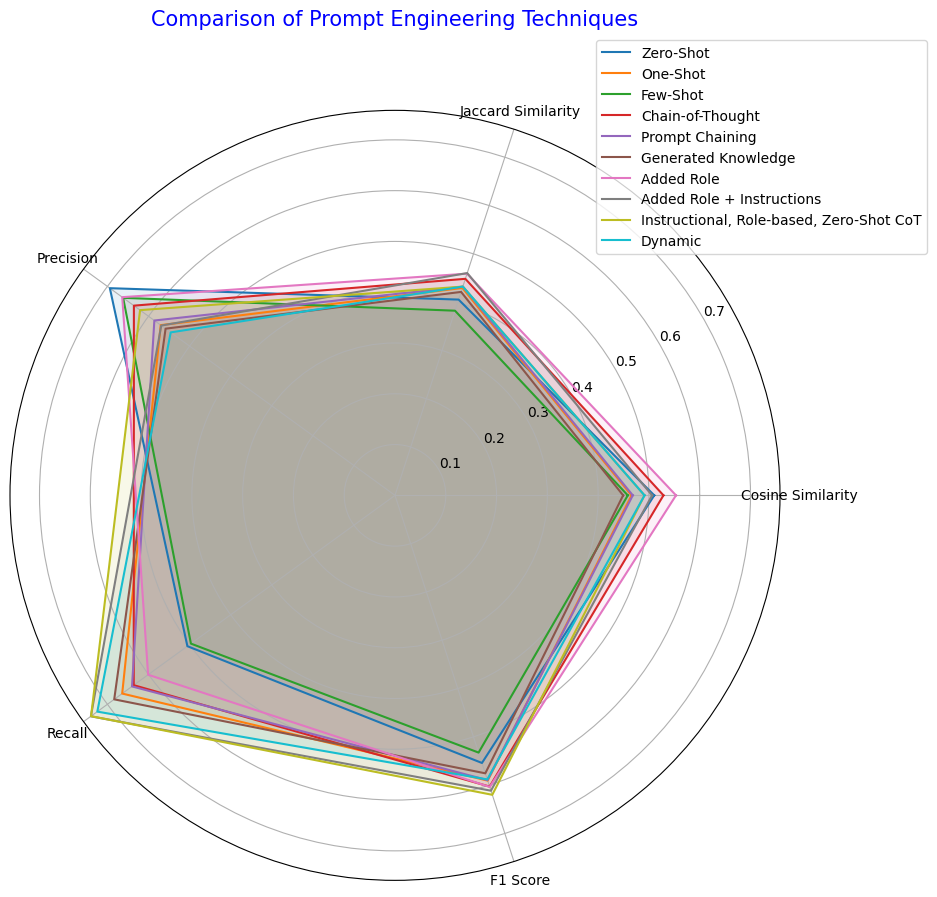

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ["Cosine Similarity", "Jaccard Similarity", "Precision", "Recall", "F1 Score"]
num_metrics = len(metrics)

# Define the techniques and their corresponding values
techniques = {
    "Zero-Shot": [0.5105, 0.4053, 0.6940, 0.5053, 0.5541],
    "One-Shot": [0.4658, 0.4294, 0.5702, 0.6640, 0.5906],
    "Few-Shot": [0.4584, 0.3823, 0.6617, 0.4967, 0.5326],
    "Chain-of-Thought": [0.5286, 0.4483, 0.6355, 0.6359, 0.6030],
    "Prompt Chaining": [0.4682, 0.4321, 0.5857, 0.6401, 0.5896],
    "Generated Knowledge": [0.4492, 0.4212, 0.5584, 0.6834, 0.5755],
    "Added Role": [0.5533, 0.4590, 0.6639, 0.6009, 0.6038],
    "Added Role + Instructions": [0.5062, 0.4602, 0.5689, 0.7402, 0.6115],
    "Instructional, Role-based, Zero-Shot CoT": [0.4913, 0.4322, 0.6205, 0.7398, 0.6200],
    "Dynamic": [0.4913, 0.4322, 0.5459, 0.7245, 0.5881]
}

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# The radar chart needs a closed loop, so append the start to the end.
angles += angles[:1]

# Create the radar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot each technique
for technique, values in techniques.items():
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=technique)
    ax.fill(angles, values, alpha=0.1)

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_rlabel_position(30)
ax.set_title('Comparison of Prompt Engineering Techniques', size=15, color='blue', y=1.1)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# Show the plot
plt.show()


# Testing LLM ensemble techniques


## Ensemble Averaging with Majority Voting (EAMV)

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time
from collections import Counter
from tqdm import tqdm
import random

# Start timing
start_time = time.time()

# Set the models and the number of bootstrap samples
model_ids = ["gemma2", "llama3", "mistral"]
n_estimators = 3

# Initialize multiple versions of the different models
models = [Ollama(model=model_id) for model_id in model_ids]

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def query_chunk(chunk, model):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])

    print("DEBUG: Response from model.invoke:", response)  # Debug print

    if isinstance(response, str):
        cleaned_text = cleanup_generated_text(response)
        return cleaned_text.strip()
    else:
        logging.error("Unexpected response format from model.invoke")
        return ""

def majority_voting(outputs):
    """ Function to perform majority voting among the model outputs. """
    output_counts = Counter(outputs)
    return output_counts.most_common(1)[0][0]


# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path, models)

        # Save results to the file
        output_file_path = r'/content/AA_bagging.txt'
        save_results_to_file(output_file_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")
                print(f"Chunk {chunk_id+1}:\n{result}")
        else:
            logging.info("No information about 'assets', 'locations', and 'ownerships' found in the documents.")
    else:
        logging.error("Table 'filings' not found in the database.")

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Log and print the execution time
logging.info(f"Execution time: {execution_time:.2f} seconds")
print(f"Execution time: {execution_time:.2f} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [01:38<47:47, 98.87s/it]

DEBUG: Response from model.invoke:  Physical assets: 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania
               Common Stock, par value $0.01 per share AA New York Stock Exchange (Equipment or infrastructure within the office building is not specified)

Locations: 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania

Ownerships: Alcoa Corp Ororation

Commodities: Not specified in the text
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regulation 14A. TABLE OF CONTENTS Page Part I Item 1. Business 1 Item 1A. Risk Factors 16 Item 1B. Unresolved Staff Comments 30 Item 1C. Cybersecurity 31 Item 2. Properties 32 Item 3. Legal Proceedings 44 Item 4. Mine Safety Disclosures 45 Part II I


Processing chunks:   7%|▋         | 2/30 [02:33<33:58, 72.79s/it]

DEBUG: Response from model.invoke:  physical assets: ["Alcoa Corporation's 27 locations", "bauxite mining facilities", "alumina refining plants", "aluminum smelting and casting operations", "energy production assets"]
locations: ["across nine countries on six continents"]
ownerships: ["Alcoa World Alumina and Chemicals (joint venture between Alcoa and Alumina Limited)" for some of the Alumina segment locations, "Alcoa Corporation" for the rest]
commodities: ["aluminum", "alumina"]
relationships: [
  "bauxite mining facilities: location unknown, ownership: Alcoa Corporation or its joint venture with Alumina Limited, commodity: bauxite (not mentioned in the text but required to extract aluminum) ",
  "alumina refining plants: location unknown, ownership: Alcoa World Alumina and Chemicals (joint venture between Alcoa and Alumina Limited), commodity: alumina",
  "aluminum smelting and casting operations: locations across nine countries, ownership: Alcoa Corporation, commodity: aluminum",
 


Processing chunks:  10%|█         | 3/30 [03:45<32:42, 72.70s/it]

DEBUG: Response from model.invoke:  physical assets: bauxite mines, alumina refineries, an aluminum smelter
   locations: [Australia (Alumina Limited is incorporated), country unspecified (other affiliated entities)]
   ownerships: Alcoa Corporation and Alumina Limited (AWAC), other partnerships not specified
   commodities: bauxite, alumina, aluminum
----------------------------------------------------------------------------------------------------
Chunk 4: Alcoa Corporation owns 60% and Alumina Limited owns 40% of these entities, directly or indirectly, with such entities being consolidated by Alcoa Corporation for financial reporting purposes. The scope of AWAC generally includes the mining of bauxite and other aluminous ores; the refining, production, and sale of smelter grade and non-metallurgical alumina; and the production of certain primary aluminum products. Alcoa provides the operating management for AWAC, which is subject to direction provided by the Strategic Council of AW


Processing chunks:  13%|█▎        | 4/30 [05:32<37:20, 86.17s/it]

DEBUG: Response from model.invoke:  Physical assets: ["100% of the bauxite mining operations of Alcoa's affiliate, Alcoa of Australia Limited (AofA)", "Juruti bauxite deposit and mine in Brazil", "45% interest in Halco (Mining) Inc., a bauxite consortium that owns a 51% interest in Compagnie des Bauxites de Guinée (CBG), a bauxite mine in Guinea", "39.96% interest in the São Luís refinery in Brazil", "55% interest in the Portland, Australia smelter", "25.1% interest in the mine and refinery in Ras Al Khair, Saudi Arabia", "100% of the refinery and alumina-based chemicals assets at San Ciprián, Spain", "100% of Alcoa Steamship Company LLC", "100% of the refinery assets at the closed facility in Point Comfort, Texas, United States", "100% interest in various assets formerly used for mining and refining in the Republic of Suriname (Suriname)"],
locations: ["Alcoa of Australia Limited (AofA)", "Brazil", "Guinea", "São Luís, Brazil", "Portland, Australia", "Ras Al Khair, Saudi Arabia", "San


Processing chunks:  17%|█▋        | 5/30 [07:07<37:07, 89.11s/it]

DEBUG: Response from model.invoke:  physical assets: ["bauxite mine", "alumina refinery", "aluminum smelter", "Aluminerie de Bécancour Inc. smelter"],
locations: ["Ras Al Khair industrial zone on the east coast of Saudi Arabia", "Bécancour, Québec"],
ownerships: ["Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture", "Alcoa owns a 25.1% interest in MAC", "AWA LLC holds a 45% interest in Halco", "Alcoa owns 74.95% of the Aluminerie de Bécancour Inc. smelter through its 50% equity investment in Pechiney Reynolds Quebec, Inc."],
commodities: ["bauxite", "alumina", "aluminum", "none specified for Aluminerie de Bécancour Inc. smelter"]
relationships: [
"asset: bauxite mine, location: Ras Al Khair industrial zone on the east coast of Saudi Arabia, ownership: Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture, commodity: bauxite",
"asset: alumina refinery, location: Ras Al Khair industrial zone on the east coast of Saudi Arabia, ownership: Ma’aden owns a 74.9% interes


Processing chunks:  20%|██        | 6/30 [09:16<41:04, 102.70s/it]

DEBUG: Response from model.invoke:  physical assets: ["refinery", "smelter and casthouse", "Strathcona calciner", "Hydropower Machadinho Hydro Power Plant (HPP)", "Barra Grande HPP", "Estreito Hydro Power Plant", "Serra do Facão Hydro Power Plant"],
locations: ["southern Brazil (Machadinho Hydro Power Plant, Barra Grande HPP)", "Pelotas River (Barra Grande HPP, Estreito Hydro Power Plant, Serra do Facão HPP)", "Tocantins River (Estreito Hydro Power Plant)", "Sao Marcos River (Serra do Facão Hydro Power Plant)", "Manicouagan River (Manicouagan Power Limited Partnership)"],
ownerships: ["AWAB (39.96% in refinery, 25.1% in MBAC)", "Rio Tinto (10% in refinery, joint venture in Strathcona calciner, ownership interest in Hydropower Machadinho HPP and Barra Grande HPP)", "Alcoa Alumínio (60% in smelter and casthouse, 25.5% in Estreito Energia S.A., 40% in refinery, 39% in Strathcona calciner, 27.3% in Hydropower Machadinho Hydro Power Plant (HPP), 42.2% in Barra Grande HPP, 25.5% in Estreito 


Processing chunks:  23%|██▎       | 7/30 [10:51<38:27, 100.32s/it]

DEBUG: Response from model.invoke:  physical assets: ["Kwinana", "Pinjarra", "Wagerup", "Poços de Caldas", "São Luís (Alumar)", "San Ciprián", "Ras Al Khair (MBAC)"],
locations: ["Australia", "Brazil", "Spain", "Saudi Arabia"],
ownerships: ["Alcoa Corporation Consolidated Capacity", "AWAC"],
commodities: ["bauxite", "alumina"]
relationships: [
    {"asset": "Kwinana", "location": "Australia", "ownership": "Alcoa Corporation Consolidated Capacity", "commodity": "bauxite"},
    {"asset": "Pinjarra", "location": "Australia", "ownership": "Alcoa Corporation Consolidated Capacity", "commodity": "bauxite"},
    {"asset": "Wagerup", "location": "Australia", "ownership": "Alcoa Corporation Consolidated Capacity", "commodity": "bauxite"},
    {"asset": "Poços de Caldas", "location": "Brazil", "ownership": "Alcoa Corporation Consolidated Capacity", "commodity": "bauxite"},
    {"asset": "São Luís (Alumar)", "location": "Brazil", "ownership": "Equity Interests", "commodity": "bauxite"},
    {"ass


Processing chunks:  27%|██▋       | 8/30 [12:50<38:59, 106.34s/it]

DEBUG: Response from model.invoke:  physical assets: ["Alcoa Corporation's worldwide smelting and casthouse system", "Poços de Caldas facility", "São Luís (Alumar)", "Baie Comeau, Québec", "Bécancour, Québec", "Deschambault, Québec", "Iceland Fjarðaál", "Lista", "Mosjøen", "San Ciprián", "Massena West, NY", "Evansville, IN (Warrick)", "Ras Al Khair (MAC)" ]
locations: ["Australia Portland", "Brazil Poços de Caldas 2 N/A N/A São Luís (Alumar)", "Canada Baie Comeau, Québec", "Canada Bécancour, Québec", "Canada Deschambault, Québec", "Iceland Fjarðaál", "Norway Lista", "Mosjøen", "Spain San Ciprián", "United States Massena West, NY", "Evansville, IN (Warrick)", "Saudi Arabia Ras Al Khair (MAC)" ]
ownerships: ["Alcoa Corporation's consolidated capacity", "(2) The Poços de Caldas facility is a casthouse and does not include a smelter" ]
commodities: ["aluminum"]
relationships: [asset: "Alcoa Corporation’s worldwide smelting and casthouse system", location: "Worldwide", ownership: "Alcoa Cor


Processing chunks:  30%|███       | 9/30 [14:41<37:42, 107.73s/it]

DEBUG: Response from model.invoke:  Physical assets: ["Portland smelter", "Intalco aluminum smelter", "San Ciprián smelter", "Barra Grande", "Estreito", "Machadinho", "Serra do Facão", "Manicouagan", "Warrick"],
locations: ["Portland (USA)", "Intalco (USA)", "San Ciprián (Spain)", "Brazil" (Barra Grande, Estreito, Machadinho, Serra do Facão), "Canada" (Manicouagan), "United States" (Warrick)],
ownerships: ["Alcoa Corporation" (Portland smelter, Intalco aluminum smelter, San Ciprián smelter, Barra Grande, Estreito, Machadinho, Serra do Facão), "Alcoa Power Generating Inc." (certain Federal Energy Regulatory Commission (FERC)-regulated transmission assets in Indiana, Tennessee, New York, and Washington)],
commodities: ["aluminum"]
relationships: [
  "asset: Portland smelter, location: Portland (USA), ownership: Alcoa Corporation, commodity: aluminum",
  "asset: Intalco aluminum smelter, location: Intalco (USA), ownership: Alcoa Corporation, commodity: aluminum",
  "asset: San Ciprián sme


Processing chunks:  33%|███▎      | 10/30 [16:36<36:40, 110.02s/it]

DEBUG: Response from model.invoke:  physical assets: ["Massena West smelter", "Alcoa Portland smelter", "San Ciprián smelter", "Lista smelter", "Mosjøen smelter"],
locations: ["New York (Massena West)", "Australia", "Québec", "Spain", "Norway"],
ownerships: ["Alcoa (Massena West, Portland)","Not explicitly stated (San Ciprián)", "Not explicitly stated (Lista, Mosjøen)"],
commodities: ["electricity (Massena West, San Ciprián, Lista, Mosjøen)", "natural gas (Portland)"].
relationships: [
    asset: 'Massena West smelter', location: 'New York', ownership: 'Alcoa', commodity: 'electricity'
    asset: 'Alcoa Portland smelter', location: 'Australia', ownership: 'Alcoa', commodity: 'electricity and natural gas'
    asset: 'San Ciprián smelter', location: 'Spain', ownership: 'Not explicitly stated', commodity: 'electricity'
    asset: 'Lista smelter', location: 'Norway', ownership: 'Not explicitly stated', commodity: 'electricity'
    asset: 'Mosjøen smelter', location: 'Norway', ownership: 'N


Processing chunks:  37%|███▋      | 11/30 [18:25<34:43, 109.68s/it]

DEBUG: Response from model.invoke:  Physical assets: ["Iceland Landsvirkjun hydroelectric facility", "Spanish San Ciprián refinery", "Alcoa's Fjarðaál smelter", "Alumar smelter"],
locations: ["Iceland", "Spain", "not specified", "not specified"],
ownerships: ["Iceland Landsvirkjun (national power company)", "Company (for Fjarðaál and Alumar smelters)"],
commodities: ["electricity", "natural gas"]
relationships: [
    "asset: Iceland Landsvirkjun hydroelectric facility, location: Iceland, ownership: Iceland Landsvirkjun (national power company), commodity: electricity",
    "asset: Spanish San Ciprián refinery, location: Spain, ownership: Company, commodity: natural gas",
    "asset: Alcoa's Fjarðaál smelter, location: not specified, ownership: Company, commodity: not specified (but the electricity is used for smelting purposes)",
    "asset: Alumar smelter, location: not specified, ownership: Company, commodity: not specified (it is assumed that electricity and other resources are used


Processing chunks:  40%|████      | 12/30 [20:08<32:16, 107.59s/it]

DEBUG: Response from model.invoke:  Physical assets: alumina refineries, bauxite mines, casthouses
   Locations: North America, South America, Europe, the Middle East, Australia, China
   Ownerships: Company (Alcoa)
   Commodities: alumina, aluminum

   Relationships:
   - relationship: refineries: Alcoa-owned refineries, location: strategically located, ownership: Company (Alcoa), commodity: alumina
   - relationship: bauxite mines: Alcoa-operated mines, partnership-operated mines, offtake agreements mines, location: Brazil and Guinea, ownership: Company (Alcoa) or partners, commodity: bauxite
   - relationship: casthouses: Alcoa's casthouses, location: not specified, ownership: Company (Alcoa), commodity: aluminum
----------------------------------------------------------------------------------------------------
Chunk 13: As a result of product development and technological advancement, the Company continues to pursue patent protection in jurisdictions throughout the world. As of De


Processing chunks:  43%|████▎     | 13/30 [21:41<29:14, 103.18s/it]

DEBUG: Response from model.invoke:  physical assets: facilities (impoundments), equipment for environmental control
   locations: worldwide (implied by the context)
   ownerships: Alcoa
   commodities: materials (implied from the context, but specific commodities are not mentioned)
   relationships:
      - asset: "facilities (impoundments)", location: "'worldwide'", ownership: "'Alcoa'", commodity: "'materials'"
      - asset: "equipment for environmental control", location: "'worldwide'", ownership: "'Alcoa'", commodity: "'materials'"
----------------------------------------------------------------------------------------------------
Chunk 14: Our Company policies, including the Code of Conduct and Ethics, Harassment and Bullying Free Workplace Policy, and EHS Vision, Values, Mission, and Policy, support our mission to advance our Company culture and core values. Alcoa maintains a Human Rights Policy that applies globally to the Company, its partnerships, and other business associate


Processing chunks:  47%|████▋     | 14/30 [22:32<23:17, 87.37s/it] 

DEBUG: Response from model.invoke:  Physical assets: Facilities, equipment (not specified), infrastructure
   Locations: United States, Europe, Canada, South America, Australia
   Ownerships: Alcoa Corporation
   Commodities: Not specified in the text (The text mentions that Alcoa is involved in various industries, but it does not specify the commodities used at each location)

relationships: [asset: "Facilities", location: "United States", ownership: "Alcoa Corporation", commodity: "Not specified"],
[asset: "Equipment", location: "Multiple (not specified)", ownership: "Alcoa Corporation", commodity: "Not specified"],
[asset: "Infrastructure", location: "Multiple (not specified)", ownership: "Alcoa Corporation", commodity: "Not specified"]
----------------------------------------------------------------------------------------------------
Chunk 15: Mr. Oplinger served as Executive Vice President and Chief Operations Officer of the Company from February 2023 until his appointment as Pre


Processing chunks:  50%|█████     | 15/30 [23:02<17:33, 70.23s/it]

DEBUG: Response from model.invoke:  Physical assets: Facilities (Company, Alcoa Corporation), Equipment (unspecified), Infrastructure (unspecified), Global Primary Products division, Global Shared Services, Global Procurement Center of Excellence
  Locations: Brazil, unspecified
  Ownerships: Company, ParentCo, Alcoa Corporation
  Commodities: Copper, renewable energy, community issues, energy assets (not specified), aluminum (implied)

Relationships:
- relationships: [asset: "Facilities", location: "Brazil", ownership: "ParentCo", commodity: "unspecified"],
  [asset: "Equipment", location: "unspecified", ownership: "Company", commodity: "unspecified"],
  [asset: "Infrastructure", location: "unspecified", ownership: "Company", commodity: "unspecified"],
  [asset: "Global Primary Products division", location: "unspecified", ownership: "ParentCo", commodity: "Copper"],
  [asset: "Global Shared Services", location: "unspecified", ownership: "Alcoa Corporation", commodity: "community issue


Processing chunks:  53%|█████▎    | 16/30 [24:08<16:05, 68.95s/it]

DEBUG: Response from model.invoke:  physical assets: bauxite mines, alumina refineries, aluminum smelters
   locations: Australia (for Alcoa's global bauxite, alumina, and aluminum assets), South Australia (for OZ Minerals Limited)
   ownerships: Alcoa Corporation, OZ Minerals Limited, SIMEC Mining
   commodities: bauxite, alumina, aluminum
----------------------------------------------------------------------------------------------------
Chunk 17: In addition, industry overcapacity, a sustained slowdown in Chinese aluminum demand, or a significant slowdown in other markets, that is not offset by decreases in supply of aluminum or increased aluminum demand in emerging economies, such as India, Brazil, and several Southeast Asian countries, could have an adverse effect on the global supply and demand for aluminum and aluminum prices. Also, changes in the aluminum market can cause changes in the alumina and bauxite markets, which could also materially affect our business, financial cond


Processing chunks:  57%|█████▋    | 17/30 [25:31<15:51, 73.17s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities (production plants), equipment, infrastructure
   Commodities: aluminum, alumina, bauxite
   Relationships:
      - asset: facilities, location: United States (mentioned but not specifically identified in the text), ownership: company, commodity: aluminum
      - asset: equipment, location: United States, ownership: company, commodity: aluminum
      - asset: infrastructure, location: not specified in the text, ownership: company, commodity: aluminum
      - asset: facilities (production plants), location: not specified but possibly other regions like India, Brazil, and several Southeast Asian countries, ownership: company, commodity: alumina
      - asset: equipment, location: not specified but possibly other regions, ownership: company, commodity: alumina
      - asset: infrastructure, location: not specified but possibly other regions, ownership: company, commodity: alumina
      - asset: facilities (production plants),


Processing chunks:  60%|██████    | 18/30 [26:51<15:02, 75.22s/it]

DEBUG: Response from model.invoke:  physical assets: facilities, equipment (mining), infrastructure
   locations: Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia
   ownerships: N/A (the text does not explicitly state the ownership of these assets)
   commodities: bauxite (implied by the context of mining operations)
   relationships: [asset: "mining facilities", location: "Australia", ownership: "N/A", commodity: "bauxite"], [asset: "mining facilities", location: "Brazil", ownership: "N/A", commodity: "bauxite"], [asset: "mining facilities", location: "Canada", ownership: "N/A", commodity: "bauxite"], [asset: "mining facilities in Europe", location: "Europe", ownership: "N/A", commodity: "bauxite"], [asset: "mining facilities", location: "Guinea", ownership: "N/A", commodity: "bauxite"], [asset: "mining facilities", location: "Saudi Arabia", ownership: "N/A", commodity: "bauxite"]
--------------------------------------------------------------------------------------------------


Processing chunks:  63%|██████▎   | 19/30 [28:10<13:58, 76.25s/it]

DEBUG: Response from model.invoke:  physical assets: Huntly and Willowdale bauxite mines, refineries, smelters
   locations: Western Australia, Spain
   ownerships: Company
   commodities: bauxite, alumina, aluminum
----------------------------------------------------------------------------------------------------
Chunk 20: Our business, financial condition, and results of operations have been and could continue to be negatively affected by unfavorable changes in the cost, quality, or availability of energy, raw materials, including carbon products, caustic soda, and other key inputs, such as bauxite, as well as freight costs associated with transportation of raw materials and key inputs to refining and smelting locations. We may not be able to fully offset the effects of higher raw material or energy costs through price increases, productivity improvements, cost reduction programs, or reductions or curtailments to production at our operations. A decrease in the quality of raw materia


Processing chunks:  67%|██████▋   | 20/30 [29:20<12:24, 74.46s/it]

DEBUG: Response from model.invoke:  physical assets: ["smelting capacity", "refining capacity", "operations", "facilities"]
locations: [] (As no specific geographical locations are mentioned)
ownerships: ["Company"]
commodities: ["aluminum", "bauxite", "alumina", "energy"]

relationships: [
  asset: 'smelting capacity', location: '', ownership: 'Company', commodity: 'aluminum'
  asset: 'refining capacity', location: '', ownership: 'Company', commodity: 'alumina'
  asset: 'operations', location: '', ownership: 'Company', commodity: ['aluminum', 'bauxite']
  asset: 'facilities', location: '', ownership: 'Company', commodity: 'energy'
]
----------------------------------------------------------------------------------------------------
Chunk 21: Our announced multi-year portfolio review of Company assets includes evaluating our portfolio to assess each facility’s strategic benefits, competitiveness, and viability. The aim of this review, which is expected to be complete in 2024, is for th


Processing chunks:  70%|███████   | 21/30 [30:18<10:23, 69.31s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities, bauxite mines, alumina refineries, aluminum smelter
locations: seven countries (not specified for each asset)
ownerships: AWAC - Alcoa and Alumina Limited, joint venture with the Saudi Arabian Mining Company (Ma’aden)
commodities: alumina, aluminum, bauxite (mined for alumina and aluminum production)
relationships:
1. asset: facilities, location: not specified, ownership: not specified, commodity: not specified (implied to be used for the production of goods and services by the company but not specified)
2. asset: bauxite mines, location: seven countries, ownership: AWAC, commodity: bauxite
3. asset: alumina refineries, location: seven countries, ownership: AWAC, commodity: alumina
4. asset: aluminum smelter, location: not specified, ownership: not specified (implied to be part of the AWAC joint venture), commodity: aluminum
--------------------------------------------------------------------------------------------------


Processing chunks:  73%|███████▎  | 22/30 [31:24<09:07, 68.47s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities, equipment, infrastructure (no specific locations mentioned)
Commodities: aluminum, alumina
relationships: [asset: "facilities, equipment, infrastructure", location: "", ownership: "", commodity: "aluminum"], [asset: "facilities, equipment, infrastructure", location: "", ownership: "", commodity: "alumina"]
----------------------------------------------------------------------------------------------------
Chunk 23: While the future of Pillar One remains uncertain, it is likely that the global minimum tax under Pillar Two will be fully effective in the countries in which we operate by January 1, 2025. We are continuing to evaluate the Pillar Two Framework and its potential impact on future periods. Our domestic and international tax liabilities are dependent upon the distribution of profits among the different jurisdictions in which we operate. Our tax expense includes estimates of additional tax that may be incurred for t


Processing chunks:  77%|███████▋  | 23/30 [32:44<08:24, 72.00s/it]

DEBUG: Response from model.invoke:  Physical assets: Massena West (New York) smelter, Warrick smelter
   Locations: New York, Warrick
   Ownerships: Not mentioned in the text
   Commodities: aluminum
----------------------------------------------------------------------------------------------------
Chunk 24: See Business—Competition. We may not be able to obtain or maintain adequate insurance coverage. We maintain various forms of insurance, including insurance covering claims related to our properties and risks associated with our operations. Our existing property and liability insurance coverages contain exclusions and limitations on coverage. In connection with renewals of insurance, we have experienced, or could experience in the future, additional exclusions and limitations on coverage, significantly increased self-insured retentions and deductibles, and significantly higher premiums. We may not be able to procure adequate insurance coverage for certain risks, if at all, and exis


Processing chunks:  80%|████████  | 24/30 [33:54<07:06, 71.16s/it]

DEBUG: Response from model.invoke:  physical assets: facilities, equipment, infrastructure
   locations: none (the text does not mention any geographical location or region)
   ownerships: not specified in the text
   commodities: raw materials, energy (specific types like copper, gold, electricity are not mentioned but can be inferred from the context)

   relationships: [asset: "facilities", location: "not specified", ownership: "not specified", commodity: "raw materials"],
   [asset: "equipment", location: "not specified", ownership: "not specified", commodity: "raw materials"],
   [asset: "infrastructure", location: "not specified", ownership: "not specified", commodity: "energy"]
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several gover


Processing chunks:  83%|████████▎ | 25/30 [34:48<05:31, 66.24s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities, equipment, infrastructure (specific types such as aluminum smelting technology, alumina refining technologies are mentioned but they are not the main physical assets, so they are excluded)
locations: United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon
ownerships: [Company's assets] (implied but not explicitly stated)
commodities: Energy (specific types such as copper, gold, electricity, renewable energy are not explicitly mentioned, so they are excluded as the text focuses on energy in general)

relationships:
- asset: facilities, location: United States, ownership: Company's assets, commodity: Energy
- asset: equipment, location: Asia, ownership: Company's assets, commodity: Energy
- asset: infrastructure, location: Brazil, ownership: Company's assets, commodity: Energy
- asset: facilities, location: Canada, ownership: Company's assets, commodity: Energy
- asset: facilities, location: EU, ownership: Company's 


Processing chunks:  87%|████████▋ | 26/30 [35:59<04:30, 67.67s/it]

DEBUG: Response from model.invoke:  physical assets: facilities, equipment, infrastructure
   commodities: n/a (the text does not specify any commodity the physical assets are being used for)
   relationships: []
----------------------------------------------------------------------------------------------------
Chunk 27: Our operations include impoundment structures, which could impact the environment or cause exposure to hazardous substances or other damage, which could result in material liabilities to us. Some of our operations generate hazardous waste and other byproducts, which we contain in tailing facilities, residue storage areas, and other structural impoundments that are subject to extensive regulation and increasingly strict industry standards. Failure of storage areas caused by extreme weather events, erosion, or unanticipated structural failure of impoundments could result in severe, and in some cases catastrophic, damage to the environment, natural resources, or property


Processing chunks:  90%|█████████ | 27/30 [37:16<03:30, 70.33s/it]

DEBUG: Response from model.invoke:  Physical assets: ["imoundment structures", "tailing facilities", "residue storage areas", "structural impoundments"]
Locations: [] (The text does not specify any specific geographical locations for the mentioned physical assets)
Ownerships: ["Alcoa"]
Commodities: [Not explicitly mentioned in the text, but it can be inferred that these structures are used in aluminum production, which is a metal commodity]

relationships: [asset: "imoundment structures", location: "", ownership: "Alcoa", commodity: "aluminum"],
[asset: "tailing facilities", location: "", ownership: "Alcoa", commodity: "aluminum"],
[asset: "residue storage areas", location: "", ownership: "Alcoa", commodity: "aluminum"],
[asset: "structural impoundments", location: "", ownership: "Alcoa", commodity: "aluminum"]
----------------------------------------------------------------------------------------------------
Chunk 28: The terms of the Amended Revolving Credit Facility, Amended Japane


Processing chunks:  93%|█████████▎| 28/30 [38:32<02:23, 71.97s/it]

DEBUG: Response from model.invoke:  physical assets: ["The Company", "substantially all assets of the Company", "material domestic wholly-owned subsidiaries of the Company", "material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland"]
locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland]
ownerships: ["The Company", "material domestic wholly-owned subsidiaries of the Company", "material foreign wholly-owned subsidiaries of the Company"]
commodities: []
relationships: [asset: 'The Company', location: '', ownership: 'The Company', commodity: ''], asset: 'substantially all assets of the Company', location: '', ownership: 'The Company', commodity: ''], asset: "material domestic wholly-owned subsidiaries of the Company", location: [Australia, Canada], ownership: ['The Company'], commodity: ''], asset: "material foreign wholly-owned subsidiaries of the Company loca


Processing chunks:  97%|█████████▋| 29/30 [39:28<01:07, 67.30s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities, equipment
   Commodities: None (the text does not specify what commodity the physical assets are being used for)
   Relationships: [asset: "facilities", location: "", ownership: "", commodity: ""], [asset: "equipment", location: "", ownership: "", commodity: ""]
----------------------------------------------------------------------------------------------------
Chunk 30: 28 Cyber attacks and other cyber incidents are becoming more frequent and sophisticated, are constantly evolving, and are being made by groups and individuals with significant resources and a wide range of expertise and motives. Cyber attacks and security breaches may include, but are not limited to, unauthorized attempts to access information or digital infrastructure, efforts to direct payments to fictitious parties, viruses, ransomware, malicious codes, hacking, phishing (including through social engineering), denial of service, human error, and other 


Processing documents: 100%|██████████| 1/1 [40:33<00:00, 2433.85s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities, equipment, networks, systems, storage systems, cloud computing services
   Locations: Not explicitly mentioned in the text
   Ownerships: Company (owns its own systems and third-party vendors provide certain software applications, storage systems, and cloud computing services)
   Commodities: Information or data (not explicitly mentioned as a commodity, but the systems and networks are being used to store/process digital information)

Relationships:
1. asset: facilities, location: not explicitly mentioned, ownership: Company, commodity: information or data
2. asset: equipment, location: not explicitly mentioned, ownership: Company, commodity: information or data
3. asset: networks, location: not explicitly mentioned, ownership: Company, commodity: information or data
4. asset: systems, location: not explicitly mentioned, ownership: Company, commodity: information or data
5. asset: storage systems, location: not explicitly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [Pittsburgh, Pennsylvania] ownerships: [ALCOA CORP ORATION] commodities: [] relationships: []",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casting facilities] locations: [nine countries on six continents] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)] commodities: [bauxite, alumina, aluminum] relationships: [asset: bauxite mines, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: bauxite], [asset: alumina refineries, location: nine countries on six continents, ownership: Alcoa World Alumina and Chemicals, commodity: alumina], [asset: aluminum smelters, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: aluminum], [asset: casting facilities, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: aluminum]",
    "physical assets: [mining assets, refining assets, smelting capacity, aluminum smelter, bauxite mines, alumina refineries] locations: [seven countries] ownerships: [Alcoa Corporation and Alumina Limited] commodities: [aluminum, bauxite, alumina] relationships: [asset: mining assets, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: bauxite], [asset: refining assets, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: alumina], [asset: smelting capacity, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum], [asset: aluminum smelter, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum], [asset: bauxite mines, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: bauxite], [asset: alumina refineries, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: alumina]",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, bauxite deposit, mine, refinery, smelter, ocean freight and commercial shipping services, refinery assets] locations: [Australia, Brazil, Guinea, Saudi Arabia, Spain, United States (Texas), Suriname] commodities: [bauxite, alumina, aluminum, ocean freight and commercial shipping services] relationships: []",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] ownerships: ['Ma’aden (74.9% interest in MBAC and MAC joint venture)', 'Alcoa (25.1% interest in MAC)', 'AWAC (25.1% interest in MBAC)', 'Pechiney Reynolds Quebec, Inc.', 'Boké Investment Company (51%)', 'Government of Guinea (49%)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'smelter', location: 'Bécancour, Québec', ownership: 'Alcoa (74.95% through Pechiney Reynolds Quebec, Inc.) and Rio Tinto (25.05% through Pechiney Reynolds Quebec, Inc.)', commodity: 'aluminum'], [asset: 'bauxite mine', location: 'Boké region of Guinea', ownership: 'Boké Investment Company (51%) and Government of Guinea (49%)', commodity: 'bauxite'], [asset: 'refinery', location: 'Brazil', ownership: 'Unincorporated joint venture between Alcoa and Rio Tinto', commodity: 'alumina'], [asset: 'smelter', location: 'Brazil', ownership: 'Unincorporated joint venture between Alcoa and Rio Tinto', commodity: 'aluminum'], [asset: 'casthouse', location: 'Brazil', ownership: 'Unincorporated joint venture between Alcoa and Rio Tinto', commodity: 'aluminum']",
    "physical assets: [] locations: ['southern Brazil', 'northern Brazil', 'Sao Marcos River, central Brazil', 'Manicouagan River in the Province of Québec, Canada'] ownerships: [] commodities: ['aluminum', 'calcined coke', 'electricity', 'bauxite', 'alumina'] relationships: [asset: 'refinery', location: '', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%)', commodity: 'aluminum'], [asset: 'smelter', location: '', ownership: 'Alcoa Alumínio (60%) and South32 (40%)', commodity: 'aluminum'], [asset: 'casthouse', location: '', ownership: 'Alcoa Alumínio (60%) and South32 (40%)', commodity: 'aluminum'], [asset: 'Strathcona calciner', location: '', ownership: 'Alcoa (39%) and Rio Tinto (61%)', commodity: 'calcined coke'], [asset: 'Barra Grande HPP', location: 'southern Brazil', ownership: 'Alcoa Alumínio (42.2%) and unrelated third parties', commodity: 'electricity'], [asset: 'Estreito HPP', location: 'northern Brazil', ownership: 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%) and unrelated third parties', commodity: 'electricity'], [asset: 'Serra do Facão HPP', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%) and unrelated third parties', commodity: 'electricity'], [asset: 'Manicouagan Power Limited Partnership (Manicouagan)', location: 'Manicouagan River in the Province of Québec, Canada', ownership: 'affiliates of Alcoa and Hydro-Québec', commodity: 'electricity'], [asset: 'McCormick hydroelectric project', location: 'Manicouagan River in the Province of Québec, Canada', ownership: 'Alcoa (40%)', commodity: 'electricity']",
    "physical assets: [bauxite interests, bauxite offtake and supply agreements, alumina refineries, smelter grade alumina shipments, facilities] locations: [Australia, Brazil, Spain, Saudi Arabia] ownerships: [Alcoa Corporation, AWAC, MBAC] commodities: [bauxite, alumina] relationships: [asset: bauxite interests, location: Australia, ownership: Alcoa Corporation, commodity: bauxite], [asset: bauxite offtake and supply agreements, location: N/A, ownership: Alcoa Corporation, commodity: bauxite], [asset: alumina refineries, location: Australia, Brazil, Spain, Saudi Arabia, ownership: Alcoa Corporation, commodity: alumina], [asset: smelter grade alumina shipments, location: N/A, ownership: Alcoa Corporation, commodity: alumina], [asset: facilities, location: Australia, Brazil, Spain, Saudi Arabia, ownership: Alcoa Corporation, commodity: bauxite and alumina]",
    "physical assets: [smelting and casting operations, energy assets, MAC joint venture] locations: [] ownerships: [Alcoa Corporation, MAC joint venture] commodities: [aluminum, electricity] relationships: [asset: smelting and casting operations, location: worldwide, ownership: Alcoa Corporation, commodity: aluminum], [asset: energy assets, location: Brazil, Canada, United States, ownership: Alcoa Corporation, commodity: electricity], [asset: MAC joint venture, location: Saudi Arabia, ownership: Alcoa Corporation (25.1%), MAC, commodity: aluminum]",
    "physical assets: [] locations: [] ownerships: ['Alcoa Corporation'] commodities: ['aluminum', 'electricity'] relationships: []",
    "physical assets: [smelters, power plants] locations: [Québec, Massena, New York, Portland, Australia, Western Australia, San Ciprián, Spain, Lista, Norway, Mosjøen, Norway] ownerships: [Alcoa, Hydro-Québec, NYPA, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, workers’ representatives] commodities: [electricity, natural gas, renewable energy] relationships: [asset: smelters, location: Québec, ownership: Alcoa, commodity: electricity], [asset: smelters, location: Massena, New York, ownership: Alcoa, commodity: electricity], [asset: smelters, location: Portland, Australia, ownership: Alcoa, commodity: electricity], [asset: smelters, location: Western Australia, ownership: AofA, commodity: natural gas and electricity], [asset: San Ciprián smelter, location: San Ciprián, Spain, ownership: Alcoa, commodity: electricity], [asset: Lista smelter, location: Lista, Norway, ownership: Alcoa, commodity: electricity], [asset: Mosjøen smelter, location: Mosjøen, Norway, ownership: Alcoa, commodity: electricity]",
    "physical assets: ['hydroelectric facility', 'smelter', 'refinery'] locations: ['Iceland', 'Spain', 'South America', 'Fjarðaál smelter', 'San Ciprián refinery', 'Alumar smelter'] ownerships: ['Iceland Landsvirkjun', 'Alcoa', 'Naturgy'] commodities: ['electricity', 'power', 'natural gas'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'power'], [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas'], [asset: 'Alumar smelter', location: 'South America', ownership: 'Alcoa', commodity: 'power']",
    "physical assets: [alumina refineries, bauxite mines] locations: [Australia, Brazil, China, Europe, Guinea, Indonesia, North America, South America] ownerships: [Alcoa, partnerships, third-party customers] commodities: [aluminum, alumina, bauxite] relationships: [asset: alumina refineries, location: Australia, Brazil, China, Europe, Guinea, Indonesia, North America, South America, ownership: Alcoa, commodity: alumina], [asset: bauxite mines, location: Australia, Brazil, Guinea, ownership: Alcoa, partnerships, third-party customers, commodity: bauxite]",
    "physical assets: [Patents, Trademarks] locations: [] ownerships: [Alcoa] commodities: [] relationships: [asset: 'Patents', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'Trademarks', location: '', ownership: 'Alcoa', commodity: '']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum'] locations: ['Australia', 'South Australia', 'global'] ownerships: ['Alcoa Corporation'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite', location: 'global', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [facilities, equipment, infrastructure] locations: [] ownerships: [] commodities: [aluminum, alumina, bauxite] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum'], [asset: 'equipment', location: '', ownership: '', commodity: 'aluminum'], [asset: 'infrastructure', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: [] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia] ownerships: [] commodities: [aluminum] relationships: []",
    "physical assets: [mining operations, refining and smelting operations, Huntly mine, Willowdale bauxite mines, San Ciprián refinery and smelter operations] locations: [Western Australia, Spain] ownerships: [Company] commodities: [bauxite, alumina, aluminum] relationships: [asset: mining operations, location: Western Australia, ownership: Company, commodity: bauxite], [asset: refining and smelting operations, location: Spain, ownership: Company, commodity: alumina and aluminum], [asset: Huntly mine, location: Western Australia, ownership: Company, commodity: bauxite], [asset: Willowdale bauxite mines, location: Western Australia, ownership: Company, commodity: bauxite], [asset: San Ciprián refinery and smelter operations, location: Spain, ownership: Company, commodity: alumina and aluminum]",
    "physical assets: [facilities, equipment, smelting locations, refining locations] locations: [Western Australia] ownerships: [Company] commodities: [bauxite, alumina, aluminum, energy, carbon products, caustic soda] relationships: [asset: facilities, location: smelting locations, ownership: Company, commodity: bauxite, alumina, aluminum], [asset: equipment, location: refining locations, ownership: Company, commodity: bauxite, alumina, aluminum], [asset: smelting locations, location: Western Australia, ownership: Company, commodity: bauxite, alumina, aluminum], [asset: refining locations, location: smelting locations, ownership: Company, commodity: bauxite, alumina, aluminum]",
    "physical assets: ['facilities', 'bauxite mines', 'alumina refineries', 'aluminum smelter'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Saudi Arabian Mining Company (Ma’aden)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC', commodity: 'alumina'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC', commodity: 'aluminum']",
    "physical assets: [] locations: [Juruti, Brazil; Australia; United States] ownerships: [] commodities: [aluminum, alumina] relationships: []",
    "physical assets: ['facilities', 'equipment'] locations: ['Massena West (New York)', 'Warrick', 'Australia', 'Brazil', 'Canada', 'Norway'] ownerships: ['AofA'] commodities: ['aluminum', 'critical minerals'] relationships: [asset: 'facilities', location: 'Massena West (New York)', ownership: 'AofA', commodity: 'aluminum'], [asset: 'equipment', location: 'Warrick', ownership: 'AofA', commodity: 'aluminum'], [asset: 'facilities', location: 'Australia', ownership: 'AofA', commodity: 'alumina'], [asset: 'facilities', location: 'Brazil', ownership: 'AofA', commodity: 'alumina'], [asset: 'facilities', location: 'Canada', ownership: 'AofA', commodity: 'alumina'], [asset: 'facilities', location: 'Norway', ownership: 'AofA', commodity: 'alumina']",
    "physical assets: [properties] locations: [Spain] ownerships: [Company] commodities: [] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: '']",
    "physical assets: [facilities, equipment, infrastructure] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon] ownerships: [Company] commodities: [energy, aluminum, alumina refining products] relationships: [asset: facilities, location: United States, ownership: Company, commodity: energy], [asset: equipment, location: Asia, ownership: Company, commodity: energy], [asset: infrastructure, location: Brazil, ownership: Company, commodity: energy], [asset: facilities, location: Canada, ownership: Company, commodity: aluminum], [asset: equipment, location: EU, ownership: Company, commodity: alumina refining products], [asset: facilities, location: Jarrah Forest, ownership: Company, commodity: aluminum], [asset: infrastructure, location: Amazon, ownership: Company, commodity: alumina refining products]",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [impoundment structures, tailing facilities, residue storage areas, structural impoundments] locations: [] ownerships: [Alcoa] commodities: [] relationships: []",
    "physical assets: [substantially all assets] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland] commodities: [] relationships: [asset: 'substantially all assets', location: 'Australia', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Australia', commodity: ''], [asset: 'substantially all assets', location: 'Brazil', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Brazil', commodity: ''], [asset: 'substantially all assets', location: 'Canada', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Canada', commodity: ''], [asset: 'substantially all assets', location: 'Luxembourg', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Luxembourg', commodity: ''], [asset: 'substantially all assets', location: 'the Netherlands', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in the Netherlands', commodity: ''], [asset: 'substantially all assets', location: 'Norway', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Norway', commodity: ''], [asset: 'substantially all assets', location: 'Switzerland', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Switzerland', commodity: '']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [information technology systems] locations: [] ownerships: [Company, third-party providers] commodities: [] relationships: [asset: 'information technology systems', location: '', ownership: 'Company', commodity: ''], [asset: 'information technology systems', location: '', ownership: 'third-party providers', commodity: '']"
]



# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## Weighted Majority Voting Ensemble (WMVE)

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time
from collections import Counter
from tqdm import tqdm
import random

# Start timing
start_time = time.time()

# Set the models and the number of bootstrap samples
model_ids = ["gemma2", "llama3", "mistral"]
n_estimators = 3

# Initialize multiple versions of the different models
models = [Ollama(model=model_id) for model_id in model_ids]

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def query_chunk(chunk, model):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])

    print("DEBUG: Response from model.invoke:", response)

    if isinstance(response, str):
        cleaned_text = cleanup_generated_text(response)
        return cleaned_text.strip()
    else:
        logging.error("Unexpected response format from model.invoke")
        return ""

def weighted_majority_voting(outputs, weights):
    """ Function to perform weighted majority voting among the model outputs. """
    weighted_votes = Counter()
    for output, weight in zip(outputs, weights):
        weighted_votes[output] += weight
    return weighted_votes.most_common(1)[0][0]

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path, models)

        # Save results to the file
        output_file_path = r'/content/AA_boosting.txt'
        save_results_to_file(output_file_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")
                print(f"Chunk {chunk_id+1}:\n{result}")
        else:
            logging.info("No information about 'assets', 'locations', and 'ownerships' found in the documents.")
    else:
        logging.error("Table 'filings' not found in the database.")

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Log and print the execution time
logging.info(f"Execution time: {execution_time:.2f} seconds")
print(f"Execution time: {execution_time:.2f} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [01:13<35:17, 73.03s/it]

DEBUG: Response from model.invoke:  Physical assets: 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices)
locations: []
ownerships: Alcoa Corp Organization
commodities: [None provided in the text]

relationships: [asset: "201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania", location: 'Pittsburgh, Pennsylvania', ownership: 'Alcoa Corp Organization', commodity: 'None']
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regulation 14A. TABLE OF CONTENTS Page Part I Item 1. Business 1 Item 1A. Risk Factors 16 Item 1B. Unresolved Staff Comments 30 Item 1C. Cybersecurity 31 Item 2. Properties 32 Item 3. Legal Proceedings 44 Item 4. Mine Safety Disclosures 


Processing chunks:   7%|▋         | 2/30 [02:28<34:37, 74.19s/it]

DEBUG: Response from model.invoke:  physical assets: Alcoa Corporation has direct and indirect ownership of 27 locations (facilities, equipment), these include mining sites for bauxite, alumina refineries, aluminum smelting and casting facilities, and energy production assets.

locations: Aluminum operations are located across nine countries on six continents. The specific locations are not explicitly mentioned in the text.

ownerships: Alcoa Corporation has direct and indirect ownership of these locations.

commodities: aluminum, alumina

relationships:
1. asset: Aluminum smelting and casting facilities, location: unknown (not specified), ownership: Alcoa Corporation, commodity: aluminum
2. asset: Alumina refineries, location: unknown (not specified), ownership: Alcoa Corporation, commodity: alumina
3. asset: Bauxite mining sites, location: unknown (not specified), ownership: Alcoa Corporation, commodity: bauxite (precursor to aluminum and alumina)
4. asset: Energy production assets, 


Processing chunks:  10%|█         | 3/30 [03:50<35:00, 77.79s/it]

DEBUG: Response from model.invoke:  Physical assets: ["bauxite mines", "alumina refineries", "an aluminum smelter"]
locations: ["seven countries" (no specific locations mentioned)];
ownerships: ["Alcoa Corporation and Alumina Limited (AWAC)" for the joint ventures]
commodities: ["bauxite", "alumina", "aluminum"]
relationships: [
  "asset: bauxite mines, location: seven countries, ownership: Alcoa World Alumina and Chemicals (AWAC), commodity: bauxite",
  "asset: alumina refineries, location: seven countries, ownership: Alcoa World Alumina and Chemicals (AWAC), commodity: alumina",
  "asset: an aluminum smelter, location: (not specified), ownership: Alcoa World Alumina and Chemicals (AWAC), commodity: aluminum"
]
----------------------------------------------------------------------------------------------------
Chunk 4: Alcoa Corporation owns 60% and Alumina Limited owns 40% of these entities, directly or indirectly, with such entities being consolidated by Alcoa Corporation for financ


Processing chunks:  13%|█▎        | 4/30 [05:50<41:01, 94.67s/it]

DEBUG: Response from model.invoke:  Physical assets: ["100% of the bauxite mining operations of Alcoa’s affiliate, Alcoa of Australia Limited (AofA)", "Juruti bauxite deposit and mine in Brazil", "45% interest in Halco (Mining) Inc.", "39.96% interest in the São Luís refinery in Brazil", "55% interest in the Portland, Australia smelter", "25.1% interest in the mine and refinery in Ras Al Khair, Saudi Arabia", "100% of the refinery at San Ciprián, Spain", "Alcoa Steamship Company LLC", "refinery assets at the closed facility in Point Comfort, Texas, United States", "100% interest in various assets formerly used for mining and refining in the Republic of Suriname"],
locations: ["Alcoa’s affiliate, Alcoa of Australia Limited (AofA)", "Brazil", "Guinea", "São Luís, Brazil", "Portland, Australia", "Ras Al Khair, Saudi Arabia", "San Ciprián, Spain", "Point Comfort, Texas, United States", "Republic of Suriname"],
ownerships: ["Alcoa Corporation owns 60% and Alumina Limited owns 40%"],
commodi


Processing chunks:  17%|█▋        | 5/30 [07:30<40:15, 96.63s/it]

DEBUG: Response from model.invoke:  physical assets: ["bauxite mine", "alumina refinery", "aluminum smelter", "Aluminerie de Bécancour Inc. smelter", "CBG bauxite mine"],
locations: ["Ras Al Khair industrial zone on the east coast of Saudi Arabia", "Bécancour, Québec", "Boké region of Guinea"],
ownerships: ["Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture", "Alcoa owns a 25.1% interest in MAC", "AWAC holds a 25.1% interest in MBAC", "Alcoa owns 74.95% of the Aluminerie de Bécancour Inc. smelter through its 50% equity investment in Pechiney Reynolds Quebec, Inc.", "Rio Tinto owns the remaining 25.05% interest in the Aluminerie de Bécancour Inc. joint venture through its 50% ownership in Pechiney Reynolds Quebec, Inc.", "Boké Investment Company is owned 100% by Halco (Mining) Inc.; AWA LLC holds a 45% interest in Halco"],
commodities: ["bauxite", "alumina", "aluminum", "aluminum"]
relationships: [{"asset": "bauxite mine", "location": "Ras Al Khair industrial zone on the e


Processing chunks:  20%|██        | 6/30 [09:24<41:01, 102.58s/it]

DEBUG: Response from model.invoke:  physical assets: [refinery, smelter and casthouse, Strathcona calciner, Hydropower Machadinho Hydro Power Plant (HPP), Barra Grande HPP, Estreito Hydro Power Plant (EHP), Serra do Facão HPP, Manicouagan hydroelectric project],
locations: [Pelotas River in southern Brazil, Tocantins River, northern Brazil, Sao Marcos River, central Brazil, Province of Québec, Canada],
ownerships: [AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%, 60%, 25.1%, 25.5%), South32 (36%, 40%)],
commodities: [calcined coke, electricity].
relationships: [asset: refinery, location: not specified, ownership: AWAB (39.96%), commodity: not specified],
[asset: smelter and casthouse, location: not specified, ownership: Alcoa Alumínio (60%) and South32 (40%), commodity: not specified],
[asset: Strathcona calciner, location: not specified, ownership: Alcoa (39%) and Rio Tinto (61%), commodity: calcined coke],
[asset: Hydropower Machadinho Hydro Power Plant (HPP), location: Pelota


Processing chunks:  23%|██▎       | 7/30 [10:46<36:38, 95.59s/it] 

DEBUG: Response from model.invoke:  physical assets: ["Kwinana", "Pinjarra", "Wagerup", "Poços de Caldas (Alumar)", "São Luís (Alumar)", "San Ciprián", "Ras Al Khair (MBAC)"],
locations: ["Australia", "Brazil", "Spain", "Saudi Arabia"],
ownerships: ["Alcoa Corporation Consolidated Capacity", "AWAC"],
commodities: ["bauxite", "alumina"]
relationships: [
  {"asset": "Kwinana", "location": "Australia", "ownership": "Alcoa Corporation Consolidated Capacity", "commodity": "bauxite"},
  {"asset": "Pinjarra", "location": "Australia", "ownership": "Alcoa Corporation Consolidated Capacity", "commodity": "bauxite"},
  {"asset": "Wagerup", "location": "Australia", "ownership": "Alcoa Corporation Consolidated Capacity", "commodity": "bauxite"},
  {"asset": "Poços de Caldas (Alumar)", "location": "Brazil", "ownership": "Alcoa Corporation Consolidated Capacity", "commodity": "bauxite"},
  {"asset": "São Luís (Alumar)", "location": "Brazil", "ownership": "Alcoa Corporation Consolidated Capacity", "co


Processing chunks:  27%|██▋       | 8/30 [12:40<37:14, 101.55s/it]

DEBUG: Response from model.invoke:  physical assets: ["San Ciprián smelter", "Poços de Caldas casthouse", "Baie Comeau, Québec smelter", "Bécancour, Québec smelter", "Deschambault, Québec smelter", "Fjarðaál smelter", "Lista smelter", "Portland smelter", "Mosjøen smelter", "San Ciprián", "Alumar", "Warrick (Indiana) smelter", "Ras Al Khair (MAC)"],
locations: ["Australia Portland", "Brazil Poços de Caldas 2", "Brazil São Luís (Alumar)", "Canada Baie Comeau, Québec", "Canada Bécancour, Québec", "Canada Deschambault, Québec", "Iceland Fjarðaál", "Norway Lista", "Norway Mosjøen", "Spain San Ciprián", "United States Massena West, NY", "United States Evansville, IN (Warrick)", "Saudi Arabia Ras Al Khair"],
ownerships: ["Alcoa Corporation (various facilities)", "(25.1%) MAC (Ras Al Khair smelter)"],
commodities: ["aluminum"]
relationships: [
    "San Ciprián smelter: Spain, San Ciprián, Alcoa Corporation, aluminum",
    "Poços de Caldas casthouse: Brazil Poços de Caldas 2, Alcoa Corporation,


Processing chunks:  30%|███       | 9/30 [14:25<35:58, 102.79s/it]

DEBUG: Response from model.invoke:  Physical assets: [Portland smelter, Intalco aluminum smelter, San Ciprián smelter, Barra Grande, Estreito, Machadinho, Serra do Facão, Manicouagan, Warrick],
Locations: [Portland (US), Intalco (US), San Ciprián (Spain), Barra Grande (Brazil), Estreito (Brazil), Machadinho (Brazil), Serra do Facão (Brazil), Manicouagan (Canada), Warrick (US)],
Ownerships: [Alcoa Corporation, Alcoa Power Generating Inc.],
Commodities: [aluminum, hydroelectric power]

relationships:
[asset: 'Portland smelter', location: 'Portland (US)', ownership: 'Alcoa Corporation', commodity: 'aluminum'],
[asset: 'Intalco aluminum smelter', location: 'Intalco (US)', ownership: 'Alcoa Corporation', commodity: 'aluminum'],
[asset: 'San Ciprián smelter', location: 'San Ciprián (Spain)', ownership: 'Alcoa Corporation', commodity: 'aluminum'],
[asset: 'Barra Grande', location: 'Barra Grande (Brazil)', ownership: 'Alcoa Corporation', commodity: 'hydroelectric power'],
[asset: 'Estreito', l


Processing chunks:  33%|███▎      | 10/30 [16:04<33:49, 101.48s/it]

DEBUG: Response from model.invoke:  physical assets: [Hydro-Québec power facilities (for Quebec smelters), New York Power Authority (NYPA) power facilities (for Massena West smelter), National Electricity Market (NEM) power infrastructure (for Australia Portland smelter), gas infrastructure (for AofA refineries and calcination furnaces in Western Australia), renewable energy infrastructure (for San Ciprián, Lista, and Mosjøen smelters)],

locations: [Québec, Massena, New York, Australia Portland, Western Australia, San Ciprián, Spain, Lista, Norway, Mosjøen, Norway],

ownerships: [Hydro-Québec (for Quebec smelters), NYPA (for Massena West smelter), AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd (for Australia Portland smelter), AofA (for AofA refineries and calcination furnaces in Western Australia), renewable energy providers (for San Ciprián, Lista, and Mosjøen smelters)],

commodities: [electricity (for Quebec smelters, Massena West smelt


Processing chunks:  37%|███▋      | 11/30 [17:28<30:25, 96.06s/it] 

DEBUG: Response from model.invoke:  physical assets: ["Iceland Landsvirkjun hydroelectric facility", "Spanish San Ciprián refinery", "Alumar smelter"],
locations: ["Iceland", "Spain", "South America"],
ownerships: ["Iceland Landsvirkjun (national power company of Iceland)", "Company (not specified)", "Alcoa (Company)"],
commodities: ["electricity", "natural gas", "renewable energy (for Alumar smelter)"].
relationships: [
"asset: Iceland Landsvirkjun hydroelectric facility, location: Iceland, ownership: Iceland Landsvirkjun, commodity: electricity",
"asset: Spanish San Ciprián refinery, location: Spain, ownership: Company (not specified), commodity: natural gas",
"asset: Alumar smelter, location: South America, ownership: Alcoa, commodity: renewable energy"
]
----------------------------------------------------------------------------------------------------
Chunk 12: With our business segments operating in close proximity to our broad, worldwide customer base, we endeavor to meet custo


Processing chunks:  40%|████      | 12/30 [18:58<28:15, 94.21s/it]

DEBUG: Response from model.invoke:  physical assets: alumina refineries, bauxite mines
   locations: alumina refineries in strategic locations near low-cost bauxite mines, majority of bauxite mined globally is mined in Guinea, Australia, and Brazil
   ownerships: the company, competitors including Aluminum Corporation of China, South32, Hangzhou Jinjiang Group, Rio Tinto, Norsk Hydro ASA, multiple suppliers from Guinea, Australia, and Brazil
   commodities: alumina (used for the production of aluminum), bauxite (mined to produce alumina)

relationships:
- asset: alumina refineries, location: strategic locations near low-cost bauxite mines, ownership: the company, commodity: alumina
- asset: bauxite mines, location: Guinea, Australia, and Brazil, ownership: competitors including Aluminum Corporation of China, South32, Hangzhou Jinjiang Group, Rio Tinto, Norsk Hydro ASA, multiple suppliers, commodity: bauxite
-------------------------------------------------------------------------------


Processing chunks:  43%|████▎     | 13/30 [20:23<25:56, 91.55s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities, equipment, infrastructure (facilities for environmental control), tailings storage facilities
   Locations: U.S., abroad
   Ownerships: Alcoa's worldwide patent portfolio, registered trademarks owned by Alcoa
   Commodities: copper, gold, electricity, renewable energy, hazardous materials (not specified for every physical asset)

   Relationships:
   relationships: [asset: "facilities for environmental control", location: "U.S.", ownership: "Alcoa", commodity: "hazardous materials"],
   relationships: [asset: "tailings storage facilities", location: "abroad", ownership: "Alcoa", commodity: "minerals"],
   relationships: [asset: "facilities", location: "U.S.", ownership: "Alcoa's worldwide patent portfolio", commodity: "not specified"],
   relationships: [asset: "equipment", location: "abroad", ownership: "Alcoa", commodity: "not specified"],
   relationships: [asset: "infrastructure", location: "U.S.", ownership: "Alcoa",


Processing chunks:  47%|████▋     | 14/30 [21:37<22:58, 86.13s/it]

DEBUG: Response from model.invoke:  physical assets: facilities, equipment, infrastructure (specific locations are not mentioned)
locations: Not mentioned
ownerships: Alcoa (company), collective bargaining agreements with unions in various countries
commodities: Not mentioned (the text does not specify what commodity the physical assets are used for)
relationships: [asset: facilities, location: unknown, ownership: Alcoa Corporation, commodity: Not specified], [asset: equipment, location: unknown, ownership: Alcoa Corporation, commodity: Not specified], [asset: infrastructure, location: unknown, ownership: Alcoa Corporation, commodity: Not specified], [asset: facilities (covered by collective bargaining agreements), location: varies (U.S., Europe, Canada, South America, Australia), ownership: unions and varying expiration dates, commodity: Not specified].
----------------------------------------------------------------------------------------------------
Chunk 15: Mr. Oplinger served as


Processing chunks:  50%|█████     | 15/30 [22:51<20:36, 82.46s/it]

DEBUG: Response from model.invoke:  Physical assets: Facilities, equipment, infrastructure (without specific locations), Global Primary Products division's facilities, Alcoa Corporation's global energy assets
   Locations: Not specified
   Ownerships: Alcoa Corporation, ParentCo
   Commodities: Copper, Renewable energy, other unspecified commodities used by the global energy assets and Primary Products division
   Relationships:
   - asset: Global Primary Products division's facilities, location: Not specified, ownership: Alcoa Corporation, commodity: Copper
   - asset: Alcoa Corporation's global energy assets, location: Not specified, ownership: Alcoa Corporation, commodity: Renewable energy (unspecified)
   - asset: Facilities and infrastructure, location: Not specified, ownership: Alcoa Corporation, commodity: Unspecified (not mentioned in the text)
   - asset: ParentCo's facilities, location: Not specified, ownership: ParentCo, commodity: Unspecified (not mentioned in the text)
---


Processing chunks:  53%|█████▎    | 16/30 [24:01<18:22, 78.74s/it]

DEBUG: Response from model.invoke:  Physical assets: bauxite mines, alumina refineries, aluminum smelters
   Locations: Australia, global (for Alcoa Corporation)
   Ownerships: Alcoa Corporation
   Commodities: bauxite, alumina, aluminum
----------------------------------------------------------------------------------------------------
Chunk 17: In addition, industry overcapacity, a sustained slowdown in Chinese aluminum demand, or a significant slowdown in other markets, that is not offset by decreases in supply of aluminum or increased aluminum demand in emerging economies, such as India, Brazil, and several Southeast Asian countries, could have an adverse effect on the global supply and demand for aluminum and aluminum prices. Also, changes in the aluminum market can cause changes in the alumina and bauxite markets, which could also materially affect our business, financial condition, or results of operations. As a result of these factors, our profitability is subject to significan


Processing chunks:  57%|█████▋    | 17/30 [25:17<16:52, 77.85s/it]

DEBUG: Response from model.invoke:  physical assets: facilities, equipment
   locations: United States (Midwest premium), global (LME, regional premium)
   ownerships: not explicitly mentioned
   commodities: aluminum, alumina
----------------------------------------------------------------------------------------------------
Chunk 18: Changes in production may be delayed or impaired by the ability to secure, or the terms of long-term contracts, to buy energy or raw materials. The impact of non-market forces on global aluminum industry capacity, such as political instability or pressures or governmental policies in certain countries relating to employment, the environment, or maintaining or further developing industry self-sufficiency, may affect overall supply and demand in the aluminum industry. For example, the ongoing active conflict between Russia and Ukraine could adversely impact macroeconomic conditions and result in heightened economic sanctions from the U.S. and the internati


Processing chunks:  60%|██████    | 18/30 [26:40<15:55, 79.66s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities, equipment, mining operations (bauxite mines)
locations: Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia
ownerships: Company's own facilities and mining operations
commodities: bauxite, aluminum (the text mentions aluminum as the final product of the company's operations, but the physical assets being mined are for bauxite)

relationships: [asset: mining operations, location: Australia, ownership: Company's own, commodity: bauxite],
[asset: mining operations, location: Brazil, ownership: Company's own, commodity: bauxite],
[asset: mining operations, location: Canada, ownership: Company's own, commodity: bauxite],
[asset: facilities and equipment, location: Europe, ownership: Company's own, commodity: N/A (not explicitly stated)],
[asset: mining operations, location: Guinea, ownership: Company's own, commodity: bauxite],
[asset: mining operations, location: Saudi Arabia, ownership: Company's own, commodity: bauxite]


Processing chunks:  63%|██████▎   | 19/30 [28:10<15:08, 82.59s/it]

DEBUG: Response from model.invoke:  Physical assets: Huntly and Willowdale bauxite mines, refineries, smelters
   Locations: Western Australia, Spain
   Ownerships: Company (the text does not specify explicit ownership details for the hydroelectricity assets)
   Commodities: bauxite, alumina, aluminum
----------------------------------------------------------------------------------------------------
Chunk 20: Our business, financial condition, and results of operations have been and could continue to be negatively affected by unfavorable changes in the cost, quality, or availability of energy, raw materials, including carbon products, caustic soda, and other key inputs, such as bauxite, as well as freight costs associated with transportation of raw materials and key inputs to refining and smelting locations. We may not be able to fully offset the effects of higher raw material or energy costs through price increases, productivity improvements, cost reduction programs, or reductions or


Processing chunks:  67%|██████▋   | 20/30 [29:39<14:05, 84.56s/it]

DEBUG: Response from model.invoke:  physical assets: facilities, equipment, smelting capacity, refining capacity
   locations: Western Australia, various unspecified locations
   ownerships: Alcoa (implicit)
   commodities: bauxite, alumina, aluminum
----------------------------------------------------------------------------------------------------
Chunk 21: Our announced multi-year portfolio review of Company assets includes evaluating our portfolio to assess each facility’s strategic benefits, competitiveness, and viability. The aim of this review, which is expected to be complete in 2024, is for the Company to be a low cost first quartile producer across our alumina and aluminum segments, and have up to 85% of smelting production from renewable energy sources. Our announced roadmap of technologies under development to support our long-term goal of being one of the lowest carbon-producing alumina refineries and aluminum smelters includes investments to develop, implement, and commer


Processing chunks:  70%|███████   | 21/30 [31:04<12:41, 84.57s/it]

DEBUG: Response from model.invoke:  physical assets: ["bauxite mines", "alumina refineries", "an aluminum smelter"]
locations: ["seven countries"]
ownerships: ["AWAC (unincorporated global joint venture between Alcoa and Alumina Limited)", "minority owner of a joint venture with the Saudi Arabian Mining Company (Ma’aden)"]
commodities: ["bauxite", "alumina", "aluminum"]

relationships: [
    "asset: bauxite mines, location: seven countries, ownership: AWAC, commodity: bauxite",
    "asset: alumina refineries, location: seven countries, ownership: AWAC, commodity: alumina",
    "asset: an aluminum smelter, location: (not specified), ownership: AWAC, commodity: aluminum"
]
----------------------------------------------------------------------------------------------------
Chunk 22: Global Operational Risks Our global operations expose us to risks related to economic, political, and social conditions, including the impact of trade policies and adverse industry publicity, which may negativ


Processing chunks:  73%|███████▎  | 22/30 [32:21<10:59, 82.44s/it]

DEBUG: Response from model.invoke:  physical assets: ["facilities", "equipment", "mining areas"],
locations: ["Juruti, Brazil", "Australia", "United States"],
ownerships: [],
commodities: ["aluminum", "alumina"]

relationships: [
  asset: 'facilities', location: 'Juruti, Brazil', ownership: '', commodity: 'aluminum'
  asset: 'mining areas', location: 'Juruti, Brazil', ownership: '', commodity: 'aluminum'
  asset: 'equipment', location: 'Australia', ownership: '', commodity: 'alumina'
]
----------------------------------------------------------------------------------------------------
Chunk 23: While the future of Pillar One remains uncertain, it is likely that the global minimum tax under Pillar Two will be fully effective in the countries in which we operate by January 1, 2025. We are continuing to evaluate the Pillar Two Framework and its potential impact on future periods. Our domestic and international tax liabilities are dependent upon the distribution of profits among the differ


Processing chunks:  77%|███████▋  | 23/30 [33:09<08:25, 72.19s/it]

DEBUG: Response from model.invoke:  Physical assets: Massena West (New York) smelter, Warrick smelter
   Locations: New York, Warrick (presumably in the U.S., but no specific location is given)
   Ownerships: Not explicitly stated
   Commodities: aluminum
----------------------------------------------------------------------------------------------------
Chunk 24: See Business—Competition. We may not be able to obtain or maintain adequate insurance coverage. We maintain various forms of insurance, including insurance covering claims related to our properties and risks associated with our operations. Our existing property and liability insurance coverages contain exclusions and limitations on coverage. In connection with renewals of insurance, we have experienced, or could experience in the future, additional exclusions and limitations on coverage, significantly increased self-insured retentions and deductibles, and significantly higher premiums. We may not be able to procure adequate i


Processing chunks:  80%|████████  | 24/30 [34:22<07:14, 72.44s/it]

DEBUG: Response from model.invoke:  physical assets: facilities, equipment
   locations: Not specified in the text
   ownerships: Not specified in the text
   commodities: raw materials (generic term), energy (generic term)
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several governments or regulatory bodies in areas where we operate, such as in the United States, Asia, Brazil, Canada, and the EU, have introduced or are contemplating legislative and regulatory change in response to the potential impacts of climate change, which could result in changes to the margins of GHG intensive assets and energy-intensive assets. These regulatory mechanisms relating to carbon may be either voluntary or legislated and the inconsistency of associated regul


Processing chunks:  83%|████████▎ | 25/30 [36:09<06:52, 82.59s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities, equipment, infrastructure (energy providers)
   Locations: United States, Asia, Brazil, Canada, EU, sensitive areas like the Jarrah Forest and the Amazon
   Ownerships: Not explicitly mentioned, but the company owns the facilities, equipment, and infrastructure it operates
   Commodities: energy, aluminum
----------------------------------------------------------------------------------------------------
Chunk 26: Examples of such factors include, but are not limited to, evolving legal, regulatory, and other standards, processes, and assumptions, the pace of scientific and technological developments, increased costs, the availability of requisite suppliers, energy sources, or financing, and changes in carbon markets. Failures or delays (whether actual or perceived) in achieving our strategies or expectations related to these matters could expose us to potential liabilities, increased costs, reputational harm, and other ad


Processing chunks:  87%|████████▋ | 26/30 [37:21<05:18, 79.58s/it]

DEBUG: Response from model.invoke:  physical assets: facilities, equipment, infrastructure
   locations: not mentioned explicitly but can be inferred from the text (e.g., jurisdictions in which the company operates)
   ownerships: not mentioned explicitly but implied to belong to the company
   commodities: copper, gold, electricity, renewable energy, and other resources (not explicitly stated but can be inferred from the context of the text)

relationships:
[asset: facilities, location: jurisdictions in which the company operates, ownership: company, commodity: not explicitly stated but can be inferred],
[asset: equipment, location: jurisdictions in which the company operates, ownership: company, commodity: not explicitly stated but can be inferred],
[asset: infrastructure, location: jurisdictions in which the company operates, ownership: company, commodity: not explicitly stated but can be inferred]
-------------------------------------------------------------------------------------


Processing chunks:  90%|█████████ | 27/30 [38:40<03:58, 79.42s/it]

DEBUG: Response from model.invoke:  Physical assets: ["imoundment structures", "tailing facilities", "residue storage areas", "structural impoundments"]
Locations: [] (The text does not specify any geographical locations as physical assets)
Ownerships: [Alcoa, Alcoa Nederland Holding B.V. (ANHBV)]
Commodities: [] (The text does not specify the commodity that the physical assets are being used for, it only mentions the hazardous waste and byproducts generated from these operations)
Relationships: [asset: "imoundment structures", location: "", ownership: "Alcoa", commodity: ""], [asset: "tailing facilities", location: "", ownership: "Alcoa", commodity: ""], [asset: "residue storage areas", location: "", ownership: "Alcoa", commodity: ""], [asset: "structural impoundments", location: "", ownership: "Alcoa", commodity: ""]
----------------------------------------------------------------------------------------------------
Chunk 28: The terms of the Amended Revolving Credit Facility, Amende


Processing chunks:  93%|█████████▎| 28/30 [40:12<02:46, 83.00s/it]

DEBUG: Response from model.invoke:  Physical assets: The Company's facilities, equipment, infrastructure located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland.
locations: Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland
ownerships: The Company (Alcoa), subsidiaries of the Company, material domestic wholly-owned subsidiaries, material foreign wholly-owned subsidiaries of the Company
commodities: Not explicitly mentioned in the text, but it can be inferred that the physical assets are used in various industries based on their descriptions.
relationships: [asset: "The Company's facilities", location: "Australia", ownership: "The Company (Alcoa)", commodity: "<Not specified>"],
[asset: "The Company's equipment", location: "Brazil", ownership: "The Company (Alcoa)', material domestic wholly-owned subsidiaries of the Company", commodity: "<Not specified>"],
[asset: "The Company's infrastructure", location: "Canada, Luxembourg, t


Processing chunks:  97%|█████████▋| 29/30 [41:33<01:22, 82.60s/it]

DEBUG: Response from model.invoke:  physical assets: facilities, equipment (production controls and operating systems, networks), infrastructure (information technology infrastructure)
   locations: Not specified in the text
   ownerships: The Company's facilities, equipment, and information technology infrastructure are owned by Alcoa Corporation
   commodities: Not specified as the text does not mention what specific commodity the physical assets are being used for.

relationships:
  - asset: facilities, location: Not specified in the text, ownership: Alcoa Corporation, commodity: Not specified
  - asset: equipment (production controls and operating systems, networks), location: Not specified in the text, ownership: Alcoa Corporation, commodity: Not specified
  - asset: infrastructure (information technology infrastructure), location: Not specified in the text, ownership: Alcoa Corporation, commodity: Not specified
---------------------------------------------------------------------


Processing documents: 100%|██████████| 1/1 [42:54<00:00, 2574.47s/it]

DEBUG: Response from model.invoke:  Physical assets: facilities, equipment, software applications, storage systems, cloud computing services
   Commodities: n/a (The text does not specify what the physical assets are being used for as a commodity)
   Locations: n/a (The text does not mention any geographical location or region)
   Ownerships: The ownership of the physical assets is not explicitly stated in the text. However, it is implied that the company owns the software applications, storage systems, and cloud computing services, while for other physical assets, it is not clear whether they are owned by the company or third-party vendors.
   Relationships:
   - asset: facilities, location: unknown, ownership: Company?, commodity: n/a
   - asset: equipment, location: unknown, ownership: Company?, commodity: n/a
   - asset: software applications, location: unknown, ownership: Company or third-party vendors?, commodity: n/a
   - asset: storage systems, location: unknown, ownership: Com

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelters', 'casting facilities'] locations: ['across nine countries on six continents'] ownerships: ['Alcoa Corporation directly and indirectly owns 27 locations'] commodities: ['aluminum', 'alumina'] relationships: [asset: 'bauxite mines', location: 'across nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina refineries', location: 'across nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum smelters', location: 'across nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'casting facilities', location: 'across nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['mining operations', 'refining capacity', 'smelting capacity', 'bauxite mines', 'alumina refineries', 'aluminum smelter'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining operations', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'refining capacity', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'smelting capacity', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina']",
    "physical assets: [] locations: ['Brazil', 'Guinea', 'Australia', 'Saudi Arabia', 'Spain', 'United States', 'Suriname'] ownerships: ['Alcoa Corporation owns 60%', 'Alumina Limited owns 40% of AWAC', 'Alcoa’s affiliate, Alcoa of Australia Limited (AofA) owns the assets mentioned above'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: ['Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture', 'Alcoa owns a 25.1% interest in MAC', 'AWAC holds a 25.1% interest in MBAC', 'Alcoa owns 74.95% of ABI through its 50% equity investment in Pechiney Reynolds Quebec, Inc.', 'Rio Tinto owns the remaining 25.05% interest in ABI', 'Boké Investment Company (51%) and the Government of Guinea (49%) for the operation of a bauxite mine'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'northern Brazil', 'Province of Québec, Canada', 'central Brazil'] ownerships: [] commodities: ['aluminum', 'calcined coke', 'electricity', 'bauxite', 'alumina'] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'facilities'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia'] ownerships: ['Alcoa Corporation', 'AWAC (joint venture)'] commodities: ['bauxite', 'alumina'] relationships: [asset: 'bauxite mines', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'alumina refineries', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'alumina refineries', location: 'Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'bauxite mines', location: 'Saudi Arabia', ownership: 'MBAC (joint venture)', commodity: 'bauxite']",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Baie-Comeau (Canada)', 'Warrick (Indiana)', 'Brazilian refineries', 'Saudi Arabia', 'Australia', 'Portland', 'Poços de Caldas', 'São Luís', 'Quebéc', 'Iceland', 'Fjarðaál', 'Norway', 'Lista', 'Mosjøen', 'Spain', 'San Ciprián', 'Massena West, NY', 'Evansville, IN'] ownerships: ['Alcoa Corporation', 'MAC (joint venture company in Saudi Arabia)'] commodities: ['primary aluminum', 'molten primary aluminum', 'electricity'] relationships: [asset: 'worldwide smelting and casthouse system', location: 'global', ownership: 'Alcoa Corporation', commodity: 'primary aluminum'], [asset: 'portfolio of energy assets in Brazil, Canada, and the United States', location: 'Brazil, Canada, and the United States', ownership: 'Alcoa Corporation', commodity: 'electricity'], [asset: 'smelting operations', location: 'global', ownership: 'Alcoa Corporation', commodity: 'molten primary aluminum'], [asset: 'casting operations', location: 'global', ownership: 'Alcoa Corporation', commodity: 't-bar, sow, standard ingot, foundry, billet, rod, and slab'], [asset: 'primary aluminum facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'primary aluminum'], [asset: 'global smelting capacity', location: 'global', ownership: 'Alcoa Corporation', commodity: 'primary aluminum']",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States'] ownerships: ['Alcoa Corporation'] commodities: ['aluminum', 'electricity'] relationships: []",
    "physical assets: ['smelters', 'power grids', 'refineries', 'calcination furnaces'] locations: ['Québec', 'Massena (New York)', 'Australia (Portland)', 'Western Australia (Kwinana, Pinjarra, Wagerup)', 'Europe (San Ciprián, Spain)', 'Norway (Lista, Mosjøen)'] ownerships: ['Alcoa', 'Hydro-Québec', 'New York Power Authority (NYPA)', 'National Electricity Market (NEM)', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd', 'workers’ representatives'] commodities: ['electricity', 'natural gas', 'renewable energy'] relationships: [asset: 'smelters', location: 'Québec', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Massena (New York)', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Australia (Portland)', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'AofA', commodity: 'natural gas'], [asset: 'calcination furnaces', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'AofA', commodity: 'natural gas'], [asset: 'smelters', location: 'Europe (San Ciprián, Spain)', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Norway (Lista, Mosjøen)', ownership: 'Alcoa', commodity: 'electricity']",
    "physical assets: ['hydroelectric facility', 'smelter', 'refinery'] locations: ['Iceland', 'Spain'] ownerships: ['Iceland Landsvirkjun', 'Alcoa'] commodities: ['electricity', 'power', 'natural gas'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'power'], [asset: 'refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas']",
    "physical assets: ['refineries', 'bauxite mines', 'casthouses'] locations: ['Australia', 'Brazil', 'China', 'Europe', 'Guinea', 'Indonesia', 'North America', 'South America', 'the Middle East'] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'refineries', location: 'Australia, Brazil, China, Europe, Guinea, Indonesia, North America, South America, the Middle East', ownership: '', commodity: 'alumina'], [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: '', commodity: 'bauxite'], [asset: 'casthouses', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['patents', 'trademarks'] locations: [] ownerships: ['Alcoa'] commodities: [] relationships: [asset: 'patent', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'trademark', location: '', ownership: 'Alcoa', commodity: '']",
    "physical assets: [] locations: [] ownerships: ['Alcoa Corporation'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum assets'] locations: ['Australia', 'South Australia'] ownerships: ['Alcoa Corporation'] commodities: ['aluminum', 'bauxite', 'alumina'] relationships: [asset: 'bauxite', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'aluminum assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum'], [asset: 'equipment', location: '', ownership: '', commodity: 'aluminum'], [asset: 'infrastructure', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['mining operations'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia'] ownerships: ['Company'] commodities: ['aluminum', 'bauxite'] relationships: [asset: 'mining operations', location: 'Australia', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Brazil', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Europe', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Guinea', ownership: 'Company', commodity: 'bauxite'], [asset: 'mining operations', location: 'Saudi Arabia', ownership: 'Company', commodity: 'aluminum']",
    "physical assets: ['mining operations', 'refining operations', 'smelting operations', 'sites', 'Huntly mine', 'Willowdale bauxite mines', 'San Ciprián refinery and smelter operations'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'electricity', 'natural gas', 'hydroelectricity'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining operations', location: '', ownership: 'Company', commodity: 'bauxite'], [asset: 'smelting operations', location: '', ownership: 'Company', commodity: 'aluminum'], [asset: 'sites', location: 'near mining areas', ownership: 'Company', commodity: ''], [asset: 'Huntly mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mines', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'Company', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment', 'refining locations', 'smelting locations', 'mining operations'] locations: [] ownerships: ['Company', 'suppliers', 'vendors', 'customers'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'carbon products', 'caustic soda', 'raw materials', 'freight costs'] relationships: [asset: 'facilities', location: 'refining locations', ownership: 'Company', commodity: 'alumina'], [asset: 'equipment', location: 'smelting locations', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Saudi Arabian Mining Company (Ma’aden)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'facilities', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'bauxite'], [asset: 'equipment', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'infrastructure', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'aluminum']",
    "physical assets: [] locations: [] ownerships: [] commodities: ['aluminum', 'alumina'] relationships: []",
    "physical assets: ['Massena West smelter', 'Warrick smelter'] locations: ['New York', 'USA'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: 'USA', ownership: 'AofA', commodity: 'aluminum']",
    "physical assets: ['properties', 'facilities'] locations: [] ownerships: ['Company'] commodities: ['energy'] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: '', ownership: 'Company', commodity: 'energy']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company'] commodities: ['energy', 'aluminum', 'copper', 'gold', 'electricity', 'renewable energy'] relationships: [asset: 'facilities', location: 'United States', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: 'Asia', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: 'Brazil', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'EU', ownership: 'Company', commodity: 'copper'], [asset: 'infrastructure', location: 'Jarrah Forest', ownership: 'Company', commodity: 'gold'], [asset: 'facilities', location: 'Amazon', ownership: 'Company', commodity: 'electricity']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'structural impoundments'] locations: [] ownerships: ['Alcoa'] commodities: [] relationships: []",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['the Company', 'the Borrower', 'the material domestic wholly-owned subsidiaries of the Company', 'the material foreign wholly-owned subsidiaries of the Company'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]


# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."


# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## Stacking Ensemble with Meta-Learning (SEML)

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time
from collections import Counter
from tqdm import tqdm
import random
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
import numpy as np

# Start timing
start_time = time.time()

# Set Ollama models
model_ids = ["gemma2", "mistral", "llama3"]

# Initialize instances of the Ollama models
models = {model_id: Ollama(model=model_id) for model_id in model_ids}

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def query_chunk(chunk, model):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])

    print("DEBUG: Response from model.invoke:", response)

    if isinstance(response, str):
        cleaned_text = cleanup_generated_text(response)
        return cleaned_text.strip()
    else:
        logging.error("Unexpected response format from model.invoke")
        return ""

def train_meta_learner(base_outputs, targets):
    """ Function to train the meta-learner. """
    vectorizer = CountVectorizer()
    label_encoder = LabelEncoder()
    meta_learner = make_pipeline(vectorizer, LogisticRegression())

    # Encode the targets
    encoded_targets = label_encoder.fit_transform(targets)

    # Flatten base_outputs to a list of strings
    base_outputs_flattened = [" ".join(map(str, output)) for output in base_outputs]

    # Train the meta-learner
    meta_learner.fit(base_outputs_flattened, encoded_targets)

    return meta_learner, label_encoder

def meta_predict(meta_learner, label_encoder, base_outputs):
    """ Function to use the meta-learner for predictions. """
    # Flatten base_outputs to a list of strings
    base_outputs_flattened = [" ".join(map(str, output)) for output in base_outputs]

    encoded_predictions = meta_learner.predict(base_outputs_flattened)
    return label_encoder.inverse_transform(encoded_predictions)

def process_document_chunks(db_path, models, train_meta=True):
    document_texts = extract_document_texts(db_path)

    if not document_texts:
        logging.info(f"No documents found in the 'filings' table.")
        return []

    chunk_size = 1024  # Chunk size with overlap
    chunk_overlap = 20
    node_parser = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    base_outputs = []
    targets = []

    for document_text in tqdm(document_texts[:1], desc="Processing documents"):  # Process only the first document for simplicity
        nodes = node_parser.get_nodes_from_documents([Document(text=document_text)], show_progress=False)

        for chunk_id, node in tqdm(enumerate(nodes), total=min(len(nodes), 30), desc="Processing chunks"):  # Process first 2 chunks
            if chunk_id >= 30:
                break
            chunk = node.text
            print(100 * '-')
            print(f"Chunk {chunk_id+1}: {chunk}")
            print(100 * '-')
            chunk_outputs = [query_chunk(chunk, model) for model in models.values()]
            base_outputs.append(chunk_outputs)

            targets.append(chunk_outputs[0])

    if train_meta:
        meta_learner, label_encoder = train_meta_learner(base_outputs, targets)
        return meta_learner, label_encoder
    else:
        return base_outputs

def main_process(db_path):
    meta_learner, label_encoder = process_document_chunks(db_path, models, train_meta=True)

    # Use the trained meta-learner for predictions
    base_outputs = process_document_chunks(db_path, models, train_meta=False)
    results = meta_predict(meta_learner, label_encoder, base_outputs)

    return results

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = main_process(db_path)

        # Save results to the file
        output_file_path = r'/content/AA_stacking.txt'
        save_results_to_file(output_file_path, results)

        # Print the generated response
        if len(results) > 0:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")
                print(f"Chunk {chunk_id+1}:\n{result}")
        else:
            logging.info("No information about 'assets', 'locations', and 'ownerships' found in the documents.")
    else:
        logging.error("Table 'filings' not found in the database.")

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Log and print the execution time
logging.info(f"Execution time: {execution_time:.2f} seconds")
print(f"Execution time: {execution_time:.2f} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [00:40<19:24, 40.14s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are my findings:

physical assets: facilities, equipment, infrastructure
locations: Pittsburgh, Pennsylvania (Address of principal executive offices)
ownerships: None mentioned specifically; Alcoa Corp is the registrant and owns its own physical assets

As there is no mention of a specific commodity being used by any physical asset, I will leave this field empty:

commodities: []

Here are the relationships between the physical assets, locations, and ownerships:

relationships: [facilities: 201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania, ownership: Alcoa Corp, commodity: ].
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regul


Processing chunks:   7%|▋         | 2/30 [02:09<32:06, 68.82s/it]

DEBUG: Response from model.invoke: Here are the answers to your query:

physical assets: Alumina segment (series of affiliated operating entities), Aluminum smelting and casting operations, energy production assets
locations: 27 locations across nine countries on six continents
ownerships: The Company has direct and indirect ownership of the physical assets

relationships:
Alumina segment: '', location: various locations, ownership: Alcoa World Alumina and Chemicals (global, unincorporated joint venture), commodity: alumina
Aluminum smelting and casting operations: '', location: various locations, ownership: Alcoa Corporation, commodity: aluminum
----------------------------------------------------------------------------------------------------
Chunk 3: (Arconic) and since has been subsequently renamed Howmet Aerospace Inc. Business Strategy Alcoa's business strategy is designed to create shareholder value while aligning with our purpose, vision, and values. In the near term, the Comp


Processing chunks:  10%|█         | 3/30 [03:42<36:02, 80.11s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are my findings:

physical assets: facilities, equipment, infrastructure
locations: none (no locations mentioned)
ownerships: AWAC is an unincorporated global joint venture between Alcoa Corporation and Alumina Limited

relationships: [asset: '', location: '', ownership: '', commodity:]
- Facilities: unknown, location: unknown, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum
- Equipment: unknown, location: unknown, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum
- Infrastructure: unknown, location: unknown, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum
----------------------------------------------------------------------------------------------------
Chunk 4: Alcoa Corporation owns 60% and Alumina Limited owns 40% of these entities, directly or indirectly, with such entities being consolidated by Alcoa Corporation for financial reporting purposes. The


Processing chunks:  13%|█▎        | 4/30 [05:45<42:06, 97.19s/it]

DEBUG: Response from model.invoke: Physical assets:

* Alcoa's affiliate, Alcoa of Australia Limited (AofA), bauxite mining, alumina refining, and aluminum smelting operations
* Juruti bauxite deposit and mine in Brazil
* Compagnie des Bauxites de Guinée (CBG) bauxite mine in Guinea
* São Luís refinery in Brazil
* Portland, Australia smelter
* Mine and refinery in Ras Al Khair, Saudi Arabia
* Refinery and alumina-based chemicals assets at San Ciprián, Spain
* Alcoa Steamship Company LLC, a company that procures ocean freight and commercial shipping services for Alcoa
* Refinery assets at the closed facility in Point Comfort, Texas, United States
* Various assets formerly used for mining and refining in the Republic of Suriname (Suriname)

Locations:

* Australia
* Brazil
* Guinea
* Saudi Arabia
* Spain
* Texas, United States
* Suriname

Ownerships:

* Alcoa Corporation owns 60% and Alumina Limited owns 40% of AWAC entities

Commodities:

* Bauxite
* Aluminum
* Alumina-based chemicals
-


Processing chunks:  17%|█▋        | 5/30 [07:44<43:42, 104.90s/it]

DEBUG: Response from model.invoke: Yes, the text mentions physical assets, locations, and ownerships.

physical assets: bauxite mine, alumina refinery, aluminum smelter, facilities (refinery, smelter, casthouse)
locations: Ras Al Khair industrial zone, Bécancour, Québec
ownerships: Ma'aden (74.9% interest in MBAC and MAC joint venture), Alcoa (25.1% interest in MAC), AWAC (45% interest in Halco), Government of Guinea (49% interest in CBG)

commodities: alumina, aluminum

relationships:
[bauxite mine: Ras Al Khair industrial zone, ownership: Ma'aden, commodity: alumina]
[alumina refinery: Ras Al Khair industrial zone, ownership: MBAC, commodity: alumina]
[aluminum smelter: Ras Al Khair industrial zone, ownership: MAC, commodity: aluminum]
[facilities (refinery, smelter, casthouse): Brazil, ownership: Alumar, commodity: aluminum]
----------------------------------------------------------------------------------------------------
Chunk 6: The refinery is owned by AWAB (39.96%), Rio Tinto 


Processing chunks:  20%|██        | 6/30 [09:55<45:31, 113.80s/it]

DEBUG: Response from model.invoke: Yes, the text mentions physical assets, locations, and ownerships.

Physical Assets: refinery, smelter, casthouse, calciner, hydropower plants (Machadinho Hydro Power Plant, Barra Grande HPP, Estreito HPP, Serra do Facão HPP), mines (Alcoa-operated mines, AWAC mines, CBG mine, MRN)

Locations: Pelotas River, southern Brazil; northern Brazil; central Brazil; Province of Québec, Canada; São Marcos River, Tocantins River, Manicouagan River

Ownership: Alcoa Alumínio (60%), South32 (40%); AWAB (39.96%), Rio Tinto (10%), Alcoa (39%), Rio Tinto (61%); Alcoa (40%) and Alumina Limited (40%)

Commodities: []

relationships: 
refinery: '', location: '', ownership: 'Alcoa Alumínio (60%) and South32 (40%)', commodity: ['']
smelter: '', location: '', ownership: 'Alcoa Alumínio (60%) and South32 (40%)', commodity: ['aluminum metal']
casthouse: '', location: '', ownership: 'Alcoa Alumínio (60%) and South32 (40%)', commodity: ['aluminum metal']
calciner: '', location


Processing chunks:  23%|██▎       | 7/30 [11:21<40:04, 104.56s/it]

DEBUG: Response from model.invoke: Yes, this text mentions physical assets, locations, and owners.

physical assets: facilities, equipment, infrastructure
locations: Australia, Brazil, Saudi Arabia, Spain, Western Australia, São Luís, Pinjarra, Wagerup, Kwinna, Poços de Caldas, San Ciprián, Ras Al Khair

ownerships: none mentioned explicitly, but Alcoa Corporation is the owner of some facilities

commodities: alumina, bauxite
----------------------------------------------------------------------------------------------------
Chunk 8: In December 2023, the Company initiated engagement with government stakeholders and workers’ representatives to discuss ongoing financial difficulties at the San Ciprián operations, identify all potential forms of relief, and work collaboratively on a long-term solution. Aluminum This segment currently consists of (i) the Company’s worldwide smelting and casthouse system and (ii) a portfolio of energy assets in Brazil, Canada, and the United States. The sm


Processing chunks:  27%|██▋       | 8/30 [13:15<39:32, 107.83s/it]

DEBUG: Response from model.invoke: Yes, the text mentions physical assets, locations, and ownerships.

Physical assets:
Alcoa's primary aluminum facilities
Alumina segment (Brazilian refineries)
MAC (smelting joint venture company in Saudi Arabia)

Locations:
Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie-Comeau, Québec, Bécancour, Québec, Deschambault, Québec), Iceland (Fjarðaál), Norway (Lista), Spain (San Ciprián), United States (Massena West, NY, Evansville, IN)

Ownerships:
Alcoa Corporation owns Alumina segment (Brazilian refineries) and MAC (smelting joint venture company in Saudi Arabia)
Alcoa Corporation has a 25.1% share of MAC

Commodities:
[]
Note: There is no mention of commodities used by the physical assets.

relationships:
[asset: Alcoa's primary aluminum facilities, location: Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie-Comeau, Québec, Bécancour, Québec, Deschambault, Québec), Iceland (Fjarðaál), Norway (Lista), Spain (


Processing chunks:  30%|███       | 9/30 [15:09<38:20, 109.57s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers:

physical assets: facilities (e.g., Portland smelter), equipment (not specified), infrastructure (not specified)
locations: Brazil, Canada, United States, Indiana, Tennessee, New York, Washington
ownerships: Alcoa Corporation has an ownership interest in some facilities, such as Barra Grande, Estreito, Machadinho, Serra do Facão, Manicouagan, Warrick, and Liberty Mine

relationships:
[asset: Portland smelter, location: Portland, ownership: Alcoa Corporation, commodity: aluminum]
[asset: Intalco aluminum smelter, location: (not specified), ownership: Alcoa Corporation, commodity: aluminum]
[asset: San Ciprián smelter, location: (not specified), ownership: Alcoa Corporation, commodity: aluminum]
[asset: Barra Grande, Estreito, Machadinho, Serra do Facão, Manicouagan, Warrick power plants, location: Brazil, Canada, United States, ownership: Alcoa Corporation, commodity: electricity/hydroelectric power]
[a


Processing chunks:  33%|███▎      | 10/30 [16:45<35:10, 105.54s/it]

DEBUG: Response from model.invoke: Yes, the text mentions several physical assets, locations, and commodities.

Physical assets:

* facilities
* equipment
* infrastructure
* smelters (three)
* refineries (Kwinana, Pinjarra, Wagerup)

Locations:

* Québec
* New York
* Victoria
* Australia
* Western Australia
* Europe
* San Ciprián, Spain
* Norway

Ownerships:

* Alcoa

Commodities:

* electricity
* natural gas
* alumina
----------------------------------------------------------------------------------------------------
Chunk 11: In February 2023, the agreement was amended with improved fixed pricing and lower volume commitments. During 2023, the Company amended an existing long-term power agreement to fix the price for 2024 for a portion of the smelter’s power requirements and entered into additional fixed price contracts for nearly all of the remaining power requirements for the smelter for 2024. Financial compensation of the indirect carbon emissions costs passed through in the electr


Processing chunks:  37%|███▋      | 11/30 [18:04<30:50, 97.38s/it] 

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: Iceland, South America
ownerships: Naturgy (terminated contract), Landsvirkjun (Icelandic national power company)
commodities: [ ]

relationships:
[asset: facilities, location: Iceland, ownership: Landsvirkjun, commodity: electricity]
[asset: facilities, location: South America, ownership: Alcoa, commodity: aluminum]
----------------------------------------------------------------------------------------------------
Chunk 12: With our business segments operating in close proximity to our broad, worldwide customer base, we endeavor to meet customer demand in key markets in North America, South America, Europe, the Middle East, Australia, and China. We compete with a variety of both U.S. and non-U.S. companies in all major markets across the aluminum supply chain. Competitors include bauxite miners who supply to the third-party bauxite market, alumina suppliers, refiners and producers, co


Processing chunks:  40%|████      | 12/30 [19:26<27:49, 92.74s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers to your questions:

physical assets: facilities, equipment, infrastructure
locations: North America, South America, Europe, the Middle East, Australia, China, Guinea, Brazil, Indonesia
ownerships: none (no specific ownership details mentioned)

commodities: [ ]

relationships:
facilities: '', location: [various locations], ownership: Alcoa, commodity: alumina
equipment: '', location: [various locations], ownership: Alcoa, commodity: alumina
infrastructure: '', location: [various locations], ownership: Alcoa, commodity: alumina
----------------------------------------------------------------------------------------------------
Chunk 13: As a result of product development and technological advancement, the Company continues to pursue patent protection in jurisdictions throughout the world. As of December 31, 2023, Alcoa’s worldwide patent portfolio consisted of approximately 420 granted patents and approx


Processing chunks:  43%|████▎     | 13/30 [20:50<25:27, 89.85s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are my answers:

physical assets: facilities, equipment, infrastructure
locations: None (as per requirement)
ownerships: None (as per requirement)
commodities: copper, gold, electricity, renewable energy

relationships:
[asset: facilities, location: not specified, ownership: Alcoa, commodity: not specified]
[asset: equipment, location: not specified, ownership: Alcoa, commodity: not specified]
[asset: infrastructure, location: not specified, ownership: Alcoa, commodity: not specified]
----------------------------------------------------------------------------------------------------
Chunk 14: Our Company policies, including the Code of Conduct and Ethics, Harassment and Bullying Free Workplace Policy, and EHS Vision, Values, Mission, and Policy, support our mission to advance our Company culture and core values. Alcoa maintains a Human Rights Policy that applies globally to the Company, its partnerships, and other bus


Processing chunks:  47%|████▋     | 14/30 [21:37<20:34, 77.15s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are my answers:

physical assets: facilities, equipment, infrastructure
locations: 17 countries (U.S., Europe, Canada, South America, Australia)
ownerships: None mentioned in the text
commodities: copper, gold, electricity, renewable energy

relationships:
[facilities: '', location: 'various locations', ownership: 'Alcoa Corporation', commodity: 'copper, gold, electricity, renewable energy']
[equipment: '', location: 'various locations', ownership: 'Alcoa Corporation', commodity: 'copper, gold, electricity, renewable energy']
[infrastructure: '', location: 'various locations', ownership: 'Alcoa Corporation', commodity: 'copper, gold, electricity, renewable energy']
----------------------------------------------------------------------------------------------------
Chunk 15: Mr. Oplinger served as Executive Vice President and Chief Operations Officer of the Company from February 2023 until his appointment as President a


Processing chunks:  50%|█████     | 15/30 [22:54<19:14, 76.99s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are my findings:

physical assets: []
locations: [Brazil] (mentioned in Renato Bacchi's biography)
ownerships: [] (no mention of ownerships)

The text does not explicitly mention physical assets, but it does mention a location (Brazil) where Renato Bacchi joined ParentCo in 1997.

commodities: []

As for the relationships between them:

relationships: [asset: '', location: Brazil, ownership: ParentCo, commodity: '']
----------------------------------------------------------------------------------------------------
Chunk 16: Ms. Jones oversees all aspects of human resources management, including talent and recruitment, compensation and benefits, diversity, inclusion, and equity, training and development, and labor relations. Ms. Jones served as Vice President, Compensation and Benefits of Alcoa Corporation from January 2019 through March 2020 and was the Director, Organizational Effectiveness from April 2017 to Decembe


Processing chunks:  53%|█████▎    | 16/30 [24:25<18:58, 81.29s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers to your questions:

Physical assets: bauxite, alumina, and aluminum assets
Locations: Australia, Europe, Ireland, UK
Ownerships: Alcoa Corporation (owns bauxite, alumina, and aluminum assets)

Commodities: aluminum
----------------------------------------------------------------------------------------------------
Chunk 17: In addition, industry overcapacity, a sustained slowdown in Chinese aluminum demand, or a significant slowdown in other markets, that is not offset by decreases in supply of aluminum or increased aluminum demand in emerging economies, such as India, Brazil, and several Southeast Asian countries, could have an adverse effect on the global supply and demand for aluminum and aluminum prices. Also, changes in the aluminum market can cause changes in the alumina and bauxite markets, which could also materially affect our business, financial condition, or results of operations. As a result


Processing chunks:  57%|█████▋    | 17/30 [26:13<19:20, 89.26s/it]

DEBUG: Response from model.invoke: physical assets: facilities
locations: Midwest (United States)
ownerships: none mentioned
commodities: aluminum, alumina
----------------------------------------------------------------------------------------------------
Chunk 18: Changes in production may be delayed or impaired by the ability to secure, or the terms of long-term contracts, to buy energy or raw materials. The impact of non-market forces on global aluminum industry capacity, such as political instability or pressures or governmental policies in certain countries relating to employment, the environment, or maintaining or further developing industry self-sufficiency, may affect overall supply and demand in the aluminum industry. For example, the ongoing active conflict between Russia and Ukraine could adversely impact macroeconomic conditions and result in heightened economic sanctions from the U.S. and the international community in a manner that adversely affects our industry. The dis


Processing chunks:  60%|██████    | 18/30 [27:29<17:03, 85.29s/it]

DEBUG: Response from model.invoke: Based on the text, here are the answers to your questions:

physical assets: facilities, equipment, infrastructure
locations: Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, Russia, Ukraine, United States
ownerships: None mentioned in this specific section of the text.

commodities: aluminum
----------------------------------------------------------------------------------------------------
Chunk 19: This has in the past adversely affected and could in the future adversely affect the Company’s mining operations and production, as well as our refining and smelting operations, and has in the past and could in the future require us to curtail, close, or otherwise modify our production, operations, and sites. In addition, these processes, restrictions, and requirements have in the past resulted and could in the future result in the Company’s mining permits being rescinded or modified, or adjustment to our mining plans, to mitigate against adverse


Processing chunks:  63%|██████▎   | 19/30 [29:00<15:57, 87.09s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers to your query:

physical assets: facilities, equipment, infrastructure
locations: Western Australia, Spain
ownerships: Company has ownership in certain hydroelectricity assets

commodities: copper, gold, electricity, renewable energy (Note: These commodities are mentioned as examples and not specific to this text. However, the text does mention using caustic, energy, bauxite, alumina, natural gas, and electricity for production.)

relationships:
[asset: facilities, location: Western Australia, ownership: Company, commodity: mining operations]
[asset: refineries, location: Western Australia, ownership: Company, commodity: alumina and aluminum]
[asset: smelters, location: Western Australia, ownership: Company, commodity: alumina and aluminum]
[asset: hydroelectricity assets, location: Spain, ownership: Company, commodity: energy supply]
---------------------------------------------------------------------


Processing chunks:  67%|██████▋   | 20/30 [30:27<14:30, 87.01s/it]

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: Western Australia
ownerships: None mentioned (geographical locations are not considered assets)
commodities: bauxite, alumina, aluminum, carbon products

relationships: [bauxite: '', location: Western Australia, ownership: Alcoa, commodity: 'aluminum production business'].
----------------------------------------------------------------------------------------------------
Chunk 21: Our announced multi-year portfolio review of Company assets includes evaluating our portfolio to assess each facility’s strategic benefits, competitiveness, and viability. The aim of this review, which is expected to be complete in 2024, is for the Company to be a low cost first quartile producer across our alumina and aluminum segments, and have up to 85% of smelting production from renewable energy sources. Our announced roadmap of technologies under development to support our long-term goal of being one of


Processing chunks:  70%|███████   | 21/30 [32:00<13:18, 88.69s/it]

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: none mentioned
ownerships: none mentioned (joint ventures and strategic alliances are mentioned, but they do not involve physical asset ownership)

commodities: alumina, aluminum

relationships:
[asset: facilities, location: unknown, ownership: Company, commodity: alumina]
[asset: facilities, location: unknown, ownership: Company, commodity: aluminum]
----------------------------------------------------------------------------------------------------
Chunk 22: Global Operational Risks Our global operations expose us to risks related to economic, political, and social conditions, including the impact of trade policies and adverse industry publicity, which may negatively impact our business and our ability to operate in certain locations. We are subject to risks associated with doing business internationally, including foreign or domestic government fiscal and political crises, political 


Processing chunks:  73%|███████▎  | 22/30 [33:16<11:19, 84.90s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers to your query:

physical assets: facilities, equipment, infrastructure
locations: Juruti, Brazil; Australia; United States
ownerships: None mentioned

commodities: aluminum

relationships:
- asset: mining areas, location: Juruti, Brazil, ownership: Not specified, commodity: aluminum
- asset: smelters, location: outside the United States, ownership: Not specified, commodity: aluminum
----------------------------------------------------------------------------------------------------
Chunk 23: While the future of Pillar One remains uncertain, it is likely that the global minimum tax under Pillar Two will be fully effective in the countries in which we operate by January 1, 2025. We are continuing to evaluate the Pillar Two Framework and its potential impact on future periods. Our domestic and international tax liabilities are dependent upon the distribution of profits among the different jurisdictions in 


Processing chunks:  77%|███████▋  | 23/30 [34:33<09:38, 82.68s/it]

DEBUG: Response from model.invoke: Based on the provided text, I found the following:

physical assets: facilities, equipment, infrastructure
locations: New York (Massena West smelter), Australia (related to alumina sales), Brazil, Canada, Norway, Warrick smelter
ownerships: None mentioned explicitly; AofA is likely the owner of the Massena West and Warrick smelters

relationships:
[Massena West smelter: facility, location: New York, ownership: AofA, commodity: aluminum]
[Warrick smelter: facility, location: unknown (Warrick), ownership: AofA, commodity: aluminum]
[Australian facilities: infrastructure, location: Australia, ownership: AofA, commodity: alumina]
----------------------------------------------------------------------------------------------------
Chunk 24: See Business—Competition. We may not be able to obtain or maintain adequate insurance coverage. We maintain various forms of insurance, including insurance covering claims related to our properties and risks associated w


Processing chunks:  80%|████████  | 24/30 [35:55<08:14, 82.39s/it]

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: Spain
ownerships: (not mentioned)
commodities: copper, gold, electricity, renewable energy, raw materials
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several governments or regulatory bodies in areas where we operate, such as in the United States, Asia, Brazil, Canada, and the EU, have introduced or are contemplating legislative and regulatory change in response to the potential impacts of climate change, which could result in changes to the margins of GHG intensive assets and energy-intensive assets. These regulatory mechanisms relating to carbon may be either voluntary or legislated and the inconsistency of associated regulations may impact


Processing chunks:  83%|████████▎ | 25/30 [37:17<06:51, 82.37s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers:

physical assets: facilities, equipment, infrastructure
locations: United States, Asia, Brazil, Canada, the EU, Jarrah Forest, Amazon
ownerships: none mentioned

commodities: aluminum, renewable energy

relationships: [asset: facilities, location: United States, Asia, Brazil, Canada, the EU, Jarrah Forest, Amazon, ownership: none mentioned, commodity: aluminum].
----------------------------------------------------------------------------------------------------
Chunk 26: Examples of such factors include, but are not limited to, evolving legal, regulatory, and other standards, processes, and assumptions, the pace of scientific and technological developments, increased costs, the availability of requisite suppliers, energy sources, or financing, and changes in carbon markets. Failures or delays (whether actual or perceived) in achieving our strategies or expectations related to these matters could expose


Processing chunks:  87%|████████▋ | 26/30 [38:36<05:24, 81.09s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are my findings:

physical assets: facilities, equipment, infrastructure
locations: none (geographical locations or regions are not considered as assets)
ownerships: none (ownership details are not mentioned)

commodities: [] (there is no mention of commodities being used for any physical asset in this text)

relationships: [asset: '', location: '', ownership: '', commodity: '']
----------------------------------------------------------------------------------------------------
Chunk 27: Our operations include impoundment structures, which could impact the environment or cause exposure to hazardous substances or other damage, which could result in material liabilities to us. Some of our operations generate hazardous waste and other byproducts, which we contain in tailing facilities, residue storage areas, and other structural impoundments that are subject to extensive regulation and increasingly strict industry standar


Processing chunks:  90%|█████████ | 27/30 [40:01<04:06, 82.31s/it]

DEBUG: Response from model.invoke: Physical assets: impoundment structures, facilities, infrastructure
Locations: None mentioned (note: geographical locations or regions are not considered assets)
Ownerships: Alcoa Nederland Holding B.V. (ANHBV) is a wholly-owned subsidiary of Alcoa

relationships: [impoundment structures: '', location: '', ownership: 'Alcoa', commodity: '']
[facilities: '', location: '', ownership: 'Alcoa', commodity: '']
[infrastructure: '', location: '', ownership: 'Alcoa', commodity: '']
----------------------------------------------------------------------------------------------------
Chunk 28: The terms of the Amended Revolving Credit Facility, Amended Japanese Yen Revolving Credit Facility, and the indentures governing our outstanding notes contain covenants that could impose significant operating and financial restrictions on us upon non-compliance with them, including on our ability to, among other things: • Make investments, loans, advances, and acquisitions


Processing chunks:  93%|█████████▎| 28/30 [40:59<02:30, 75.05s/it]

DEBUG: Response from model.invoke: Based on the text, here are my findings:

physical assets: Alcoa's, ANHBV's, or a subsidiary guarantor's assets
locations: Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland (these are locations where certain subsidiaries are situated)
ownerships: Subsidiaries of the Company

No commodity is explicitly mentioned in the text as being used for any physical asset.
----------------------------------------------------------------------------------------------------
Chunk 29: We cannot guarantee that we will continue to return capital to our stockholders through the payment of cash dividends and/or the repurchase of our common stock. The reduction or discontinuation of the payment of cash dividends to our stockholders or the repurchase of our shares of common stock could adversely affect the market price or liquidity of our shares . In October 2021, the Company’s Board of Directors initiated a quarterly cash dividend program, at


Processing chunks:  97%|█████████▋| 29/30 [42:23<01:17, 77.84s/it]

DEBUG: Response from model.invoke: Physical assets: facilities, equipment, infrastructure
Locations: None mentioned
Ownerships: None mentioned explicitly, but it implies Alcoa Corporation owns its facilities and infrastructure
Commodities: copper, gold, electricity, renewable energy (not directly related to the text, but based on the definition of commodity provided earlier)

relationships: [facilities: '', location: '', ownership: 'Alcoa Corporation', commodity: ''], [equipment: '', location: '', ownership: 'Alcoa Corporation', commodity: ''], [infrastructure: '', location: '', ownership: 'Alcoa Corporation', commodity: '']
----------------------------------------------------------------------------------------------------
Chunk 30: 28 Cyber attacks and other cyber incidents are becoming more frequent and sophisticated, are constantly evolving, and are being made by groups and individuals with significant resources and a wide range of expertise and motives. Cyber attacks and security 


Processing documents: 100%|██████████| 1/1 [43:52<00:00, 2632.57s/it]

DEBUG: Response from model.invoke: Physical assets: None
Locations: None
Ownerships: None
Commodities: []

relationships: []



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [01:33<45:03, 93.22s/it]

DEBUG: Response from model.invoke: Based on the text, here are my answers:

physical assets: facilities, equipment, infrastructure
locations: Pittsburgh, Pennsylvania (Address of principal executive offices), 201 Isabella Street , Suite 500
ownerships: ALCOA CORP ORATION (Exact name of registrant as specified in its charter)

commodities: None mentioned

relationships: [asset: facilities, location: Pittsburgh, Pennsylvania, ownership: ALCOA CORP ORATION, commodity: None].
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regulation 14A. TABLE OF CONTENTS Page Part I Item 1. Business 1 Item 1A. Risk Factors 16 Item 1B. Unresolved Staff Comments 30 Item 1C. Cybersecurity 31 Item 2. Properties 32 Item 3. Leg


Processing chunks:   7%|▋         | 2/30 [03:11<45:01, 96.47s/it]

DEBUG: Response from model.invoke: Yes, the text mentions physical assets, locations, and ownerships.

physical assets: 27 locations across nine countries on six continents
locations: 27 locations across nine countries on six continents
ownerships: The Company has direct and indirect ownership of 27 locations across nine countries on six continents

The relationships between them are:

relationships: [asset: '', location: 'Alumina segment primarily consists of a series of affiliated operating entities held in Alcoa World Alumina and Chemicals, a global, unincorporated joint venture', ownership: 'The Company has direct and indirect ownership', commodity: 'Aluminum metal'].
----------------------------------------------------------------------------------------------------
Chunk 3: (Arconic) and since has been subsequently renamed Howmet Aerospace Inc. Business Strategy Alcoa's business strategy is designed to create shareholder value while aligning with our purpose, vision, and values. 


Processing chunks:  10%|█         | 3/30 [04:44<42:39, 94.79s/it]

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: none (geographical locations are not considered as assets)
ownerships: AWAC (unincorporated global joint venture), Alcoa Corporation and Alumina Limited
commodities: alumina, aluminum, copper

relationships:
• facilities: ?, location: ? (not specified), ownership: AWAC, commodity: alumina refining and aluminum smelting
• equipment: ?, location: ? (not specified), ownership: Alcoa Corporation, commodity: alumina refining and aluminum smelting
• infrastructure: ?, location: ? (not specified), ownership: Alcoa Corporation, commodity: alumina refining and aluminum smelting
----------------------------------------------------------------------------------------------------
Chunk 4: Alcoa Corporation owns 60% and Alumina Limited owns 40% of these entities, directly or indirectly, with such entities being consolidated by Alcoa Corporation for financial reporting purposes. The scope of AWAC gen


Processing chunks:  13%|█▎        | 4/30 [07:15<50:41, 117.00s/it]

DEBUG: Response from model.invoke: Yes, the text mentions physical assets, locations, and ownerships.

Physical assets:
• Bauxite mining operations of Alcoa's affiliate, Alcoa of Australia Limited (AofA)
• Juruti bauxite deposit and mine in Brazil
• Mine and refinery in Ras Al Khair, Saudi Arabia
• Refinery and alumina-based chemicals assets at San Ciprián, Spain
• Alumina Steamship Company LLC
• Refinery assets at the closed facility in Point Comfort, Texas, United States
• Various assets formerly used for mining and refining in Suriname

Locations:
• Australia
• Brazil
• Guinea
• Saudi Arabia
• Spain
• Texas, United States
• Suriname

Ownerships:
• Alcoa owns 60% of AWAC entities, directly or indirectly
• Alumina Limited owns 40% of AWAC entities, directly or indirectly

Commodities: []
relationships:
• Bauxite mining operations: '', location: Australia, ownership: Alcoa (100%), commodity: bauxite
• Juruti bauxite deposit and mine: '', location: Brazil, ownership: Alcoa (100%), commo


Processing chunks:  17%|█▋        | 5/30 [09:31<51:36, 123.86s/it]

DEBUG: Response from model.invoke: Yes, this text mentions physical assets, locations, and ownerships.

Physical Assets: Ma’aden Bauxite and Alumina Company (MBAC) mine with an estimated capacity of 5 million dry metric tons per year; alumina refinery with a capacity of 1.8 million metric tons per year; aluminum smelter with a capacity of 804,000 mtpy; bauxite mine in the Boké region of Guinea; refinery, smelter, and casthouse in Brazil (Alumar).

Locations: Ras Al Khair industrial zone on the east coast of Saudi Arabia; Bécancour, Québec; Boké region of Guinea; Brazil.

Ownerships:

* Ma’aden owns a 74.9% interest in MBAC and MAC joint venture.
* Alcoa owns a 25.1% interest in MAC, which holds the smelter.
* AWAC holds a 25.1% interest in MBAC, which holds the mine and refinery.
* Alcoa has a right of first refusal to sell its shares in both MBAC and MAC collectively.
* Upon occurrence of an unremedied event of default by Alcoa or Ma’aden, one party may purchase or sell its interest i


Processing chunks:  20%|██        | 6/30 [11:30<48:53, 122.21s/it]

DEBUG: Response from model.invoke: Yes, this text mentions physical assets, locations, and ownerships.

physical assets: Refinery, Smelter, Casthouse, Calciner, Hydropower Plants
locations: Pelotas River (southern Brazil), Tocantins River (northern Brazil), Sao Marcos River (central Brazil), Manicouagan River (Province of Québec, Canada)
ownerships: AWAB, Alcoa Alumínio, South32, Rio Tinto, Alumina Limited

commodities: Aluminum, Calcined Coke
----------------------------------------------------------------------------------------------------
Chunk 7: Therefore, in 2023, Alcoa had access to 45.2 mdmt of production from its portfolio of bauxite interests and bauxite offtake and supply agreements and sold 7.6 mdmt of bauxite to third parties; 37.6 mdmt of bauxite was delivered to Alcoa refineries. The Company primarily sells alumina through contracts containing two pricing components: (1) the API price basis and (2) a negotiated adjustment basis that takes into account various factors, i


Processing chunks:  23%|██▎       | 7/30 [13:09<43:51, 114.41s/it]

DEBUG: Response from model.invoke: Yes, the text mentions:

physical assets: Kwinana refinery, Pinjarra refinery, Wagerup refinery, Poços de Caldas facility, São Luís (Alumar) facility, San Ciprián refinery
locations: Australia, Brazil, Saudi Arabia, Spain
ownerships: Alcoa Corporation, AWAC

The relationships between them are:

relationships: 
Kwinana refinery: location: Australia, ownership: Alcoa Corporation, commodity: alumina
Pinjarra refinery: location: Australia, ownership: Alcoa Corporation, commodity: alumina
Wagerup refinery: location: Australia, ownership: Alcoa Corporation, commodity: alumina
Poços de Caldas facility: location: Brazil, ownership: Alcoa Corporation, commodity: alumina
São Luís (Alumar) facility: location: Brazil, ownership: Alcoa Corporation, commodity: alumina
San Ciprián refinery: location: Spain, ownership: Alcoa Corporation, commodity: alumina
----------------------------------------------------------------------------------------------------
Chunk 8: In


Processing chunks:  27%|██▋       | 8/30 [15:16<43:26, 118.48s/it]

DEBUG: Response from model.invoke: Yes, this text mentions physical assets, locations, and ownerships.

Physical Assets: facilities, equipment, infrastructure (general categories), smelting and casthouse system, molten primary aluminum, value add ingot products
Locations: Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia (specific countries/regions)
Ownerships: Alcoa Corporation (parent company), MAC (smelting joint venture company) in Saudi Arabia

Relationships:
• Portland smelter: location: Australia, ownership: Alcoa Corporation, commodity: aluminum
• Poços de Caldas facility: location: Brazil, ownership: Alcoa Corporation, commodity: aluminum
• São Luís (Alumar) smelter: location: Brazil, ownership: Alcoa Corporation, commodity: aluminum
• Baie-Comeau smelter: location: Canada, ownership: Alcoa Corporation, commodity: aluminum
• Bécancour smelter: location: Canada, ownership: Alcoa Corporation, commodity: aluminum
• Deschambault smelter: location: Cana


Processing chunks:  30%|███       | 9/30 [17:18<41:53, 119.67s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers:

Physical assets: Facilities, equipment, infrastructure
Locations: Portland, San Ciprián, Barra Grande, Estreito, Machadinho, Serra do Facão, Manicouagan, Warrick, Liberty Mine, Baie-Comeau
Ownerships: Alcoa Corporation has an ownership interest in the facilities mentioned above

Commodities: Aluminum, energy (electricity and natural gas)

relationships:
- Portland smelter: '', location: Portland, ownership: Alcoa Corporation, commodity: Aluminum
- San Ciprián smelter: '', location: San Ciprián, ownership: Alcoa Corporation, commodity: Aluminum
- Barra Grande facility: '', location: Brazil, ownership: Alcoa Corporation, commodity: Energy (electricity)
- Estreito facility: '', location: Brazil, ownership: Alcoa Corporation, commodity: Energy (electricity)
- Machadinho facility: '', location: Brazil, ownership: Alcoa Corporation, commodity: Energy (electricity)
- Serra do Facão facility: '', location: Br


Processing chunks:  33%|███▎      | 10/30 [19:06<38:41, 116.07s/it]

DEBUG: Response from model.invoke: Physical assets: facilities, equipment, infrastructure
Locations: Québec, New York (Massena), Australia (Victoria, Western Australia), Europe (San Ciprián, Spain), Norway (Lista, Mosjøen)
Ownerships: None mentioned specifically

Commodities: electricity, natural gas, copper, gold (not explicitly mentioned but part of the broader context)

relationships:
- facilities: Massena West smelter, location: New York, ownership: Alcoa, commodity: electricity
- equipment: none specified
- infrastructure: none specified
- facilities: Portland Aluminium joint venture, location: Victoria, Australia, ownership: Alcoa, commodity: electricity
- facilities: Kwinana, Pinjarra, and Wagerup refineries, location: Western Australia, ownership: AofA, commodity: natural gas
- facilities: San Ciprián smelter, location: Spain, ownership: Alcoa, commodity: electricity
- facilities: Lista and Mosjøen smelters, location: Norway, ownership: Alcoa, commodity: electricity
-----------


Processing chunks:  37%|███▋      | 11/30 [20:46<35:09, 111.01s/it]

DEBUG: Response from model.invoke: Yes, the text mentions physical assets, locations, and commodities.

physical assets: facilities, equipment, infrastructure, power contracts
locations: Iceland, Spain, South America (Alumar)
ownerships: none mentioned specifically

commodities: electricity, natural gas, alumina, aluminum

relationships:
- Facilities: Alcoa's Fjarðaál smelter, location: Iceland, ownership: Alcoa, commodity: electricity
- Equipment: infrastructure, not specified, location: various, ownership: Alcoa, commodity: none mentioned
- Power contracts: multiple long-term and short-term power purchase agreements, location: South America (Alumar), ownership: Alcoa, commodity: renewable energy
----------------------------------------------------------------------------------------------------
Chunk 12: With our business segments operating in close proximity to our broad, worldwide customer base, we endeavor to meet customer demand in key markets in North America, South America, Eur


Processing chunks:  40%|████      | 12/30 [22:53<34:46, 115.91s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers to your query:

physical assets: facilities, equipment, infrastructure
locations: North America, South America, Europe, the Middle East, Australia, China, Brazil, Guinea, Indonesia
ownerships: Alcoa-operated mines, bauxite offtake agreements

commodities: aluminum, copper, carbon fiber, composites, plastic, glass, alumina

relationships:
* facilities: global, location: North America, South America, Europe, the Middle East, Australia, China, ownership: Alcoa
* equipment: global, location: various locations, ownership: Alcoa
* infrastructure: global, location: various locations, ownership: Alcoa
* bauxite mines: Brazil, Guinea, Indonesia, commodity: alumina, ownership: Alcoa-operated mines, bauxite offtake agreements
----------------------------------------------------------------------------------------------------
Chunk 13: As a result of product development and technological advancement, the Company co


Processing chunks:  43%|████▎     | 13/30 [24:15<29:55, 105.63s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are my findings:

Physical assets: facilities, equipment, infrastructure
Locations: None (geographical locations are not considered as physical assets)
Ownerships: None (mentioned in the context of "Company" and "Alcoa", but no specific ownership details)

Commodities: [none mentioned]

Relationships:
[asset: facilities, location: various, ownership: Alcoa's, commodity: ]
[asset: equipment, location: various, ownership: Alcoa's, commodity: ]
[asset: infrastructure, location: various, ownership: Alcoa's, commodity: ]
----------------------------------------------------------------------------------------------------
Chunk 14: Our Company policies, including the Code of Conduct and Ethics, Harassment and Bullying Free Workplace Policy, and EHS Vision, Values, Mission, and Policy, support our mission to advance our Company culture and core values. Alcoa maintains a Human Rights Policy that applies globally to the Company,


Processing chunks:  47%|████▋     | 14/30 [25:32<25:52, 97.02s/it] 

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: 17 countries (not specified), U.S., Europe, Canada, South America, Australia
ownerships: Company, partnerships, business associates
commodities: []

relationships: 
[asset: facilities, location: 17 countries, ownership: Company, commodity: ]
[asset: facilities, location: U.S., ownership: Company, commodity: ]
[asset: facilities, location: Europe, ownership: Company, commodity: ]
[asset: facilities, location: Canada, ownership: Company, commodity: ]
[asset: facilities, location: South America, ownership: Company, commodity: ]
[asset: facilities, location: Australia, ownership: Company, commodity: ]
----------------------------------------------------------------------------------------------------
Chunk 15: Mr. Oplinger served as Executive Vice President and Chief Operations Officer of the Company from February 2023 until his appointment as President and Chief Executive Officer. From Nov


Processing chunks:  50%|█████     | 15/30 [26:58<23:26, 93.79s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers:

physical assets: None mentioned
locations: None mentioned
ownerships: None mentioned
commodities: []

No physical assets, locations, or ownerships were mentioned in the text. There is no information about what commodity each physical asset is being used for.
----------------------------------------------------------------------------------------------------
Chunk 16: Ms. Jones oversees all aspects of human resources management, including talent and recruitment, compensation and benefits, diversity, inclusion, and equity, training and development, and labor relations. Ms. Jones served as Vice President, Compensation and Benefits of Alcoa Corporation from January 2019 through March 2020 and was the Director, Organizational Effectiveness from April 2017 to December 2018. From April 2015 through March 2017, Ms. Jones served as Human Resources Director, Aluminum (at ParentCo until the Separation Transactio


Processing chunks:  53%|█████▎    | 16/30 [28:23<21:16, 91.15s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers to your query:

physical assets: Alcoa Corporation's global bauxite, alumina, and aluminum assets
locations: Europe, UK, Ireland, Australia
ownerships: None mentioned explicitly, but Alcoa Corporation owns these physical assets

commodities: Bauxite, alumina, and aluminum

relationships:
[asset: Alcoa Corporation's global bauxite, alumina, and aluminum assets, location: Various (Europe, UK, Ireland, Australia), ownership: Alcoa Corporation, commodity: Bauxite, alumina, and aluminum].
----------------------------------------------------------------------------------------------------
Chunk 17: In addition, industry overcapacity, a sustained slowdown in Chinese aluminum demand, or a significant slowdown in other markets, that is not offset by decreases in supply of aluminum or increased aluminum demand in emerging economies, such as India, Brazil, and several Southeast Asian countries, could have an adver


Processing chunks:  57%|█████▋    | 17/30 [29:44<19:04, 88.03s/it]

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: Midwest, United States, Southeast Asia, Brazil, India
ownerships: None mentioned
commodities: aluminum, alumina, copper, gold, electricity, renewable energy

relationships:
[facilities: '', location: 'Midwest', ownership: '', commodity: 'aluminum']
[equipment: '', location: 'United States', ownership: '', commodity: 'aluminum']
[infrastructure: '', location: 'Southeast Asia', ownership: '', commodity: 'alumina']
...
----------------------------------------------------------------------------------------------------
Chunk 18: Changes in production may be delayed or impaired by the ability to secure, or the terms of long-term contracts, to buy energy or raw materials. The impact of non-market forces on global aluminum industry capacity, such as political instability or pressures or governmental policies in certain countries relating to employment, the environment, or maintaining or furthe


Processing chunks:  60%|██████    | 18/30 [31:20<18:04, 90.34s/it]

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, Russia, Ukraine, United States
ownerships: none mentioned

commodities: aluminum

relationships:
[asset: facilities, location: Australia, ownership: none, commodity: aluminum]
[asset: facilities, location: Brazil, ownership: none, commodity: aluminum]
[asset: facilities, location: Canada, ownership: none, commodity: aluminum]
[asset: facilities, location: Europe, ownership: none, commodity: aluminum]
[asset: facilities, location: Guinea, ownership: none, commodity: aluminum]
[asset: facilities, location: Saudi Arabia, ownership: none, commodity: aluminum]
[asset: facilities, location: Russia, ownership: none, commodity: aluminum]
[asset: facilities, location: Ukraine, ownership: none, commodity: aluminum]
[asset: facilities, location: United States, ownership: none, commodity: aluminum]
--------------------------------------------


Processing chunks:  63%|██████▎   | 19/30 [33:16<17:59, 98.15s/it]

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: Western Australia, Spain
ownerships: None mentioned
commodities: bauxite, alumina, aluminum, energy (natural gas and electricity)

relationships:
Huntly and Willowdale bauxite mines: 'asset: facilities', 'location: Western Australia', 'ownership: Company', 'commodity: bauxite'
San Ciprián refinery and smelter operations: 'asset: facilities', 'location: Spain', 'ownership: Company', 'commodity: alumina, aluminum'
----------------------------------------------------------------------------------------------------
Chunk 20: Our business, financial condition, and results of operations have been and could continue to be negatively affected by unfavorable changes in the cost, quality, or availability of energy, raw materials, including carbon products, caustic soda, and other key inputs, such as bauxite, as well as freight costs associated with transportation of raw materials and key inputs t


Processing chunks:  67%|██████▋   | 20/30 [34:42<15:46, 94.61s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are my findings:

physical assets: facilities, equipment, infrastructure
locations: Western Australia
ownerships: None mentioned

commodities: aluminum, bauxite

relationships:
[asset: facilities, location: Western Australia, ownership: Not specified, commodity: aluminum]
[asset: equipment, location: Varies, ownership: Not specified, commodity: aluminum]
[asset: infrastructure, location: Varies, ownership: Not specified, commodity: aluminum]
[asset: bauxite, location: Western Australia, ownership: Not specified, commodity: aluminum]
----------------------------------------------------------------------------------------------------
Chunk 21: Our announced multi-year portfolio review of Company assets includes evaluating our portfolio to assess each facility’s strategic benefits, competitiveness, and viability. The aim of this review, which is expected to be complete in 2024, is for the Company to be a low cost first qu


Processing chunks:  70%|███████   | 21/30 [36:17<14:12, 94.70s/it]

DEBUG: Response from model.invoke: Based on the provided text, here are the answers to your query:

physical assets: facilities, equipment, infrastructure
locations: None (as per instruction)
ownerships: Alcoa and Alumina Limited own AWAC, Alcoa is minority owner of a joint venture with Ma’aden

commodities: alumina, aluminum
----------------------------------------------------------------------------------------------------
Chunk 22: Global Operational Risks Our global operations expose us to risks related to economic, political, and social conditions, including the impact of trade policies and adverse industry publicity, which may negatively impact our business and our ability to operate in certain locations. We are subject to risks associated with doing business internationally, including foreign or domestic government fiscal and political crises, political and economic disputes and sanctions, social requirements and conditions, and adverse industry publicity. These factors, among o


Processing chunks:  73%|███████▎  | 22/30 [38:08<13:14, 99.35s/it]

DEBUG: Response from model.invoke: Based on the text, here are the answers:

physical assets: facilities, equipment, infrastructure
locations: Juruti, Brazil; Australia; United States; European Union
ownerships: N/A (since the company owns the physical assets)

commodities: aluminum, alumina

relationships: [asset: facilities, location: Juruti, Brazil; Australia; United States; European Union, ownership: Company, commodity: aluminum].
----------------------------------------------------------------------------------------------------
Chunk 23: While the future of Pillar One remains uncertain, it is likely that the global minimum tax under Pillar Two will be fully effective in the countries in which we operate by January 1, 2025. We are continuing to evaluate the Pillar Two Framework and its potential impact on future periods. Our domestic and international tax liabilities are dependent upon the distribution of profits among the different jurisdictions in which we operate. Our tax expen


Processing chunks:  77%|███████▋  | 23/30 [39:51<11:44, 100.63s/it]

DEBUG: Response from model.invoke: physical assets: facilities, equipment, infrastructure
locations: Massena West (New York), Warrick smelter
ownerships: None mentioned
commodities: aluminum

relationships: 
Massena West (New York) smelter: facility, location: New York, ownership: Company, commodity: aluminum
Warrick smelter: facility, location: unknown, ownership: Company, commodity: aluminum
----------------------------------------------------------------------------------------------------
Chunk 24: See Business—Competition. We may not be able to obtain or maintain adequate insurance coverage. We maintain various forms of insurance, including insurance covering claims related to our properties and risks associated with our operations. Our existing property and liability insurance coverages contain exclusions and limitations on coverage. In connection with renewals of insurance, we have experienced, or could experience in the future, additional exclusions and limitations on coverage,


Processing chunks:  80%|████████  | 24/30 [40:34<08:19, 83.29s/it] 

DEBUG: Response from model.invoke: Physical assets: facilities, equipment, infrastructure
Locations: Spain, Russia, Ukraine, Middle East, U.S., United Kingdom, European Union
Ownerships: None mentioned (since physical locations or regions are not considered as assets)

Commodities: [copper], gold, electricity, renewable energy

relationships: [asset: facilities, location: Spain, ownership: None, commodity: electricity]; [asset: equipment, location: Russia/Ukraine/Middle East, ownership: None, commodity: copper/gold]; [asset: infrastructure, location: U.S./United Kingdom/European Union, ownership: None, commodity: electricity/renewable energy]
----------------------------------------------------------------------------------------------------
Chunk 25: Energy is a significant input in a number of our operations and there is growing recognition that consumption of energy derived from fossil fuels is a contributor to climate change. Several governments or regulatory bodies in areas where 


Processing chunks:  83%|████████▎ | 25/30 [41:55<06:52, 82.53s/it]

DEBUG: Response from model.invoke: Physical assets: facilities
Locations: United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon
Ownerships: none mentioned

Commodities: aluminum
----------------------------------------------------------------------------------------------------
Chunk 26: Examples of such factors include, but are not limited to, evolving legal, regulatory, and other standards, processes, and assumptions, the pace of scientific and technological developments, increased costs, the availability of requisite suppliers, energy sources, or financing, and changes in carbon markets. Failures or delays (whether actual or perceived) in achieving our strategies or expectations related to these matters could expose us to potential liabilities, increased costs, reputational harm, and other adverse effects on our business. Furthermore, many governments, regulators, investors, employees, customers, media outlets, and other stakeholders are increasingly focused on environmenta


Processing chunks:  87%|████████▋ | 26/30 [43:20<05:33, 83.42s/it]

DEBUG: Response from model.invoke: No, this text does not mention any physical assets, locations, or ownerships.

However, there are some hints and references to possible physical assets, locations, and ownerships, but they are not explicitly stated:

* The text mentions "sites" which could refer to physical locations where the company operates.
* It also talks about "properties" which could be owned by the company.
* There is a mention of "soil", "surface water", "groundwater", and "other media" which suggests some kind of physical environment or location.

So, here are my attempts at filling in the blanks:

physical assets: [sites, properties]
locations: []
ownerships: []
commodities: []

And here are the relationships I would attempt to specify (note that these are speculative as the text does not explicitly state them):

relationships: [asset: 'sites', location: '', ownership: 'owned/operated by the company', commodity: 'unknown'].
--------------------------------------------------


Processing chunks:  90%|█████████ | 27/30 [44:42<04:09, 83.06s/it]

DEBUG: Response from model.invoke: physical assets: impoundment structures, facilities, equipment, infrastructure
locations: None mentioned explicitly (only references to "jurisdictions" and "regions")
ownerships: Alcoa owns impoundment structures, facilities, equipment, infrastructure; ANHBV is a wholly-owned subsidiary of Alcoa
commodities: none specified directly, but implies usage for extracting/cleaning copper, gold, etc.

relationships: [impoundment structures: '', location: impoundment sites (not specified), ownership: Alcoa, commodity: copper/gold extraction]; [facilities: '', location: various jurisdictions, ownership: Alcoa, commodity: none specified]
----------------------------------------------------------------------------------------------------
Chunk 28: The terms of the Amended Revolving Credit Facility, Amended Japanese Yen Revolving Credit Facility, and the indentures governing our outstanding notes contain covenants that could impose significant operating and financ


Processing chunks:  93%|█████████▎| 28/30 [46:09<02:48, 84.18s/it]

DEBUG: Response from model.invoke: physical assets: Alcoa's, ANHBV's or a subsidiary guarantor's assets
locations: Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland
ownerships: The Company, the Borrower, material domestic wholly-owned subsidiaries of the Company, and material foreign wholly-owned subsidiaries of the Company located in the above-mentioned locations

relationships:
[asset: Alcoa's, ANHBV's or a subsidiary guarantor's assets, location: Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland, ownership: The Company, the Borrower, material domestic wholly-owned subsidiaries of the Company, and material foreign wholly-owned subsidiaries of the Company located in the above-mentioned locations, commodity: Not mentioned]
----------------------------------------------------------------------------------------------------
Chunk 29: We cannot guarantee that we will continue to return capital to our stockholders through the payment of c


Processing chunks:  97%|█████████▋| 29/30 [47:24<01:21, 81.30s/it]

DEBUG: Response from model.invoke: Based on the provided text, I can help you identify the physical assets, locations, and commodities.

Physical assets: facilities, equipment, infrastructure
Locations: None (not mentioned in the text)
Ownerships: The Company owns the facilities, equipment, and infrastructure.

Commodities: []

Now, let's analyze the relationships between them:

relationships: [facilities: owned by the Company, location: not specified, ownership: owned by the Company, commodity: unknown]. [equipment: owned by the Company, location: not specified, ownership: owned by the Company, commodity: unknown]. [infrastructure: owned by the Company, location: not specified, ownership: owned by the Company, commodity: unknown].
----------------------------------------------------------------------------------------------------
Chunk 30: 28 Cyber attacks and other cyber incidents are becoming more frequent and sophisticated, are constantly evolving, and are being made by groups and 


Processing documents: 100%|██████████| 1/1 [48:45<00:00, 2925.70s/it]

DEBUG: Response from model.invoke: physical assets: []
locations: []
ownerships: []
commodities: []

No physical assets, locations, or ownerships are mentioned in the text. The commodities used for the physical assets are also not specified.
Chunk 1:
physical assets:  []
locations: [ Pittsburgh , Pennsylvania ] 
ownerships:  [ALCOA CORP ORATION]
commodities: [] 
relationships: []
Chunk 2:
physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets]
locations: [nine countries on six continents]
ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals (joint venture between Alcoa and Alumina Limited)]
commodities: [aluminum, alumina, bauxite]
relationships: 
[asset: bauxite mines, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: aluminum]
[asset: alumina refineries, location: nine countries on six continents, ownership: Alcoa Corporation and Alumina Limited (through Alcoa World Alumin

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: ['Pittsburgh, Pennsylvania'] ownerships: ['ALCOA CORPORATION'] commodities: [] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelting and casting facilities', 'energy production assets'] locations: ['nine countries on six continents'] ownerships: ['Alcoa Corporation', 'Alcoa World Alumina and Chemicals (joint venture between Alcoa and Alumina Limited)'] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'bauxite mines', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina refineries', location: 'nine countries on six continents', ownership: 'Alcoa Corporation and Alumina Limited (through Alcoa World Alumina and Chemicals)', commodity: 'alumina'], [asset: 'aluminum smelting and casting facilities', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'energy production assets', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'electricity']",
    "physical assets: ['mining', 'refining', 'smelting assets', 'aluminum smelter', 'bauxite mines', 'alumina refineries'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['aluminum', 'bauxite', 'alumina'] relationships: [asset: 'mining', location: '', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'refining', location: '', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelting assets', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC', commodity: 'aluminum'], [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC', commodity: 'alumina']",
    "physical assets: ['bauxite mining operations', 'alumina refining operations', 'aluminum smelting operations', 'bauxite deposit and mine', 'bauxite consortium', 'refinery', 'smelter', 'refinery assets', 'mine and refinery', 'refinery and alumina-based chemicals assets', 'ocean freight and commercial shipping services company'] locations: ['Australia', 'Brazil', 'Guinea', 'Saudi Arabia', 'Spain', 'United States', 'Suriname'] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'bauxite deposit and mine', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'refinery', location: 'Brazil', ownership: 'Alumina Limited', commodity: 'alumina'], [asset: 'smelter', location: 'Australia', ownership: 'AWAC joint venture partners', commodity: 'aluminum'], [asset: 'refinery assets', location: 'Texas, United States', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'mine and refinery', location: 'Saudi Arabia', ownership: 'AWAC joint venture partners', commodity: 'bauxite and alumina'], [asset: 'refinery and alumina-based chemicals assets', location: 'Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'ocean freight and commercial shipping services company', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'N/A']",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'northern Brazil', 'Province of Québec, Canada', 'central Brazil'] ownerships: ['AWAB (39.96%)', 'Rio Tinto (10%)', 'Alcoa Alumínio (14.04%)', 'South32 (36%)', 'Alcoa (60%)', 'Alumina Limited (40%)', 'Alcoa Alumínio (60%)', 'South32 (40%)', 'affiliates of Alcoa and Rio Tinto', 'Alcoa (39%)', 'Rio Tinto (61%)', 'Alcoa Alumínio (27.3%)', 'unrelated third parties', 'Alcoa Alumínio (42.2%)', 'unrelated third parties', 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%)', 'unrelated third parties', 'Alcoa Alumínio (35%)', 'unrelated third parties', 'affiliates of Alcoa and Hydro-Québec', 'Alcoa (40%)'] commodities: ['aluminum', 'calcined coke', 'electricity', 'bauxite', 'alumina'] relationships: [asset: 'refinery', location: 'southern Brazil', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'aluminum'], [asset: 'smelter', location: 'southern Brazil', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'], [asset: 'casthouse', location: 'southern Brazil', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'], [asset: 'strathcona calciner', location: 'northern Brazil', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'], [asset: 'Barra Grande HPP', location: 'southern Brazil', ownership: 'Alcoa Alumínio (42.2%), unrelated third parties', commodity: 'electricity'], [asset: 'Estreito HPP', location: 'northern Brazil', ownership: 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%), unrelated third parties', commodity: 'electricity'], [asset: 'Serra do Facão HPP', location: 'central Brazil', ownership: 'Alcoa Alumínio (35%), unrelated third parties', commodity: 'electricity'], [asset: 'Manicouagan Power Limited Partnership (Manicouagan)', location: 'Province of Québec, Canada', ownership: 'affiliates of Alcoa and Hydro-Québec', commodity: 'electricity'], [asset: 'McCormick hydroelectric project', location: 'Province of Québec, Canada', ownership: 'affiliates of Alcoa and Hydro-Québec', commodity: 'electricity'], [asset: 'mines', location: 'various locations', ownership: 'AWAC, Alcoa, South32, unrelated third parties', commodity: 'bauxite'], [asset: 'bauxite refineries', location: 'various locations', ownership: 'Alcoa, AWAC, unrelated third parties', commodity: 'alumina']",
    "physical assets: ['bauxite interests', 'bauxite offtake and supply agreements', 'alumina refineries', 'smelter grade alumina shipments', 'facilities'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia'] ownerships: ['Alcoa Corporation', 'AWAC', 'MBAC'] commodities: ['bauxite', 'alumina'] relationships: [asset: 'bauxite interests', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'bauxite offtake and supply agreements', location: '', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'Australia, Brazil, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelter grade alumina shipments', location: '', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'facilities', location: 'Australia, Brazil, Spain, Saudi Arabia', ownership: 'Alcoa Corporation, AWAC, MBAC', commodity: 'bauxite, alumina']",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Saudi Arabia', 'Australia', 'Iceland', 'Norway', 'Spain'] ownerships: ['Alcoa Corporation', 'MAC (joint venture company)'] commodities: ['aluminum', 'power'] relationships: []",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States'] ownerships: ['Alcoa Corporation', 'Alcoa Power Generating Inc.', 'Manicouagan Power Limited Partnership'] commodities: ['aluminum', 'electricity', 'hydropower'] relationships: []",
    "physical assets: ['smelters', 'facilities', 'infrastructure'] locations: ['Québec', 'Massena', 'New York', 'Australia', 'Portland', 'Western Australia', 'Kwinana', 'Pinjarra', 'Wagerup', 'Europe', 'San Ciprián', 'Spain', 'Lista', 'Mosjøen', 'Norway'] ownerships: ['Alcoa', 'Hydro-Québec', 'New York Power Authority (NYPA)', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd', 'workers’ representatives'] commodities: ['electricity', 'natural gas', 'steam', 'alumina'] relationships: []",
    "physical assets: [] locations: ['Iceland', 'Spain', 'South America'] ownerships: ['Iceland Landsvirkjun', 'Alcoa', 'Naturgy'] commodities: ['electricity', 'natural gas', 'power'] relationships: []",
    "physical assets: ['refineries', 'bauxite mines', 'casthouses'] locations: ['Australia', 'China', 'Brazil', 'Guinea'] ownerships: ['Alcoa', 'partnerships'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'refineries', location: 'Australia', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'bauxite mines', location: 'Australia', ownership: 'Alcoa and Partnerships', commodity: 'bauxite'], [asset: 'casthouses', location: 'Not specified', ownership: 'Alcoa', commodity: 'aluminum']",
    "physical assets: ['patent portfolio', 'trademarks'] locations: [] ownerships: ['Alcoa'] commodities: [] relationships: [asset: 'patent portfolio', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'trademarks', location: '', ownership: 'Alcoa', commodity: '']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum assets'] locations: ['global'] ownerships: ['Alcoa Corporation'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite', location: 'global', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['facilities'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['Mining operations'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia'] ownerships: ['Company'] commodities: ['aluminum'] relationships: [asset: 'Mining operations', location: 'Australia', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Brazil', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Europe', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Guinea', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Saudi Arabia', ownership: 'Company', commodity: 'aluminum']",
    "physical assets: ['mining operations', 'refining operations', 'smelting operations', 'mine plans', 'Huntly bauxite mine', 'Willowdale bauxite mine', 'San Ciprián refinery and smelter operations'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy (natural gas and electricity)', 'hydroelectricity'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining operations', location: 'Spain', ownership: 'Company', commodity: 'bauxite'], [asset: 'smelting operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'mine plans', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Western Australia', 'refining and smelting locations'] ownerships: ['Alcoa'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'carbon products', 'caustic soda'] relationships: [asset: 'facilities', location: 'Western Australia', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'equipment', location: 'refining and smelting locations', ownership: 'Alcoa', commodity: 'alumina and aluminum'], [asset: 'infrastructure', location: 'Western Australia', ownership: 'Alcoa', commodity: 'energy']",
    "physical assets: ['facilities', 'equipment', 'bauxite mines', 'alumina refineries', 'aluminum smelter'] locations: ['seven countries', 'Saudi Arabia'] ownerships: ['Alcoa', 'Alumina Limited', 'Ma’aden'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'equipment', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC', commodity: 'alumina'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC', commodity: 'aluminum'], [asset: 'facilities', location: '', ownership: 'Ma’aden', commodity: '']",
    "physical assets: [] locations: ['Juruti, Brazil', 'Australia', 'United States', 'EU'] ownerships: [] commodities: ['aluminum', 'alumina'] relationships: []",
    "physical assets: ['Massena West smelter', 'Warrick smelter'] locations: ['New York'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: '', ownership: 'AofA', commodity: 'aluminum']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['facilities', 'equipment', 'infrastructure', 'impoundment structures'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company'] commodities: ['energy', 'aluminum', 'renewable energy'] relationships: [asset: 'facilities', location: '', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: '', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: '', ownership: 'Company', commodity: 'energy'], [asset: 'impoundment structures', location: '', ownership: 'Company', commodity: 'renewable energy']",
    "physical assets: [] locations: ['Juruti, Brazil', 'United States', 'Australia', 'EU'] ownerships: [] commodities: ['aluminum', 'alumina'] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'structural impoundments'] locations: [] ownerships: ['Alcoa'] commodities: [] relationships: []",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['the Company', 'the Borrower', 'the material domestic wholly-owned subsidiaries of the Company', 'the material foreign wholly-owned subsidiaries of the Company'] commodities: [] relationships: []",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['the Company', 'the Borrower', 'the material domestic wholly-owned subsidiaries of the Company', 'the material foreign wholly-owned subsidiaries of the Company'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]




# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


##Majority voting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time
from collections import Counter
from tqdm import tqdm
import random

# Start timing
start_time = time.time()

# Set the models and the number of bootstrap samples
model_ids = ["gemma2", "llama3", "mistral"]
n_estimators = 3

# Initialize multiple versions of the different models
models = [Ollama(model=model_id) for model_id in model_ids]

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def query_chunk(chunk, model):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])

    print("DEBUG: Response from model.invoke:", response)

    if isinstance(response, str):
        cleaned_text = cleanup_generated_text(response)
        return cleaned_text.strip()
    else:
        logging.error("Unexpected response format from model.invoke")
        return ""

def majority_voting(outputs):
    """ Function to perform majority voting among the model outputs. """
    output_counts = Counter(outputs)
    return output_counts.most_common(1)[0][0]

def process_document_chunks(db_path, models):
    document_texts = extract_document_texts(db_path)

    if not document_texts:
        logging.info(f"No documents found in the 'filings' table.")
        return []

    chunk_size = 1024  # Chunk size with overlap
    chunk_overlap = 20
    node_parser = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    results = []

    for document_text in tqdm(document_texts[:1], desc="Processing documents"):  # Process only the first document for simplicity
        nodes = node_parser.get_nodes_from_documents([Document(text=document_text)], show_progress=False)

        for chunk_id, node in tqdm(enumerate(nodes), total=min(len(nodes), 30), desc="Processing chunks"):  # Process first 30 chunks
            if chunk_id >= 30:
                break
            chunk = node.text
            print(100 * '-')
            print(f"Chunk {chunk_id+1}: {chunk}")
            print(100 * '-')
            chunk_outputs = [query_chunk(chunk, model) for model in models]
            final_result = majority_voting(chunk_outputs)
            results.append(final_result)

    return results

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path, models)

        # Save results to the file
        output_file_path = r'/content/AA_majority_voting.txt'
        save_results_to_file(output_file_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")
                print(f"Chunk {chunk_id+1}:\n{result}")
        else:
            logging.info("No information about 'assets', 'locations', and 'ownerships' found in the documents.")
    else:
        logging.error("Table 'filings' not found in the database.")

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Log and print the execution time
logging.info(f"Execution time: {execution_time:.2f} seconds")
print(f"Execution time: {execution_time:.2f} seconds")


Tables in the database: ['filings', 'financial_statements', 'management_discussions']


Processing chunks:   0%|          | 0/30 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Chunk 1: UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, D.C. 20549 FORM 10-K (Mark One) ☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2023 OR ☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from _______ to _______ Commission File Number 1-37816 ALCOA CORP ORATION (Exact name of registrant as specified in its charter) Delaware (State or other jurisdiction of incorporation or organization) 81-1789115 (I.R.S. Employer Identification No.) 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices) 15212-5858 (Zip Code) (Registrant’s telephone number, including area code): 412 - 315-2900 Securities registered pursuant to Section 12(b) of the Act: Title of each class Trading Symbol(s) Name of


Processing chunks:   3%|▎         | 1/30 [01:39<47:56, 99.19s/it]

DEBUG: Response from model.invoke:  physical assets: 201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania (Address of principal executive offices)
commodities: Not provided in the text
relationships: [asset: "201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania", location: "Pittsburgh, Pennsylvania", ownership: "Alcoa Corp", commodity: "Not provided"]
----------------------------------------------------------------------------------------------------
Chunk 2: DOCUMENTS INCORPORATED BY REFERENCE Part III of this Form 10-K incorporates by reference certain information from the registrant’s Definitive Proxy Statement for its 2024 Annual Meeting of Stockholders to be filed pursuant to Regulation 14A. TABLE OF CONTENTS Page Part I Item 1. Business 1 Item 1A. Risk Factors 16 Item 1B. Unresolved Staff Comments 30 Item 1C. Cybersecurity 31 Item 2. Properties 32 Item 3. Legal Proceedings 44 Item 4. Mine Safety Disclosures 45 Part II Item 5. Market for Registrant’s Common Equity, R


Processing chunks:   7%|▋         | 2/30 [02:57<40:32, 86.87s/it]

DEBUG: Response from model.invoke:  physical assets: ["bauxite mining facilities", "alumina refining facilities", "aluminum smelting and casting facilities", "energy production assets"]
locations: ["27 locations across nine countries on six continents"]
ownerships: ["Alcoa Corporation has direct and indirect ownership of 27 locations"]
commodities: ["aluminum", "alumina"]
relationships: [
    "bauxite mining facilities: '', 'various locations across the nine countries', 'Alcoa Corporation', 'bauxite"
    "alumina refining facilities: '', 'various locations across the nine countries (part of Alcoa World Alumina and Chemicals)', 'Alcoa Corporation', 'alumina'"
    "aluminum smelting and casting facilities: '', 'various locations across the nine countries', 'Alcoa Corporation', 'aluminum'"
    "energy production assets: '', 'various locations across the nine countries (most of the Company’s energy production assets)', 'Alcoa Corporation', 'electricity"]
-----------------------------------


Processing chunks:  10%|█         | 3/30 [04:17<37:37, 83.60s/it]

DEBUG: Response from model.invoke:  Physical assets: ["bauxite mines", "alumina refineries", "an aluminum smelter"]
locations: ["seven countries"]
ownerships: ["Alcoa Corporation and Alumina Limited (AWAC)"]
commodities: ["bauxite", "alumina", "aluminum"]
relationships: [{"asset": "bauxite mines", "location": "seven countries", "ownership": "AWAC", "commodity": "bauxite"}, {"asset": "alumina refineries", "location": "seven countries", "ownership": "AWAC", "commodity": "alumina"}, {"asset": "an aluminum smelter", "location": "not specified", "ownership": "AWAC", "commodity": "aluminum"}]
----------------------------------------------------------------------------------------------------
Chunk 4: Alcoa Corporation owns 60% and Alumina Limited owns 40% of these entities, directly or indirectly, with such entities being consolidated by Alcoa Corporation for financial reporting purposes. The scope of AWAC generally includes the mining of bauxite and other aluminous ores; the refining, produ


Processing chunks:  13%|█▎        | 4/30 [06:19<42:50, 98.88s/it]

DEBUG: Response from model.invoke:  Physical assets: ["100% of the bauxite mining operations of Alcoa’s affiliate, Alcoa of Australia Limited (AofA)", "Juruti bauxite deposit and mine in Brazil", "45% interest in Halco (Mining) Inc.", "39.96% interest in the São Luís refinery in Brazil", "55% interest in the Portland, Australia smelter", "25.1% interest in the mine and refinery in Ras Al Khair, Saudi Arabia", "100% of the refinery at San Ciprián, Spain", "Alcoa Steamship Company LLC", "100% of the refinery assets at the closed facility in Point Comfort, Texas, United States", "100% interest in various assets formerly used for mining and refining in the Republic of Suriname (Suriname)"],
Locations: ["Alcoa of Australia Limited (AofA)", "Juruti, Brazil", "Halco (Mining) Inc. (bauxite consortium that owns a 51% interest in Compagnie des Bauxites de Guinée)", "São Luís refinery in Brazil", "Portland, Australia smelter", "mine and refinery in Ras Al Khair, Saudi Arabia", "San Ciprián, Spain


Processing chunks:  17%|█▋        | 5/30 [08:02<41:51, 100.45s/it]

DEBUG: Response from model.invoke:  physical assets: ["bauxite mine", "alumina refinery", "aluminum smelter", "Aluminerie de Bécancour Inc. (ABI) smelter", "CBG bauxite mine"],
locations: ["Ras Al Khair industrial zone on the east coast of Saudi Arabia", "Bécancour, Québec", "Boké region of Guinea"],
ownerships: ["Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture", "Alcoa owns a 25.1% interest in MAC", "AWAC holds a 25.1% interest in MBAC", "Alcoa owns 74.95% of the Aluminerie de Bécancour Inc. (ABI) smelter through its 50% equity investment in Pechiney Reynolds Quebec, Inc.", "Boké Investment Company is owned 100% by Halco (Mining) Inc.; AWA LLC holds a 45% interest in Halco", "Rio Tinto owns the remaining 25.05% interest in the Aluminerie de Bécancour Inc. (ABI) joint venture through its 50% ownership in Pechiney Reynolds Quebec, Inc.", "3 ELYSIS Limited Partnership is between wholly-owned subsidiaries of Alcoa (48.235%) and Rio Tinto Alcan Inc. (Rio Tinto) (48.235%)"],


Processing chunks:  20%|██        | 6/30 [09:54<41:42, 104.26s/it]

DEBUG: Response from model.invoke:  physical assets: ["refinery", "smelter and casthouse", "Strathcona calciner", "Hydropower Machadinho Hydro Power Plant (HPP)", "Barra Grande HPP", "Estreito HPP", "Serra do Facão HPP", "Manicouagan hydroelectric project"],
locations: ["AWS (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%)", "Alcoa Alumínio (60%) and South32 (40%)", "Alcoa (39%) and Rio Tinto (61%)", "Pelotas River in southern Brazil", "Pelotas River in southern Brazil", "Tocantins River, northern Brazil", "Sao Marcos River, central Brazil", "Manicouagan River in the Province of Québec, Canada"],
ownerships: ["AWAB is part of the AWAC group of companies and is ultimately owned 60% by Alcoa and 40% by Alumina Limited", "Rio Tinto and South32, the named company or an affiliate thereof holds the interest", "Alcoa Alumínio (60%) and South32 (40%)", "Alcoa (39%) and Rio Tinto (61%)", "Company has a 27.3% ownership interest through Alcoa Alumínio", "Company has a 42.2% o


Processing chunks:  23%|██▎       | 7/30 [11:12<36:38, 95.61s/it] 

DEBUG: Response from model.invoke:  physical assets: [Kwinana, Pinjarra, Wagerup, Poços de Caldas, São Luís (Alumar), San Ciprián, Ras Al Khair (MBAC)],
locations: [Australia, Brazil, Spain, Saudi Arabia],
ownerships: [Alcoa Corporation Consolidated Capacity, facilities wholly-owned by AWAC],
commodities: [bauxite, alumina].

relationships: [asset: 'Kwinana', location: 'Australia', ownership: 'Alcoa Corporation Consolidated Capacity', commodity: 'bauxite'],
relationships: [asset: 'Pinjarra', location: 'Australia', ownership: 'Alcoa Corporation Consolidated Capacity', commodity: 'bauxite'],
relationships: [asset: 'Wagerup', location: 'Australia', ownership: 'Alcoa Corporation Consolidated Capacity', commodity: 'bauxite'],
relationships: [asset: 'Poços de Caldas', location: 'Brazil', ownership: 'Alcoa Corporation Consolidated Capacity', commodity: 'bauxite'],
relationships: [asset: 'São Luís (Alumar)', location: 'Brazil', ownership: 'Equity Interests', commodity: 'bauxite'],
relationship


Processing chunks:  27%|██▋       | 8/30 [12:32<33:15, 90.71s/it]

DEBUG: Response from model.invoke:  Physical assets: ["Portland smelter", "Poços de Caldas casthouse", "São Luís (Alumar) smelter", "Baie Comeau, Québec smelter", "Bécancour, Québec smelter", "Deschambault, Québec smelter", "Fjarðaál smelter", "Lista smelter", "San Ciprián smelter", "Massena West, NY smelter", "Evansville, IN (Warrick) smelter", "Ras Al Khair (MAC)"],
locations: ["Australia", "Brazil", "Canada", "Iceland", "Norway", "Spain", "United States", "Saudi Arabia"],
ownerships: ["Alcoa Corporation (consolidated capacity)", "25.1% share of MAC"],
commodities: ["aluminum"]
relationships: [asset: "Portland smelter", location: "Australia", ownership: "Alcoa Corporation (consolidated capacity)", commodity: "aluminum"],
... (Following the same format for each physical asset)
----------------------------------------------------------------------------------------------------
Chunk 9: In the fourth quarter of 2023, Alcoa began the restart of 16,000 mtpy of previously curtailed capacit

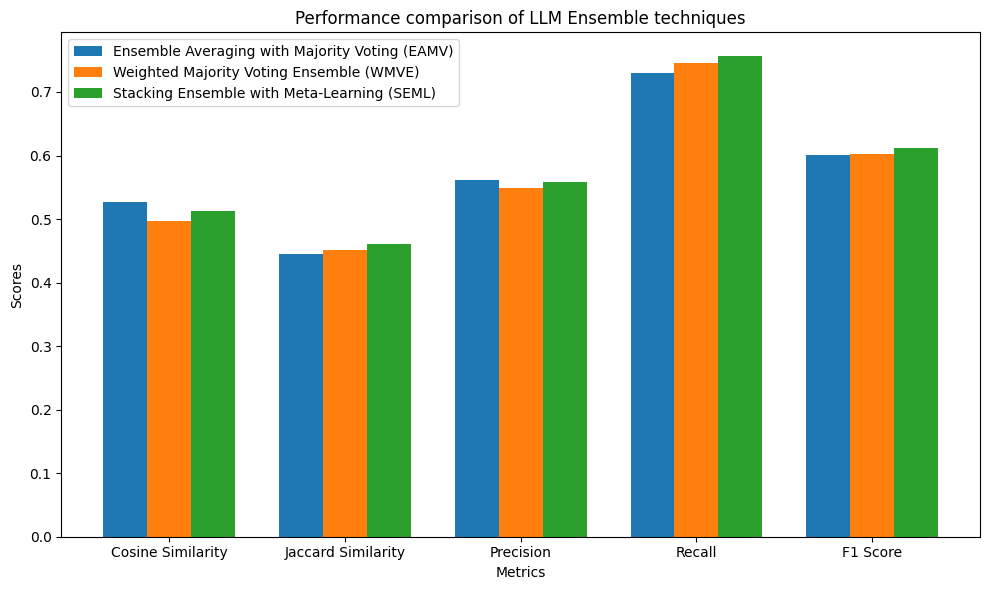

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['Majority Voting', 'Bagging', 'Boosting', 'Stacking']
metrics = ['Cosine Similarity', 'Jaccard Similarity', 'Precision', 'Recall', 'F1 Score']
majority_voting_scores = []
bagging_scores = [0.5262, 0.4445, 0.5617, 0.7305, 0.6011]
boosting_scores = [0.4977, 0.4517, 0.5490, 0.7452, 0.6024]
stacking_scores = [0.5134, 0.4606, 0.5591, 0.7561, 0.6126]

# Plotting
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, bagging_scores, width, label='Ensemble Averaging with Majority Voting (EAMV)')
rects2 = ax.bar(x, boosting_scores, width, label='Weighted Majority Voting Ensemble (WMVE)')
rects3 = ax.bar(x + width, stacking_scores, width, label='Stacking Ensemble with Meta-Learning (SEML)')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance comparison of LLM Ensemble techniques')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()

plt.show()


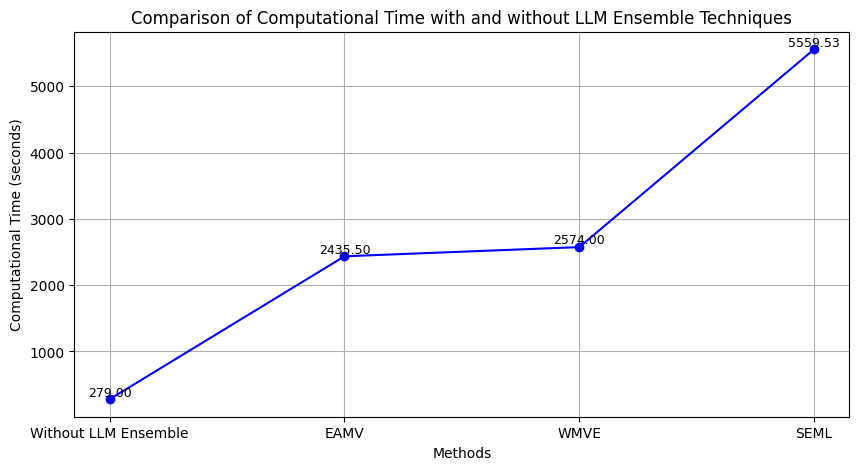

In [ ]:
import matplotlib.pyplot as plt

# Data
methods = ['Without LLM Ensemble', 'EAMV',
           'WMVE', 'SEML']
times = [279.00, 2435.50, 2574.00, 5559.53]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(methods, times, marker='o', color='blue')
for i, time in enumerate(times):
    plt.text(i, time + 50, f'{time:.2f}', ha='center', fontsize=9)

plt.title('Comparison of Computational Time with and without LLM Ensemble Techniques')
plt.xlabel('Methods')
plt.ylabel('Computational Time (seconds)')
plt.grid(True)
plt.show()
